### **``Exploration & Modeling``** 
``The Social Equity Impact on Employee Attrition in the Workplace``

``Created by: Mijail Q. Mariano``

``13AUGUST2022``

----

In [1]:
# notebook dependencies
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 200

# diasbling warning messages
import warnings
warnings.filterwarnings("ignore")

# importing key libraries
import pandas as pd
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# numpy import
import numpy as np
import random

# importing acquire module
import wrangle

# importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style = "darkgrid")

# plotly/visual import
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# file cleaning modules
from skimpy import clean_columns

# stats/math modules
import scipy.stats as stats
from math import sqrt

# yellowbrick recursive feature elimination-cross validation method (used for plotting accuracy)
from yellowbrick.model_selection import rfecv

# sklearn data science library
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.inspection import permutation_importance

# modules used in modeling
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV, f_regression

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

# reporting
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# xgboost import
from xgboost import XGBClassifier

----
#### **``Initial Planning/Ideas``**

Individual Data Science Project:

Mijail Mariano

August 13th 2022

**<u>``1. Formulating the question``</u>**

``This question should be:``

* About social equity or of similar importance (i.e., inequality, racial discrimination, social-mobility, equal opportunity)
* The question is to be freamed in a way that can be quantitatively measured in terms of organizational value & also raises the question around -  “How equal/diverse or fair is an organization's current workplace?”

**target variable: "Attrition"**

**<u>``2. Exploration questions``</u>**

**``What are you attempting to predict/help to address:``**

``Employee/Company Attrition Rate``

* What is company attrition?
* Why is company attrition important?
* What are the employee attrition demographics?
* Are there pros to attrition? If so, what are these?

**``What specifically are you attempting to investigate/understand:``**

``Equity in the workplace and its impact on attrition``

*Ok, but what specifically?...*

``Do socioeconomic/location factors such as:``

* Where an employee is from/grows-up (County level) impact whether or not they remain with a company?
* The high-school graduation rate
* Incarceration/prison rate
* Fraction of population married by 35 years old
* Poverty rate
* Teenage birth rate

``Are there other questions that may be important to answer?``

How much does an employee's geographical background (where they are from) impact their decision to remain or leave the company?
Are there socioeconomic/employee demographic differences between those employees who leave the company and those who remain? (descriptive/summary statistics)

**<u>``3. Methodology``</u>**

**``Note:``** 

For this project I am assuming the company's geographical location to be New York City, NY and that employees are only from counties within the three (3) tri-state areas. This includes counties solely from the state's of Connecticut, New Jersey, and New York. To conduct the analysis I will also use a random generator to blindly assign birthplace/locations where employees grew-up and the socioeconomic variables from those locations to statistically explore these variables.

``Where’s the data from?``

To conduct this analysis and potentially generate a predictive company attrition model I combine real socioeconomic and economic data from Harvard’s Opportunity Atlast with an artificially created 2017 IBM Human Resources Kaggle dataset of a small-medium sized company (~1500 records). .

The Opportunity Atlas is a collaborative social equality project through Harvard University, the US Census Bureau, and the US Internal Revenue Service. The initiative’s aim is to track and plot socioeconomic data by exact US states, counties, cities, and neighborhoods in order to understand the childrens’ outcomes and prospect of social mobility. 

*The Atlas is composed of ~21mil Americans born between 1978-1983 who are in their mid-late thirties today. The platform and estimates are based on:

* The 2000 and 2010 Decennial Census short form
* Federal income tax returns for 1989, 1994, 1995, and 1998-2015
* Data from the American Community Survey

<u>Reference Links:</u>
* https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
* https://www.opportunityatlas.org/

``Why couldn’t you use a real dataset?``

Given the sensitive nature of real employee information, it is relatively difficult to attain similar publicly available data from businesses. Additionally, since it is not common for organizations to collect similar socioeconomic information/drivers that I attempt to investigate - the combination of synthetic and real data seemed like an adequate method for scientific testing.

``So how should I think about this data?``

You can think about this data and the subsequent estimates as a way to understand how geographical/environmental characteristics potentially play a role in employee tenure. Additionally, these estimates may also help organizations to understand potential employee equity differences in order to address them and successfully retain essential employees. 

``Why might these employees decide to leave their company?`` 

(said another way)....
How might these demographic differences contribute to an employee’s decision to stay or leave their company?

Ok, so what happens if employers don’t retain these employees?

**<u>``4. What can employers do to retain these employees?``</u>**

(placeholder for recommendations)


``Opportunity Atlas (Equity DF): features/variables``

1. High_School_Graduation_Rate_rP_gP_pall\
Fraction of children who grew up in this area with a high school degree or a GED. Estimates have a margin of error; for example, standard error at county level for children with parents at 25th percentile is 1% pooling race and gender groups and 3% for black men. This outcome is available only at the county (not tract) level due to small sample sizes. (Source: American Community Survey)

2. Household_Income_at_Age_35_rP_gP_pall\
Average annual household income in 2014-15 for children (now in their mid-30s) who grew up in this area. Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is $1,917 pooling race and gender groups and $2,721 for black men. (Source: Federal income tax records)

3. Incarceration_Rate_rP_gP_pall\
Fraction of children who grew up in this area who were in prison or jail on April 1, 2010. Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is 1% pooling race and gender groups and 4% for black men. (Source: 2010 Decennial Census)

4. Fraction_Married_at_Age_35_rP_gP_pall\
Fraction of children who grew up in this area who are married in 2015 (in their mid-30s). Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is 3% pooling race and gender groups and 4% for black men. (Source: Income Tax Records)

5. Poverty_Rate_in_2012-16\
Fraction of all residents of this area with household incomes below the federal poverty line in 2012-16. (Source: American Community Survey.)

6. Teenage_Birth_Rate_women_only_rP_gF_pall\
Fraction of women who grew up in this area who claimed ever a child who was born when the women were between the ages of 13 and 19 as a dependent when filing taxes. Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is 4% pooling race groups and 6% for black women. (Source: Income Tax Records)


``IBM Dataset: features/variables``
1. Age
2. Attrition
3. BusinessTravel
4. DailyRate
5. Department
6. DistanceFromHome
7. Education
8. EducationField
9. EmployeeCount
10. EmployeeNumber
11. EnvironmentSatisfaction
12. Gender
13. HourlyRate
14. JobInvolvement
15. JobLevel
16. JobRole
17. JobSatisfaction
18. MaritalStatus
19. MonthlyIncome
20. MonthlyRate
21. NumCompaniesWorked
22. Over18
23. OverTime
24. PercentSalaryHike
25. PerformanceRating
26. RelationshipSatisfaction
27. StandardHours
28. StockOptionLevel
29. TotalWorkingYears
30. TrainingTimesLastYear
31. WorkLifeBalance
32. YearsAtCompany
33. YearsInCurrentRole
34. YearsSinceLastPromotion
35. YearsWithCurrManager


----

### **``Data Acquisition and Preparation``**

In [2]:
# let's import the IBM employee data first

ibm_df = pd.read_csv("/Users/mijailmariano/Desktop/IBM_HR-Employee-Attrition.csv")
print()
print(f'IBM dataset shape: {ibm_df.shape}')
ibm_df.head()


IBM dataset shape: (1470, 35)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
# let's import the opportunity atlas data

equity_df = pd.read_csv("/Users/mijailmariano/Desktop/equity_table.csv")
print()
print(f'Equity dataset shape: {equity_df.shape}')
equity_df.head()


Equity dataset shape: (17, 12)


county_name state       cty  distance  household_income_at_35  \
0     Bergen County    NJ  cty34003  19 miles                   63424   
1      Bronx County    NY  cty36005  10 miles                   32542   
2      Essex County    NJ  cty34013  20 miles                   43298   
3  Fairfield County    CT  cty09001  30 miles                   55614   
4     Hudson County    NJ  cty34017   9 miles                   41374   

   high-school_graduation_rate  percentage_married_by_35  incarceration_rate  \
0                         0.94                      0.51                0.00   
1                         0.78                      0.22                0.02   
2                         0.89                      0.33                0.02   
3                         0.92                      0.46                0.01   
4                         0.87                      0.35                0.01   

   women_teenage_birthrate  poverty_rate  employment_rates_at_35yrs  \
0                     0.04          0.07                       0.80   
1                     0.28          0.31                       0.74   
2                     0.20          0.17                       0.78   
3                     0.09          0.09                       0.79   
4                     0.19          0.18                       0.78   

   single_parent_frac  
0                0.20  
1                0.59  
2                0.43  
3                0.26  
4                0.37

In [4]:
# replacing/removing the word "miles" in distance

# equity_df["distance"] = equity_df["distance"].str.replace("miles", "").astype(int)
# equity_df.dtypes.sort_values()

In [5]:
# number of unique county distances

# equity_df["distance"].nunique()

In [6]:
# let's use pandas' qcut method to parse out distance groups

# intervals = pd.Series(pd.cut(
#         equity_df["distance"], 
#         bins = equity_df["distance"].nunique(), 
#         duplicates = "drop").sort_values().tolist())

# intervals.unique()

In [7]:
# viewing counties by distance sorted

# equity_df[["county_name", "distance"]].sort_values("distance")

In [8]:
# setting counties by distance
# [(0.971, 3.9], (3.9, 6.8], (6.8, 9.7], (9.7, 12.6], (18.4, 21.3], (24.2, 27.1], (27.1, 30.0]]

# area_one = equity_df[equity_df["distance"] <= 5].county_name.tolist()
# area_two = equity_df[(equity_df["distance"] > 5) & (equity_df["distance"] <= 10)].county_name.tolist()
# area_three = equity_df[(equity_df["distance"] > 10) & (equity_df["distance"] <= 21)].county_name.tolist()
# area_four = equity_df[(equity_df["distance"] > 21) & (equity_df["distance"] <= 27)].county_name.tolist()
# area_five = equity_df[(equity_df["distance"] > 27) & (equity_df["distance"] <= 30)].county_name.tolist()

# print(area_one)
# print('----------------------------------------------------')
# print(area_two)
# print('----------------------------------------------------')
# print(area_three)
# print('----------------------------------------------------')
# print(area_four)
# print('----------------------------------------------------')
# print(area_five)

In [9]:
# creating a function to randomly apply county based on the employee's distance from home

def get_county(x, lst_a, lst_b, lst_c, lst_d, lst_e):
        '''where x = employees' work distance from home in miles. 
        function will iterate through all records and randomly assign a county based on distance from work.'''
        lst = []

        if x <= 5:
                county = random.choice(lst_a)
                lst.append(county)

        elif x > 5 and x <= 10:
                county = random.choice(lst_b)
                lst.append(county)

        elif x > 10 and x <= 21:
                county = random.choice(lst_c)
                lst.append(county)
        
        elif x > 27 and x <= 30:
                county = random.choice(lst_e)
                lst.append(county)

        else:
                county = lst_d[0]
                lst.append(county)

        # returning the list of counties
        return lst

In [10]:
# creating a random generated county list 

# random.seed(548)
# county_lst = ibm_df["DistanceFromHome"].apply(get_county, args = (area_one, area_two, area_three, area_four, area_five))
# # let's flatten the county list
# county_lst = [val for sublist in county_lst for val in sublist]
# county_lst[:5]

In [11]:
# let's create a pandas series and assign the county list to the ibm dataframe

# county_lst = pd.Series(county_lst)
# county_lst.shape

In [12]:
# assigning the county series to the ibm dataframe

# ibm_df["county_name"] = county_lst
# ibm_df.head() # checks out!

In [13]:
# merging the two tables/dfs on county name
# bringing over socioeconomic data from equity_df 

# emp_df = ibm_df.merge(
#     equity_df,
#     how = "left",
#     left_on = "county_name",
#     right_on = "county_name"
# ).drop(columns = "distance")

# emp_df.head() # checks out!

In [14]:
# catching the dataframe

# emp_df.to_csv("/Users/mijailmariano/codeup-data-science/drivers_of_workplace_equity/emp_df.csv", index = False)

In [15]:
# importing the dataframe 

df = wrangle.get_employee_df()
df.head()

initial df shape: (1470, 46)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  state       cty  household_income_at_35  high-school_graduation_rate  \
0  ...     NY  cty36047                   37229                         0.84   
1  ...     NY  cty36005                   32542                         0.78   
2  ...     NY  cty36047                   37229                         0.84   
3  ...     NY  cty36047                   37229                         0.84   
4  ...     NY  cty36061                   37826                         0.81   

   percentage_married_by_35 incarceration_rate  women_teenage_birthrate  \
0                      0.32               0.01                     0.20   
1                      0.22               0.02                     0.28   
2                      0.32               0.01                     0.20   
3                      0.32               0.01                     0.20   
4                      0.29               0.01                     0.19   

  poverty_rate  employment_rates_at_35yrs  single_parent_frac  
0         0.23                       0.73                0.38  
1         0.31                       0.74                0.59  
2         0.23                       0.73                0.38  
3         0.23                       0.73                0.38  
4         0.17                       0.73                0.34  

[5 rows x 46 columns]

In [16]:
# can consider removing/dropping the following features/columns
# "over_18": all employees meet this criteria
# "employee_count": redundant information

df = wrangle.clean_employee_df(df)
df.head()

shape after cleaning: (1470, 34)


attrition  employee_age  monthly_income  percent_salary_hike  \
1       True            41            5993                   11   
2      False            49            5130                   23   
4       True            37            2090                   15   
5      False            33            2909                   11   
7      False            27            3468                   12   

   total_working_years  training_times_last_year  years_at_company  \
1                    8                         0                 6   
2                   10                         3                10   
4                    7                         3                 0   
5                    8                         3                 8   
7                    6                         3                 2   

   household_income_at_35  high_school_graduation_rate  \
1                   37229                         0.84   
2                   32542                         0.78   
4                   37229                         0.84   
5                   37229                         0.84   
7                   37826                         0.81   

   percentage_married_by_35  ...               job_role  job_satisfaction  \
1                      0.32  ...        Sales Executive                 4   
2                      0.22  ...     Research Scientist                 2   
4                      0.32  ...  Laboratory Technician                 3   
5                      0.32  ...     Research Scientist                 3   
7                      0.29  ...  Laboratory Technician                 2   

   marital_status  performance_rating  relationship_satisfaction  state  \
1          Single                   3                          1     NY   
2         Married                   4                          4     NY   
4          Single                   3                          2     NY   
5         Married                   3                          3     NY   
7         Married                   3                          4     NY   

  stock_option_level work_life_balance years_in_current_role  \
1                  0                 1                     4   
2                  1                 3                     7   
4                  0                 3                     0   
5                  0                 3                     7   
7                  1                 3                     2   

  years_with_curr_manager  
1                       5  
2                       7  
4                       0  
5                       0  
7                       2  

[5 rows x 34 columns]

In [17]:
# let's check the df info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   attrition                    1470 non-null   bool   
 1   employee_age                 1470 non-null   int64  
 2   monthly_income               1470 non-null   int64  
 3   percent_salary_hike          1470 non-null   int64  
 4   total_working_years          1470 non-null   int64  
 5   training_times_last_year     1470 non-null   int64  
 6   years_at_company             1470 non-null   int64  
 7   household_income_at_35       1470 non-null   int64  
 8   high_school_graduation_rate  1470 non-null   float64
 9   percentage_married_by_35     1470 non-null   float64
 10  incarceration_rate           1470 non-null   float64
 11  women_teenage_birthrate      1470 non-null   float64
 12  poverty_rate                 1470 non-null   float64
 13  employment_rates_a

In [18]:
# initial summary statistics

summary_stats = df.describe().T
summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats.sort_index()

count     mean     std      min      25%  \
employee_age                1470.00    36.92    9.14    18.00    30.00   
employment_rates_at_35yrs   1470.00     0.76    0.03     0.73     0.73   
high_school_graduation_rate 1470.00     0.86    0.05     0.78     0.81   
household_income_at_35      1470.00 43599.31 8981.27 32542.00 37229.00   
incarceration_rate          1470.00     0.01    0.00     0.00     0.01   
monthly_income              1470.00  6502.93 4707.96  1009.00  2911.00   
percent_salary_hike         1470.00    15.21    3.66    11.00    12.00   
percentage_married_by_35    1470.00     0.35    0.08     0.22     0.29   
poverty_rate                1470.00     0.17    0.06     0.05     0.13   
single_parent_frac          1470.00     0.35    0.09     0.16     0.30   
total_working_years         1470.00    11.28    7.78     0.00     6.00   
training_times_last_year    1470.00     2.80    1.29     0.00     2.00   
women_teenage_birthrate     1470.00     0.17    0.06     0.04     0.12   
years_at_company            1470.00     7.01    6.13     0.00     3.00   
years_in_current_role       1470.00     4.23    3.62     0.00     2.00   
years_since_last_promotion  1470.00     2.19    3.22     0.00     0.00   
years_with_curr_manager     1470.00     4.12    3.57     0.00     2.00   

                                 50%      75%      max    range  
employee_age                   36.00    43.00    60.00    42.00  
employment_rates_at_35yrs       0.74     0.78     0.82     0.09  
high_school_graduation_rate     0.84     0.91     0.94     0.17  
household_income_at_35      37826.00 51773.00 65975.00 33433.00  
incarceration_rate              0.01     0.01     0.02     0.02  
monthly_income               4919.00  8379.00 19999.00 18990.00  
percent_salary_hike            14.00    18.00    25.00    14.00  
percentage_married_by_35        0.32     0.42     0.54     0.32  
poverty_rate                    0.17     0.23     0.31     0.26  
single_parent_frac              0.34     0.38     0.59     0.43  
total_working_years            10.00    15.00    40.00    40.00  
training_times_last_year        3.00     3.00     6.00     6.00  
women_teenage_birthrate         0.19     0.20     0.28     0.24  
years_at_company                5.00     9.00    40.00    40.00  
years_in_current_role           3.00     7.00    18.00    18.00  
years_since_last_promotion      1.00     3.00    15.00    15.00  
years_with_curr_manager         3.00     7.00    17.00    17.00

In [19]:
# let's loop through and inspect columns and unique values

for col in df.columns:
    print(f'Column: {col.upper()}')
    print(f'Date type: {df[col].dtype}')
    print(f'Missing values: {df[col].isnull().any()}')
    print(f'Number of unique values: {df[col].nunique()}')
    print(f'Data Sample: {list(df[col].head(10).sort_values())}')
    print('-------------------------------------------------------------------')

Column: ATTRITION
Date type: bool
Missing values: False
Number of unique values: 2
Data Sample: [False, False, False, False, False, False, False, False, True, True]
-------------------------------------------------------------------
Column: EMPLOYEE_AGE
Date type: int64
Missing values: False
Number of unique values: 43
Data Sample: [27, 30, 32, 33, 36, 37, 38, 41, 49, 59]
-------------------------------------------------------------------
Column: MONTHLY_INCOME
Date type: int64
Missing values: False
Number of unique values: 1349
Data Sample: [2090, 2670, 2693, 2909, 3068, 3468, 5130, 5237, 5993, 9526]
-------------------------------------------------------------------
Column: PERCENT_SALARY_HIKE
Date type: int64
Missing values: False
Number of unique values: 15
Data Sample: [11, 11, 12, 13, 13, 15, 20, 21, 22, 23]
-------------------------------------------------------------------
Column: TOTAL_WORKING_YEARS
Date type: int64
Missing values: False
Number of unique values: 40
Data Sample

<function matplotlib.pyplot.show(close=None, block=None)>

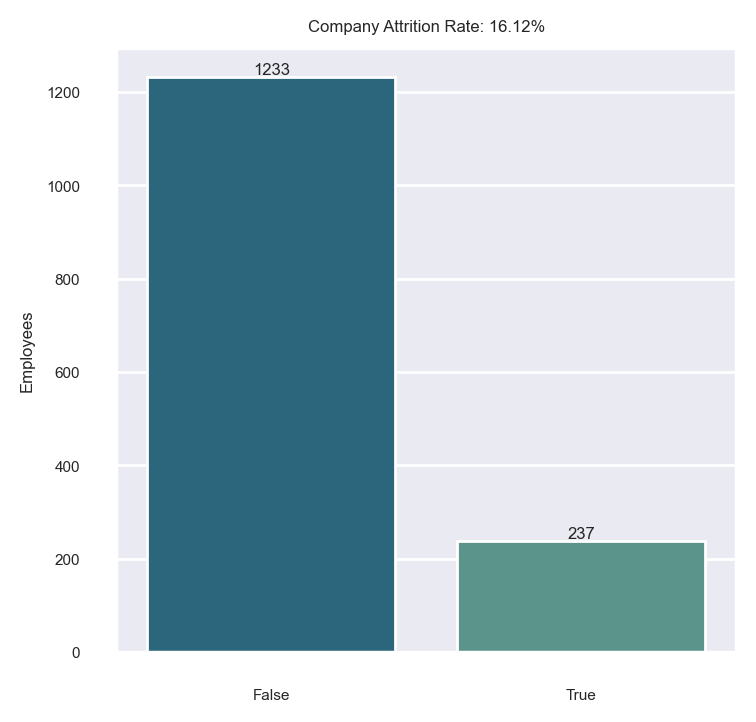

In [20]:
# let's examine the target variable

att_mean = df["attrition"].mean()

plt.figure(figsize = (4, 4))
sns.set(font_scale = 0.5)

ax = sns.countplot(
    x = "attrition",
    data = df,
    order = df["attrition"].value_counts().index,
    palette = "crest_r")

ax.bar_label(ax.containers[0])

plt.title(f'Company Attrition Rate: {att_mean:.2%}')
plt.xlabel(None)
plt.ylabel("Employees")
plt.show

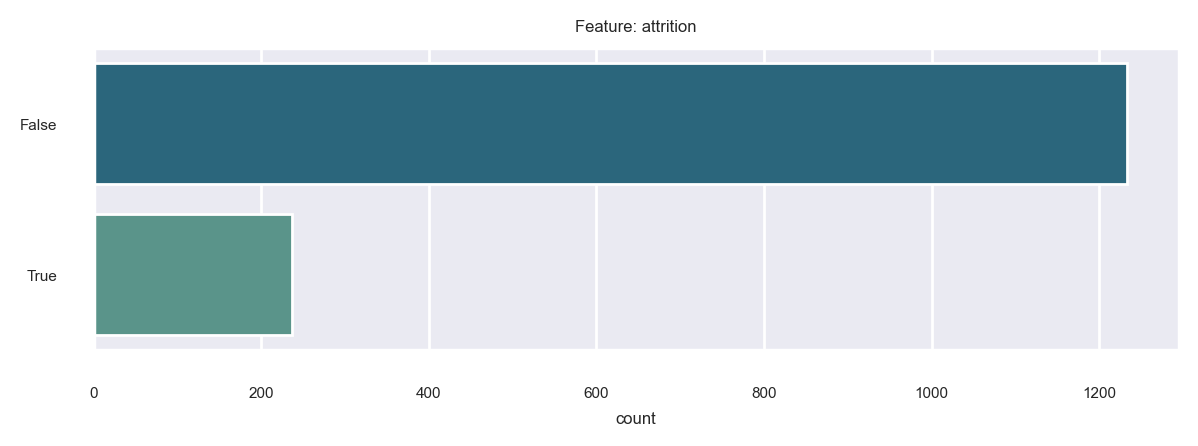

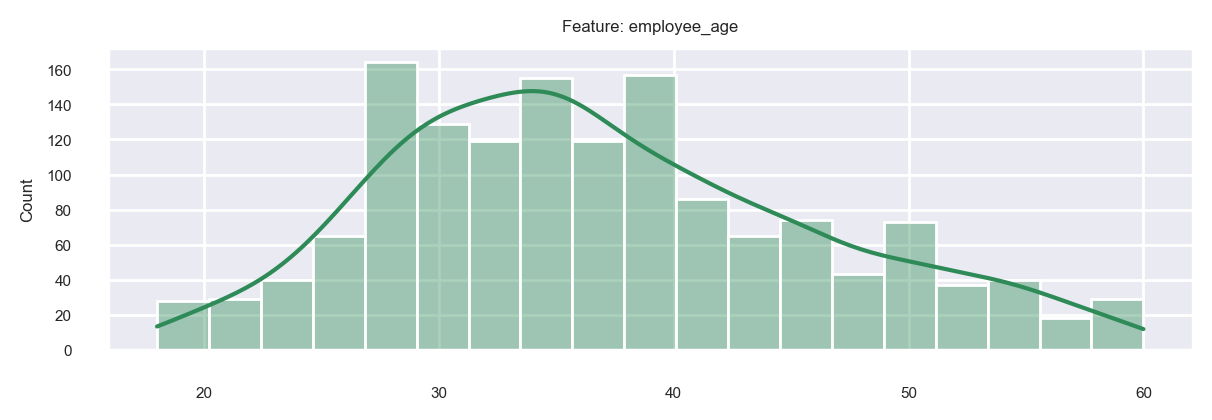

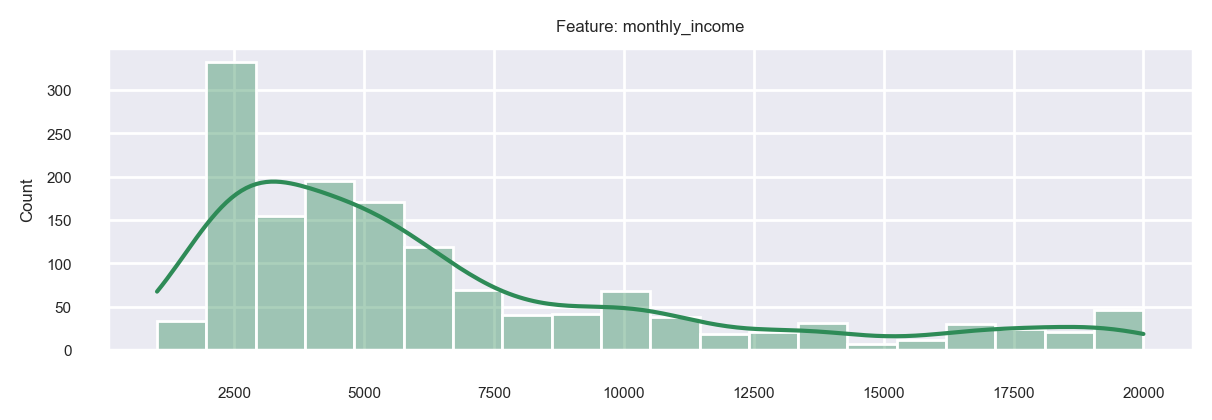

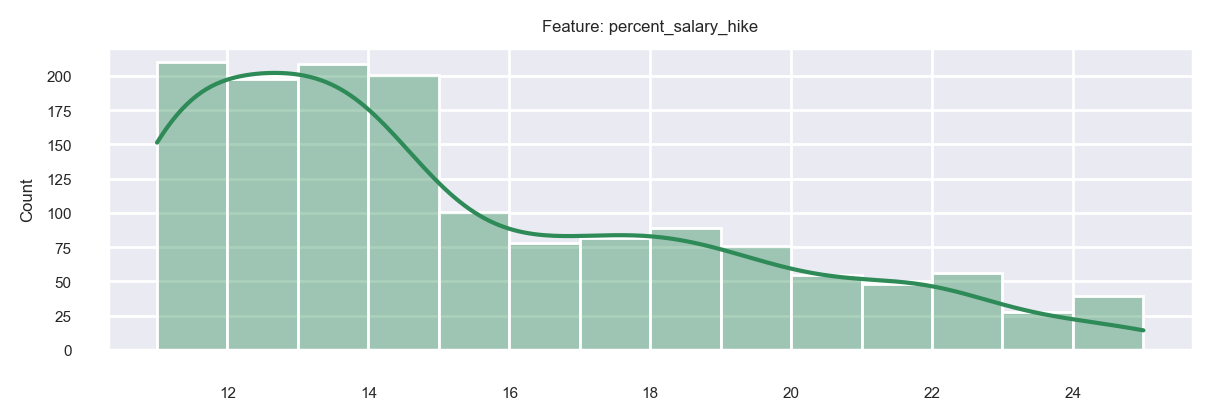

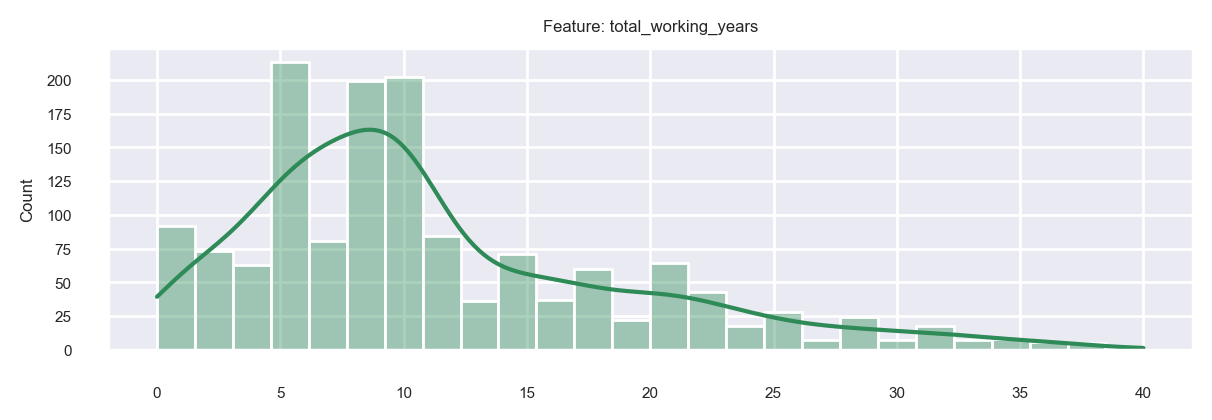

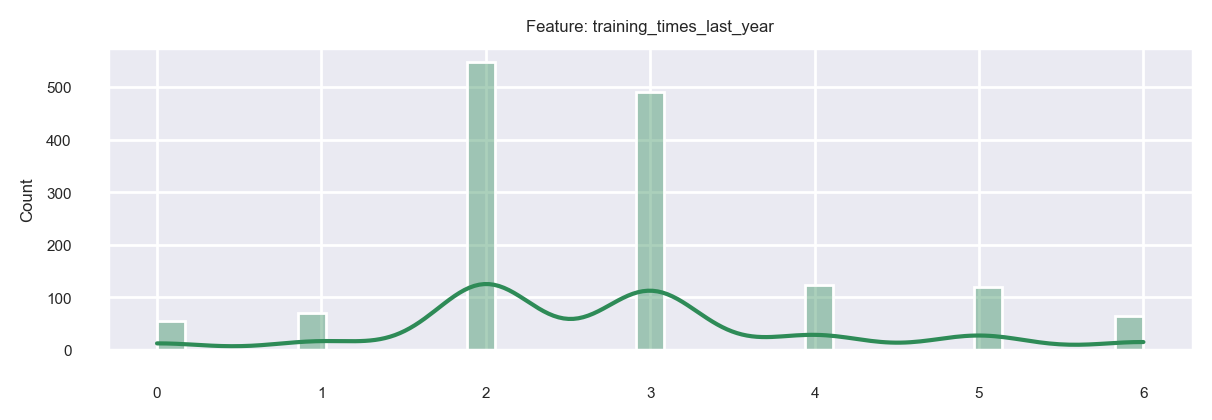

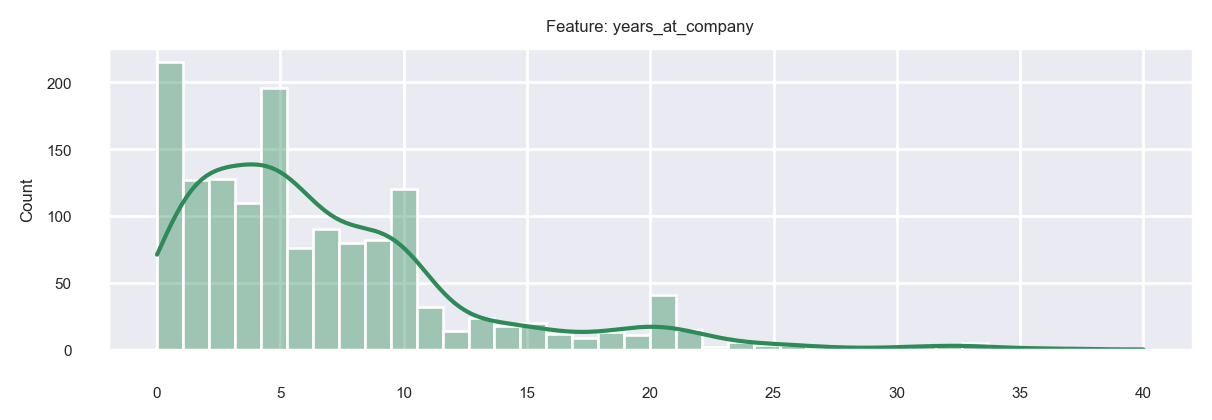

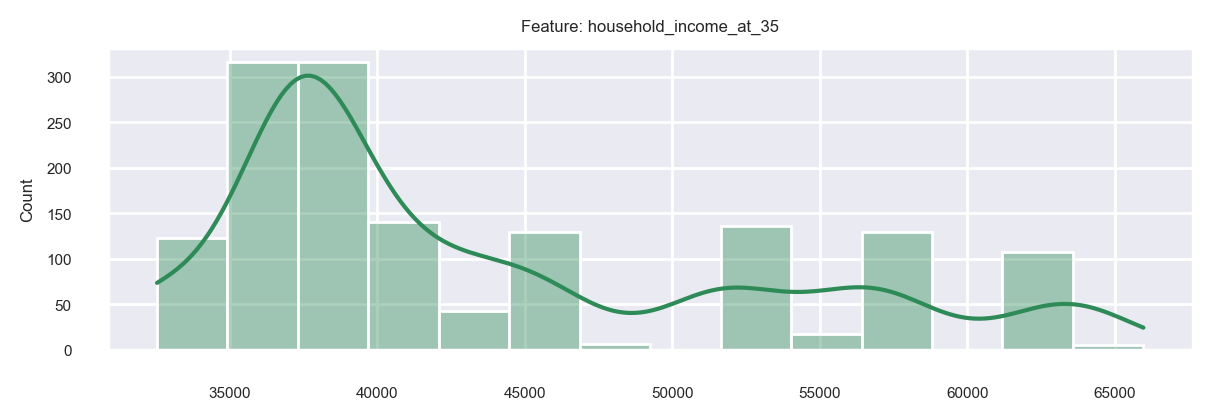

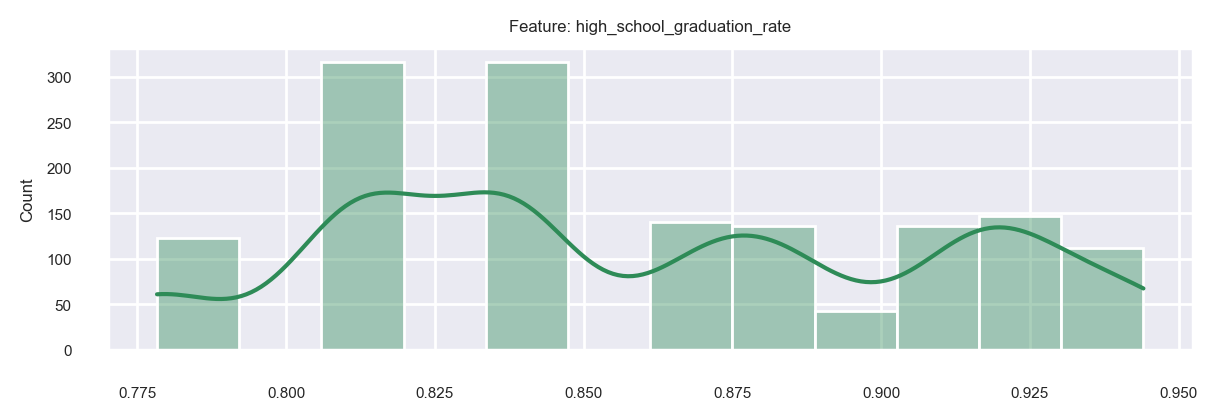

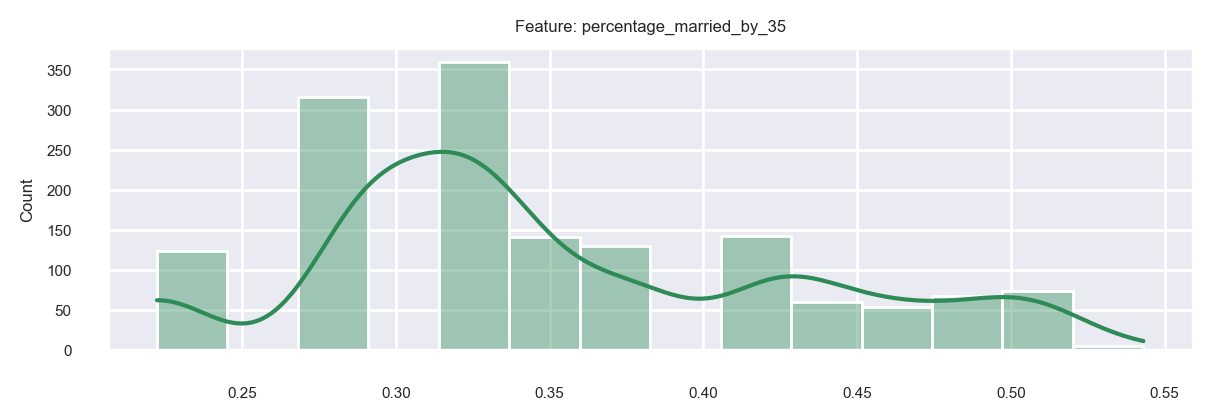

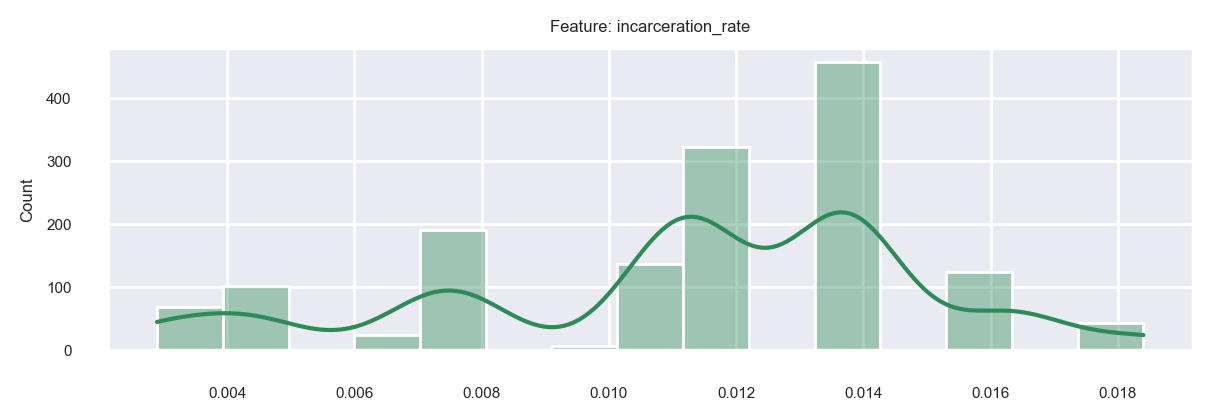

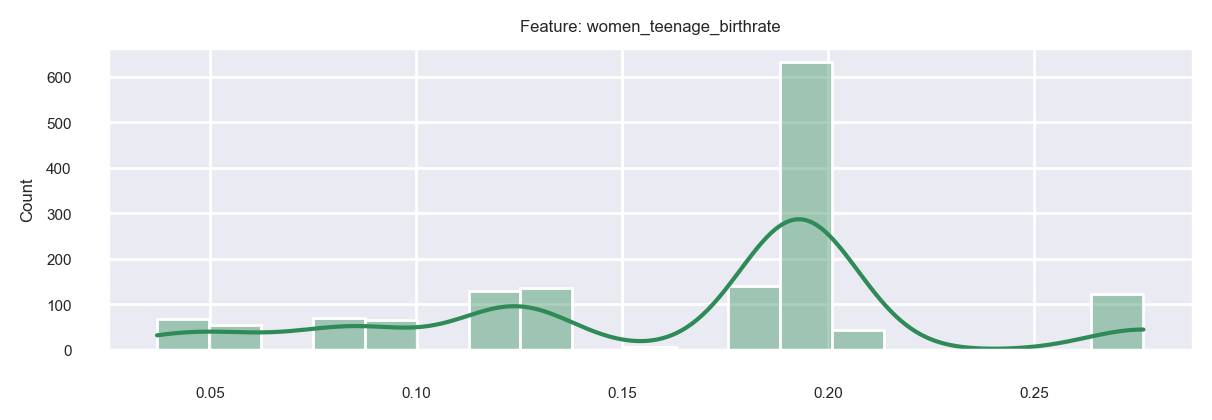

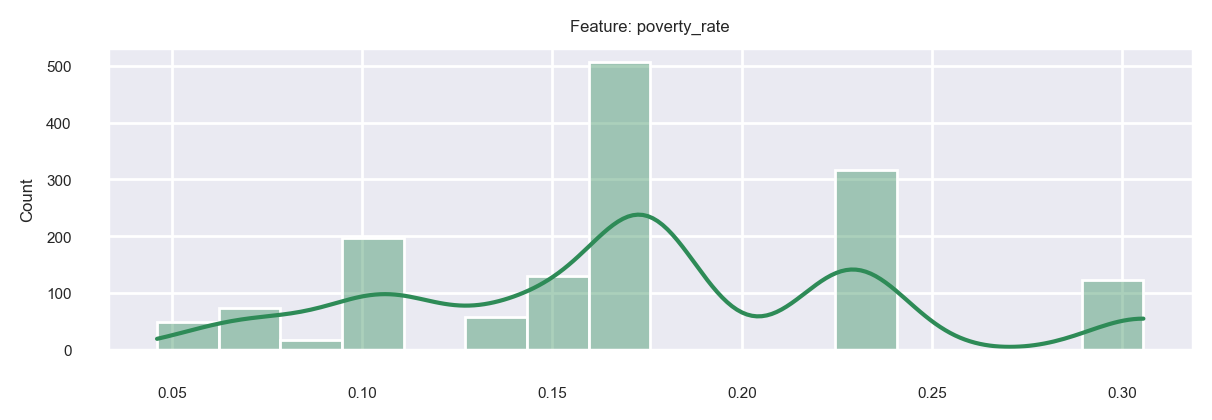

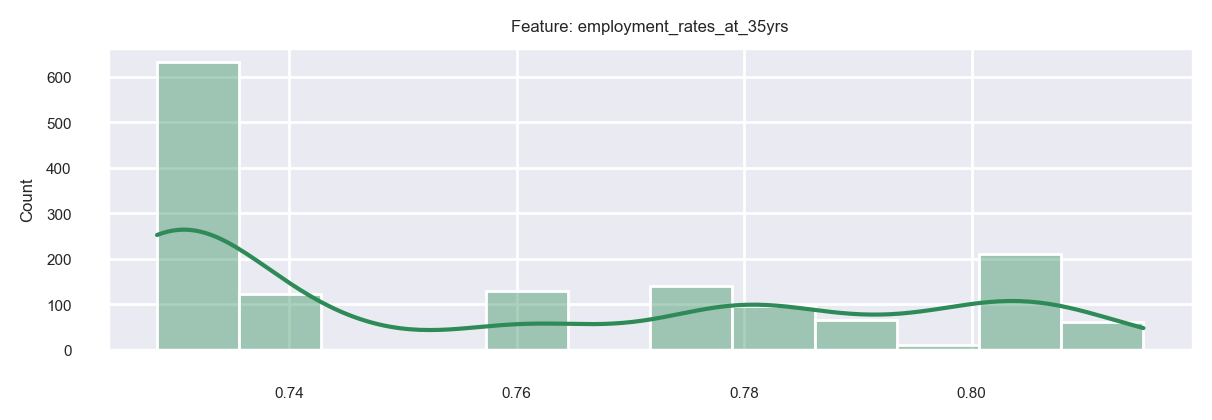

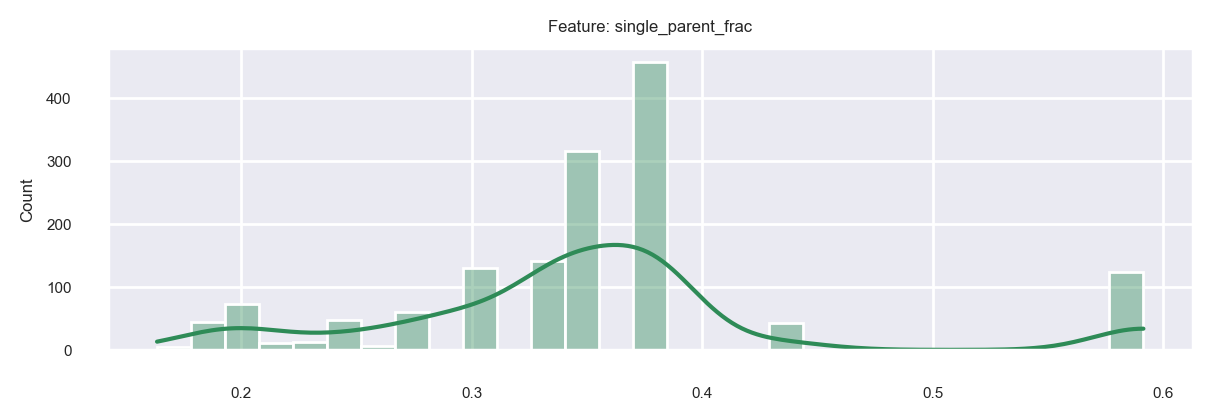

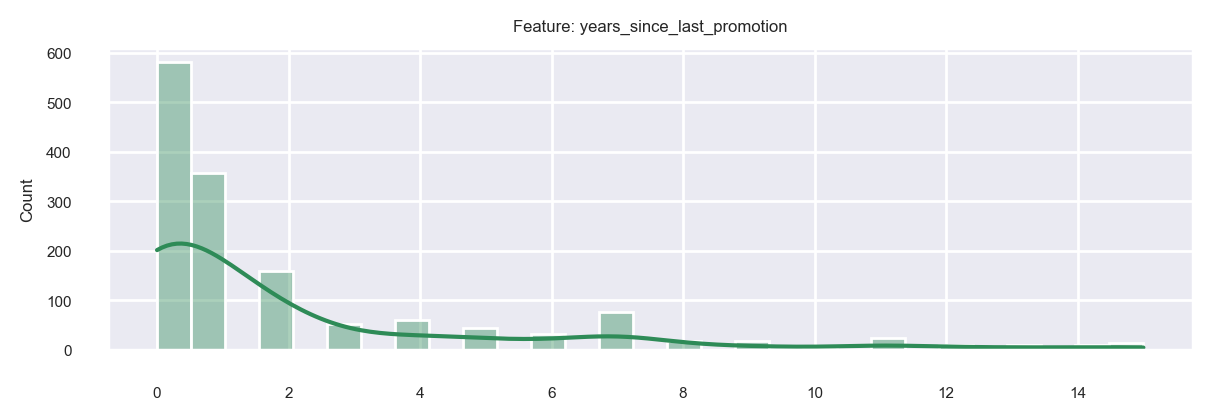

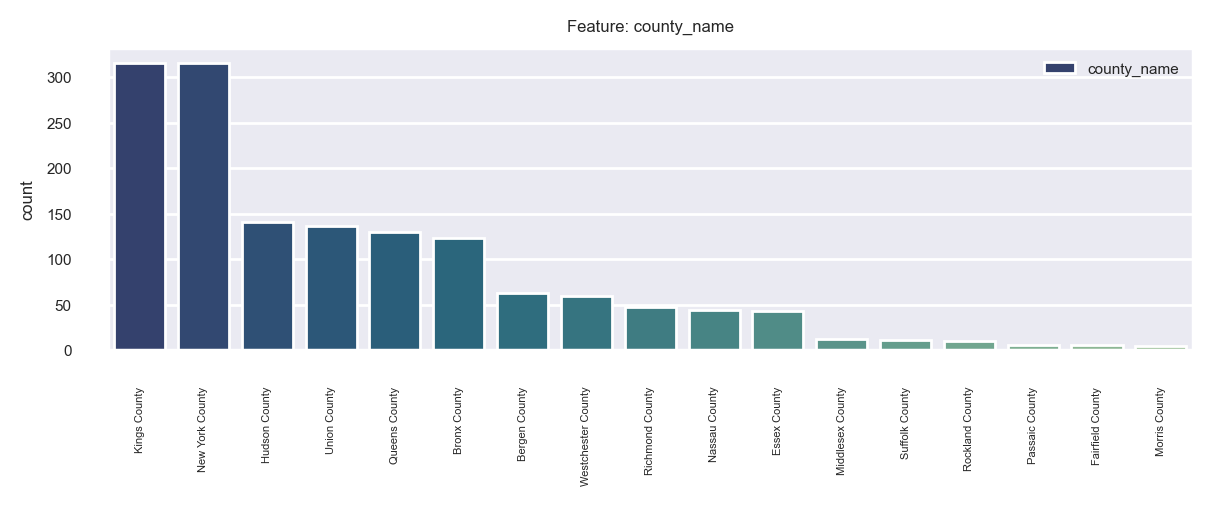

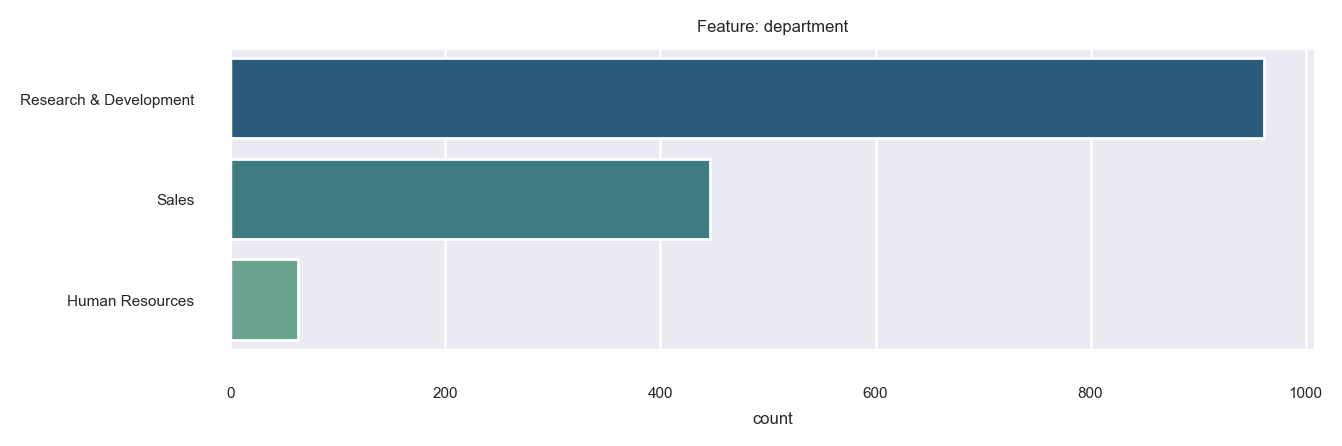

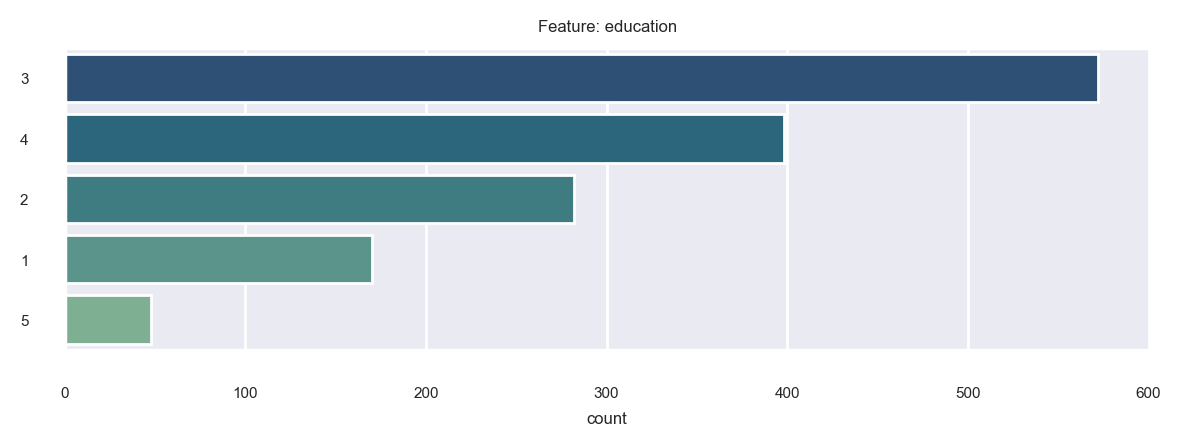

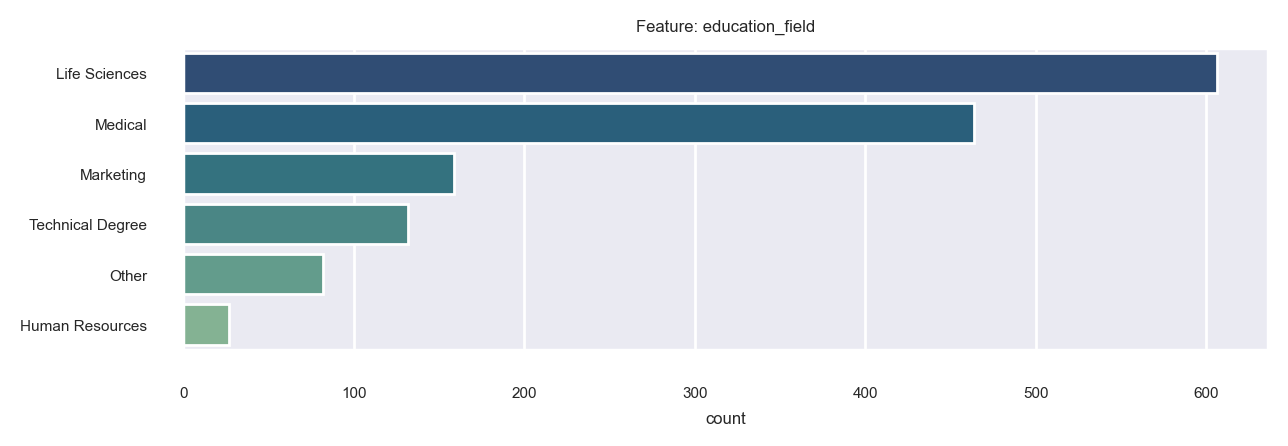

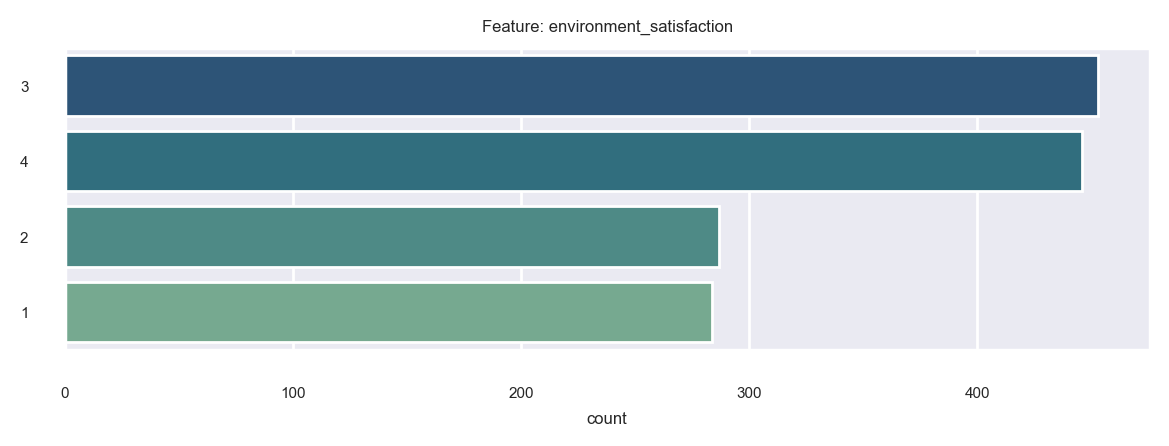

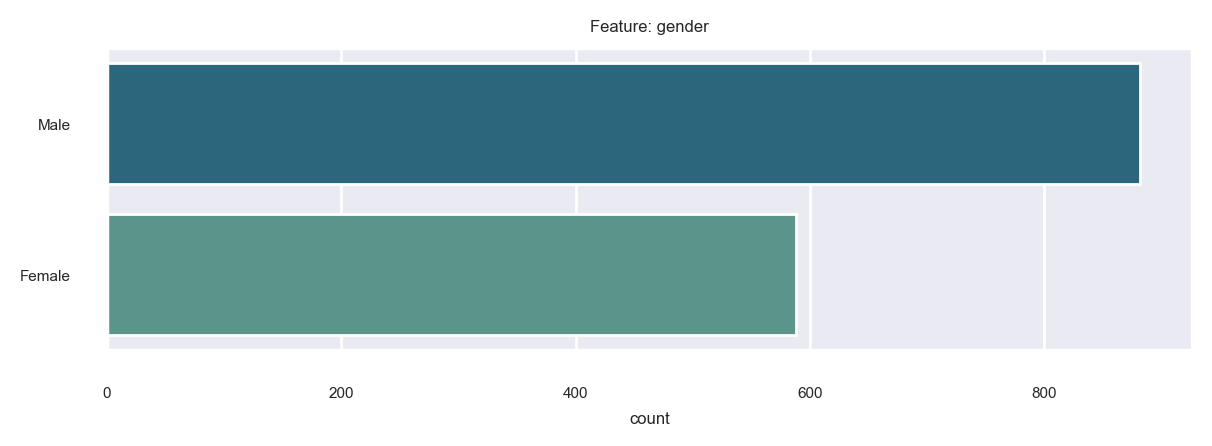

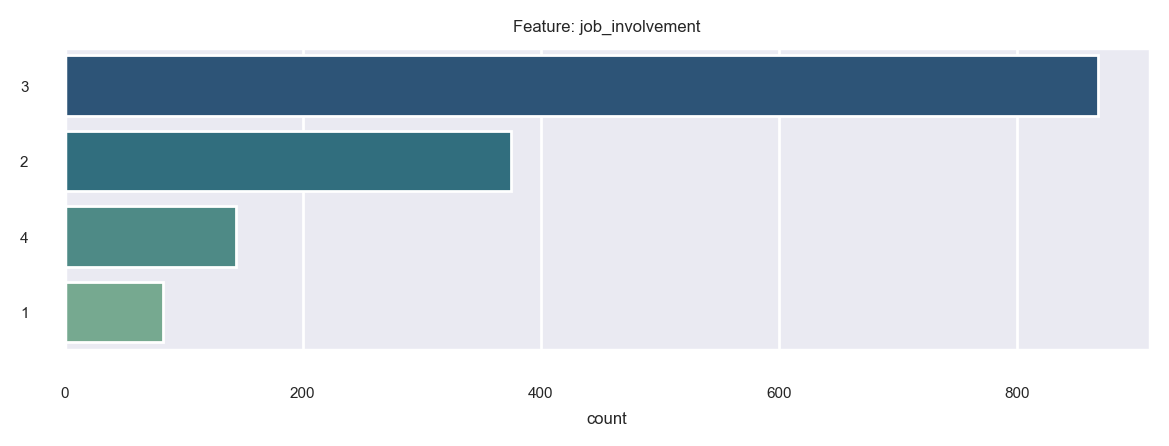

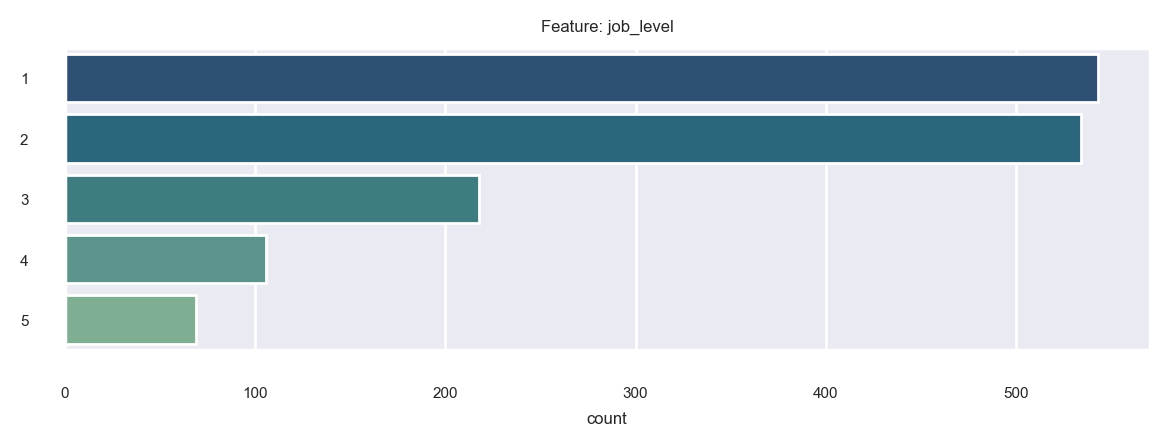

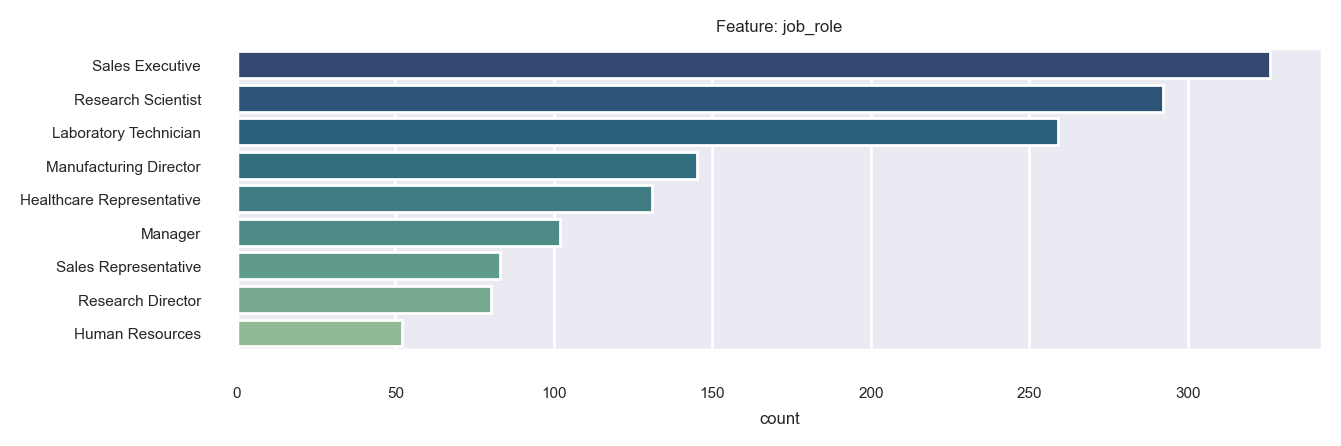

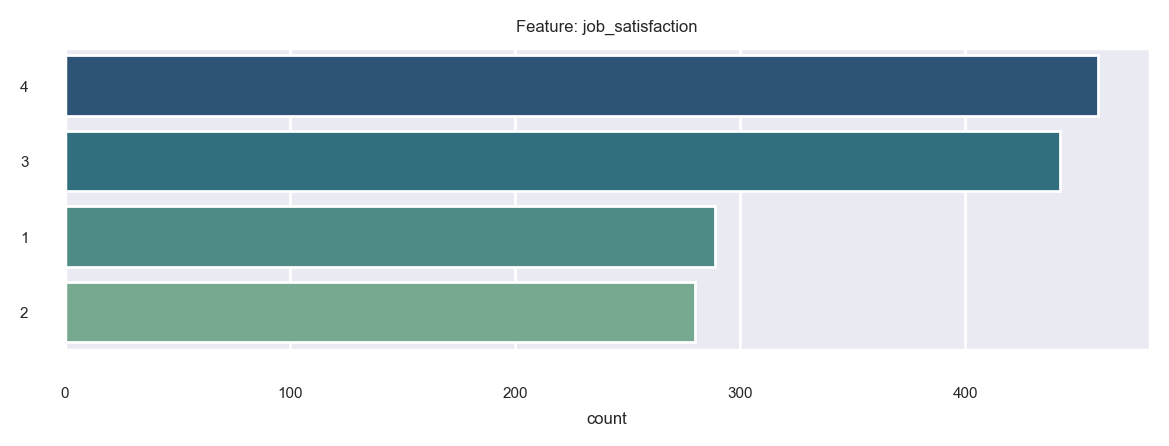

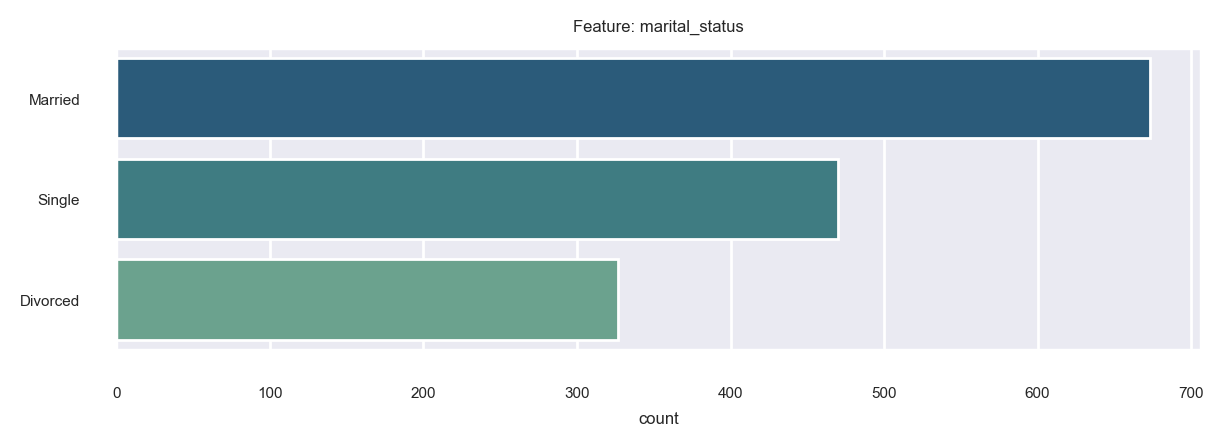

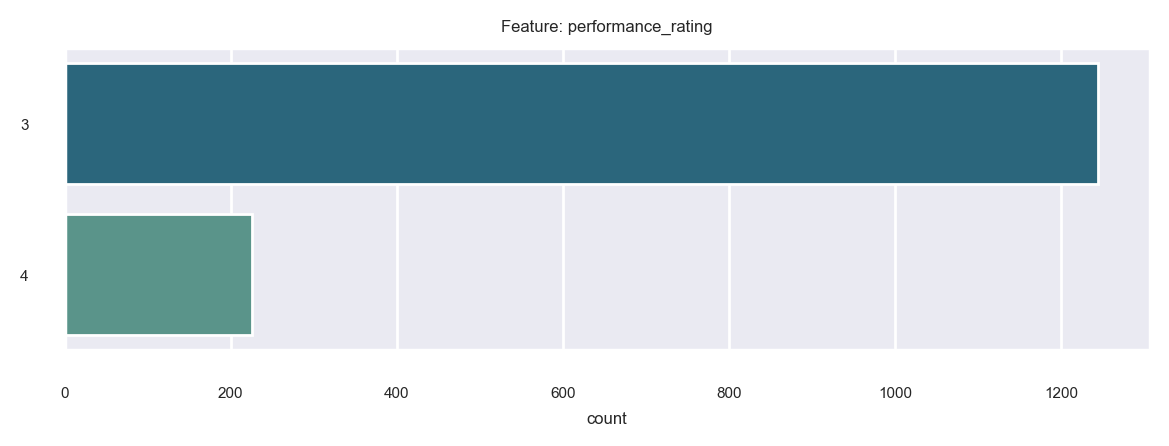

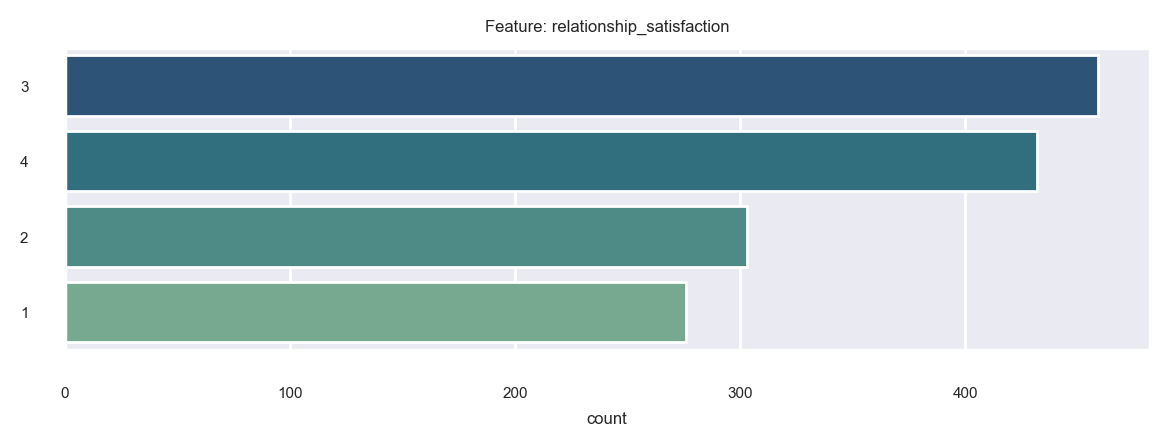

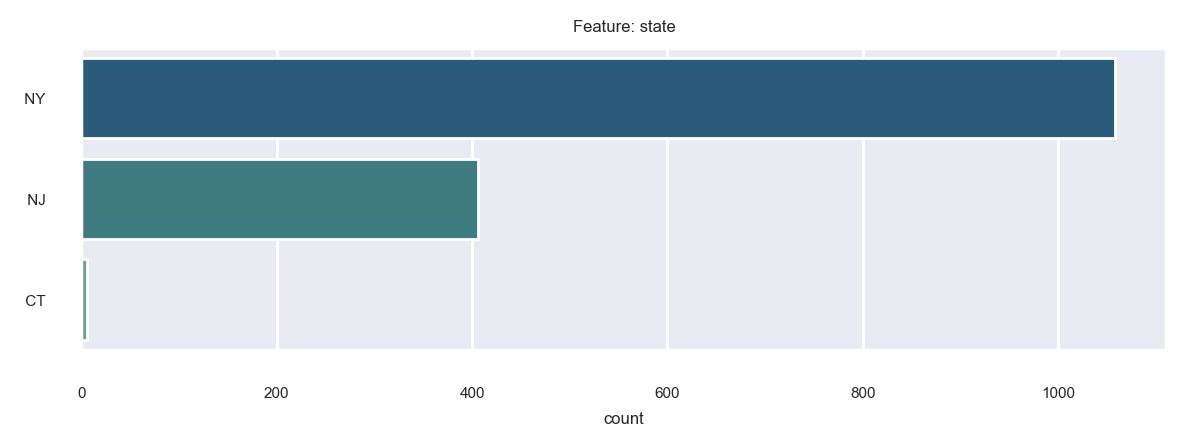

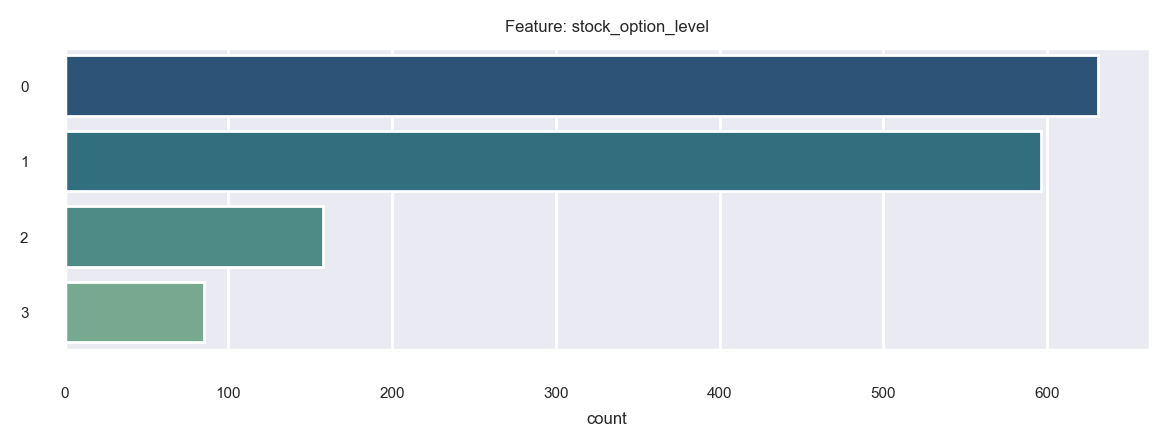

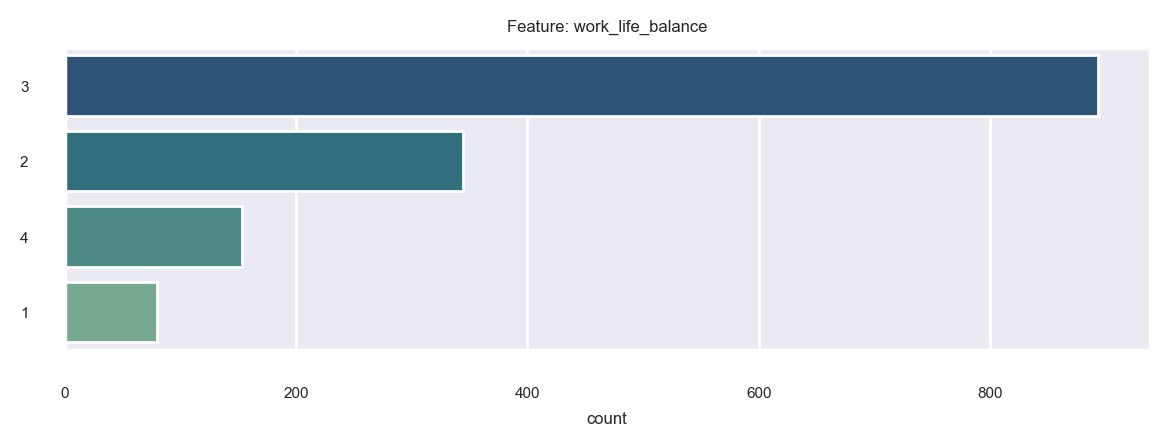

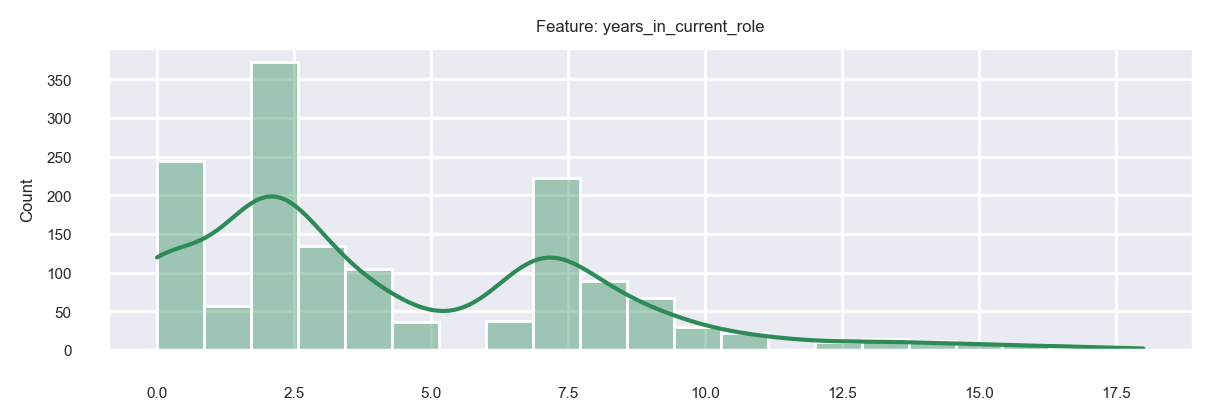

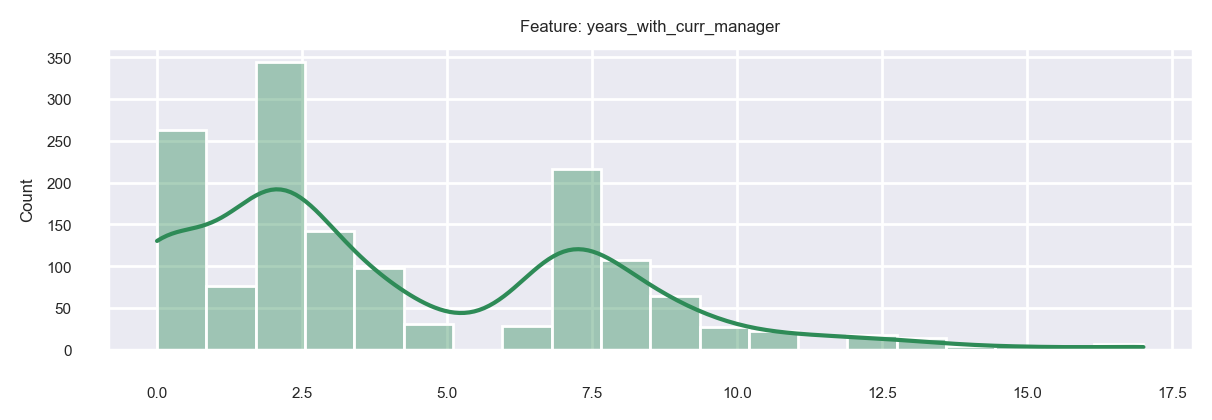

In [21]:
# plotting individual columns/features by data type

for col in df.columns:
    if df[col].dtype == int or df[col].dtype == float:
        plt.figure(figsize = (7, 2))
        sns.histplot(
            df[col],
            color = "seagreen",
            alpha = 0.4,
            kde = True)

        plt.title(f'Feature: {col}')
        plt.xlabel(None)
        plt.show()
    
    elif col == "cty" or col == "county_name": 
        # treating large discrete count plots seperate
        plt.figure(figsize = (7, 2))
        sns.countplot(
            df[col],
            order = df[col].value_counts().index,
            label = col, 
            palette="crest_r")

        plt.legend()
        # plt.xticks(rotation = 90)
        plt.tick_params(
                        axis='x', # changes apply to the x-axis
                        rotation = 90,
                        labelsize = 4)
        plt.xlabel(None)
        plt.title(f'Feature: {col}')
        plt.show()

    else:
        plt.figure(figsize = (7, 2))
        sns.countplot(
            y = df[col],
            order = df[col].value_counts().index, 
            orient = "h", 
            palette="crest_r")

        plt.ylabel(None)
        plt.title(f'Feature: {col}')
        plt.show()

In [22]:
# classifiying features by data type = discrete/categorical or continuous 

disc_lst = df.select_dtypes(exclude = "number").columns.sort_values().tolist()
cont_lst = df.select_dtypes(include = "number").columns.sort_values().tolist()

print(f'discrete variables:\n{disc_lst}')
print()
print(f'continuous variables:\n{cont_lst}')

discrete variables:
['attrition', 'county_name', 'department', 'education', 'education_field', 'environment_satisfaction', 'gender', 'job_involvement', 'job_level', 'job_role', 'job_satisfaction', 'marital_status', 'performance_rating', 'relationship_satisfaction', 'state', 'stock_option_level', 'work_life_balance']

continuous variables:
['employee_age', 'employment_rates_at_35yrs', 'high_school_graduation_rate', 'household_income_at_35', 'incarceration_rate', 'monthly_income', 'percent_salary_hike', 'percentage_married_by_35', 'poverty_rate', 'single_parent_frac', 'total_working_years', 'training_times_last_year', 'women_teenage_birthrate', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager']


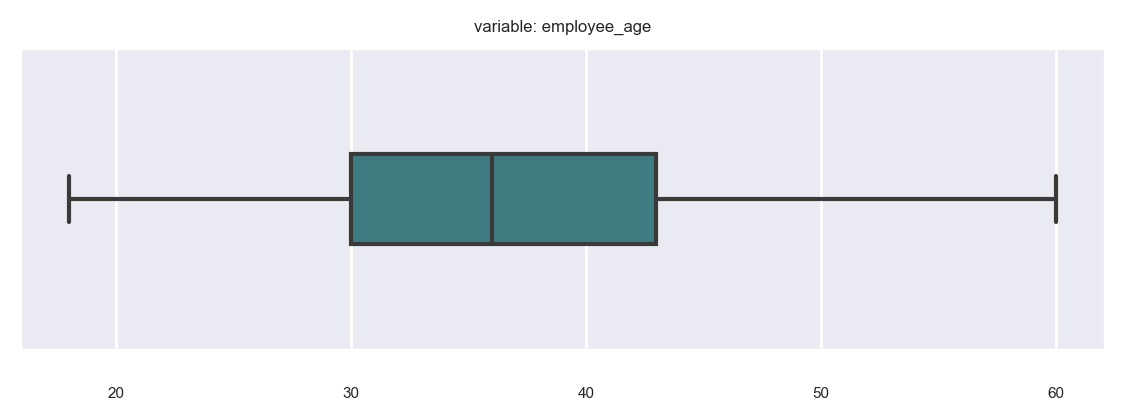

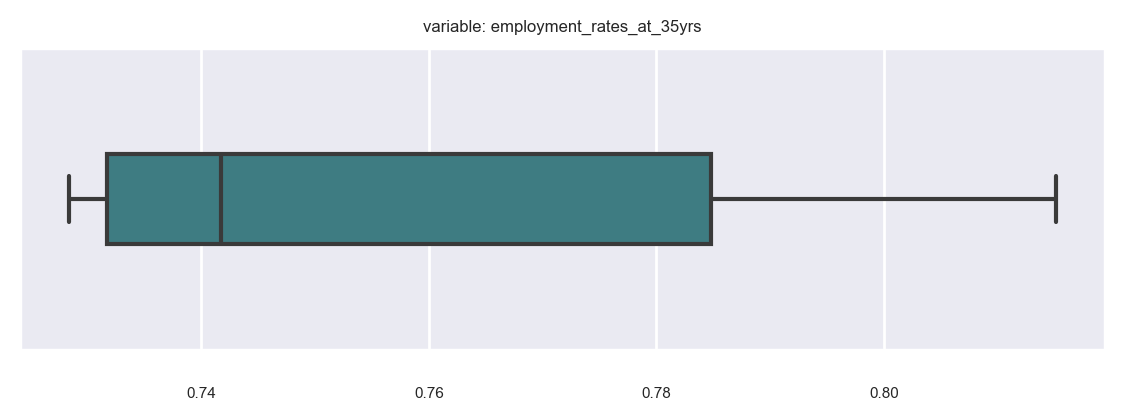

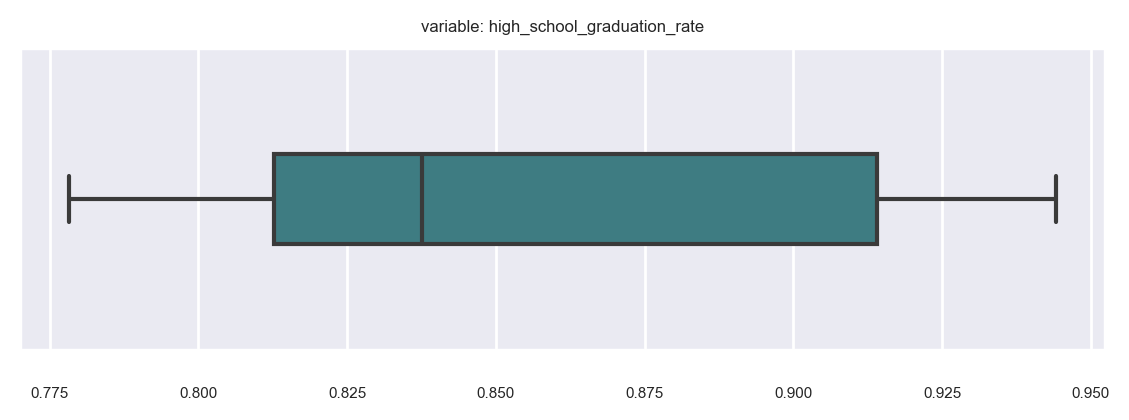

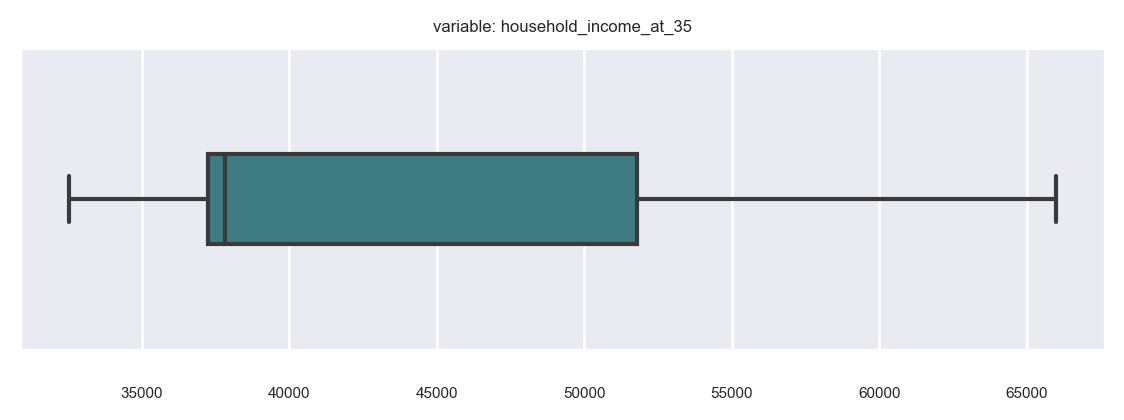

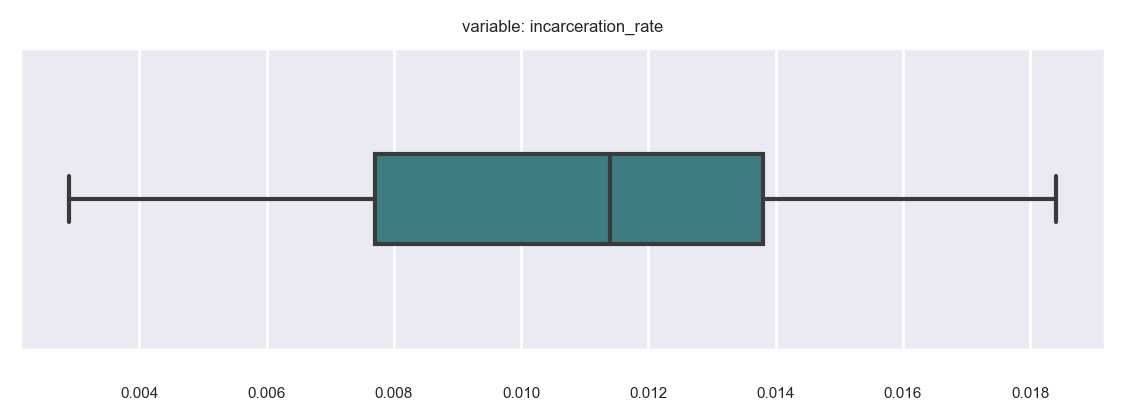

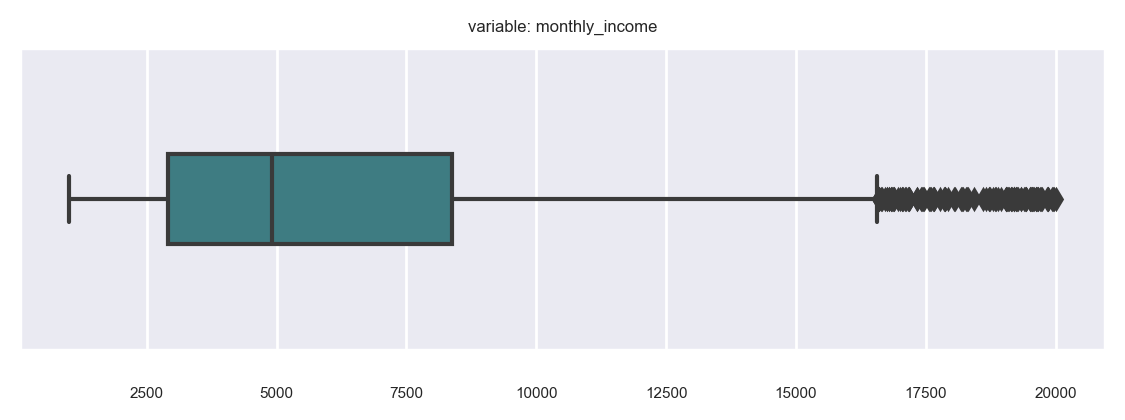

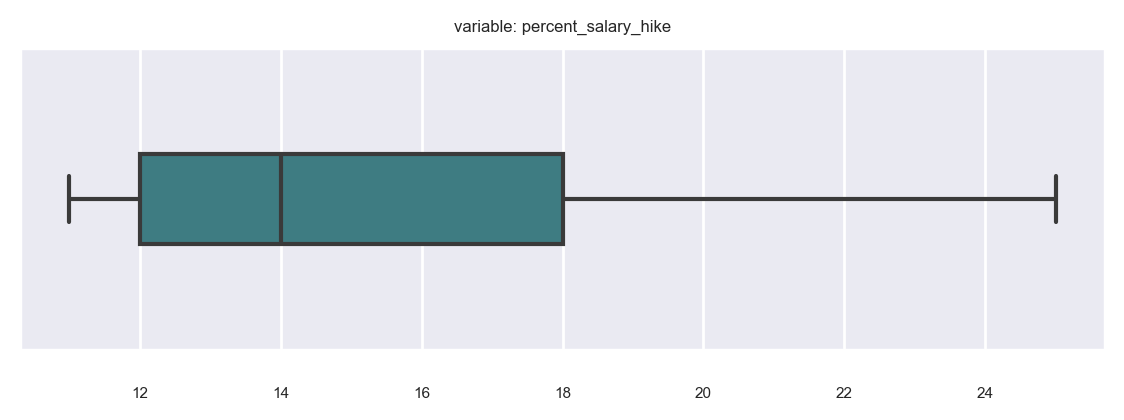

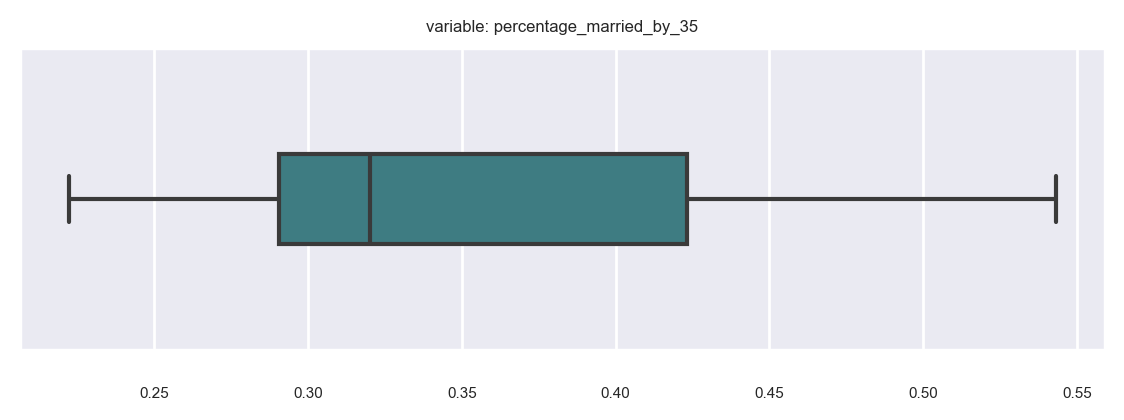

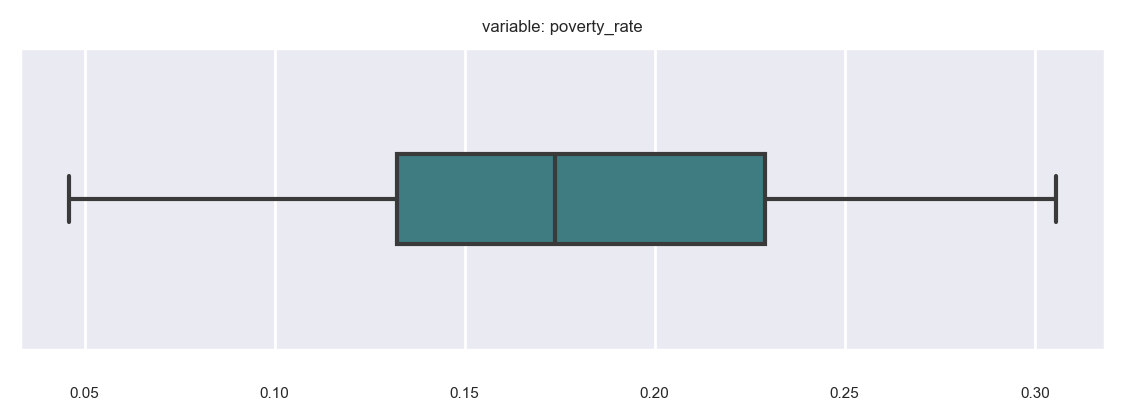

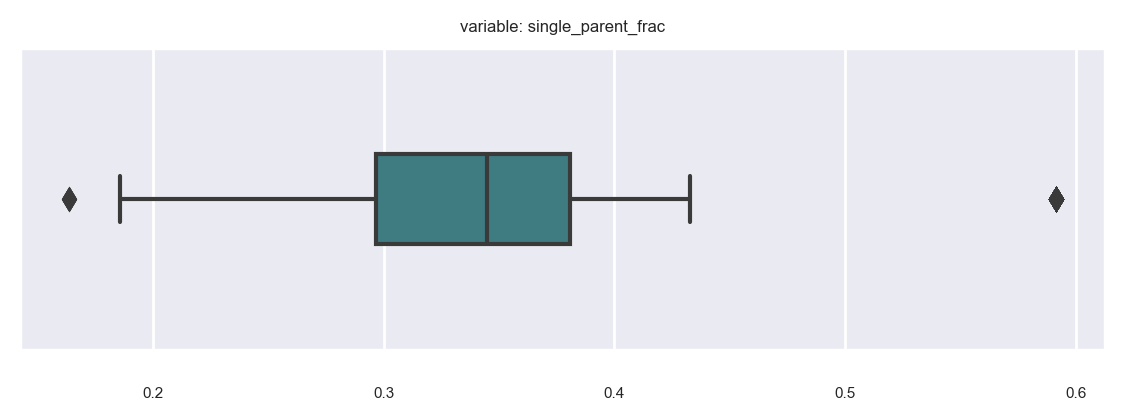

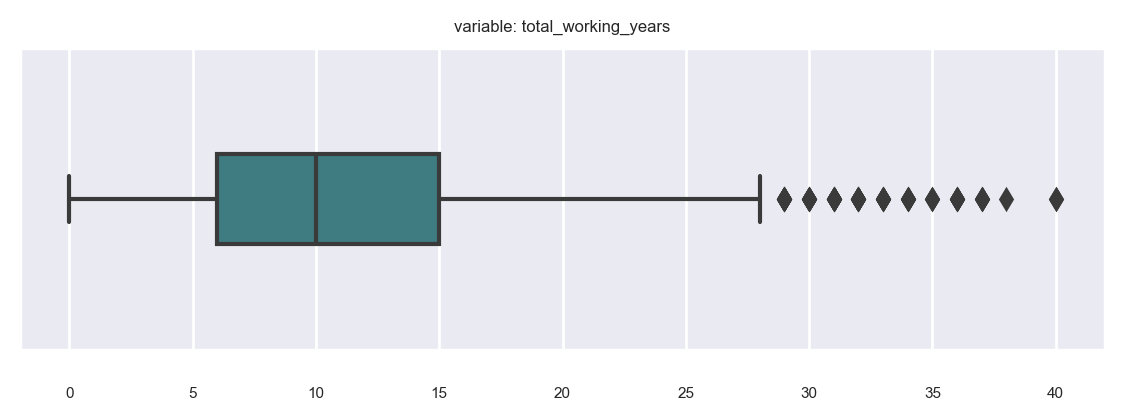

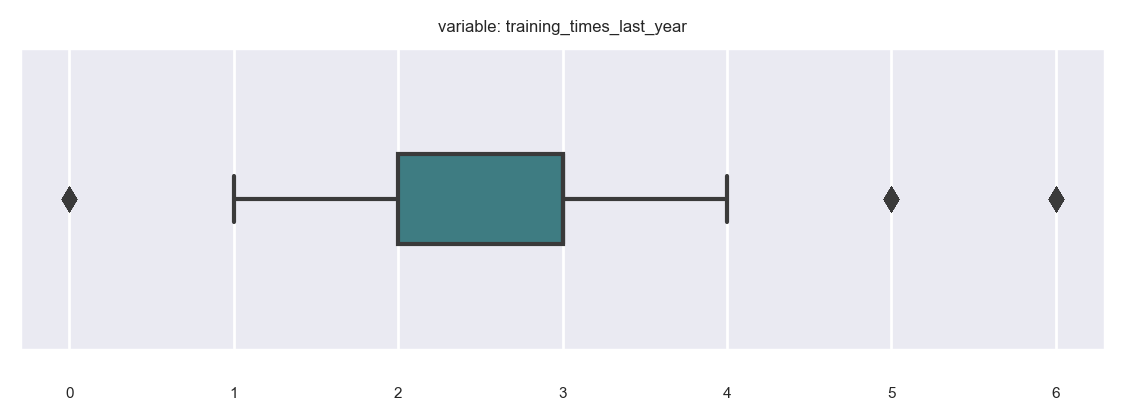

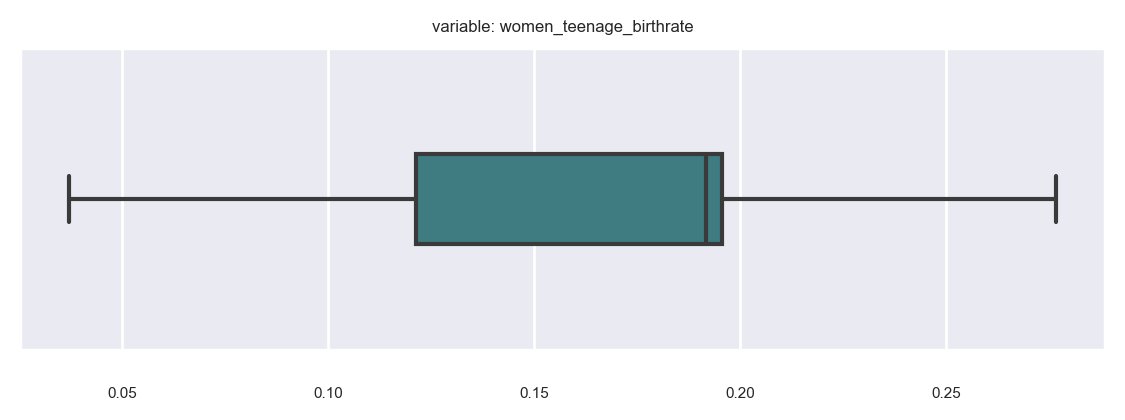

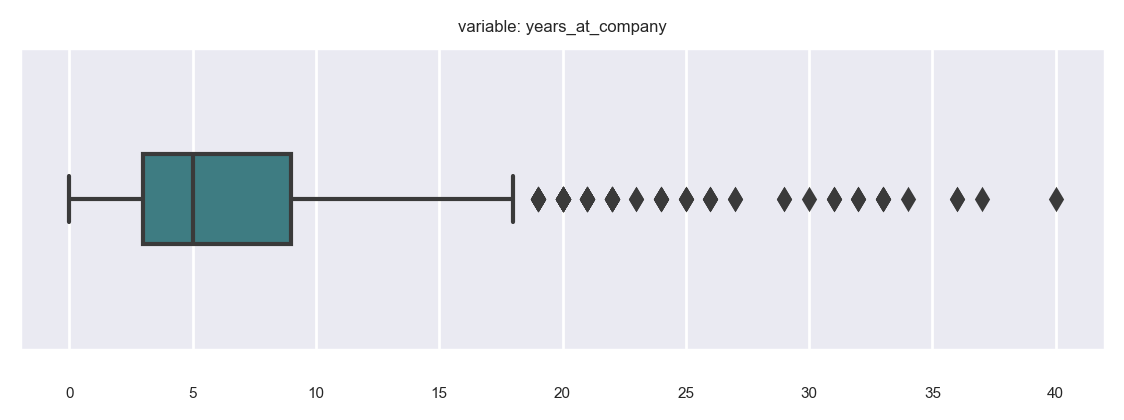

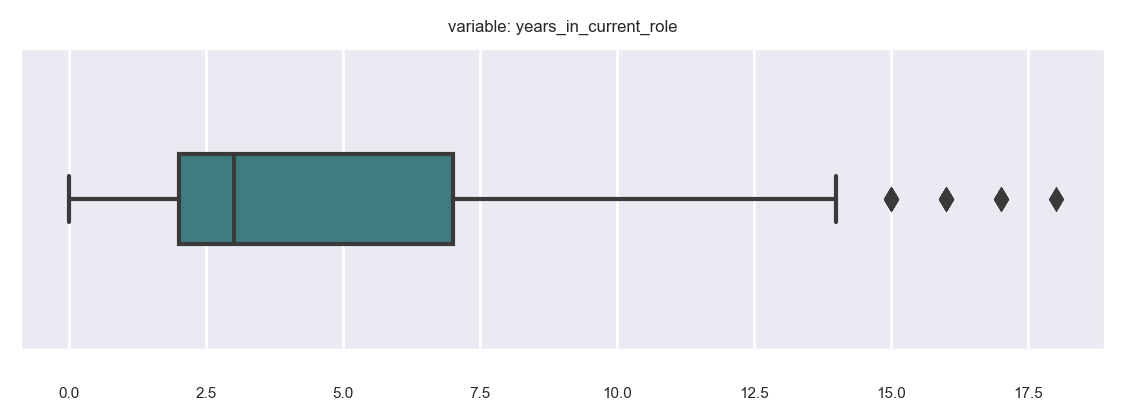

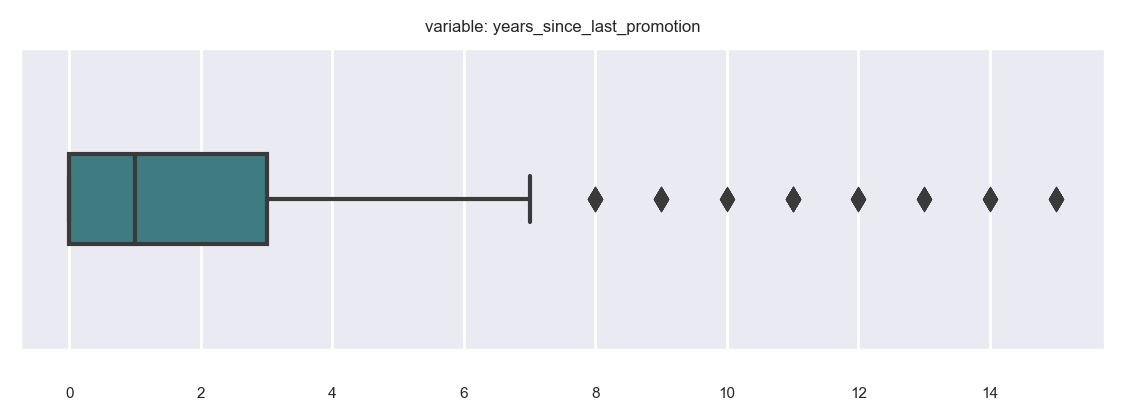

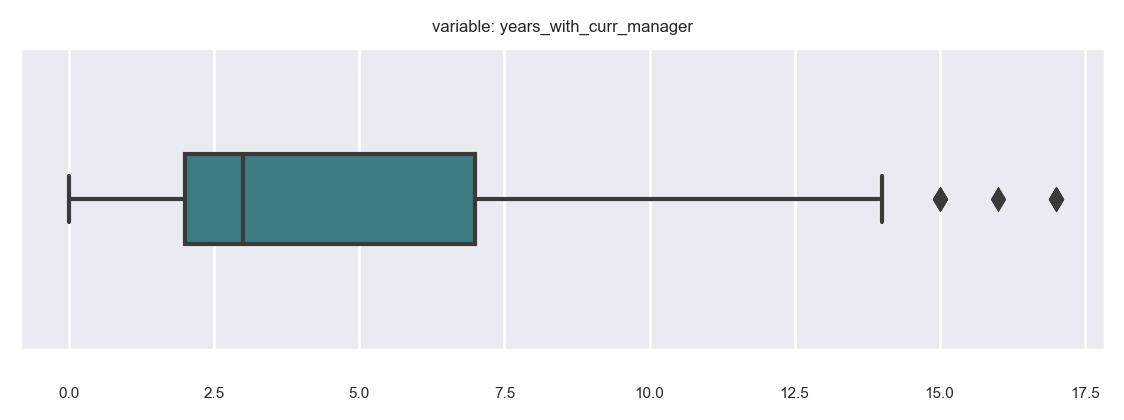

In [23]:
# box plots for continuous variables: are there outliers in the features?

for col in cont_lst:
    plt.figure(figsize = (7, 2))

    sns.boxplot(
        df[col],
        orient = "h", 
        palette = "crest", 
        width= 0.3)

    plt.title(f'variable: {col}')
    plt.ylabel(None)
    plt.xlabel(None)
    plt.show()

In [24]:
# continuous variables: lower and upper bounds using interquartile (IQR) range
'''Function created to determine continuous variable/feature lower/upper bounds using an interquartile range method'''
def get_lower_and_upper_bounds(df):
    holder = []
    num_lst = df.select_dtypes("number").columns.tolist()
    # num_lst = [ele for ele in num_lst if ele not in ("parcel_id", 'longitude', 'latitude', 'blockgroup_assignment')]
    k = 1.5

    # determining continuous features/columns
    for col in df[num_lst]:
        
        # determing 1st and 3rd quartile
        q1, q3 = df[col].quantile([.25, 0.75])
        
        # calculate interquartile range
        iqr = q3 - q1
        
        # set feature/data lower bound limit
        lower_bound = q1 - k * iqr

        # set feature/data upperbound limit
        upper_bound = q3 + k * iqr
        
        metrics = { 
            "column": col,
            "column type": df[col].dtype,
            "iqr": round(iqr, 5),
            "lower_bound": round(lower_bound, 5),
            "lower_outliers": len(df[df[col] < lower_bound]),
            "upper_bound": round(upper_bound, 5),
            "upper_outliers": len(df[df[col] > upper_bound])
        }

        holder.append(metrics)

    new_df = pd.DataFrame(holder)

    # returning the cleaned dataset
    print(f'dataframe shape: {new_df.shape}')

    return new_df

In [25]:
# applying the function to return a lower/upperbounds dataframe

get_lower_and_upper_bounds(df).sort_values(by="upper_outliers", ascending=False).reset_index(drop = True)

dataframe shape: (17, 7)


column column type      iqr  lower_bound  \
0      training_times_last_year       int64     1.00         0.50   
1            single_parent_frac     float64     0.08         0.17   
2                monthly_income       int64  5468.00     -5291.00   
3    years_since_last_promotion       int64     3.00        -4.50   
4              years_at_company       int64     6.00        -6.00   
5           total_working_years       int64     9.00        -7.50   
6         years_in_current_role       int64     5.00        -5.50   
7       years_with_curr_manager       int64     5.00        -5.50   
8                  poverty_rate     float64     0.10        -0.01   
9     employment_rates_at_35yrs     float64     0.05         0.65   
10                 employee_age       int64    13.00        10.50   
11      women_teenage_birthrate     float64     0.07         0.01   
12           incarceration_rate     float64     0.01        -0.00   
13  high_school_graduation_rate     float64     0.10         0.66   
14       household_income_at_35       int64 14544.00     15413.00   
15          percent_salary_hike       int64     6.00         3.00   
16     percentage_married_by_35     float64     0.13         0.09   

    lower_outliers  upper_bound  upper_outliers  
0               54         4.50             184  
1                5         0.51             123  
2                0     16581.00             114  
3                0         7.50             107  
4                0        18.00             104  
5                0        28.50              63  
6                0        14.50              21  
7                0        14.50              14  
8                0         0.37               0  
9                0         0.86               0  
10               0        62.50               0  
11               0         0.31               0  
12               0         0.02               0  
13               0         1.07               0  
14               0     73589.00               0  
15               0        27.00               0  
16               0         0.62               0

#### ``Outlier Observations``

**Intentionally choosing to leave the socioeconomic/opportunity atlas data for testing. Additionally, since these are actual community figures and may subsequently impact an employees attrition decision.**

<u>Ater applying an interquartile range with a k value of 1.5, I will apply/ommit the following outlier cleaning:</u>

**monthly_income:** upperbound $16581.00

- this signals to me that these employees are either contractors or senior leaders at the company. If they are senior leaders, my assumption is that they are more reluctant to make an employment change due to their potential leadership responsibilities, role, and stated salary. 

**year_since_last_promotion:** upperbound 7.50 years

- this signals to me that these employees may already be seeking other opportunities elsewhere - potentially with an employer that is willing to offer them a better position with greater responsibilities, and salary. I will ommit employees over the dataset upperbound.

**years_at_company:** upperbound 18.00 years

- this signals to me that these employees may be reluctant to leave their current employer given the length of their tenure. Additionally, the current median employee tenure in the US is ~5 years, I will ommit employees over this upperbound.

**total_working_years:** upperbound 28.50 year

- similar to above, these employees may also be enroute to retirement or are simply less willing to make a career/employment shift given this late into their careers. Additionally, they might have also learned ways in which they can successfully navigate the socioeconomic challenges apparent in their communities. I will ommit employees over this upperbound.

**years_in_current_role:** upperbound 14.50 years

- given the median US employee/employer tenure, I assume that these employees 1. may already be seeking other opportunities or 2. are comfortable in their current roles and thefore are less willing to take socioeconomic factors as reason to leave their company. 

**years_with_curr_manager:** upperbound 14.50 years

- same as above, yet there could also be a relationship factor thats prevelant in the employees' tenure. Employees may have a good working relationship with their managers where they potentially feel "heard" and are having their socioeconomic concerns addressed. I will ommit employees over this upperbound.

----

``references:``

- https://www.bls.gov/news.release/tenure.nr0.htm


In [26]:
# creating a function to clean outliers at upperbounds

def df_outliers(df):

    # monthly income / leadership or seniority
    df = df[df["monthly_income"] <= 16581.00]
    
    # length of working tenure
    df = df[df["total_working_years"] <= 28.00]

    # length of tenure at current company
    df = df[df["years_at_company"] <= 18.00]

    # number of years since last promotion
    df = df[df["years_since_last_promotion"] <= 7.50]

    # number of years in current role 
    df = df[df["years_in_current_role"] <= 14.50]

    # number of year with current manager
    df = df[df["years_with_curr_manager"] <= 14.50]

    # returning the cleaned dataset
    print(f'dataframe shape: {df.shape}')

    return df

In [27]:
# applying the outlier function

df = df_outliers(df)
df.head()

dataframe shape: (1230, 34)


attrition  employee_age  monthly_income  percent_salary_hike  \
1       True            41            5993                   11   
2      False            49            5130                   23   
4       True            37            2090                   15   
5      False            33            2909                   11   
7      False            27            3468                   12   

   total_working_years  training_times_last_year  years_at_company  \
1                    8                         0                 6   
2                   10                         3                10   
4                    7                         3                 0   
5                    8                         3                 8   
7                    6                         3                 2   

   household_income_at_35  high_school_graduation_rate  \
1                   37229                         0.84   
2                   32542                         0.78   
4                   37229                         0.84   
5                   37229                         0.84   
7                   37826                         0.81   

   percentage_married_by_35  ...               job_role  job_satisfaction  \
1                      0.32  ...        Sales Executive                 4   
2                      0.22  ...     Research Scientist                 2   
4                      0.32  ...  Laboratory Technician                 3   
5                      0.32  ...     Research Scientist                 3   
7                      0.29  ...  Laboratory Technician                 2   

   marital_status  performance_rating  relationship_satisfaction  state  \
1          Single                   3                          1     NY   
2         Married                   4                          4     NY   
4          Single                   3                          2     NY   
5         Married                   3                          3     NY   
7         Married                   3                          4     NY   

  stock_option_level work_life_balance years_in_current_role  \
1                  0                 1                     4   
2                  1                 3                     7   
4                  0                 3                     0   
5                  0                 3                     7   
7                  1                 3                     2   

  years_with_curr_manager  
1                       5  
2                       7  
4                       0  
5                       0  
7                       2  

[5 rows x 34 columns]

In [28]:
# percentage lost after outlier cleaning
# ~19.5% loss of original df

round((df.shape[0] - ibm_df.shape[0])/df.shape[0], 3)

-0.195

In [29]:
# seeing the dataset

df.head()

attrition  employee_age  monthly_income  percent_salary_hike  \
1       True            41            5993                   11   
2      False            49            5130                   23   
4       True            37            2090                   15   
5      False            33            2909                   11   
7      False            27            3468                   12   

   total_working_years  training_times_last_year  years_at_company  \
1                    8                         0                 6   
2                   10                         3                10   
4                    7                         3                 0   
5                    8                         3                 8   
7                    6                         3                 2   

   household_income_at_35  high_school_graduation_rate  \
1                   37229                         0.84   
2                   32542                         0.78   
4                   37229                         0.84   
5                   37229                         0.84   
7                   37826                         0.81   

   percentage_married_by_35  ...               job_role  job_satisfaction  \
1                      0.32  ...        Sales Executive                 4   
2                      0.22  ...     Research Scientist                 2   
4                      0.32  ...  Laboratory Technician                 3   
5                      0.32  ...     Research Scientist                 3   
7                      0.29  ...  Laboratory Technician                 2   

   marital_status  performance_rating  relationship_satisfaction  state  \
1          Single                   3                          1     NY   
2         Married                   4                          4     NY   
4          Single                   3                          2     NY   
5         Married                   3                          3     NY   
7         Married                   3                          4     NY   

  stock_option_level work_life_balance years_in_current_role  \
1                  0                 1                     4   
2                  1                 3                     7   
4                  0                 3                     0   
5                  0                 3                     7   
7                  1                 3                     2   

  years_with_curr_manager  
1                       5  
2                       7  
4                       0  
5                       0  
7                       2  

[5 rows x 34 columns]

In [30]:
# renaming/classifying attrition as boolean T/F values

df["attrition"] = df["attrition"].replace({"Yes": True, "No": False})
df.attrition.head()

1     True
2    False
4     True
5    False
7    False
Name: attrition, dtype: bool

----
### **``Splitting the Original Dataset``**


In [31]:
'''Function created to split the initial dataset into train, validate, and test datsets'''
def train_validate_test_split(df):
    train_and_validate, test = train_test_split(
                                                df, 
                                                test_size = 0.2, 
                                                random_state = 548,
                                                stratify = df["attrition"])
    
    train, validate = train_test_split(
                                    train_and_validate,
                                    test_size = 0.3,
                                    random_state = 548,
                                    stratify = train_and_validate["attrition"])

    print(f'train shape: {train.shape}')
    print(f'validate shape: {validate.shape}')
    print(f'test shape: {test.shape}')

    return train, validate, test

In [32]:
# splitting dataset into training, validate, and test datasets

train, validate, test = train_validate_test_split(df)

train shape: (688, 34)
validate shape: (296, 34)
test shape: (246, 34)


In [33]:
# what is the percentage of the target variable in ea. dataset?
# this checks out!

print(f'target percentage in train: {round(len(train[train["attrition"] == True])/train.shape[0], 3)}')
print(f'target percentage in validate: {round(len(validate[validate["attrition"] == True])/validate.shape[0], 3)}')
print(f'target percentage in test: {round(len(test[test["attrition"] == True])/test.shape[0], 3)}')

target percentage in train: 0.177
target percentage in validate: 0.176
target percentage in test: 0.175


----
#### ``Setting a Baseline: Prediction Employee Attrition``

In [130]:
# let's set an attrition baseline using a mode method for ea. dataset
# For the baseline accuracy, I have taken the mode of the two (2) binary "attrition" options = False and have set this as the baseline prediction
# baseline accuracy score: the total number of times that the baseline prediction matched the actual employee attrition outcome
# baseline accuracy score: ~82.0% **(note that if the goal is to predict attrition = 1, then baseline accuracy is ~18%)
    
train_baseline = train
train_baseline["baseline_prediction"] = False
baseline_train = (train_baseline["baseline_prediction"] == train_baseline["attrition"]).mean().round(3)
print(f'Training Baseline Accuracy: % {(baseline_train * 100).round(5)}')

print('-------------------------------------------')

validate_baseline = validate
validate_baseline["baseline_prediction"] = False
baseline_val = (validate_baseline["baseline_prediction"] == validate_baseline["attrition"]).mean().round(3)
print(f'Validate Baseline Accuracy: % {(baseline_val * 100).round(5)}')

Training Baseline Accuracy: % 82.3
-------------------------------------------
Validate Baseline Accuracy: % 82.4


In [35]:
# current continuous variables in dataset

train.select_dtypes(include = "number").columns.tolist()

['employee_age',
 'monthly_income',
 'percent_salary_hike',
 'total_working_years',
 'training_times_last_year',
 'years_at_company',
 'household_income_at_35',
 'high_school_graduation_rate',
 'percentage_married_by_35',
 'incarceration_rate',
 'women_teenage_birthrate',
 'poverty_rate',
 'employment_rates_at_35yrs',
 'single_parent_frac',
 'years_since_last_promotion',
 'years_in_current_role',
 'years_with_curr_manager']

In [36]:
# let's also look at discrete variables

train.select_dtypes(exclude = "number").columns.tolist()

['attrition',
 'county_name',
 'department',
 'education',
 'education_field',
 'environment_satisfaction',
 'gender',
 'job_involvement',
 'job_level',
 'job_role',
 'job_satisfaction',
 'marital_status',
 'performance_rating',
 'relationship_satisfaction',
 'state',
 'stock_option_level',
 'work_life_balance',
 'baseline_prediction']

In [37]:
# setting continuous variables list

cont_lst = sorted([
'employee_age',
'monthly_income',
'percent_salary_hike',
'total_working_years',
'training_times_last_year',
'years_at_company',
'household_income_at_35',
'high_school_graduation_rate',
'percentage_married_by_35',
'incarceration_rate',
'women_teenage_birthrate',
'poverty_rate',
'employment_rates_at_35yrs',
'single_parent_frac',
'years_since_last_promotion',
'years_in_current_role',
'years_with_curr_manager',
])

cont_lst

['employee_age',
 'employment_rates_at_35yrs',
 'high_school_graduation_rate',
 'household_income_at_35',
 'incarceration_rate',
 'monthly_income',
 'percent_salary_hike',
 'percentage_married_by_35',
 'poverty_rate',
 'single_parent_frac',
 'total_working_years',
 'training_times_last_year',
 'women_teenage_birthrate',
 'years_at_company',
 'years_in_current_role',
 'years_since_last_promotion',
 'years_with_curr_manager']

In [38]:
# setting disc variables list

disc_lst = sorted([
'stock_option_level',
'work_life_balance',
'education',
'job_involvement',
'job_level',
'job_satisfaction',
'performance_rating',
'relationship_satisfaction',
'county_name',
'state',
'department',
'education_field',
'gender',
'job_role',
'marital_status',
'environment_satisfaction'
])

disc_lst

['county_name',
 'department',
 'education',
 'education_field',
 'environment_satisfaction',
 'gender',
 'job_involvement',
 'job_level',
 'job_role',
 'job_satisfaction',
 'marital_status',
 'performance_rating',
 'relationship_satisfaction',
 'state',
 'stock_option_level',
 'work_life_balance']

-----
### ``Exploration: Hypothesis Testing``

    The focus will first be on determined equity/community variables

**"Attrition":** Discrete/Categorical Target Variable

**``Variables not taken into exploration:``**

1. 'business_travel'
2. 'cty'
3. 'daily_rate'
4. 'distance_from_home'
5. 'hourly_rate'
6. 'monthly_rate'
7. 'num_companies_worked'
8. 'over_time'


**``Continuous Variables:``**

1. 'employee_age'
2. 'employment_rates_at_35yrs'
3. 'high_school_graduation_rate'
4. 'household_income_at_35'
5. 'incarceration_rate'
6. 'monthly_income'
7. 'percent_salary_hike'
8. 'percentage_married_by_35'
9. 'poverty_rate'
10. 'single_parent_frac'
11. 'total_working_years'
12. 'training_times_last_year'
13. 'women_teenage_birthrate'
14. 'years_at_company'
15. 'years_since_last_promotion'
16. 'years_in_current_role'
17. 'years_with_curr_manager'

**``Discrete Varibles:``**

1. 'attrition'
2. 'county_name'
3. 'department'
4. 'education'
5. 'education_field'
6. 'environment_satisfaction'
7. 'gender'
8. 'job_involvement'
9. 'job_level'
10. 'job_role'
11. 'job_satisfaction'
12. 'marital_status'
13. 'performance_rating'
14. 'relationship_satisfaction'
15. 'standard_hours'
16. 'state'
17. 'stock_option_level'
18. 'work_life_balance'


In [39]:
# updating datasets with confirmed variables

train = train[[
            'attrition',
            'employee_age',
            'monthly_income',
            'percent_salary_hike',
            'total_working_years',
            'training_times_last_year',
            'years_at_company',
            'household_income_at_35',
            'high_school_graduation_rate',
            'percentage_married_by_35',
            'incarceration_rate',
            'women_teenage_birthrate',
            'poverty_rate',
            'employment_rates_at_35yrs',
            'single_parent_frac',
            'years_since_last_promotion',
            'county_name',
            'department',
            'education',
            'education_field',
            'environment_satisfaction',
            'gender',
            'job_involvement',
            'job_level',
            'job_role',
            'job_satisfaction',
            'marital_status',
            'performance_rating',
            'relationship_satisfaction',
            'state',
            'stock_option_level',
            'work_life_balance',
            'years_in_current_role',
            'years_with_curr_manager'
]]

validate = validate[[ 
            'attrition',
            'employee_age',
            'monthly_income',
            'percent_salary_hike',
            'total_working_years',
            'training_times_last_year',
            'years_at_company',
            'household_income_at_35',
            'high_school_graduation_rate',
            'percentage_married_by_35',
            'incarceration_rate',
            'women_teenage_birthrate',
            'poverty_rate',
            'employment_rates_at_35yrs',
            'single_parent_frac',
            'years_since_last_promotion',
            'county_name',
            'department',
            'education',
            'education_field',
            'environment_satisfaction',
            'gender',
            'job_involvement',
            'job_level',
            'job_role',
            'job_satisfaction',
            'marital_status',
            'performance_rating',
            'relationship_satisfaction',
            'state',
            'stock_option_level',
            'work_life_balance',
            'years_in_current_role',
            'years_with_curr_manager'
]]

test = test[[ 
            'attrition',
            'employee_age',
            'monthly_income',
            'percent_salary_hike',
            'total_working_years',
            'training_times_last_year',
            'years_at_company',
            'household_income_at_35',
            'high_school_graduation_rate',
            'percentage_married_by_35',
            'incarceration_rate',
            'women_teenage_birthrate',
            'poverty_rate',
            'employment_rates_at_35yrs',
            'single_parent_frac',
            'years_since_last_promotion',
            'county_name',
            'department',
            'education',
            'education_field',
            'environment_satisfaction',
            'gender',
            'job_involvement',
            'job_level',
            'job_role',
            'job_satisfaction',
            'marital_status',
            'performance_rating',
            'relationship_satisfaction',
            'state',
            'stock_option_level',
            'work_life_balance',
            'years_in_current_role',
            'years_with_curr_manager'
]]

In [40]:
# cleaning dataframes for needed variables

# train[disc_lst] = train[disc_lst].astype(object)
# validate[disc_lst] = validate[disc_lst].astype(object)
# test[disc_lst] = test[disc_lst].astype(object)

# train.info()

In [41]:
# 2nd split: splitting larger datasets into x and y variables

X_train = train.drop(columns = "attrition")
y_train = train['attrition']

X_validate = validate.drop(columns = "attrition")
y_validate = validate['attrition']

X_test = test.drop(columns = "attrition")
y_test = test['attrition']

In [42]:
# checking the target variable
# note: the model will also read boolean type (F/T) as either (0/1)
# False (with the company):    566 employees
# True (has left the company):     122 employees

y_train.value_counts()

False    566
True     122
Name: attrition, dtype: int64

----
### ``Hypothesis Tests: Continuous Variables``

**<u>``1-sample | 2 Tail T-test Results``</u>**


$H_0$ (Null Hypothesis): The variable mean of turn over employees is not statistically different than the population variable mean.

$H_a$ (Alternate Hypothesis): The variable mean for turn over employees is statistically different than the population variable mean.

* $alpha$: 1.0 - Confidence Interval (95% confidence level)
* $\alpha$ = 0.05

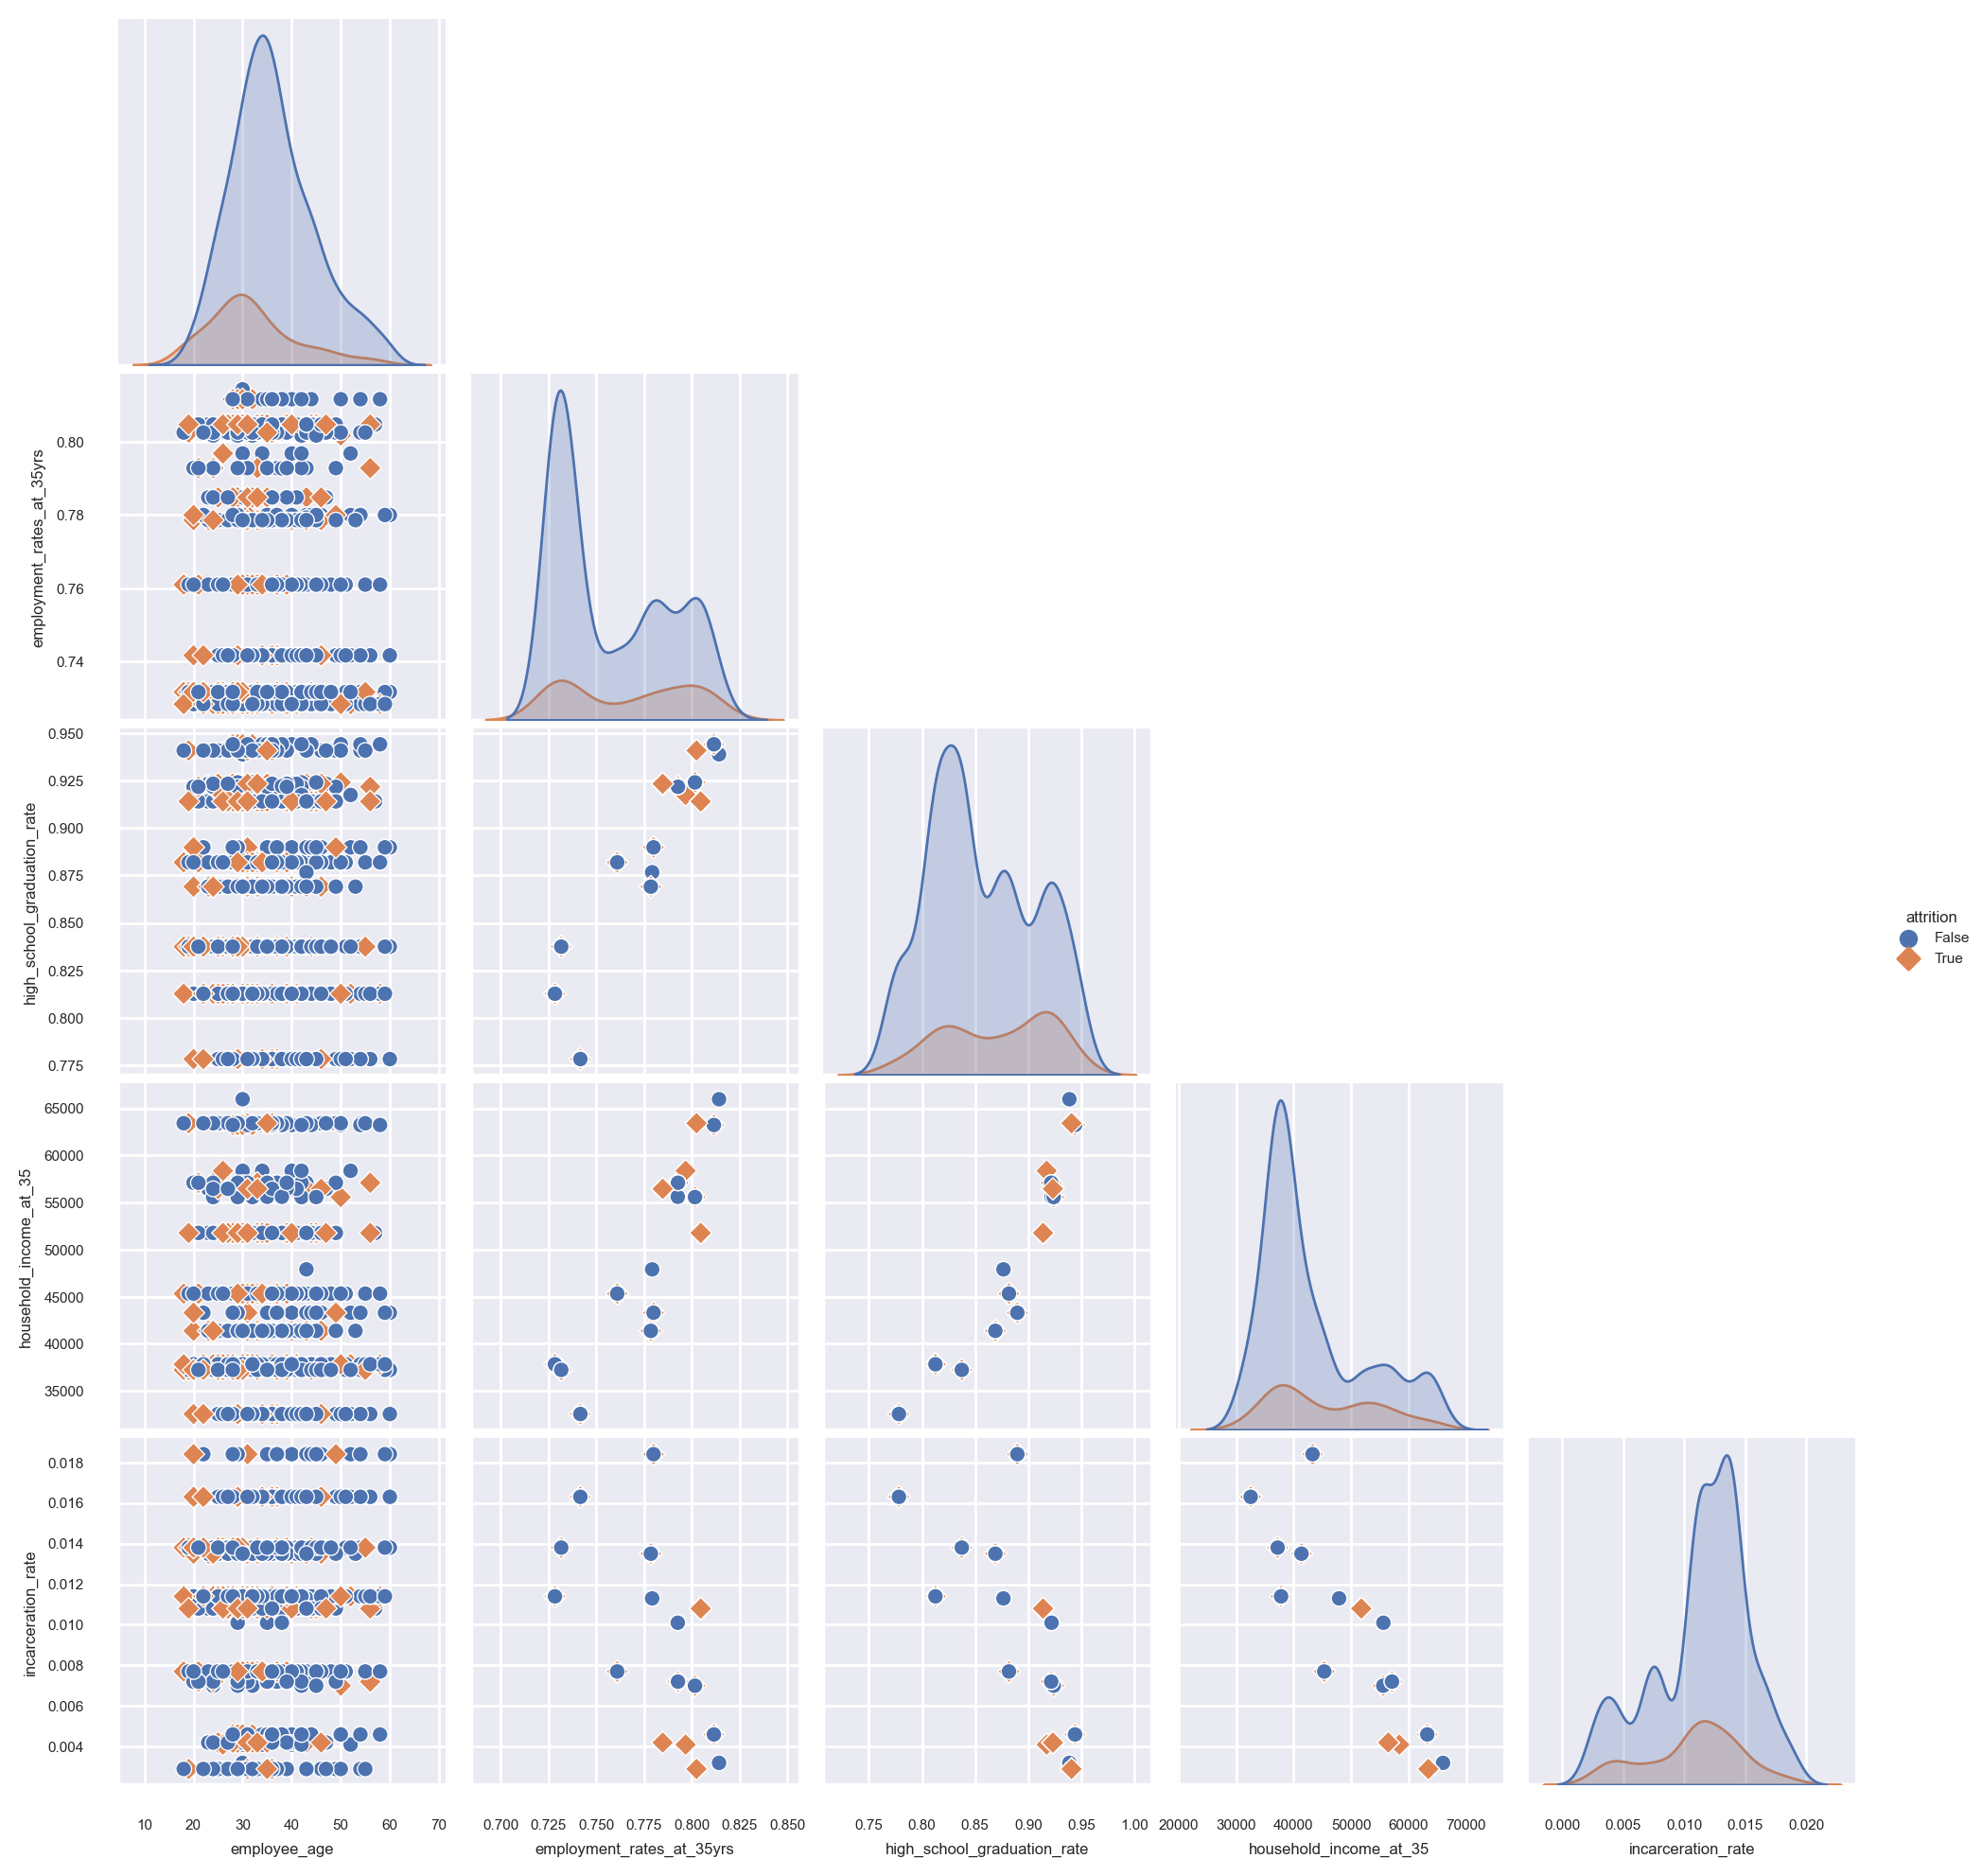

In [43]:
# sns.pairplot (first 6)

sns.pairplot(
    train, 
    vars =[
        'employee_age',
        'employment_rates_at_35yrs',
        'high_school_graduation_rate',
        'household_income_at_35',
        'incarceration_rate'],
    corner = True,  
    hue = "attrition",
    height = 2,
    markers=["o", "D"])

plt.show()

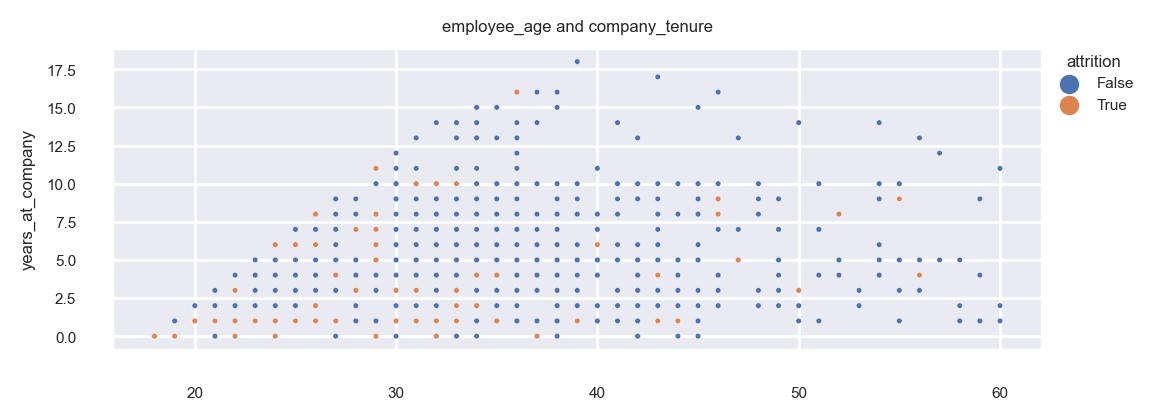

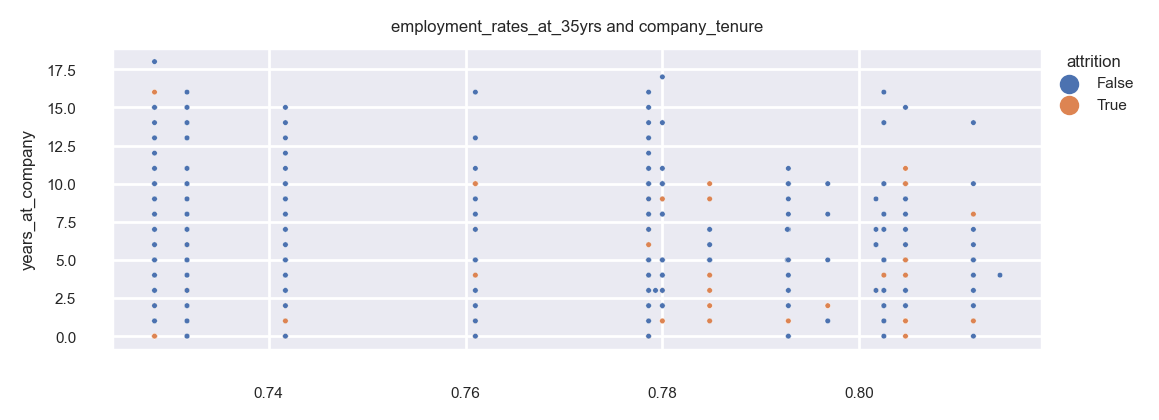

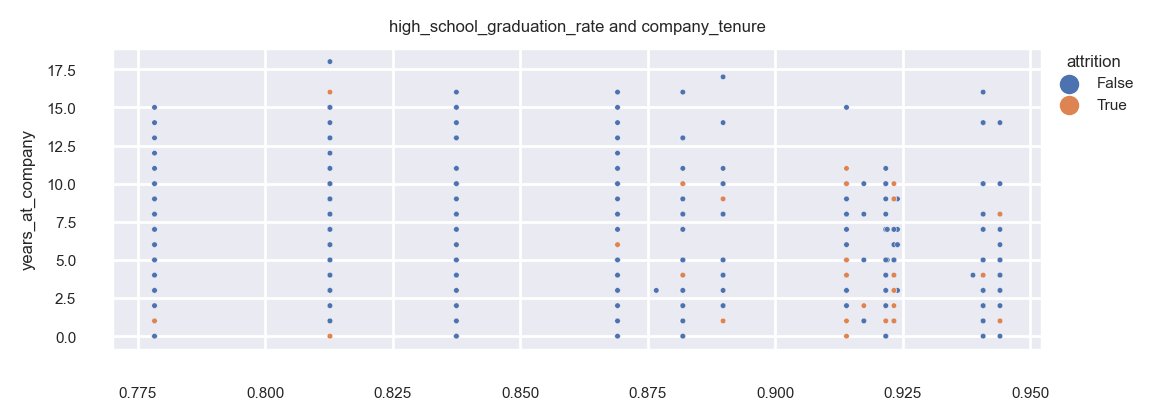

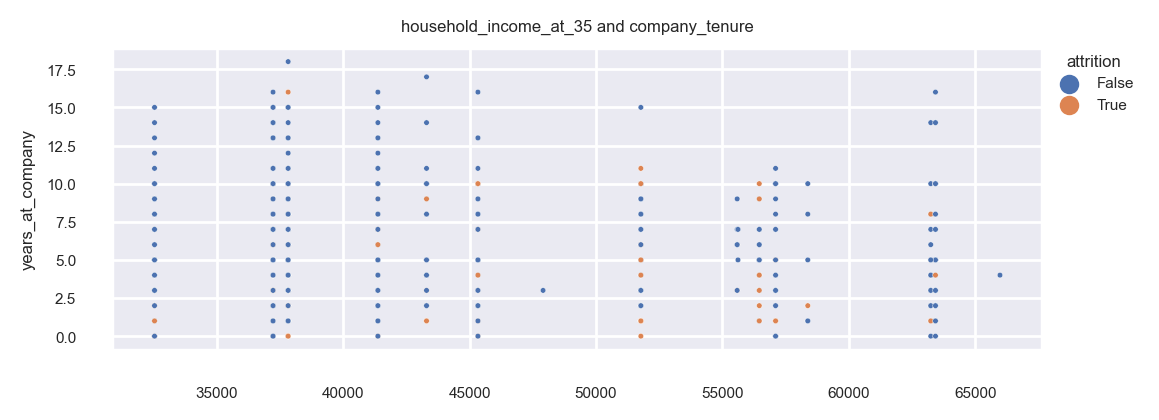

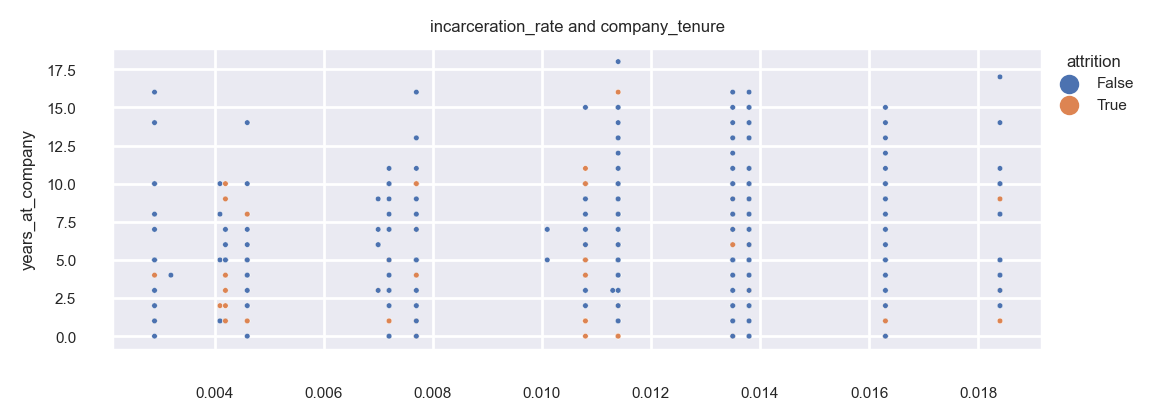

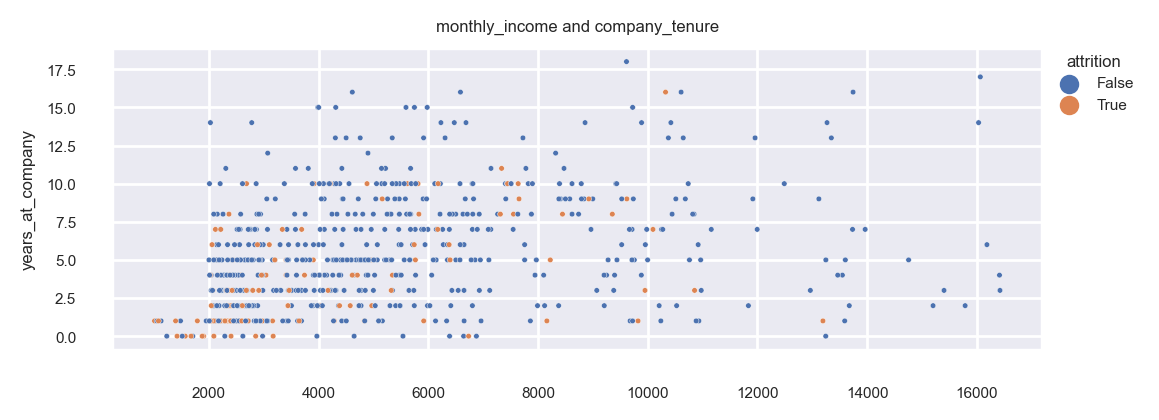

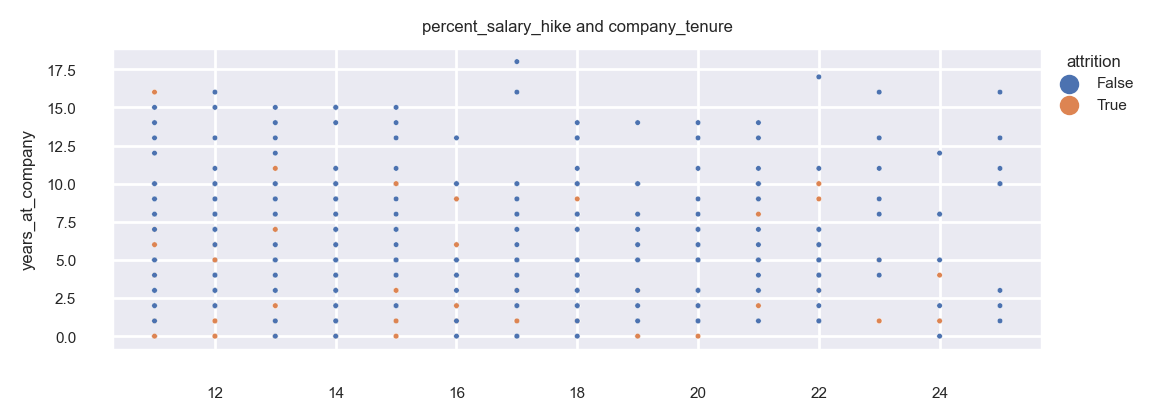

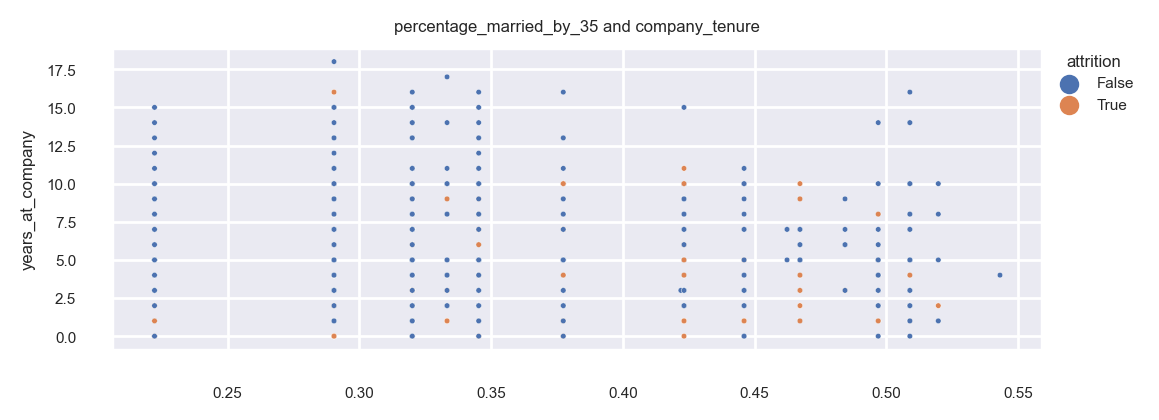

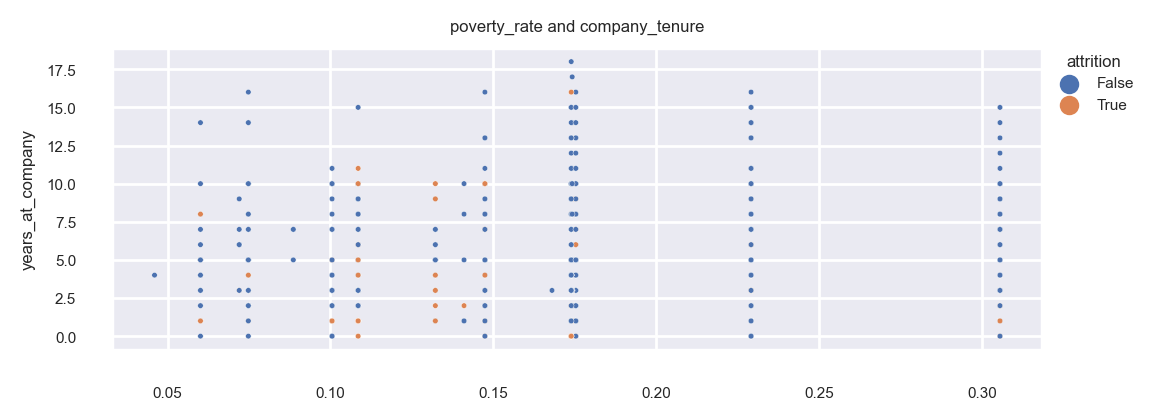

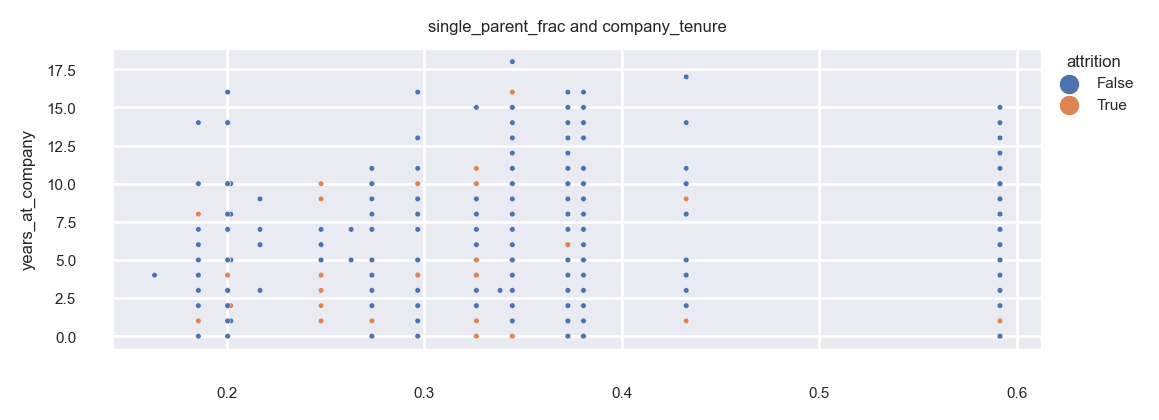

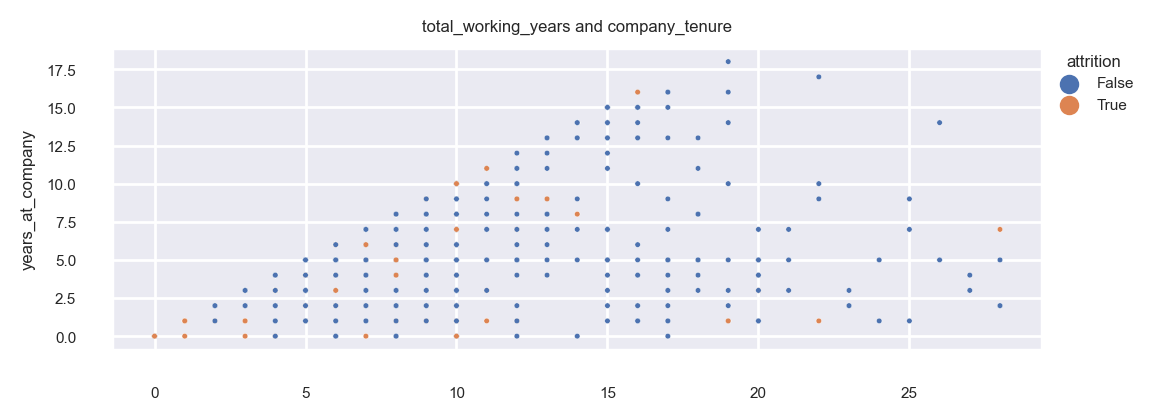

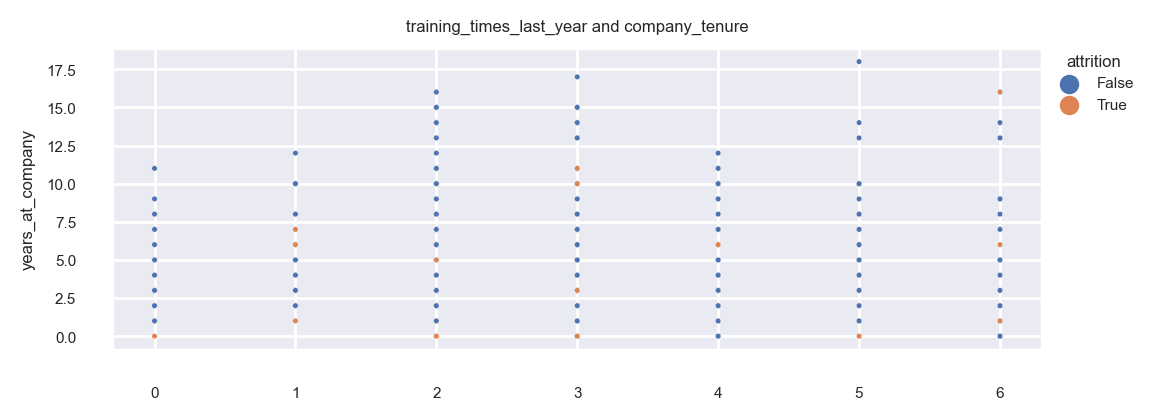

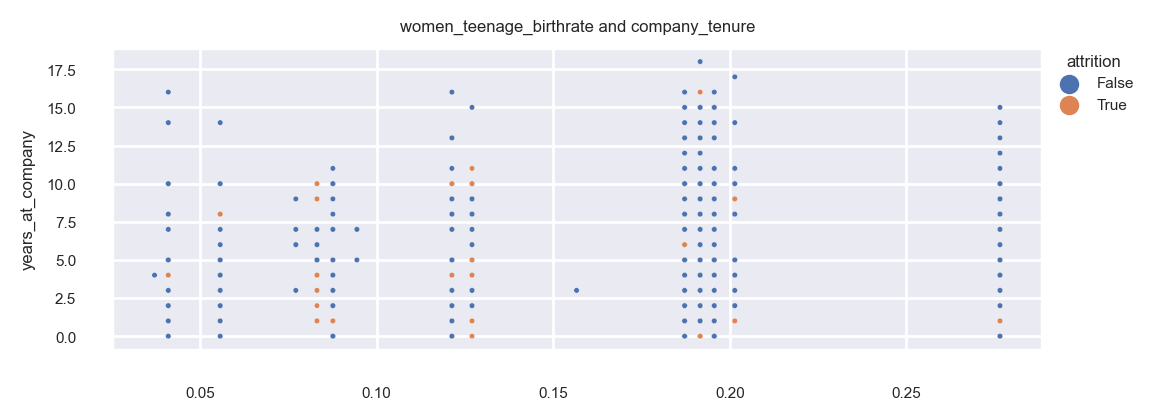

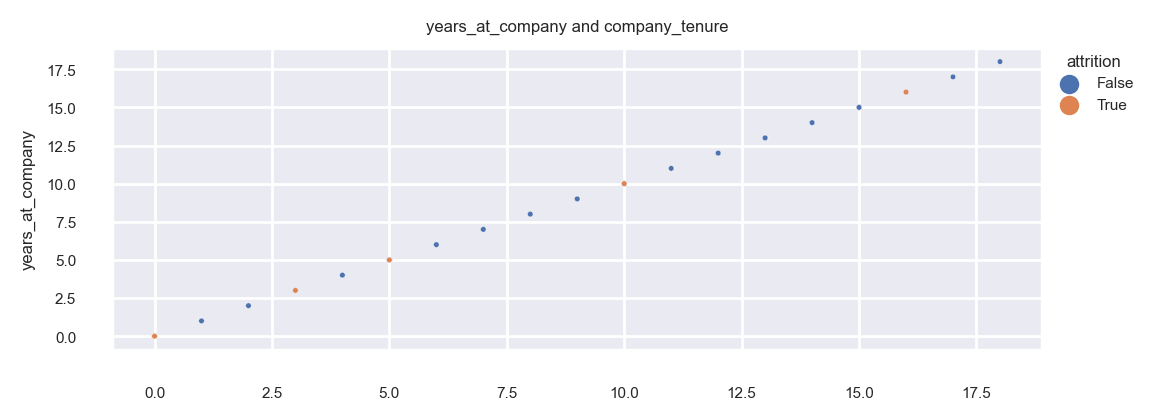

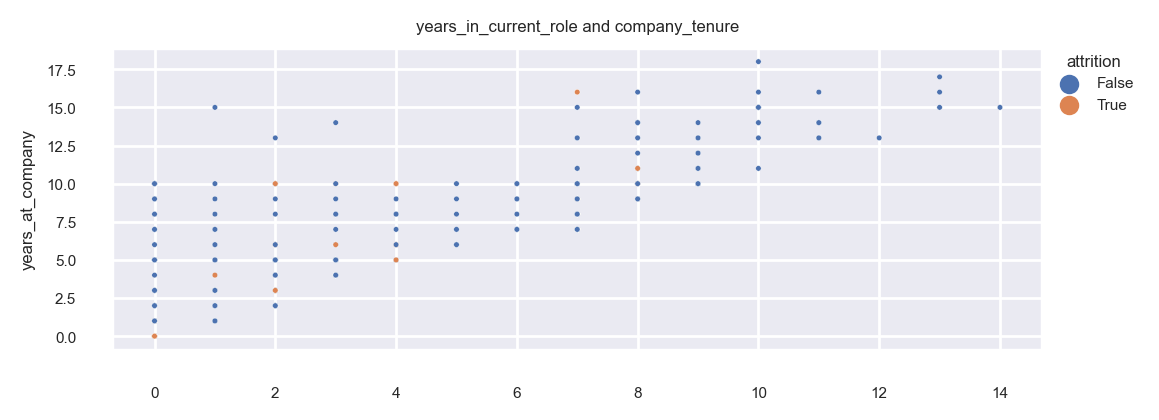

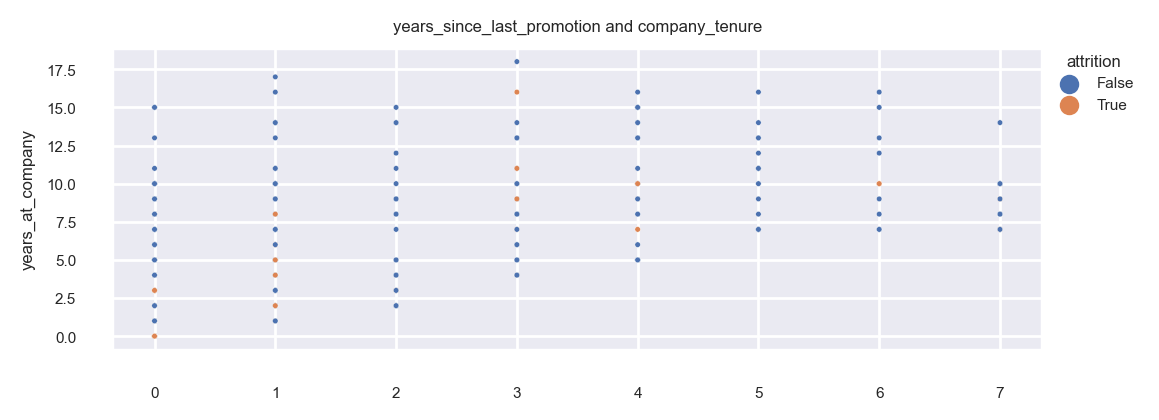

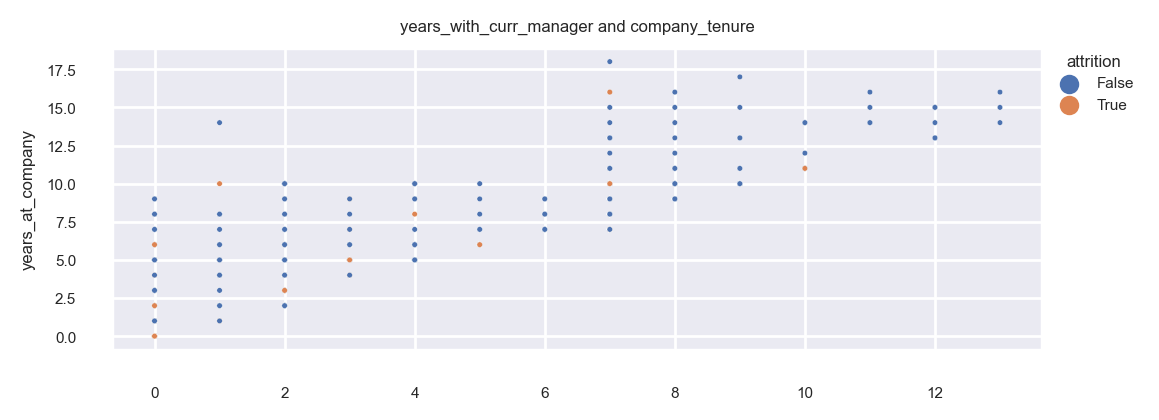

In [44]:
# plotting continuous variables against target

for col in cont_lst:
    plt.figure(figsize=(6, 2))

    sns.scatterplot(
        train[col],
        train["years_at_company"],
        hue = train["attrition"],
        s = 4)

    plt.legend(
        bbox_to_anchor=(1.105, 1), 
        title = "attrition", 
        loc = 'upper right', 
        borderaxespad = 0)

    plt.title(f'{col} and company_tenure')
    plt.xlabel(None)
    plt.show()

In [45]:
# continuous variables and evaluating statistical signifance in sample mean vs. population mean


alpha = 0.05

metrics = []
for col in cont_lst:
    pop_mean = train[col].mean()
    # sample_2_mean = train[train["attrition"] == False][col]
    sample_1_mean = train[train["attrition"] == True][col]

    t_score, p_value = stats.ttest_1samp(sample_1_mean, pop_mean)

    if p_value < alpha:
        output = {
            "continuous_feature": col,
            "t_score": t_score,
            "p_value": p_value}
        
        metrics.append(output)

    else:
        print(f'Column: {col} not statistically significant.')
        print("--------------------------------------")

onesample_t_test_scores = pd.DataFrame(metrics)
onesample_t_test_scores.round(4)

Column: incarceration_rate not statistically significant.
--------------------------------------
Column: percent_salary_hike not statistically significant.
--------------------------------------
Column: single_parent_frac not statistically significant.
--------------------------------------
Column: training_times_last_year not statistically significant.
--------------------------------------
Column: years_since_last_promotion not statistically significant.
--------------------------------------


continuous_feature  t_score  p_value
0                  employee_age    -4.31     0.00
1     employment_rates_at_35yrs     2.72     0.01
2   high_school_graduation_rate     2.59     0.01
3        household_income_at_35     2.38     0.02
4                monthly_income    -4.64     0.00
5      percentage_married_by_35     2.37     0.02
6                  poverty_rate    -2.41     0.02
7           total_working_years    -5.68     0.00
8       women_teenage_birthrate    -2.12     0.04
9              years_at_company    -5.01     0.00
10        years_in_current_role    -4.31     0.00
11      years_with_curr_manager    -4.41     0.00

In [46]:
onesample_t_test_scores.continuous_feature.tolist()

['employee_age',
 'employment_rates_at_35yrs',
 'high_school_graduation_rate',
 'household_income_at_35',
 'monthly_income',
 'percentage_married_by_35',
 'poverty_rate',
 'total_working_years',
 'women_teenage_birthrate',
 'years_at_company',
 'years_in_current_role',
 'years_with_curr_manager']

In [47]:
train.head()

attrition  employee_age  monthly_income  percent_salary_hike  \
161        True            56            4963                   18   
1647      False            27            3517                   17   
624       False            46           10527                   11   
1279       True            21            2625                   20   
469       False            29            4649                   14   

      total_working_years  training_times_last_year  years_at_company  \
161                     7                         2                 5   
1647                    5                         0                 3   
624                    28                         3                 2   
1279                    2                         2                 2   
469                     4                         3                 4   

      household_income_at_35  high_school_graduation_rate  \
161                    57101                         0.92   
1647                   41374                         0.87   
624                    63424                         0.94   
1279                   45330                         0.88   
469                    37826                         0.81   

      percentage_married_by_35  ...                   job_role  \
161                       0.45  ...         Research Scientist   
1647                      0.35  ...         Research Scientist   
624                       0.51  ...  Healthcare Representative   
1279                      0.38  ...      Laboratory Technician   
469                       0.29  ...            Sales Executive   

      job_satisfaction  marital_status  performance_rating  \
161                  2         Married                   3   
1647                 3         Married                   3   
624                  3         Married                   3   
1279                 3          Single                   4   
469                  3         Married                   3   

      relationship_satisfaction  state stock_option_level work_life_balance  \
161                           1     NY                  3                 3   
1647                          1     NJ                  0                 3   
624                           4     NJ                  0                 2   
1279                          3     NY                  0                 1   
469                           1     NY                  1                 2   

     years_in_current_role years_with_curr_manager  
161                      4                       3  
1647                     2                       2  
624                      2                       2  
1279                     2                       2  
469                      3                       2  

[5 rows x 34 columns]

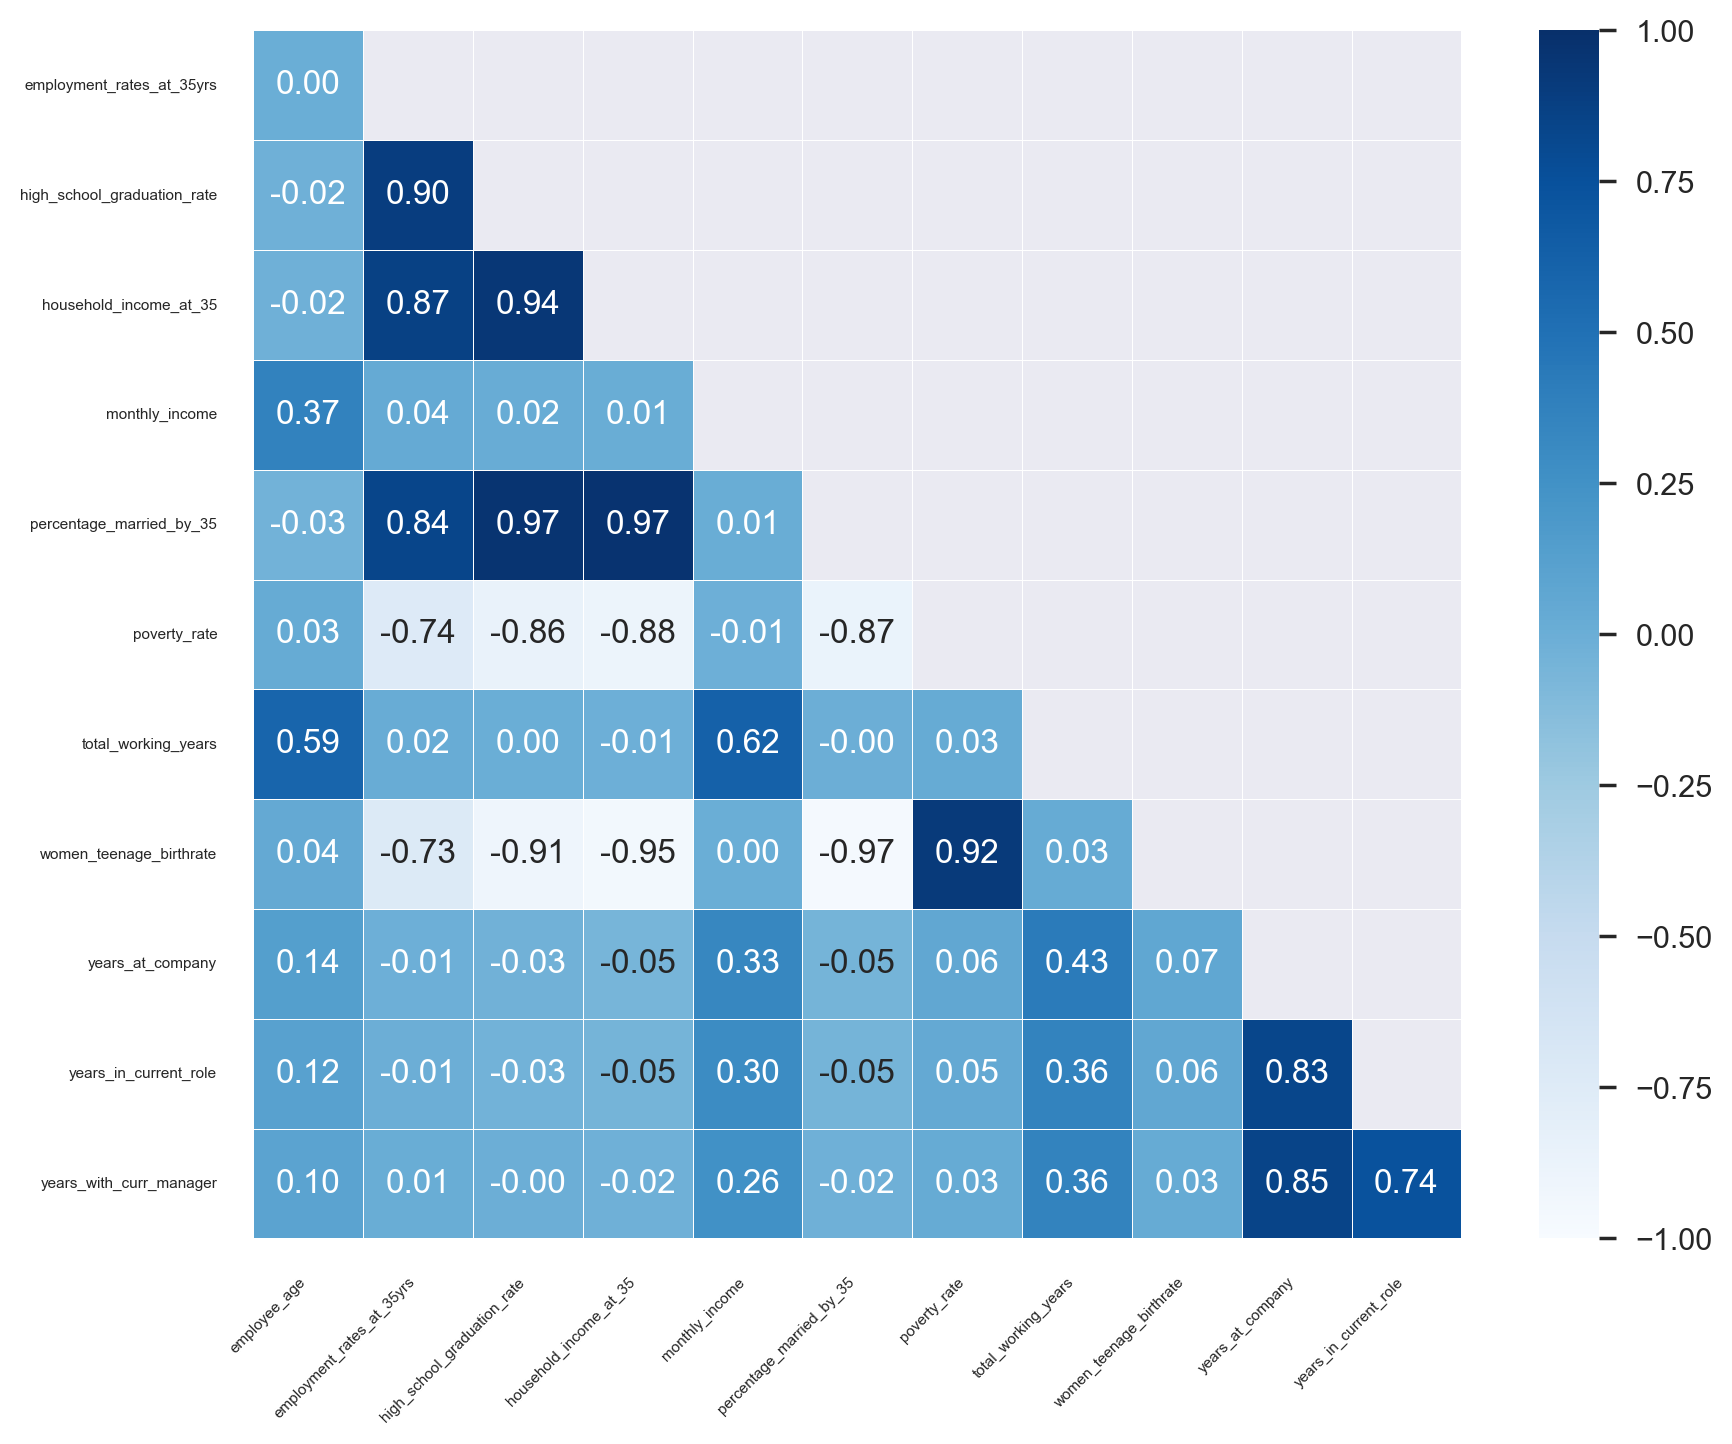

In [48]:
# sns.heatmap

# taking needed variables/df sample
corr_df = train[[ 
    'employee_age',
    'employment_rates_at_35yrs',
    'high_school_graduation_rate',
    'household_income_at_35',
    'monthly_income',
    'percentage_married_by_35',
    'poverty_rate',
    'total_working_years',
    'women_teenage_birthrate',
    'years_at_company',
    'years_in_current_role',
    'years_with_curr_manager']].reset_index(drop = True)

# returning correlation coefficient 
corr_array = corr_df.corr()

# create the object and axes
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style = "white")

# mask
mask = np.triu(np.ones_like(corr_array, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = corr_array.iloc[1:,:-1].copy()

g = sns.heatmap(
    corr, 
    mask=mask,
    cmap = "Blues",
    vmin = -1, 
    vmax = 1, 
    annot = True,
    annot_kws={
        'fontsize': 12
    },
    fmt =".2f",
    linewidths = 0.2,
    square = True)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.grid(False)
plt.show()

----

#### **``Summary: 1-sample T-test Results``**

After initial continuous hypotheses testing against the population mean - we can conclude that the following features/variables hold a statistical relationship with the target:

1. age
2. employment rates at 35yrs
3. high school graduation rate
4. household income at 35
5. monthly income
6. percentage married by 35
7. poverty rate
8. total working years
9. women teenage birthrate
10. years at company
11. years in current role
12. years with curr manager

<u>questions/thoughts after analysis:</u>

there are several features/variables that I will want to further investigate against the population. For example, I wonder if certain features such as "the percentage of single parents" in communities, or the "total number of years since an employee's last promotion" may be less linear and tests such as non-parametric/linear relationship testing may be more suitable for evaluating them against a population.

----
### **``Hypothesis Tests: Categorical/Discrete Variables``**

$H_0$: "There is NO association/relationship between observed variable outcomes and expected employee attrition."

$H_a$: "There IS an association/relationship between observed variable outcomes and expected employee attrition."

$\alpha$ = 1 - confidence level (95% confidence level)

$\alpha$: 0.05

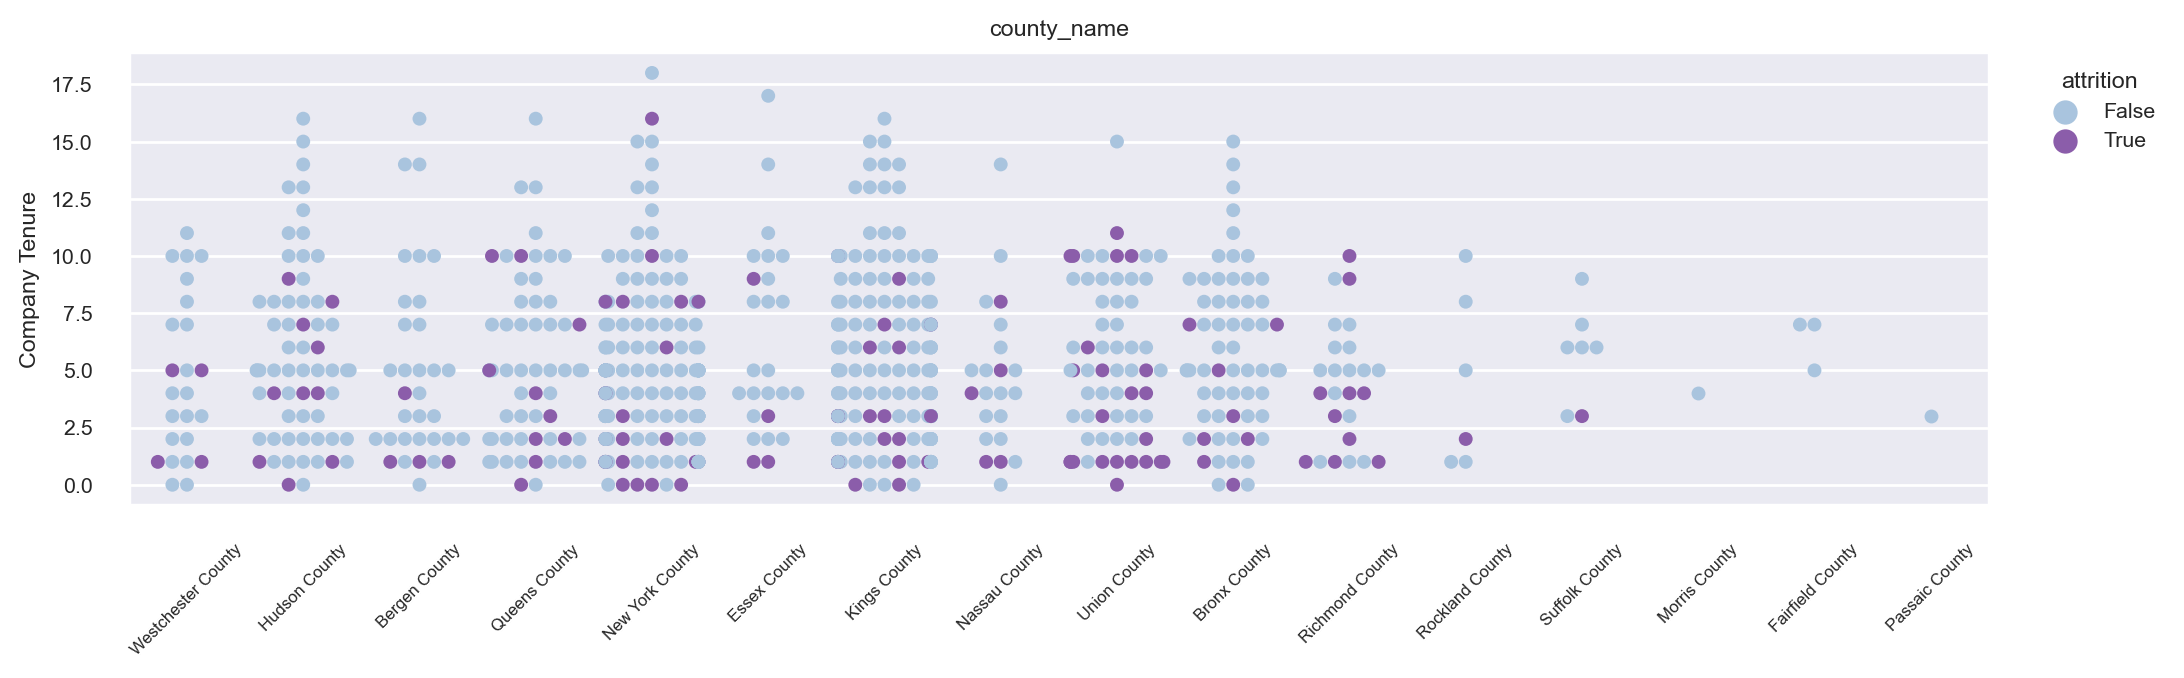

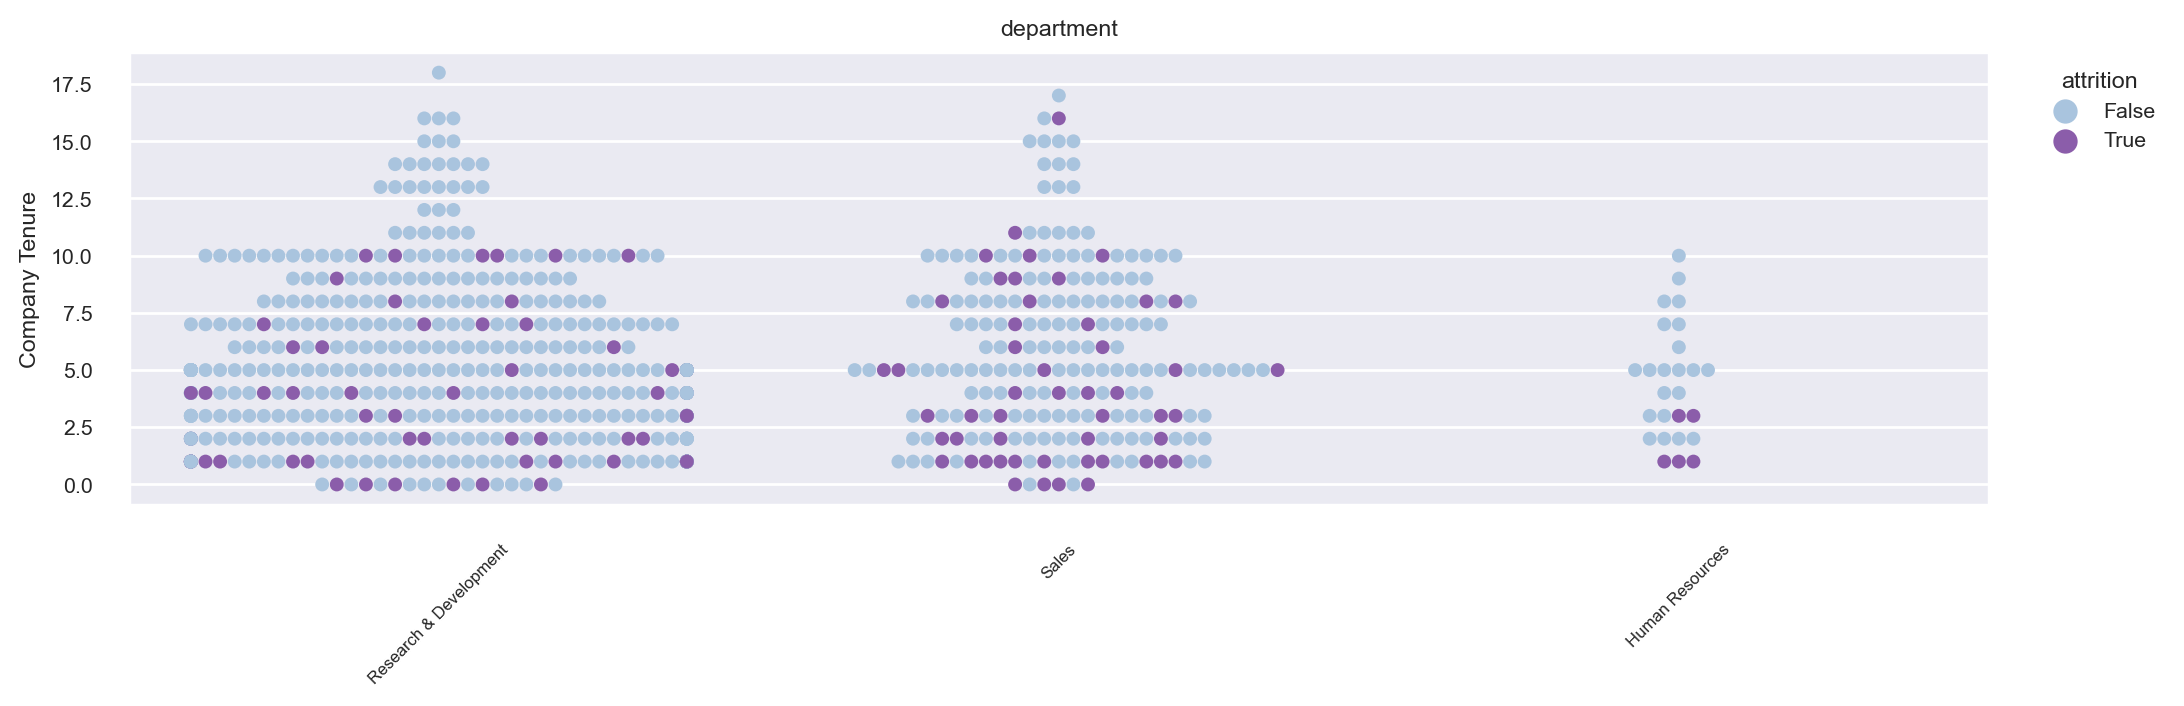

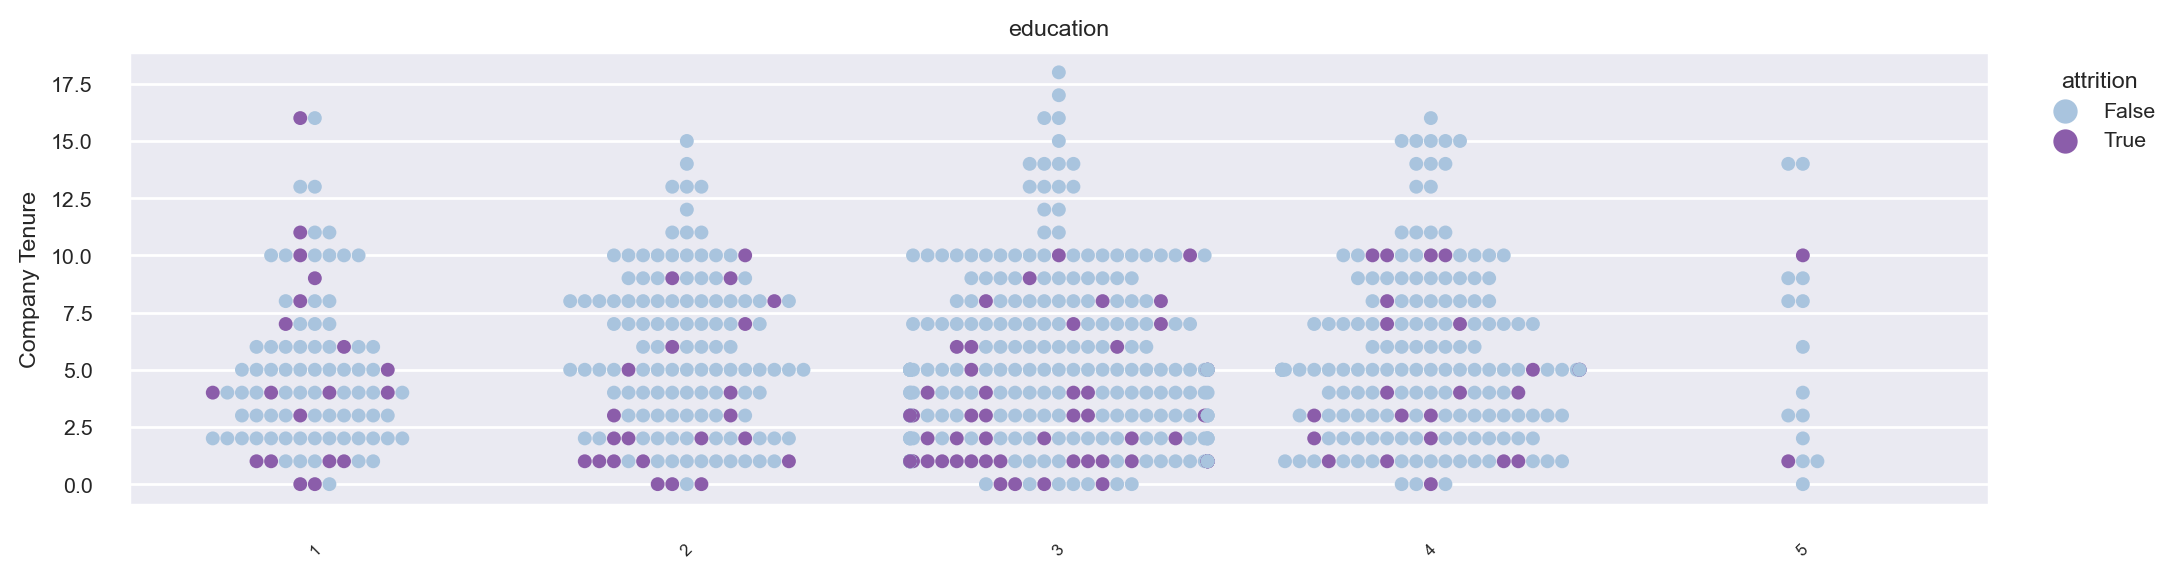

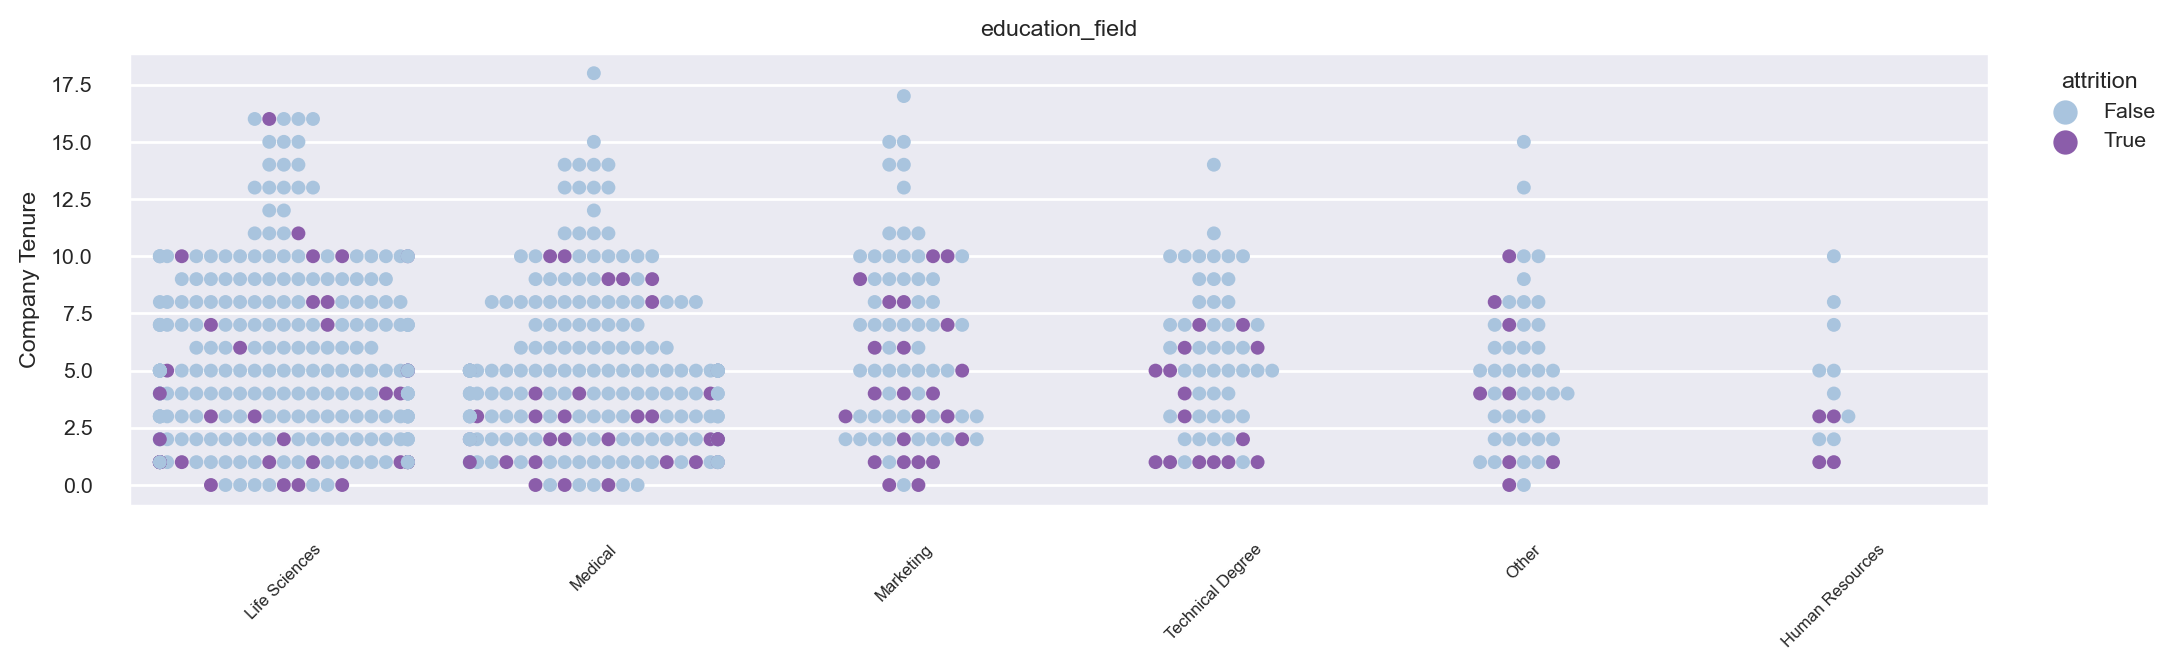

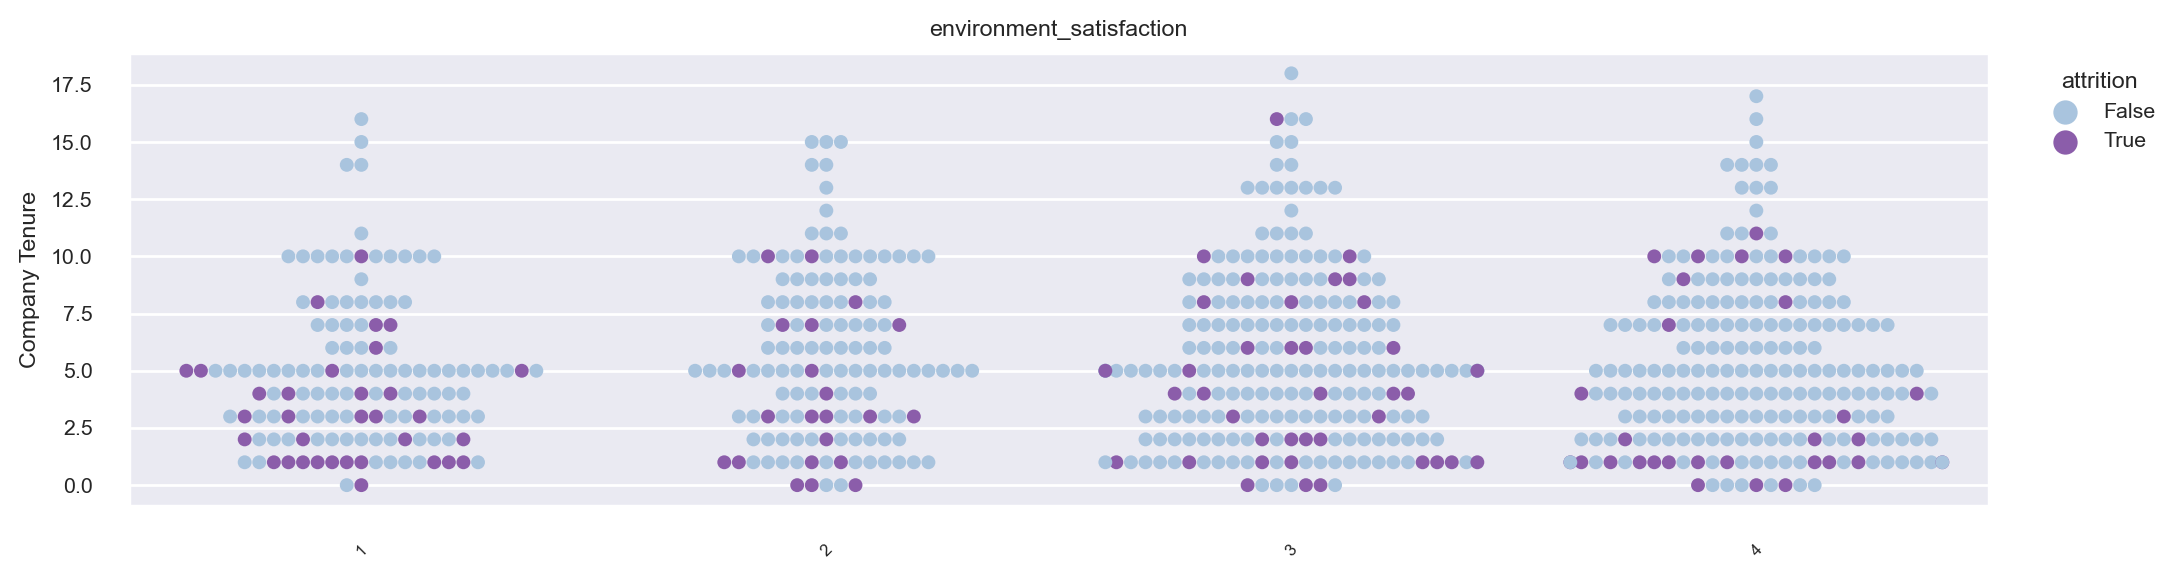

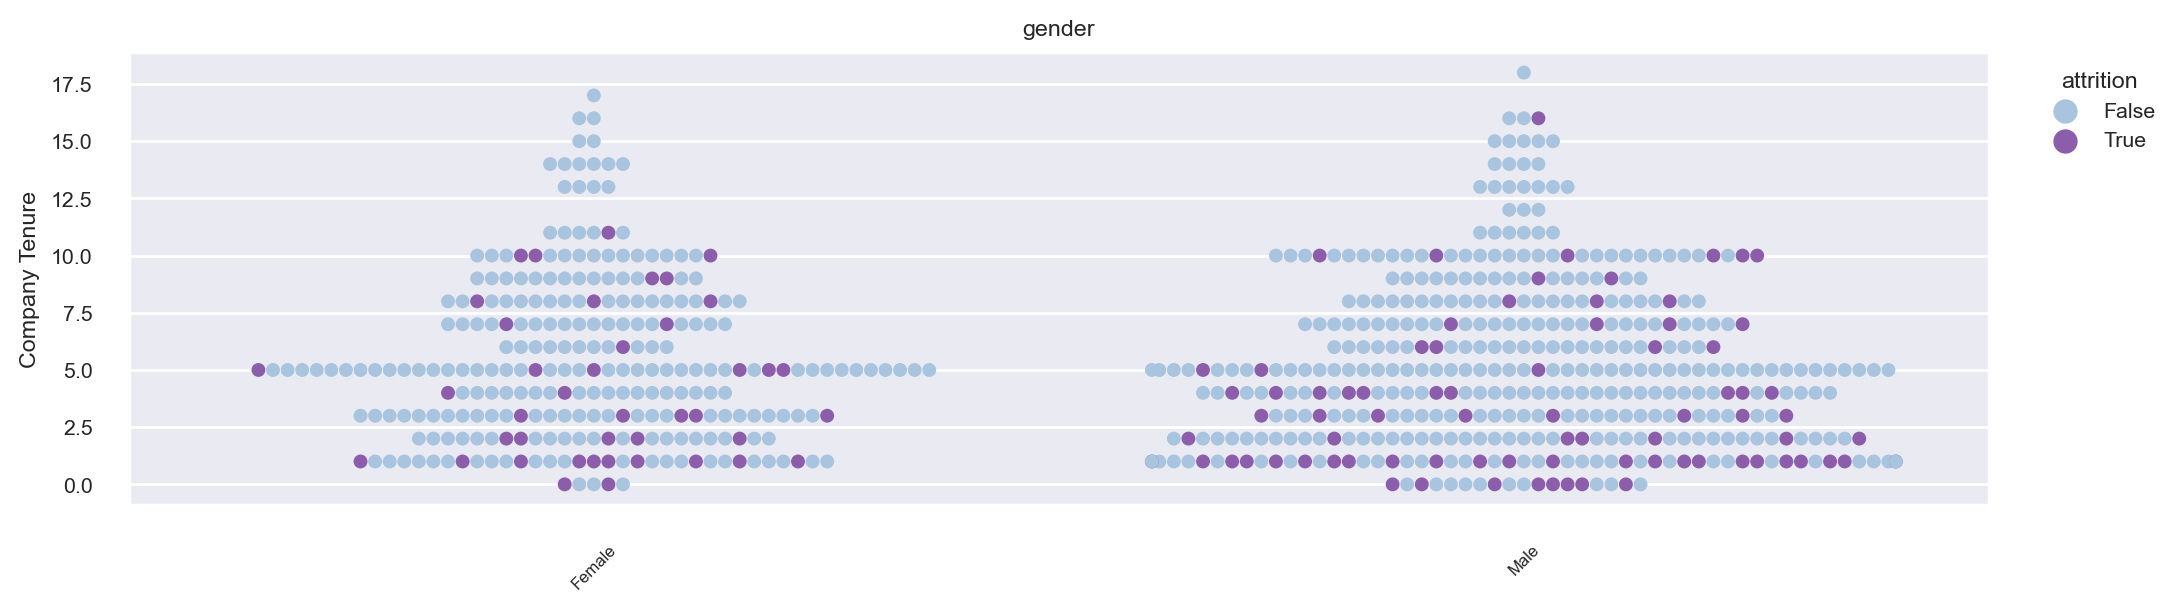

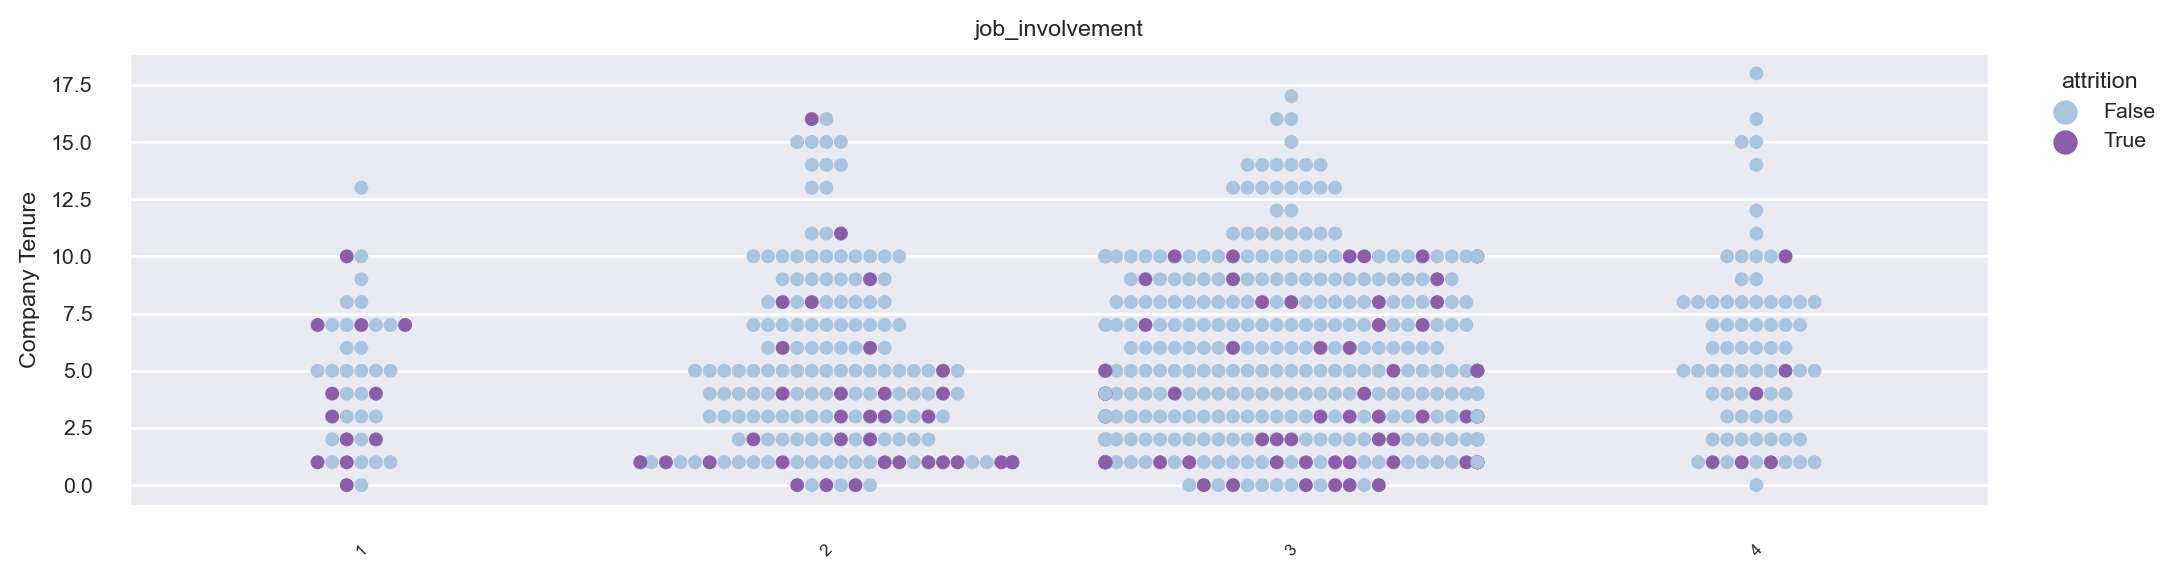

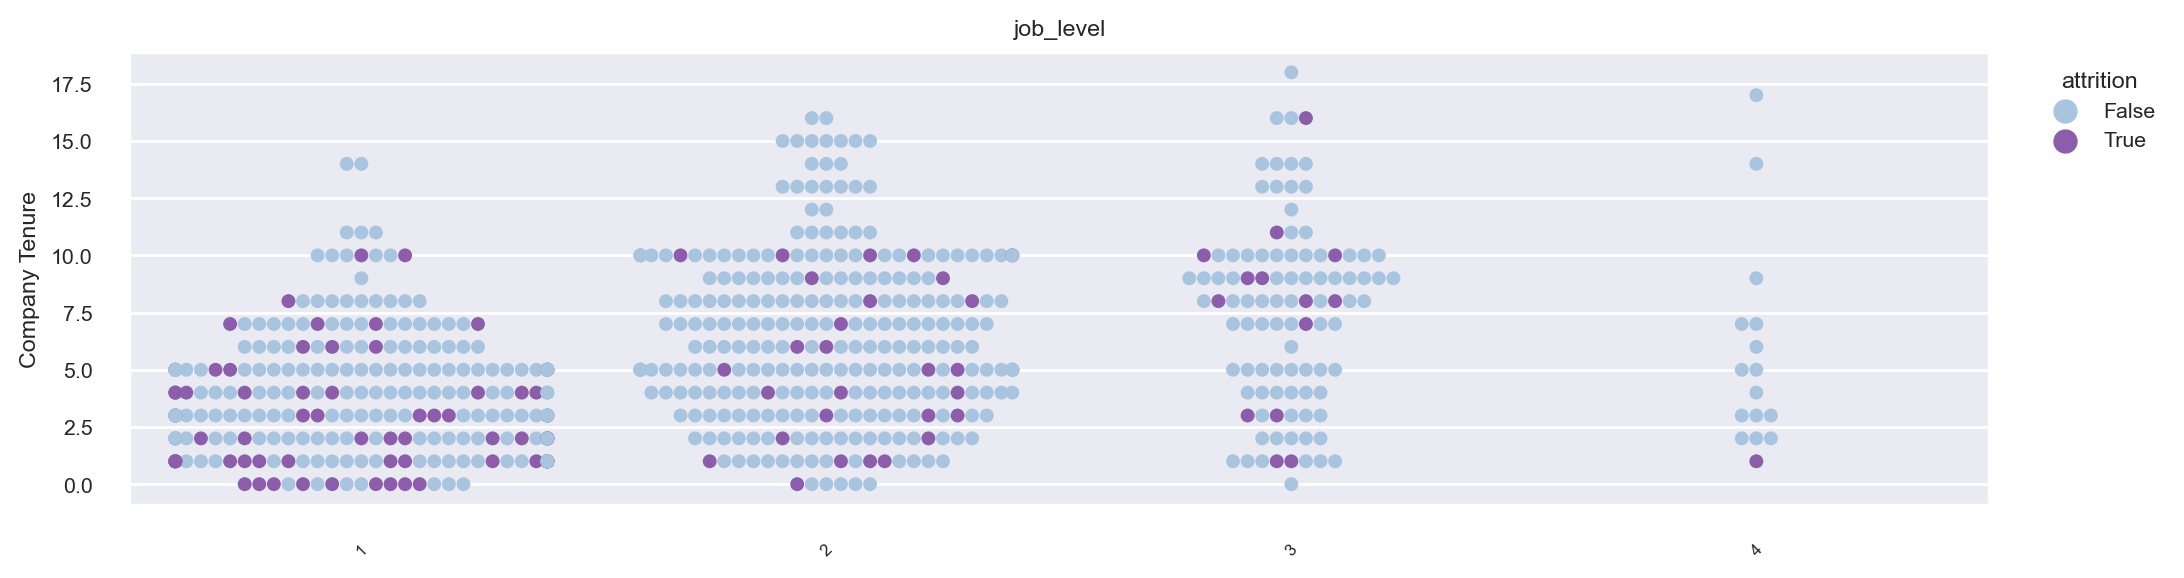

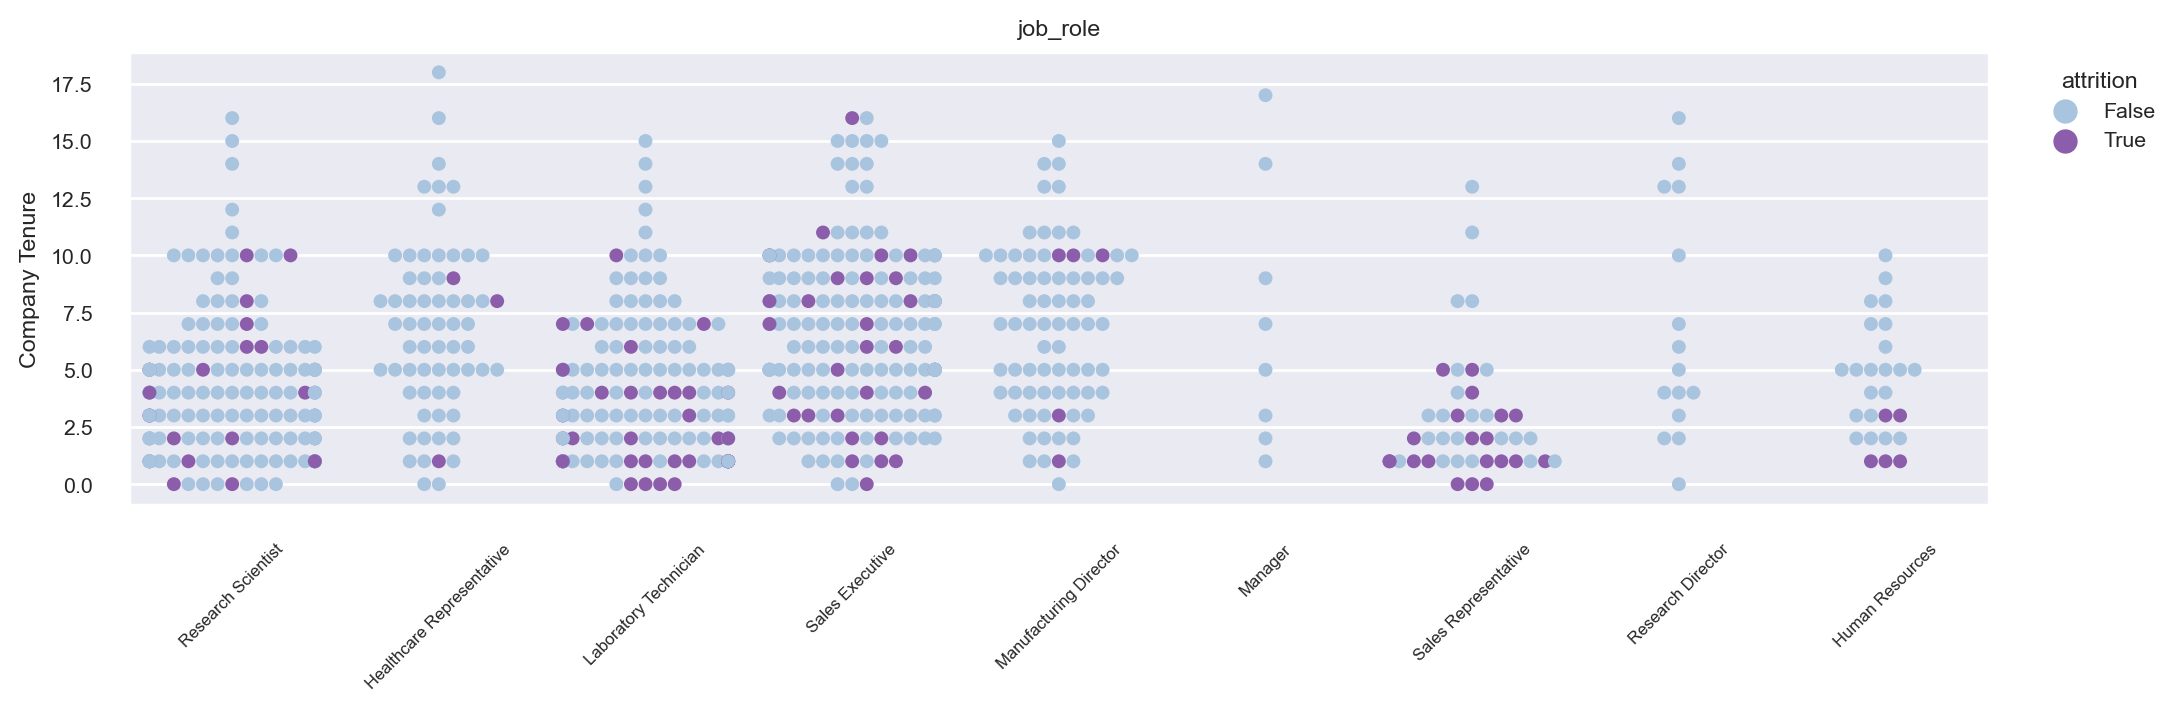

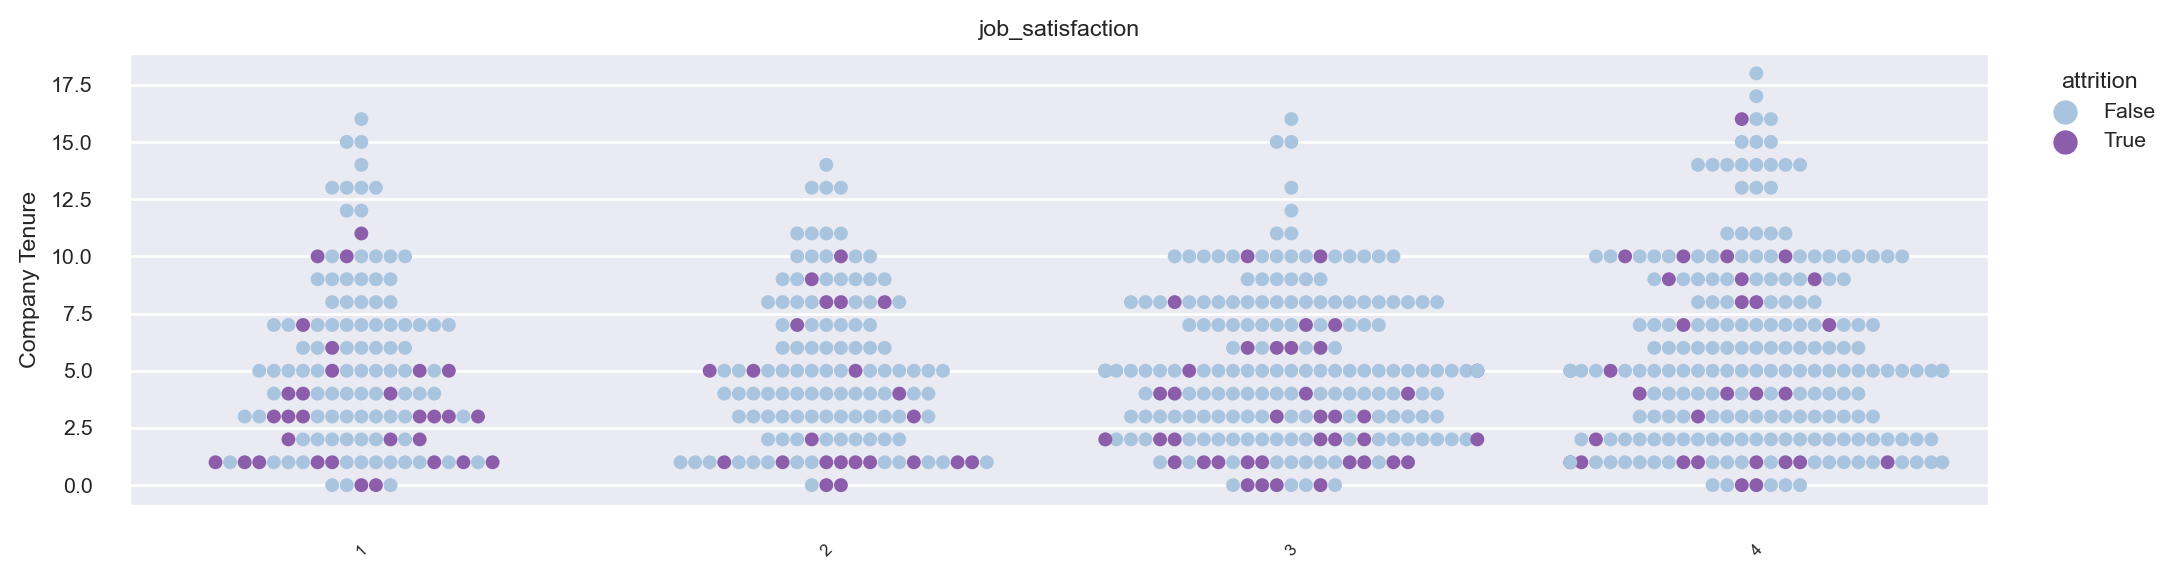

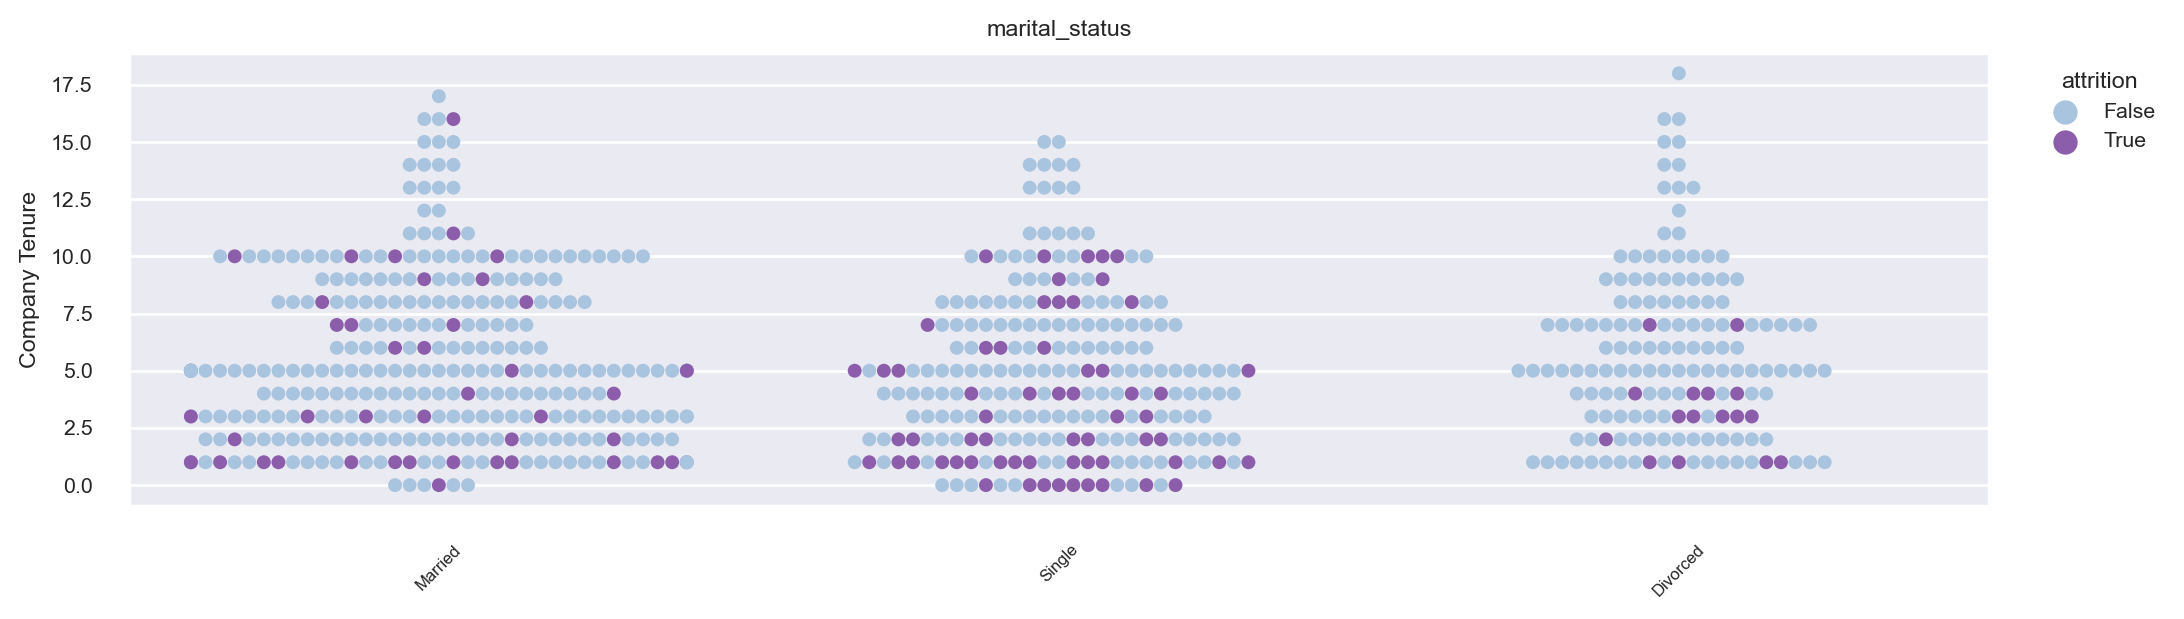

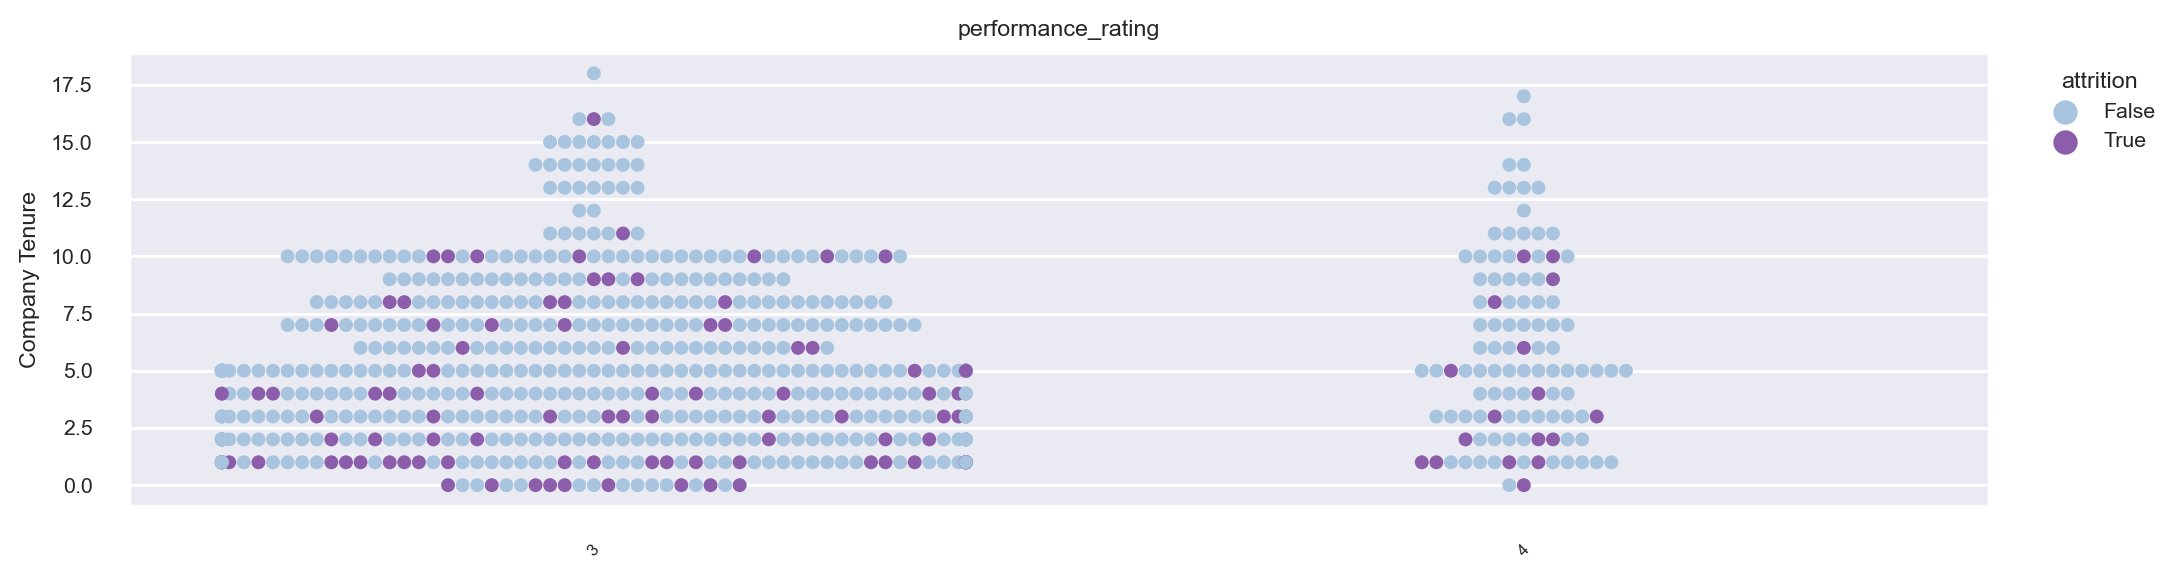

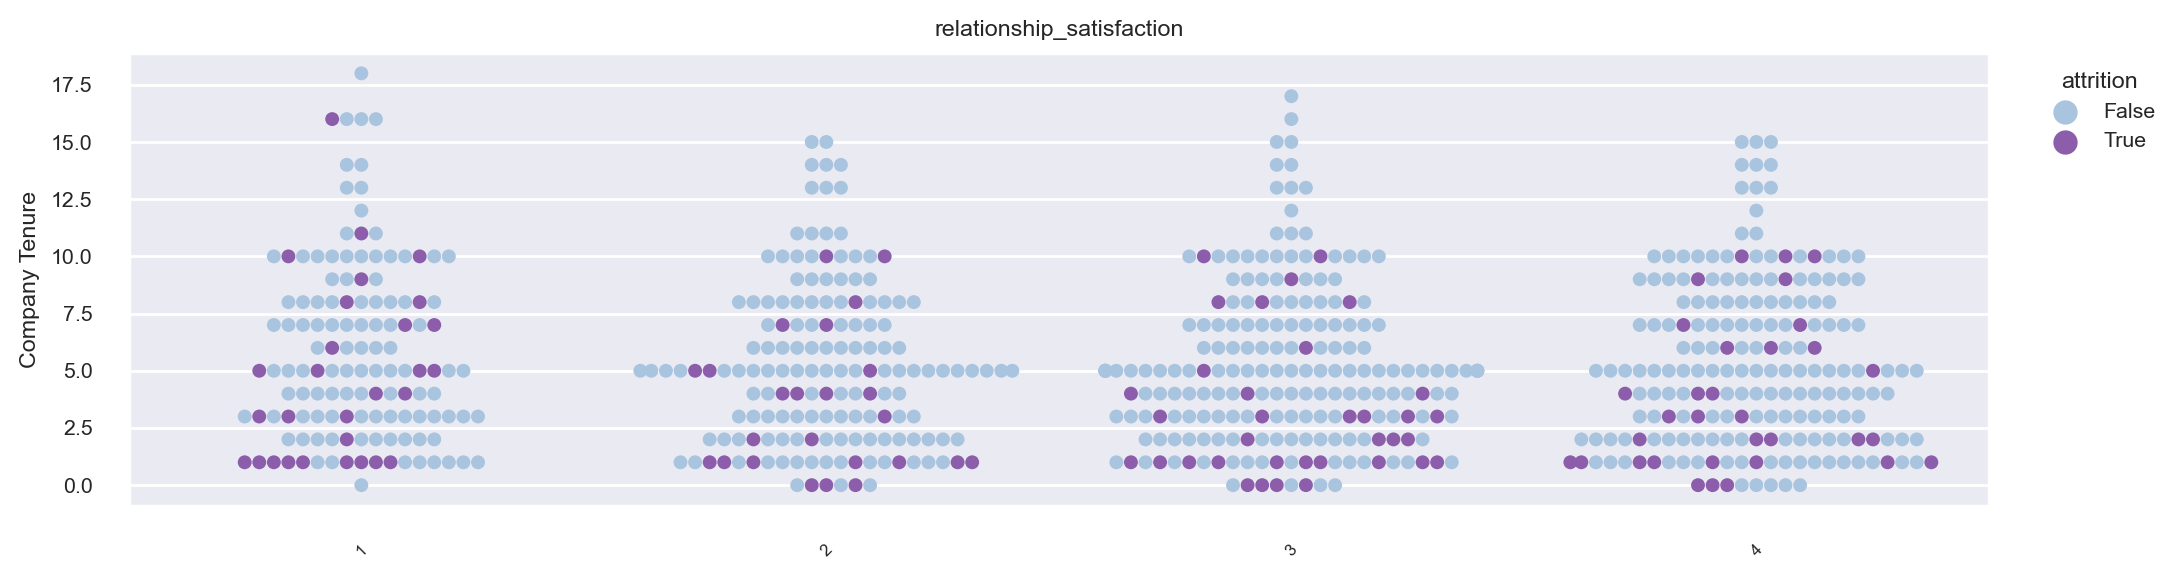

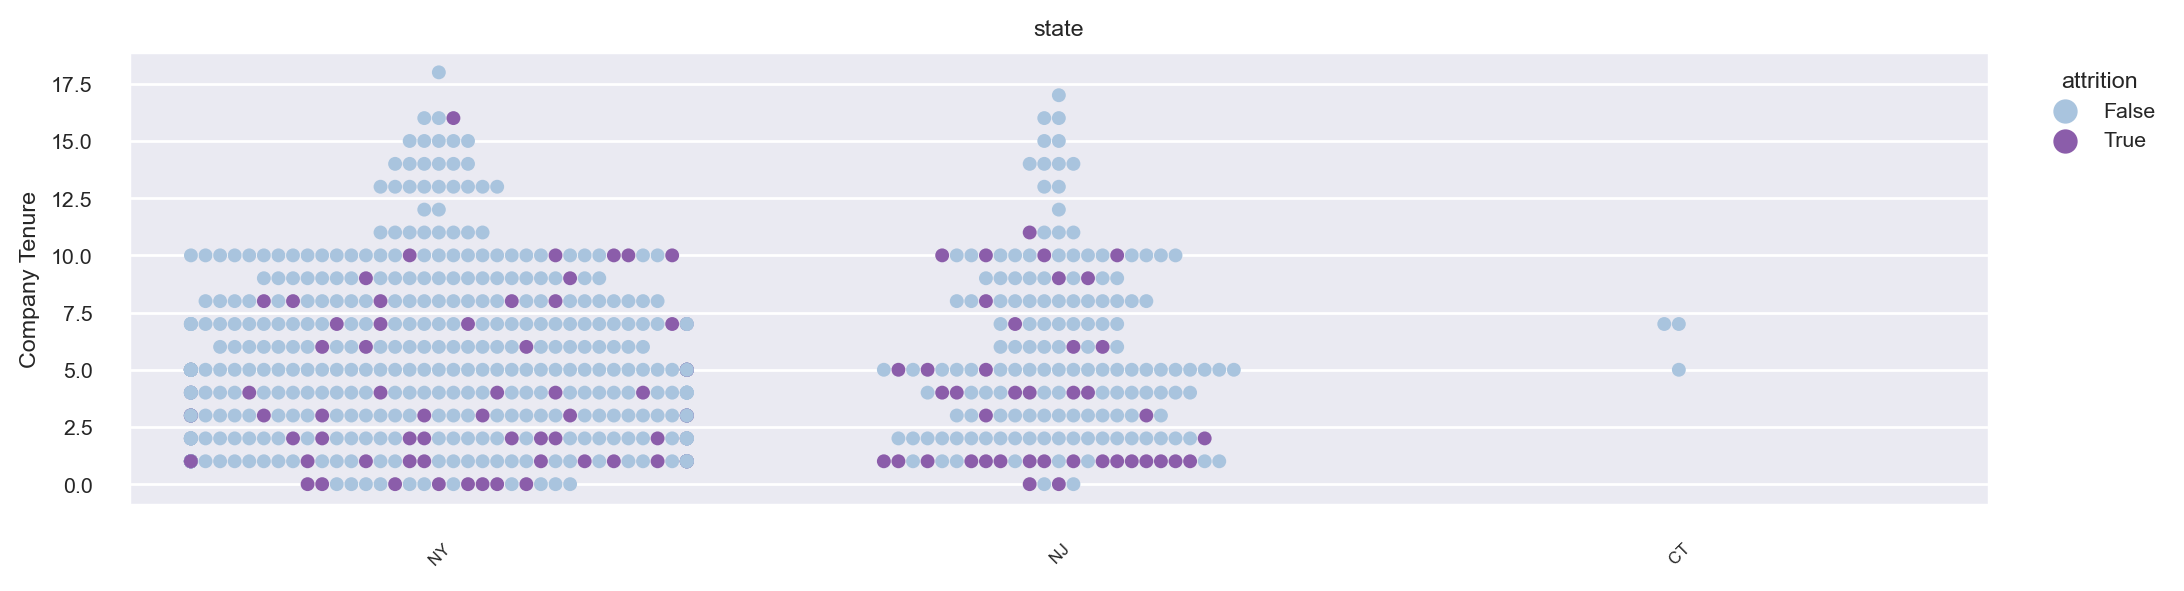

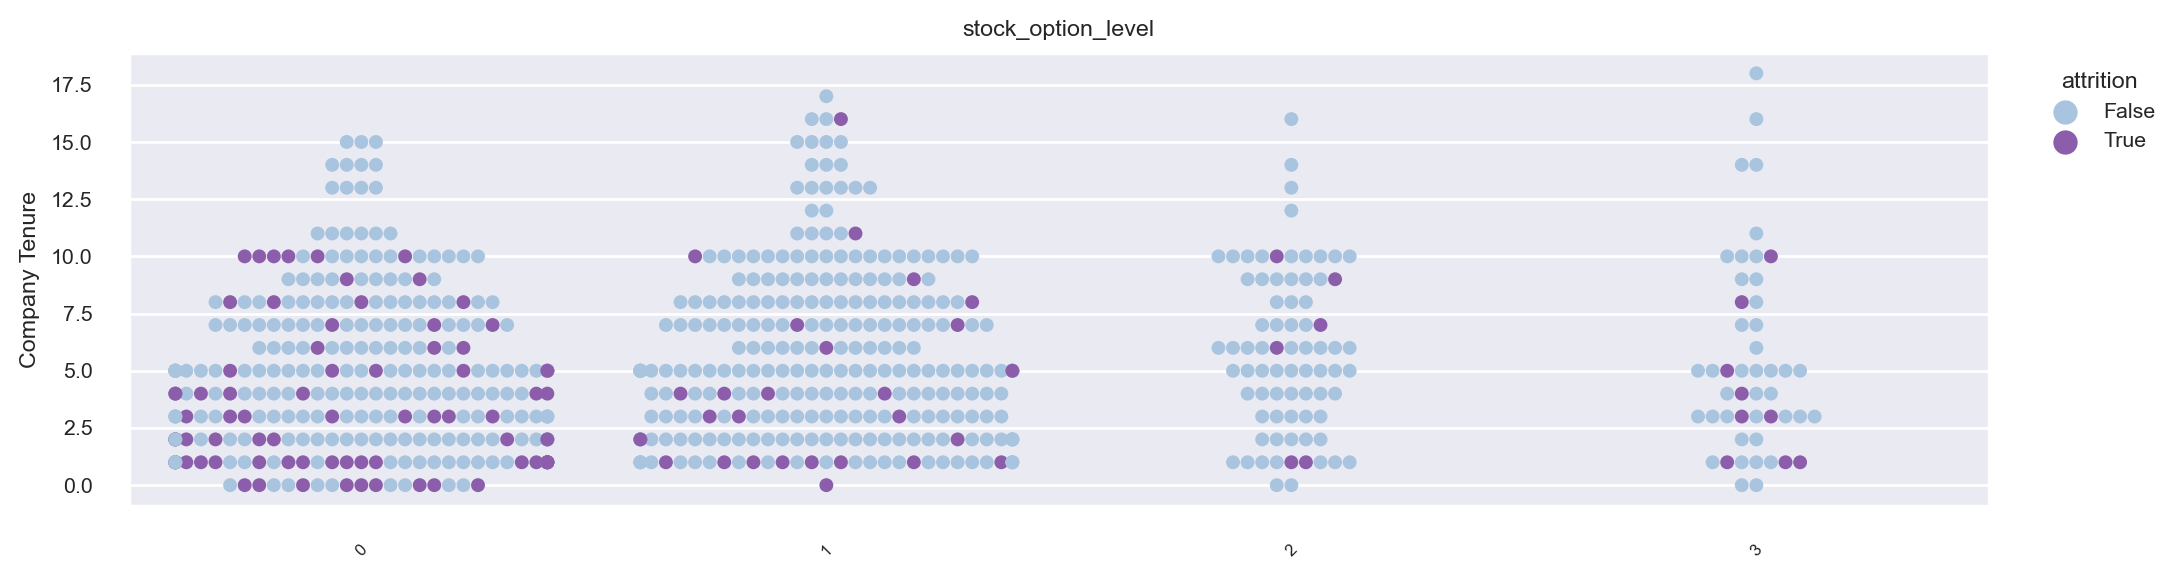

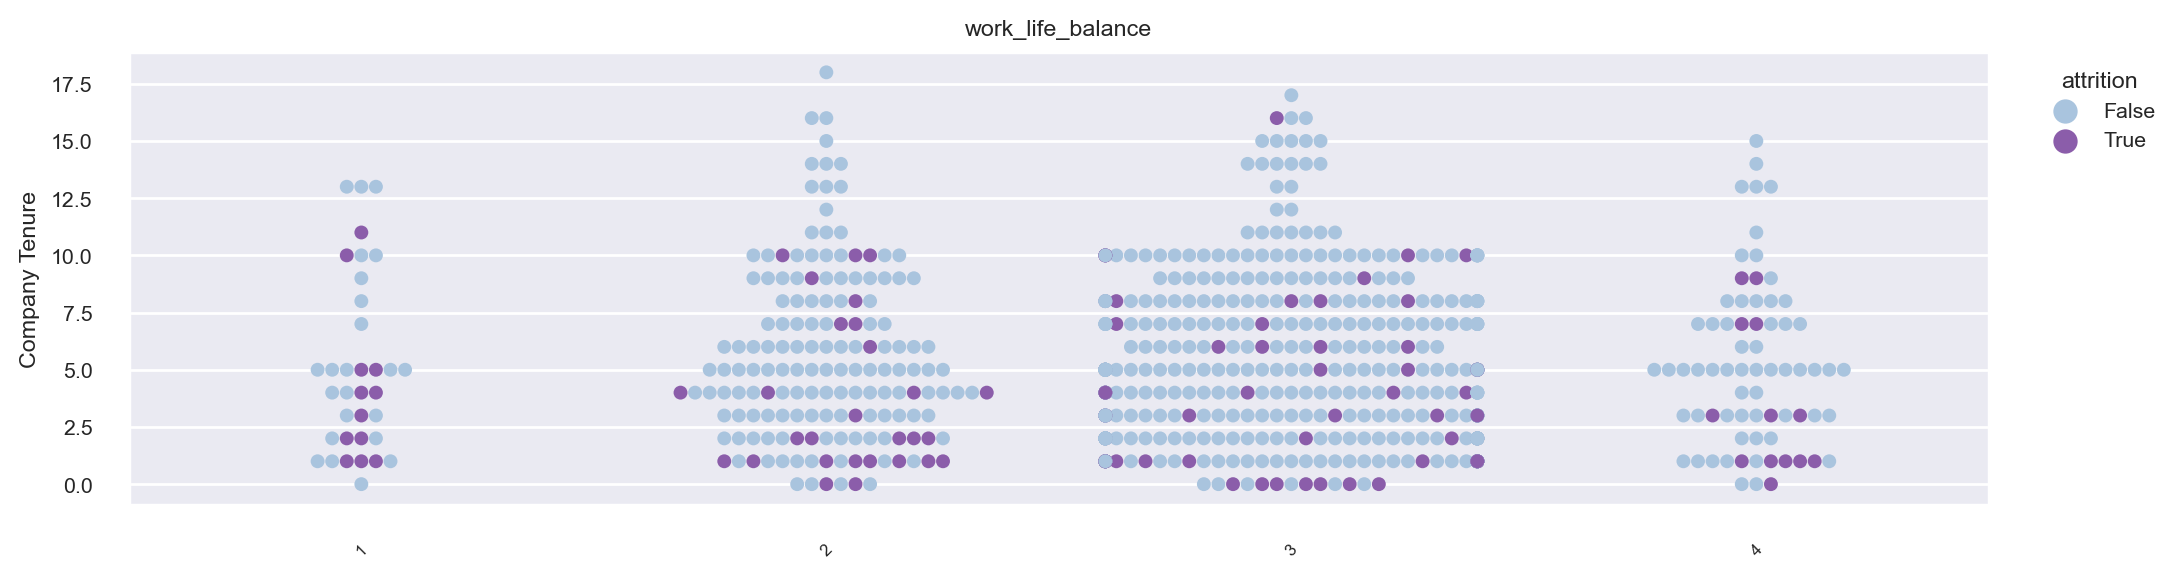

In [49]:
# sns.swarmplot

for col in disc_lst:
    plt.figure(figsize=(12, 3))
    sns.set(font_scale = .7)
    sns.swarmplot(x = col, y = "years_at_company", data = train, hue = "attrition", palette = "BuPu")

    plt.xlabel(None)
    plt.ylabel("Company Tenure")
    plt.xticks(fontsize = 6, rotation = 45)
    plt.title(col)

    plt.legend(
        bbox_to_anchor=(1.1, 1), 
        title = "attrition",
        loc = "upper right")
    plt.show()

In [50]:
# looping through discrete variables and conducting Chi-Squared test on target variable

alpha = 0.05
metrics = []

for col in disc_lst:
    # generating the ChiSquared Test and returning results
    observed = pd.crosstab(index = train[col], columns = train["attrition"], margins = True)

    chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

    if p_value < alpha:
        output = {
            "discrete_feature": col,
            "chi2": chi,
            "degs_of_freedom": degf,
            "p_value": p_value}
        
        metrics.append(output)

    else:
        print(f'variable: {col}')
        print('Not statistically significant.')
        print('---------------------------------------')

chi2_results = pd.DataFrame(metrics)
chi2_results.round(5)

variable: county_name
Not statistically significant.
---------------------------------------
variable: department
Not statistically significant.
---------------------------------------
variable: education
Not statistically significant.
---------------------------------------
variable: education_field
Not statistically significant.
---------------------------------------
variable: environment_satisfaction
Not statistically significant.
---------------------------------------
variable: gender
Not statistically significant.
---------------------------------------
variable: job_involvement
Not statistically significant.
---------------------------------------
variable: job_satisfaction
Not statistically significant.
---------------------------------------
variable: performance_rating
Not statistically significant.
---------------------------------------
variable: relationship_satisfaction
Not statistically significant.
---------------------------------------
variable: state
Not statistical

discrete_feature  chi2  degs_of_freedom  p_value
0           job_level 28.40                8     0.00
1            job_role 50.72               18     0.00
2      marital_status 21.84                6     0.00
3  stock_option_level 31.94                8     0.00

----

#### **``Summary: Chi_Squared Results``**

After initial discrete/categorical hypotheses testing against the "attrition" target variable - we can conclude that the following features/variables hold a statistical relationship with the target:

- job level
- job role
- marital status
- stock option level

<u>questions/thoughts after analysis:</u>

features such as job level and job role on its surface may not appear to be similar, however I presume that there may be some relationship amongst "titles"/"roles" and the level. For instance, certain job levels may only be applicable to a particular role such as a Director or Senior Vice President. 

I observe that there are only 4 distinct job levels and 9 distinct job roles at this company. On a second comb through of the data, I will want to conduct summary statistics and statistical testing across these features to investigate if there is any relationship amongst the independent variables.


----

### **``Feature Selection & Scaling``**

In [51]:
# selecting statistically significant variables/features from testing

X_train = X_train[[
'job_level', 
'job_role', 
'marital_status', 
'stock_option_level',
'employee_age',
'employment_rates_at_35yrs',
'high_school_graduation_rate',
'household_income_at_35',
'monthly_income',
'percentage_married_by_35',
'poverty_rate',
'total_working_years',
'women_teenage_birthrate',
'years_at_company',
'years_in_current_role',
'years_with_curr_manager']]

X_validate = X_validate[[
'job_level', 
'job_role', 
'marital_status', 
'stock_option_level',
'employee_age',
'employment_rates_at_35yrs',
'high_school_graduation_rate',
'household_income_at_35',
'monthly_income',
'percentage_married_by_35',
'poverty_rate',
'total_working_years',
'women_teenage_birthrate',
'years_at_company',
'years_in_current_role',
'years_with_curr_manager']]

X_test = X_test[[
'job_level', 
'job_role', 
'marital_status', 
'stock_option_level',
'employee_age',
'employment_rates_at_35yrs',
'high_school_graduation_rate',
'household_income_at_35',
'monthly_income',
'percentage_married_by_35',
'poverty_rate',
'total_working_years',
'women_teenage_birthrate',
'years_at_company',
'years_in_current_role',
'years_with_curr_manager']]

X_train.shape

(688, 16)

----
#### **``Standard Scaler``**

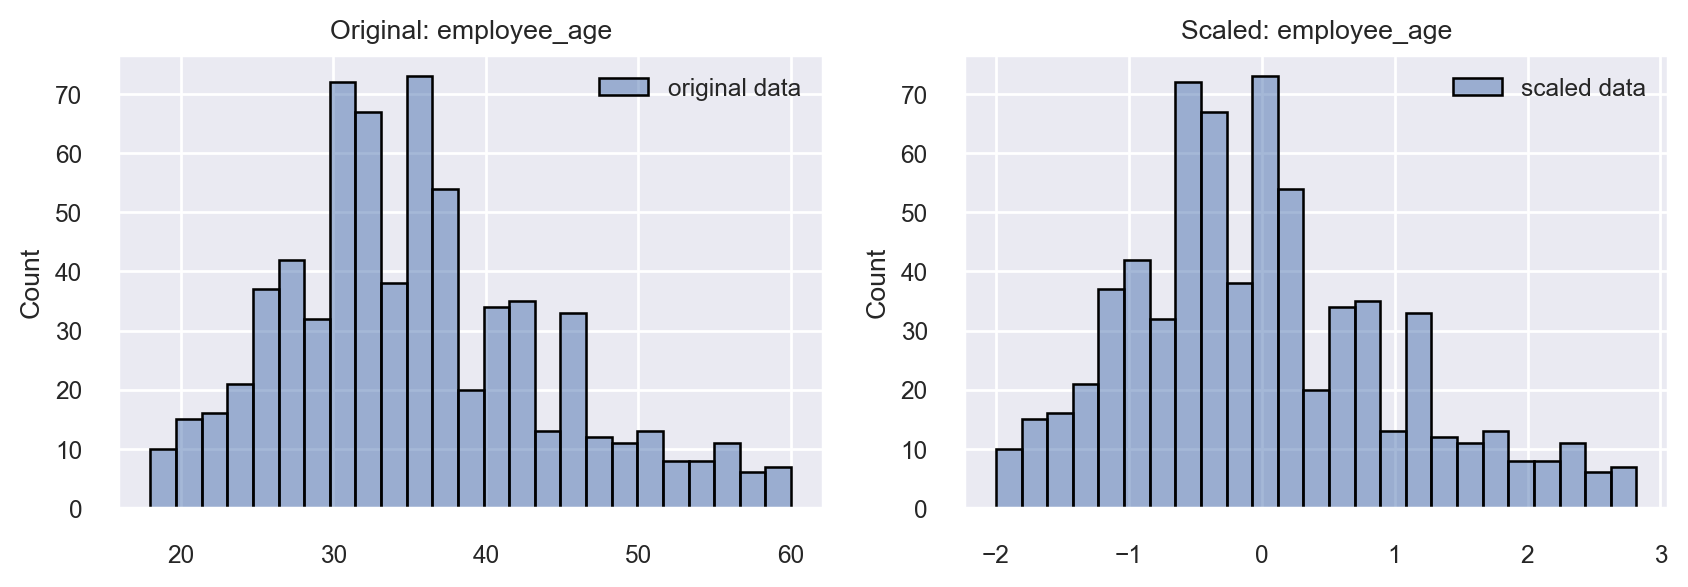

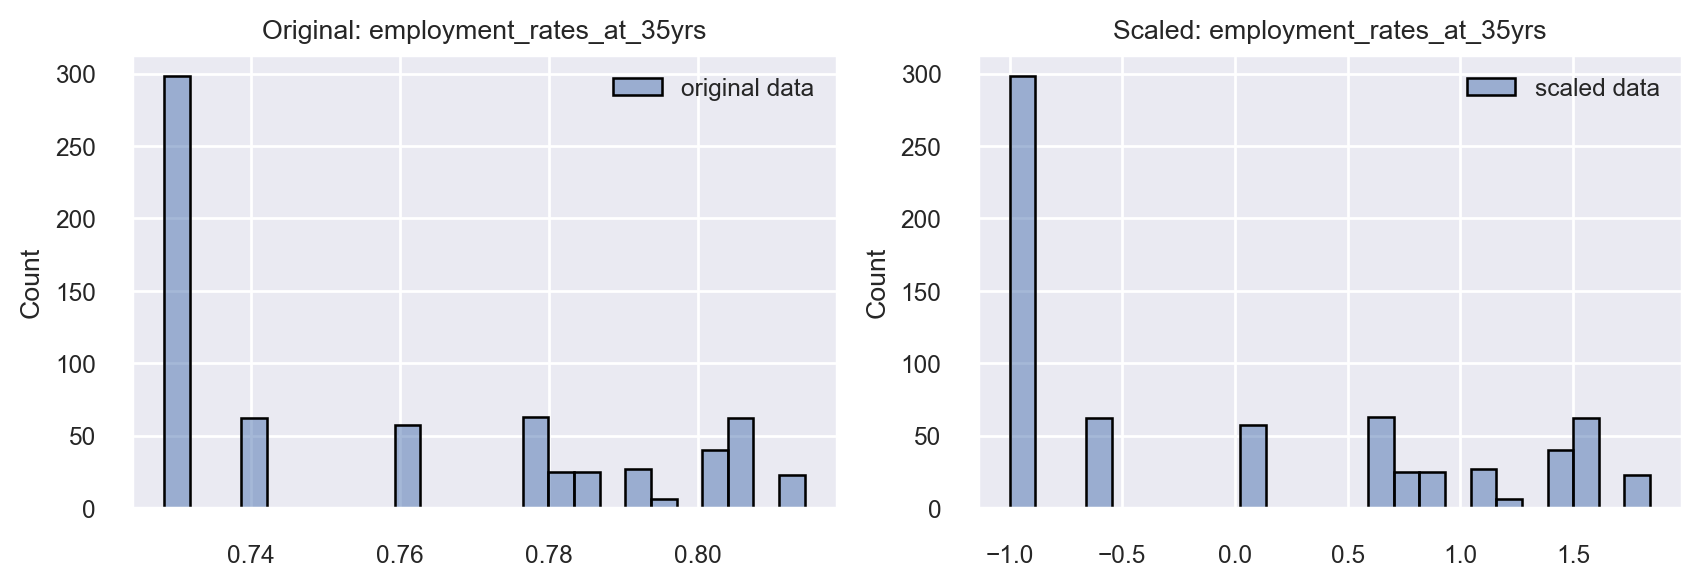

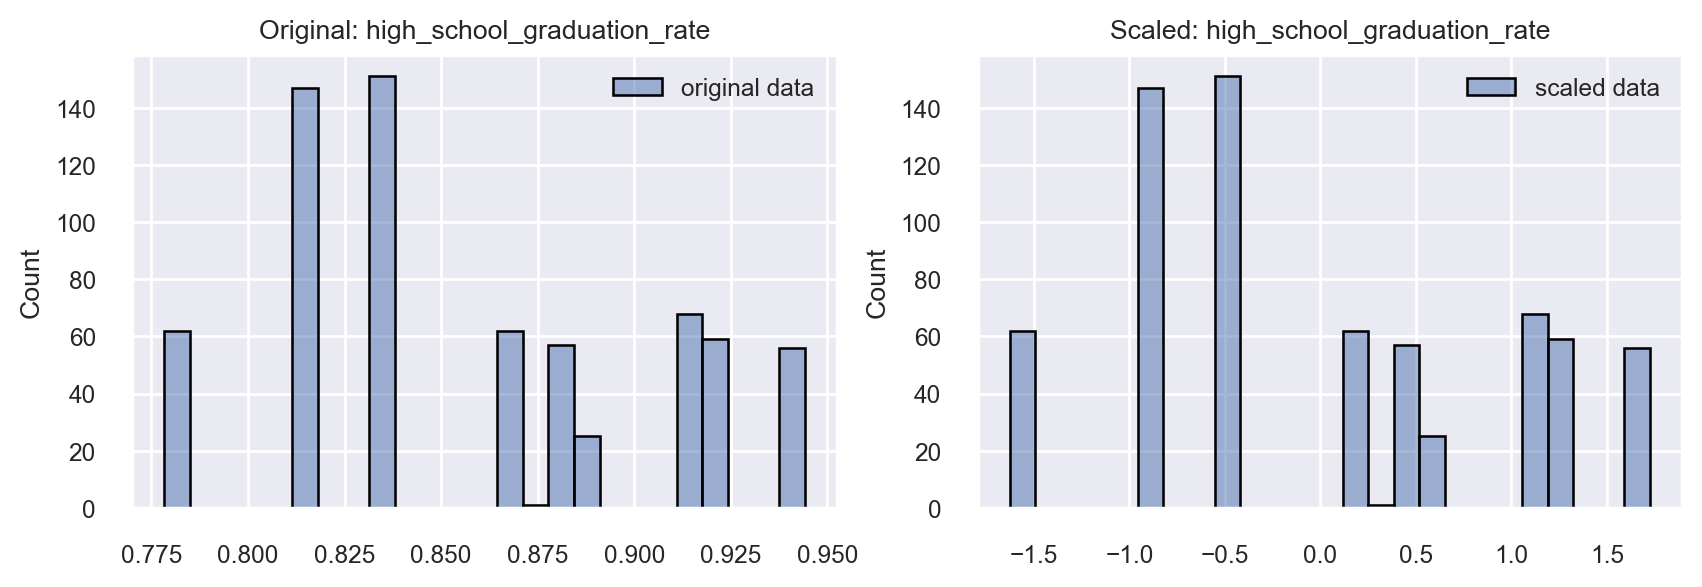

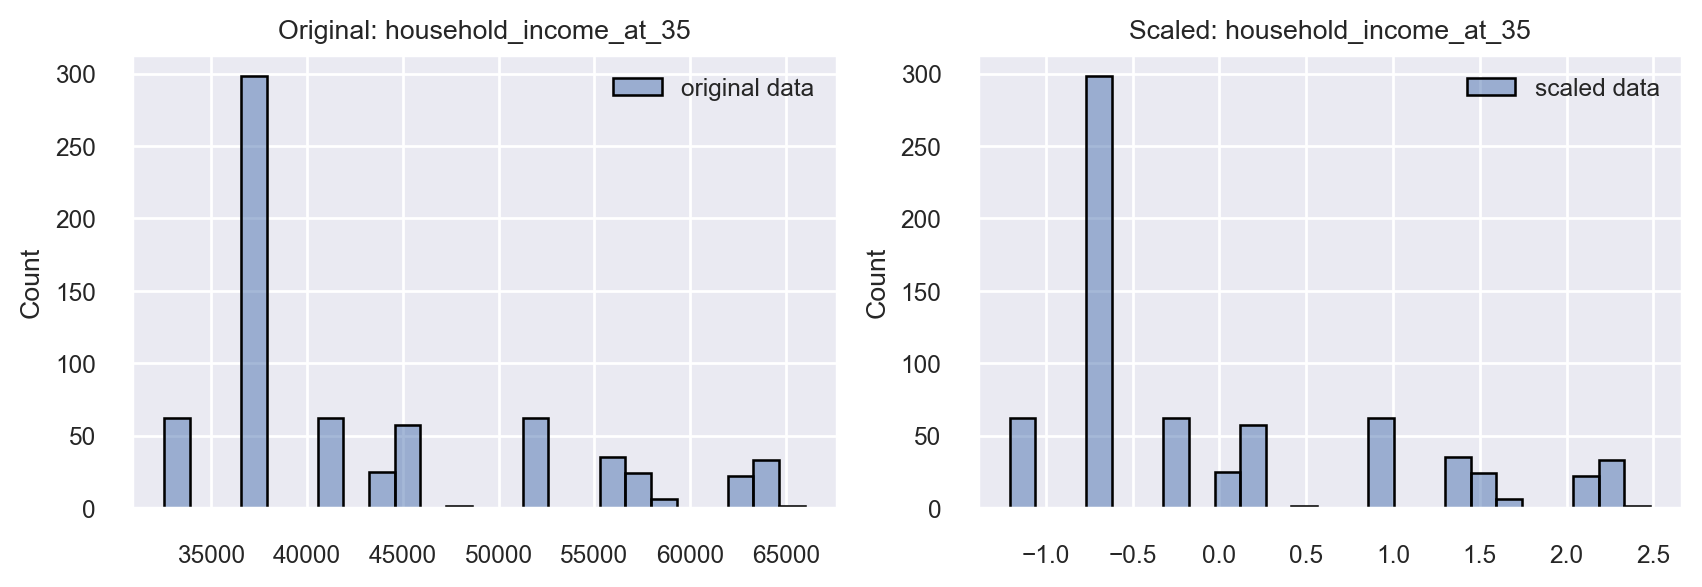

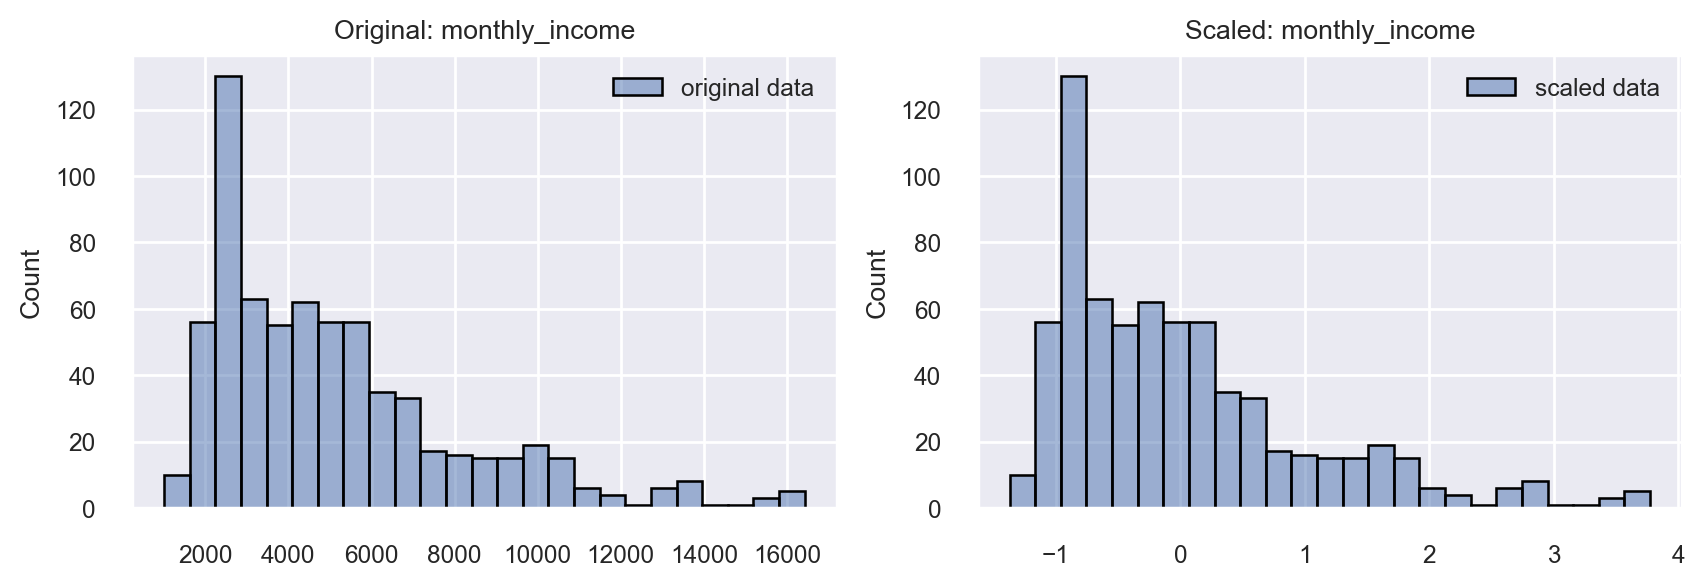

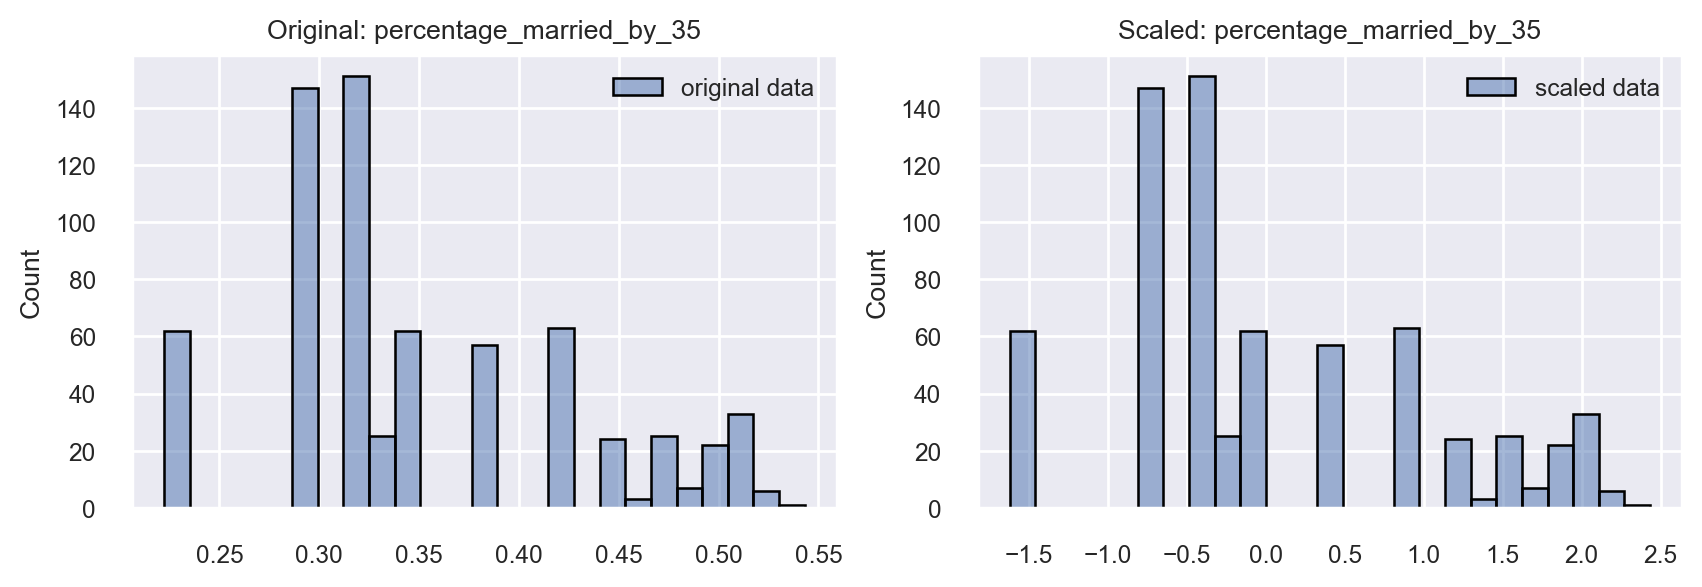

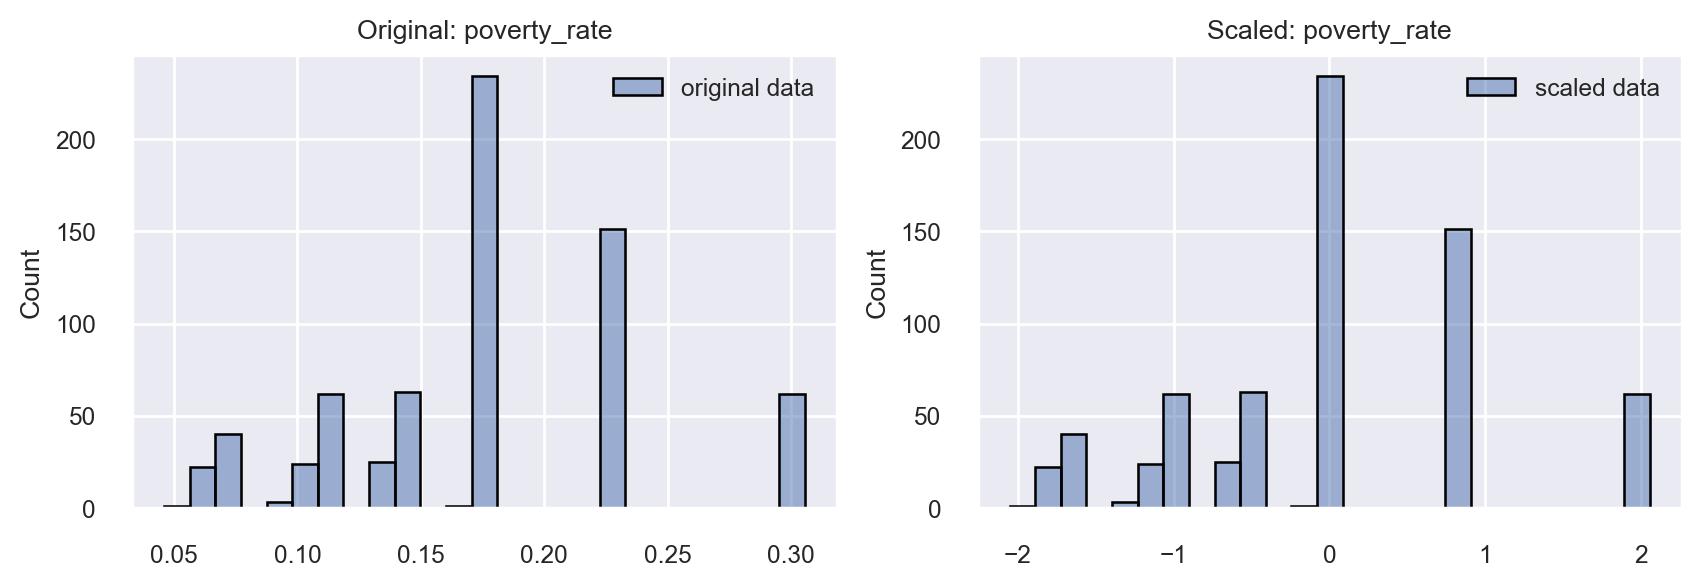

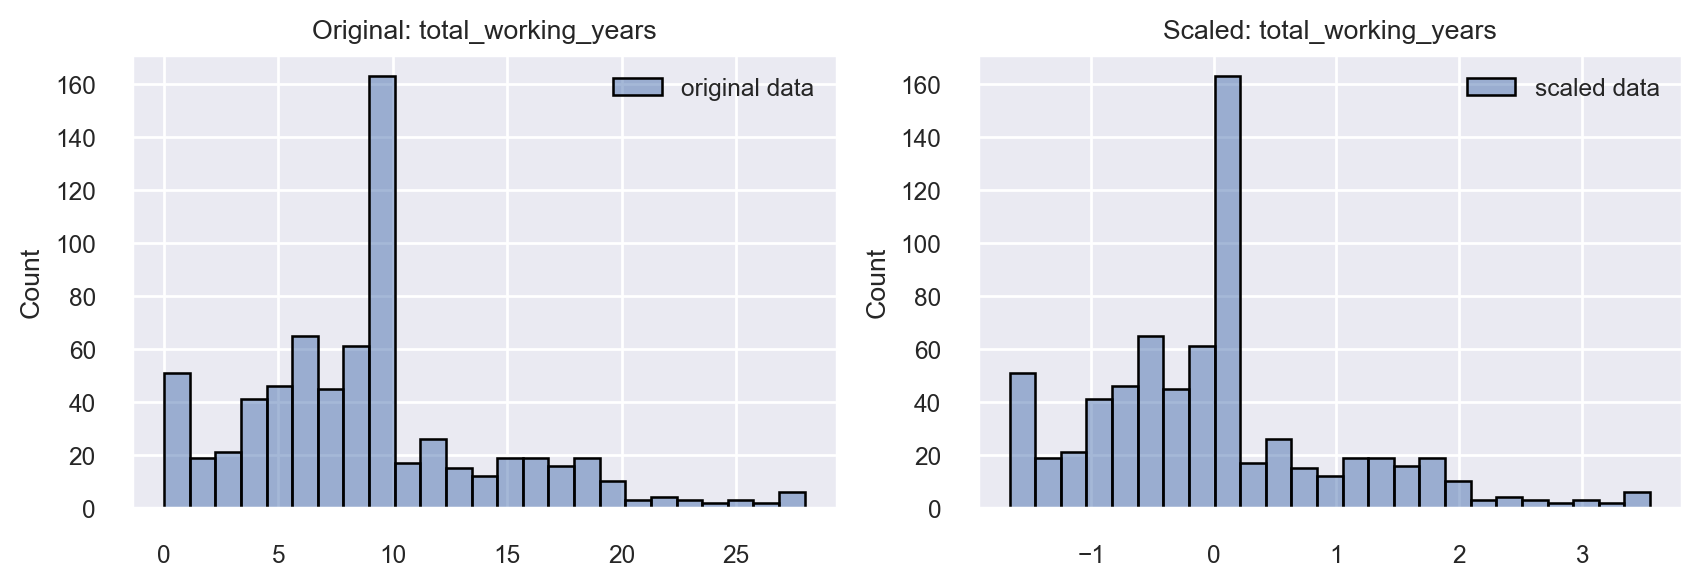

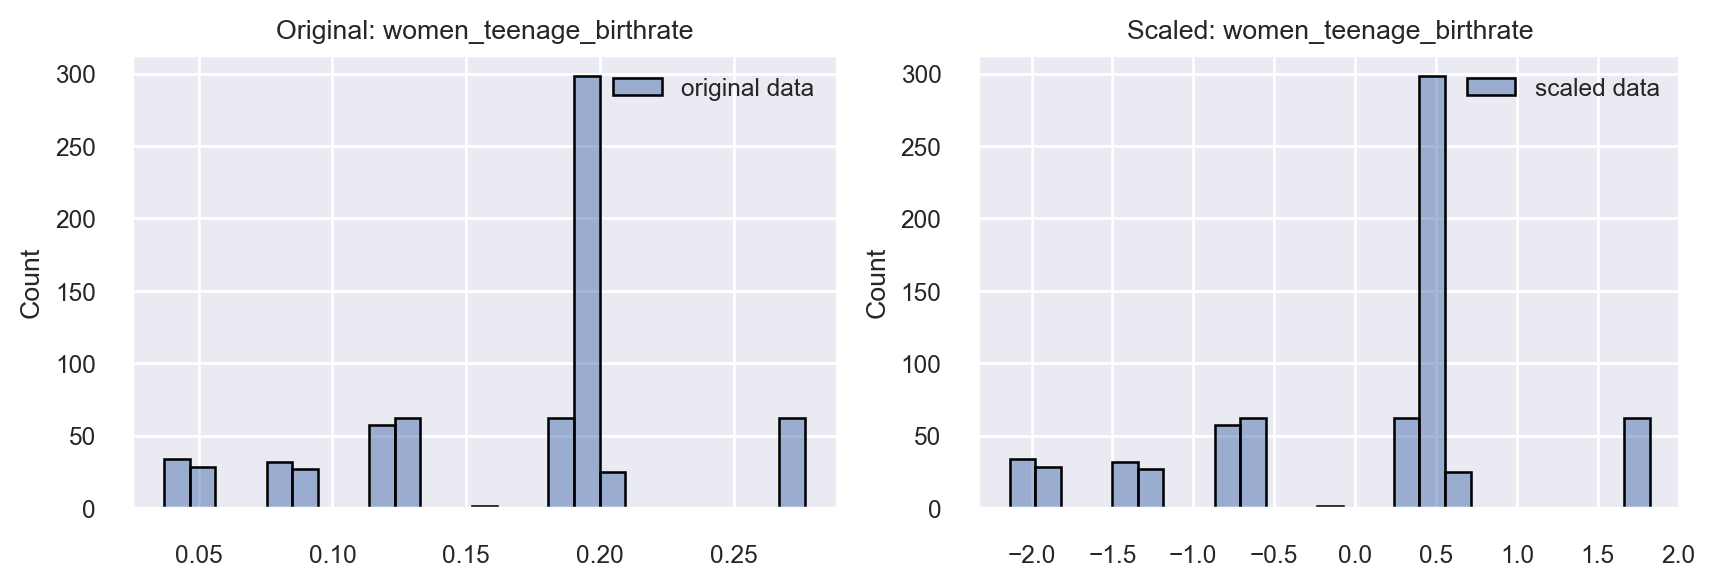

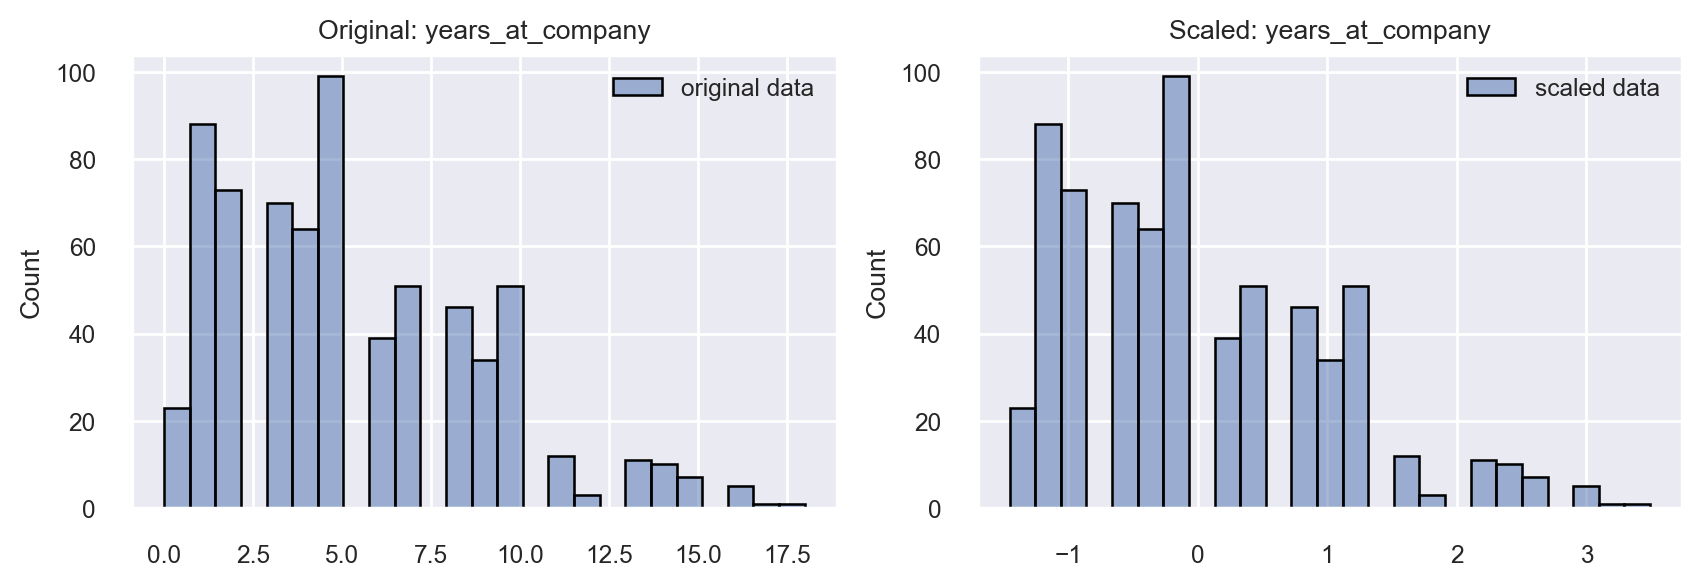

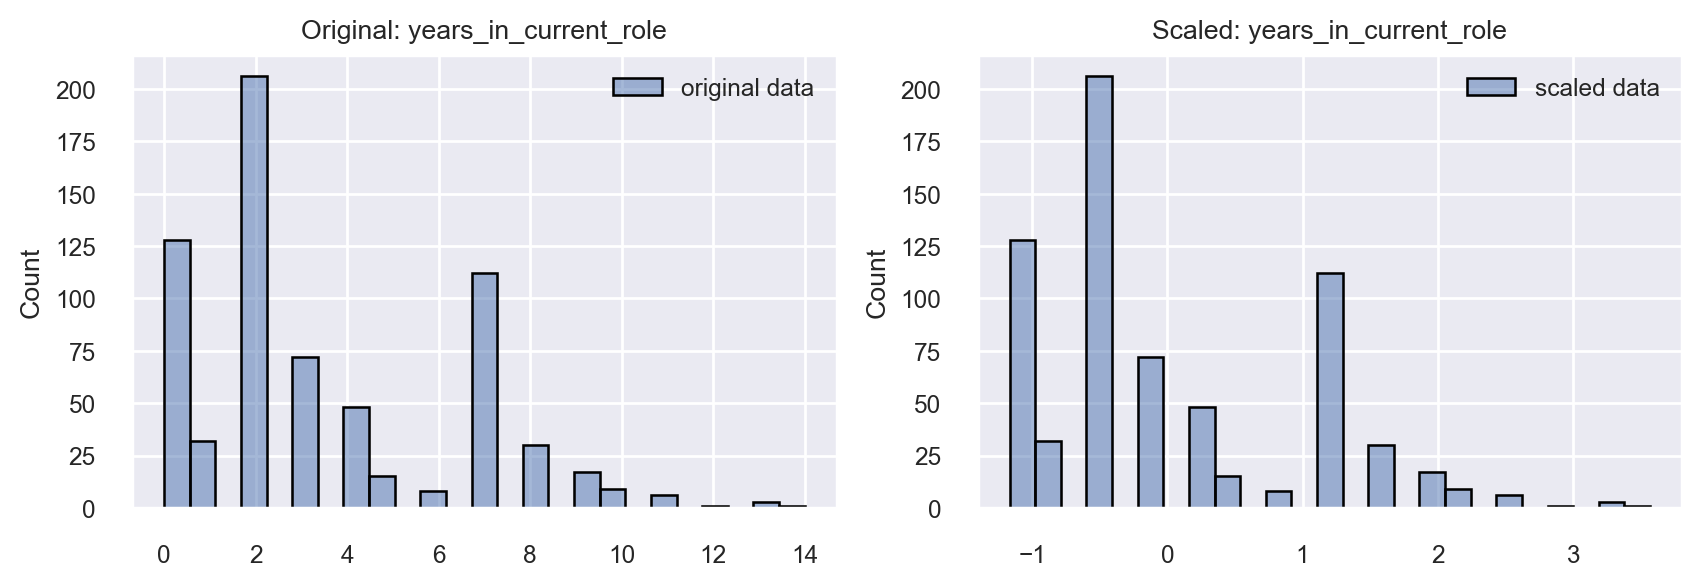

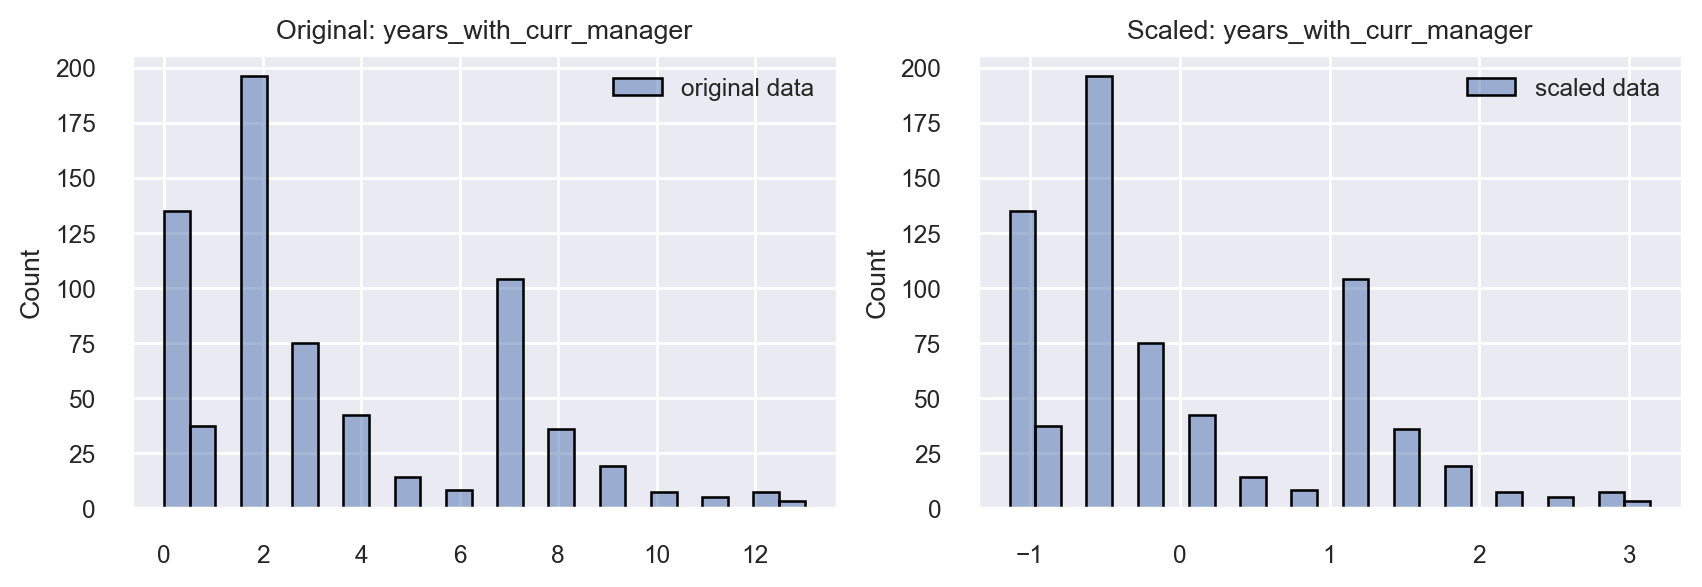

In [52]:
# i will fit and evaluate Sklearn's Standard Scaler and a Robust Scaler

cont_lst = X_train.select_dtypes(exclude = ["object", "uint8", "bool"]).columns.tolist()

for col in cont_lst:
    plt.figure(figsize=(10, 3))
    sns.set(font_scale = .8)

    scaler = StandardScaler()
    scaler.fit(X_train[[col]])
    x_scaled = scaler.transform(X_train[[col]])


    plt.subplot(121)
    ax1 = sns.histplot(X_train[[col]], bins = 25, edgecolor = 'black', label = 'original data')

    # removing axes scientific notation 
    ax1.ticklabel_format(style = "plain") 
    plt.title(f'Original: {col}')
    plt.legend()

    plt.subplot(122)
    ax2 = sns.histplot(x_scaled, bins=25, edgecolor = 'black', label = "scaled data")

    # removing axes scientific notation 
    ax2.ticklabel_format(style = "plain") 
    plt.title(f'Scaled: {col}')
    plt.legend()

----
#### **``Robust Scaler``**

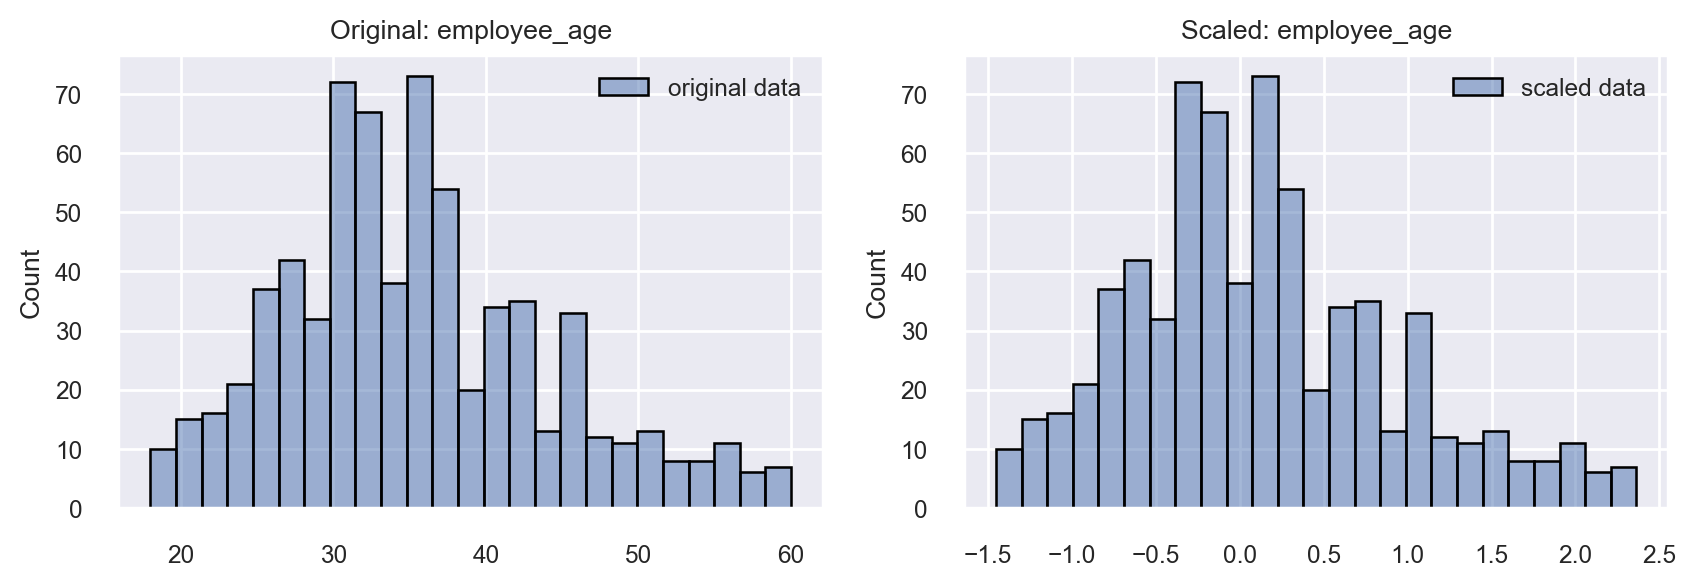

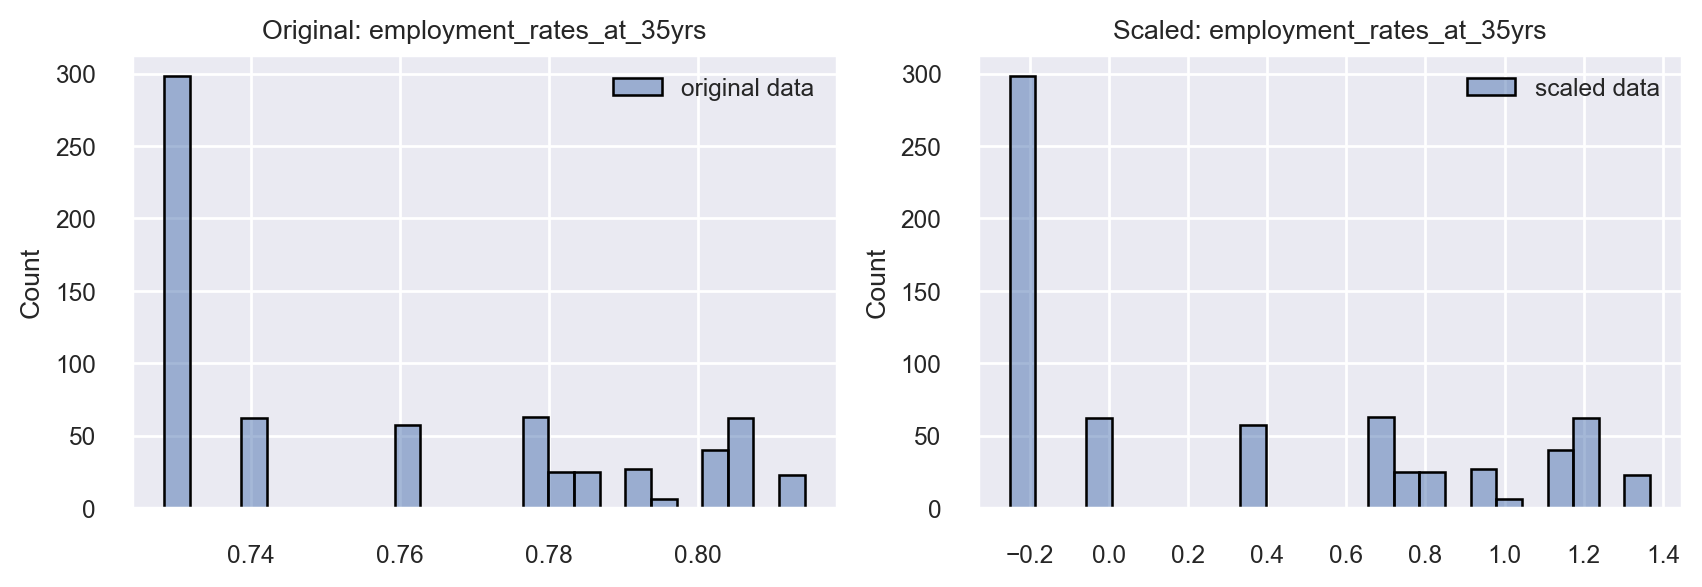

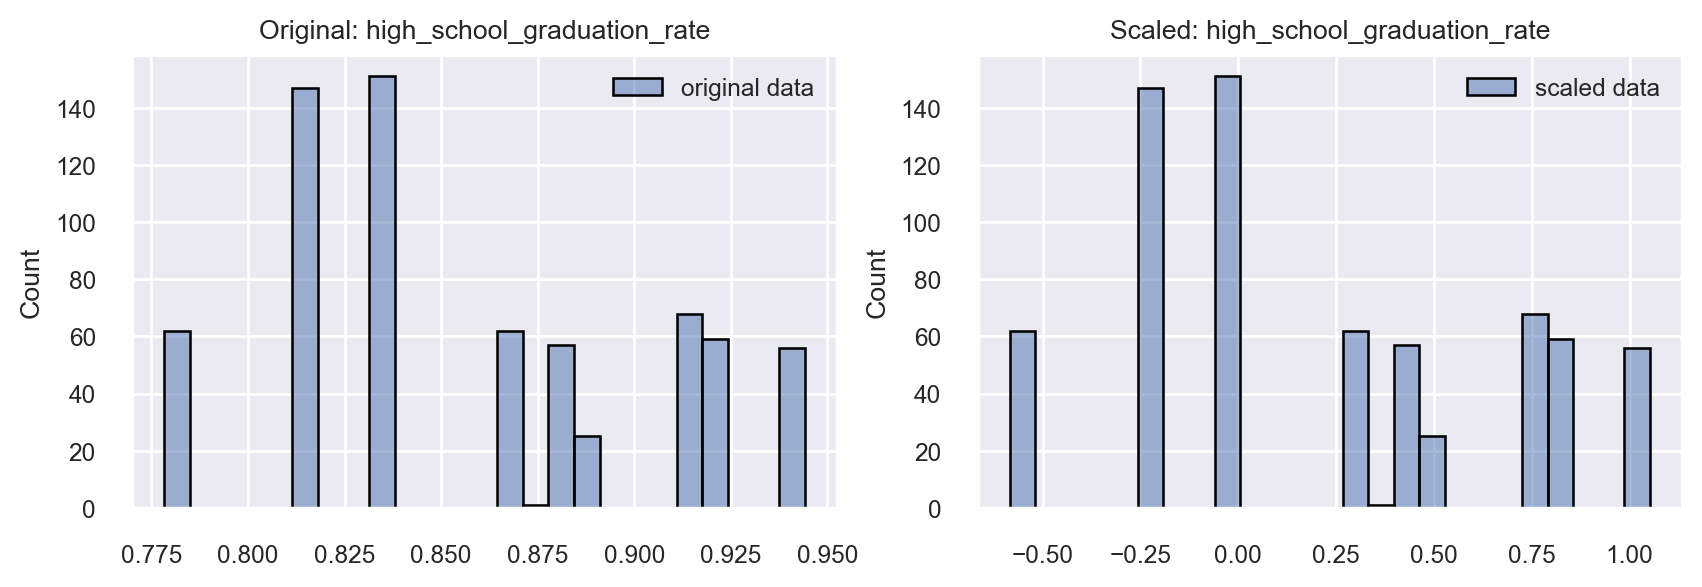

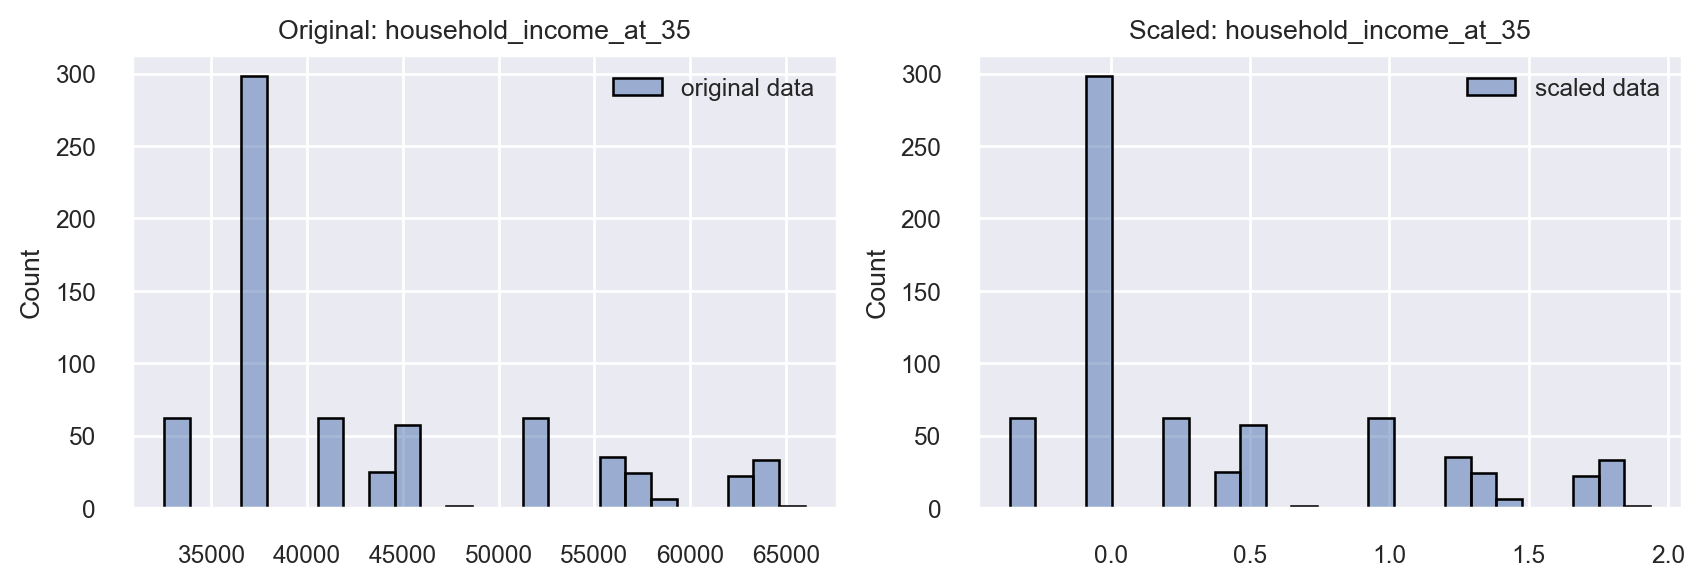

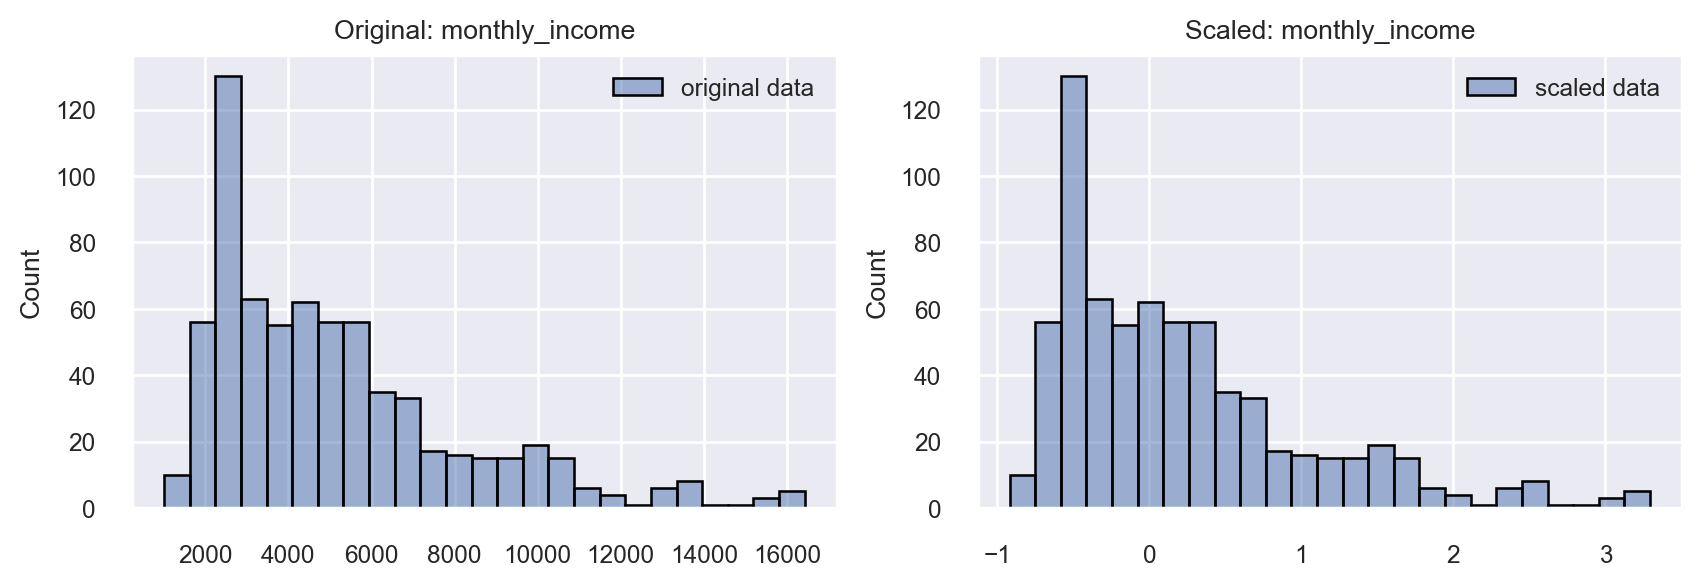

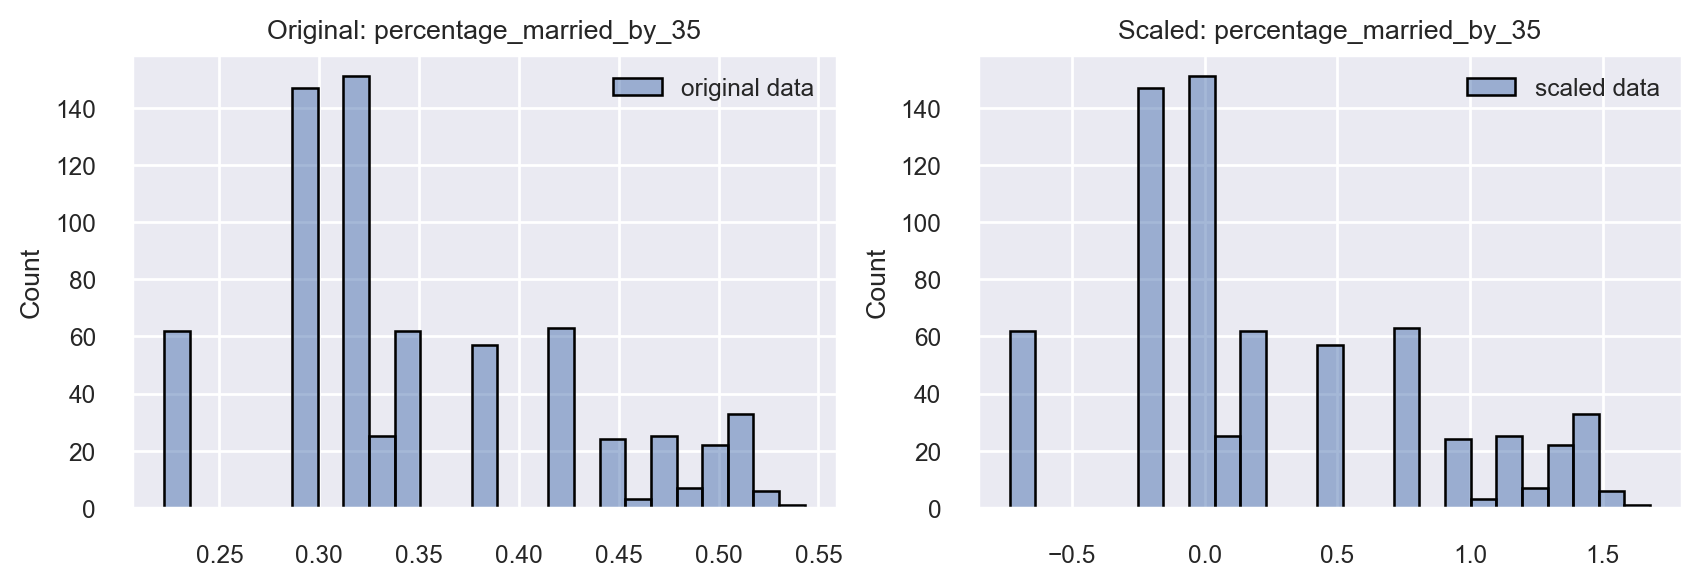

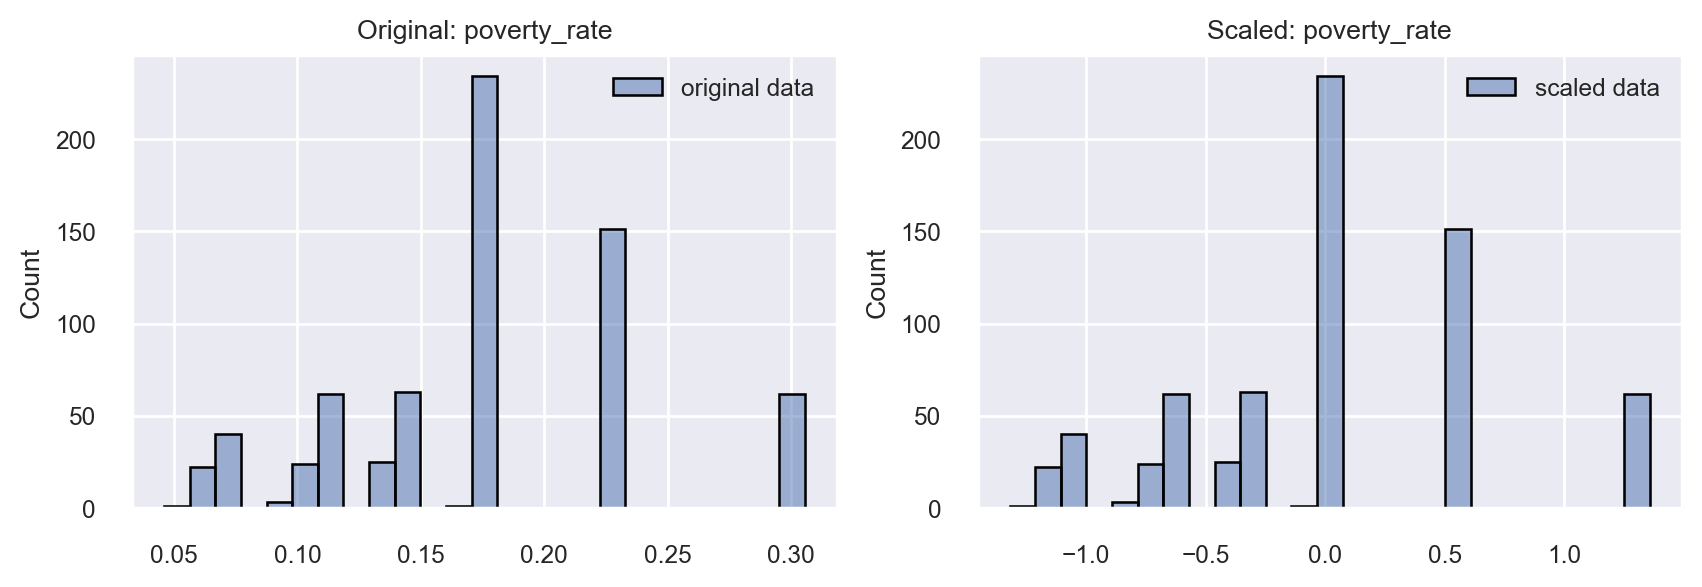

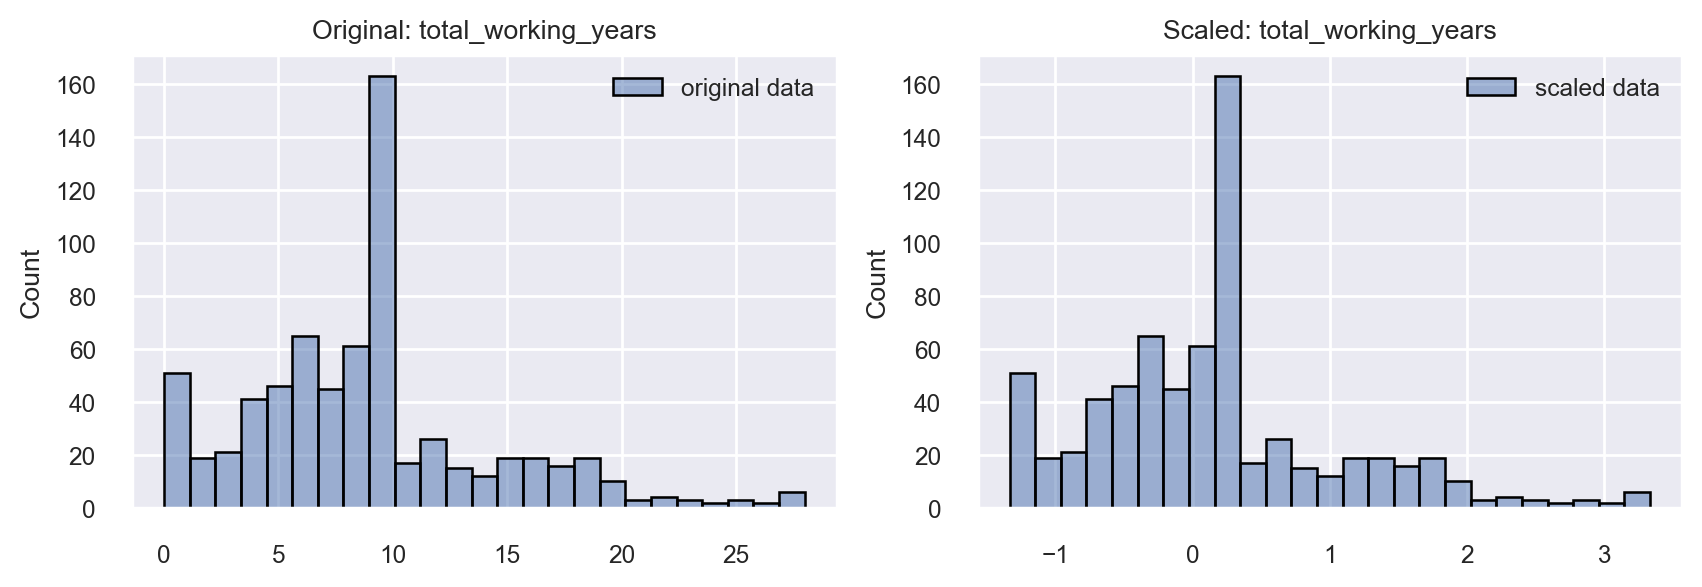

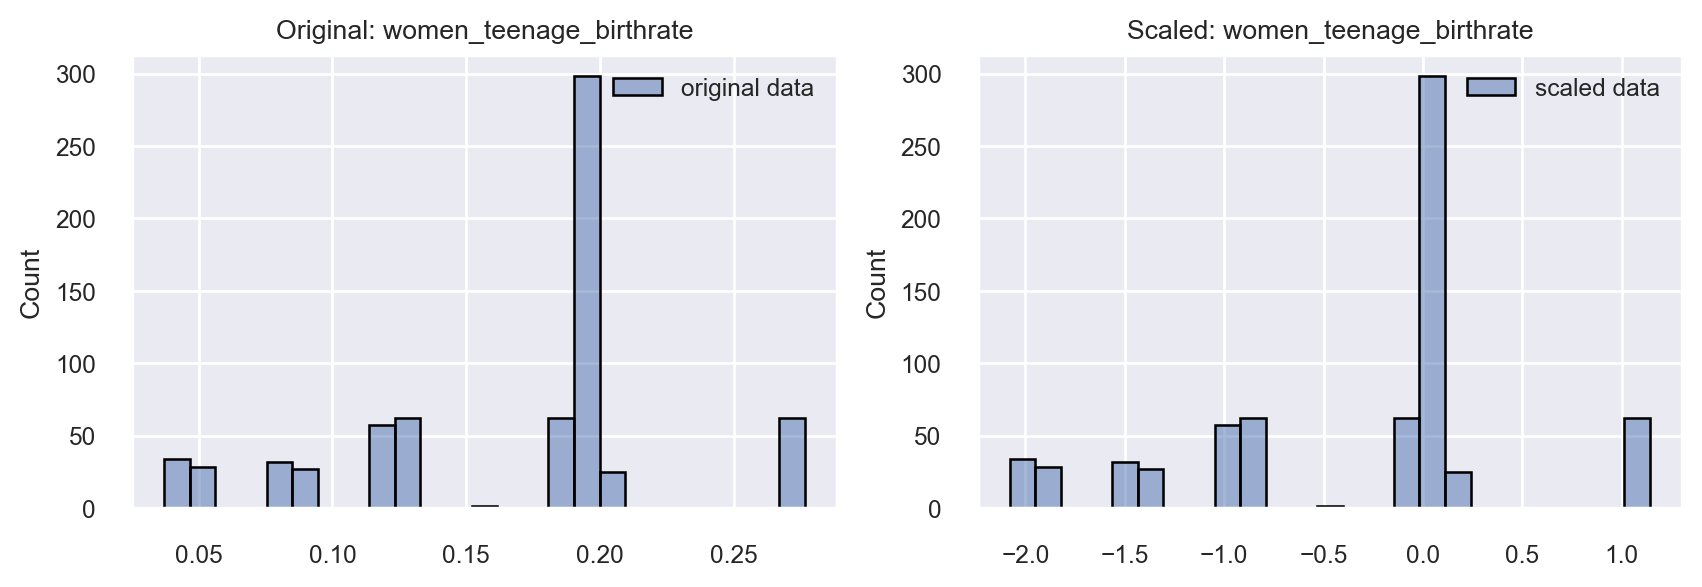

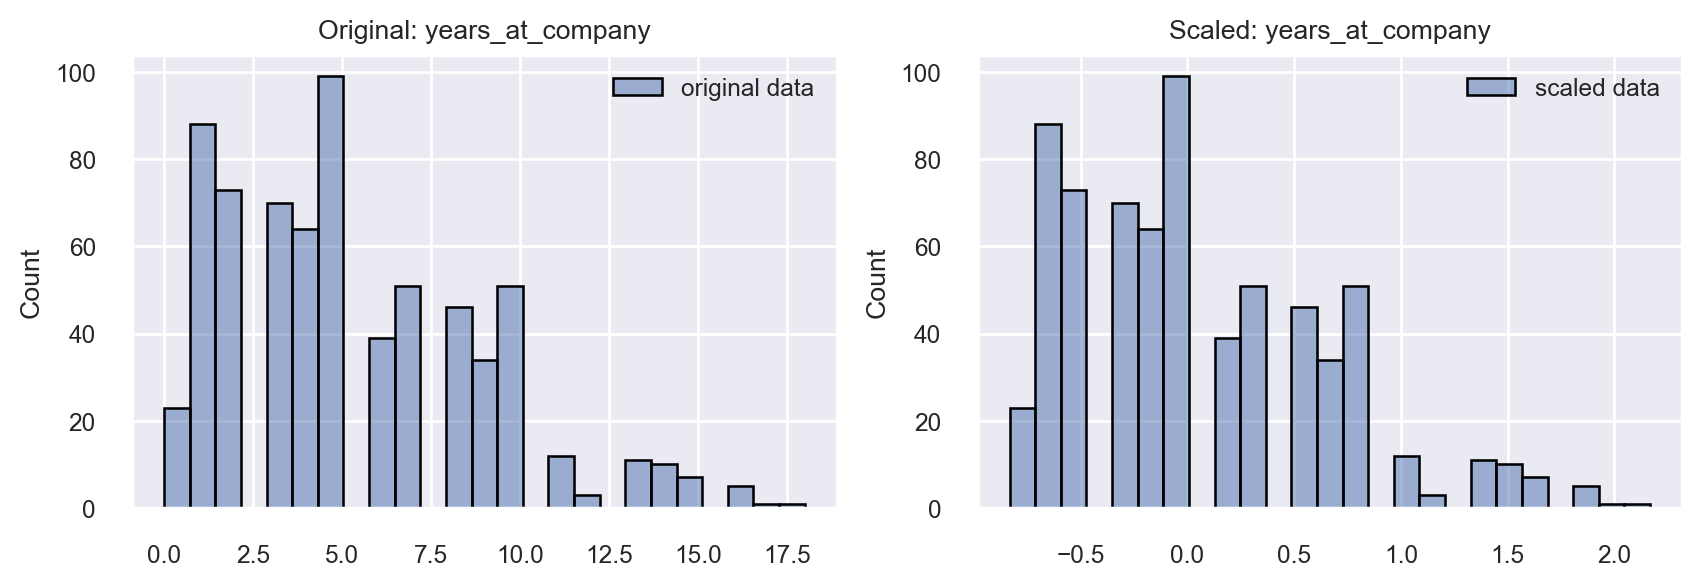

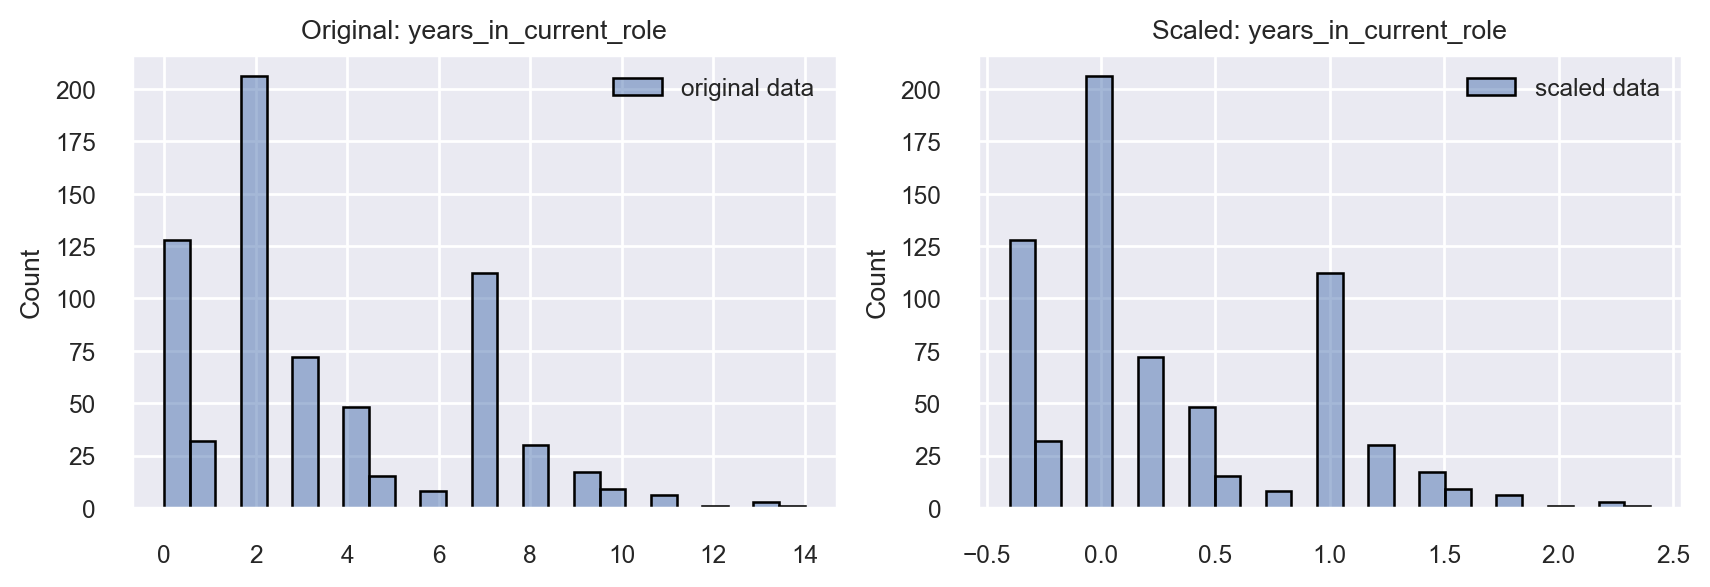

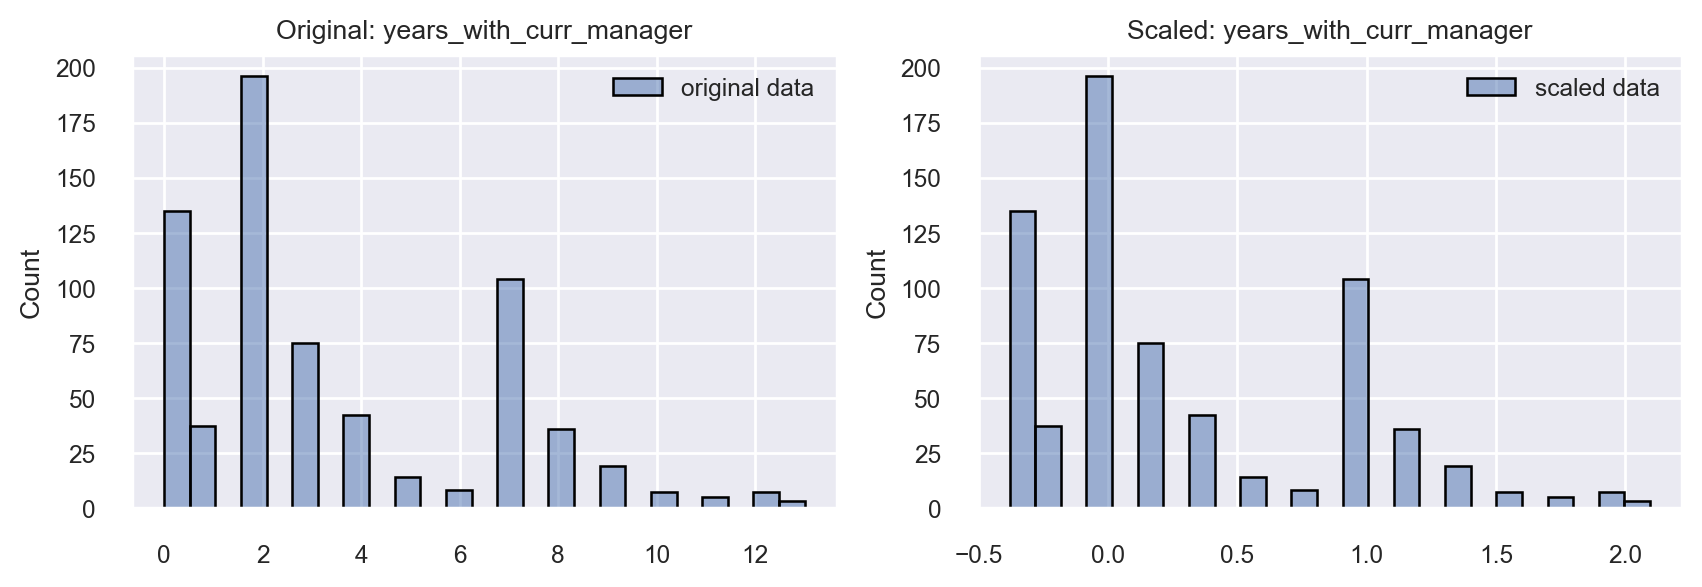

In [53]:
# Robust Scaler

cont_lst = X_train.select_dtypes(exclude = ["object", "uint8", "bool"]).columns.tolist()


for col in cont_lst:
    plt.figure(figsize=(10, 3))
    sns.set(font_scale = .8)

    scaler = RobustScaler()
    scaler.fit(X_train[[col]])
    x_scaled = scaler.transform(X_train[[col]])


    plt.subplot(121)
    ax1 = sns.histplot(X_train[[col]], bins = 25, edgecolor = 'black', label = 'original data')

    # removing axes scientific notation 
    ax1.ticklabel_format(style = "plain") 
    plt.title(f'Original: {col}')
    plt.legend()

    plt.subplot(122)
    ax2 = sns.histplot(x_scaled, bins=25, edgecolor = 'black', label = "scaled data")

    # removing axes scientific notation 
    ax2.ticklabel_format(style = "plain") 
    plt.title(f'Scaled: {col}')
    plt.legend()

----
#### **``Scaler Summary:``**

- ``Since outlier management was previously handled in preparation and I don't see this factor being prevelant in the graphs, I will choose to use sklearn's Standard Scaler to transform the selected continuous variables.``

In [54]:
# scaling continuous features/data with sklearn "StandardScaler"
# creating function to do this

def scaled_data(df, scaled_cols):
    # creating a copy of the original zillow/dataframe
    df_scaled = df.copy()

    scaler = StandardScaler()

    scaler.fit(df_scaled[scaled_cols])

    df_scaled[scaled_cols] = scaler.transform(df_scaled[scaled_cols])

    # returning newly created dataframe with scaled data
    return df_scaled

In [55]:
# selecting features to scale

scale_lst = X_train.select_dtypes(exclude = ["object", "uint8", "bool"]).columns.tolist()
scale_lst

['employee_age',
 'employment_rates_at_35yrs',
 'high_school_graduation_rate',
 'household_income_at_35',
 'monthly_income',
 'percentage_married_by_35',
 'poverty_rate',
 'total_working_years',
 'women_teenage_birthrate',
 'years_at_company',
 'years_in_current_role',
 'years_with_curr_manager']

In [56]:
# viewing the head for comparison
X_train.head()

job_level                   job_role marital_status stock_option_level  \
161          1         Research Scientist        Married                  3   
1647         1         Research Scientist        Married                  0   
624          3  Healthcare Representative        Married                  0   
1279         1      Laboratory Technician         Single                  0   
469          2            Sales Executive        Married                  1   

      employee_age  employment_rates_at_35yrs  high_school_graduation_rate  \
161             56                       0.79                         0.92   
1647            27                       0.78                         0.87   
624             46                       0.80                         0.94   
1279            21                       0.76                         0.88   
469             29                       0.73                         0.81   

      household_income_at_35  monthly_income  percentage_married_by_35  \
161                    57101            4963                      0.45   
1647                   41374            3517                      0.35   
624                    63424           10527                      0.51   
1279                   45330            2625                      0.38   
469                    37826            4649                      0.29   

      poverty_rate  total_working_years  women_teenage_birthrate  \
161           0.10                    7                     0.09   
1647          0.18                    5                     0.19   
624           0.07                   28                     0.04   
1279          0.15                    2                     0.12   
469           0.17                    4                     0.19   

      years_at_company  years_in_current_role  years_with_curr_manager  
161                  5                      4                        3  
1647                 3                      2                        2  
624                  2                      2                        2  
1279                 2                      2                        2  
469                  4                      3                        2

In [57]:
# generating new X_train, and X_validate datasets w/scaled data

X_train = scaled_data(X_train, scale_lst)
X_validate = scaled_data(X_validate, scale_lst)

# preview the data
X_train.head() # checks out!

job_level                   job_role marital_status stock_option_level  \
161          1         Research Scientist        Married                  3   
1647         1         Research Scientist        Married                  0   
624          3  Healthcare Representative        Married                  0   
1279         1      Laboratory Technician         Single                  0   
469          2            Sales Executive        Married                  1   

      employee_age  employment_rates_at_35yrs  high_school_graduation_rate  \
161           2.36                       1.13                         1.27   
1647         -0.97                       0.66                         0.21   
624           1.21                       1.45                         1.66   
1279         -1.65                       0.08                         0.47   
469          -0.74                      -1.00                        -0.93   

      household_income_at_35  monthly_income  percentage_married_by_35  \
161                     1.50           -0.05                      1.21   
1647                   -0.23           -0.54                     -0.07   
624                     2.20            1.80                      2.00   
1279                    0.20           -0.83                      0.34   
469                    -0.63           -0.16                     -0.76   

      poverty_rate  total_working_years  women_teenage_birthrate  \
161          -1.19                -0.36                    -1.30   
1647         -0.00                -0.73                     0.35   
624          -1.60                 3.56                    -2.07   
1279         -0.45                -1.29                    -0.74   
469          -0.03                -0.92                     0.42   

      years_at_company  years_in_current_role  years_with_curr_manager  
161              -0.08                   0.19                    -0.15  
1647             -0.63                  -0.49                    -0.48  
624              -0.90                  -0.49                    -0.48  
1279             -0.90                  -0.49                    -0.48  
469              -0.36                  -0.15                    -0.48

----
#### **``Assigning and Creating Dummy Variables for Discrete Features``**


In [58]:
X_train.select_dtypes(exclude = "number").columns.tolist()

['job_level', 'job_role', 'marital_status', 'stock_option_level']

In [59]:
'''function to create dummy variables for discrete variables/feature'''
def get_dummy_dataframes(train_df, val_df, test_df):

    # train dataset
    train_dummy = pd.get_dummies(
        data = train_df, 
        columns = [
                'job_level', 
                'job_role', 
                'marital_status', 
                'stock_option_level'],
        drop_first = False, 
        dtype = bool)

    # validate dataset
    validate_dummy = pd.get_dummies(
        data = val_df, 
        columns = [
                'job_level', 
                'job_role', 
                'marital_status', 
                'stock_option_level'],
        drop_first = False, 
        dtype = bool)

    # test dataset
    test_dummy = pd.get_dummies(
        data = test_df, 
        columns = [
                'job_level', 
                'job_role', 
                'marital_status', 
                'stock_option_level'],
        drop_first = False, 
        dtype = bool)

    # returning dummy datasets
    return train_dummy, validate_dummy, test_dummy

In [60]:
# inspecting df before dummy transformation

X_train.shape

(688, 16)

In [61]:
# transforming dataframe to include dummy variables

train_dummy, validate_dummy, test_dummy = get_dummy_dataframes(X_train, X_validate, X_test)

# cleaning column names after dummy transformation
train_dummy = clean_columns(train_dummy)
validate_dummy = clean_columns(validate_dummy)
test_dummy = clean_columns(test_dummy)

print(f'shape: {train_dummy.shape}')
train_dummy.head()

shape: (688, 32)


employee_age  employment_rates_at_35yrs  high_school_graduation_rate  \
161           2.36                       1.13                         1.27   
1647         -0.97                       0.66                         0.21   
624           1.21                       1.45                         1.66   
1279         -1.65                       0.08                         0.47   
469          -0.74                      -1.00                        -0.93   

      household_income_at_35  monthly_income  percentage_married_by_35  \
161                     1.50           -0.05                      1.21   
1647                   -0.23           -0.54                     -0.07   
624                     2.20            1.80                      2.00   
1279                    0.20           -0.83                      0.34   
469                    -0.63           -0.16                     -0.76   

      poverty_rate  total_working_years  women_teenage_birthrate  \
161          -1.19                -0.36                    -1.30   
1647         -0.00                -0.73                     0.35   
624          -1.60                 3.56                    -2.07   
1279         -0.45                -1.29                    -0.74   
469          -0.03                -0.92                     0.42   

      years_at_company  ...  job_role_research_scientist  \
161              -0.08  ...                         True   
1647             -0.63  ...                         True   
624              -0.90  ...                        False   
1279             -0.90  ...                        False   
469              -0.36  ...                        False   

      job_role_sales_executive  job_role_sales_representative  \
161                      False                          False   
1647                     False                          False   
624                      False                          False   
1279                     False                          False   
469                       True                          False   

      marital_status_divorced  marital_status_married  marital_status_single  \
161                     False                    True                  False   
1647                    False                    True                  False   
624                     False                    True                  False   
1279                    False                   False                   True   
469                     False                    True                  False   

      stock_option_level_0  stock_option_level_1  stock_option_level_2  \
161                  False                 False                 False   
1647                  True                 False                 False   
624                   True                 False                 False   
1279                  True                 False                 False   
469                  False                  True                 False   

      stock_option_level_3  
161                   True  
1647                 False  
624                  False  
1279                 False  
469                  False  

[5 rows x 32 columns]

----
### **``Feature Selection``**

In [62]:
# creating a recursive feature function to select and predict the top performing features in input the datasets

def recursive_feature_eliminate(X_train, y_train, number_of_top_features):

    # initialize the ML algorithm
    lr = LogisticRegression()

    rfe = RFE(lr, n_features_to_select = number_of_top_features)

    # fit the data using RFE
    rfe.fit(X_train, y_train) 

    # get the mask of the columns selected
    feature_mask = rfe.support_

    # get list of the column names
    rfe_features = X_train.iloc[:,feature_mask].columns.tolist()

    # view list of columns and their ranking
    # get the ranks using "rfe.ranking" method
    variable_ranks = rfe.ranking_

    # get the variable names
    variable_names = X_train.columns.tolist()

    # combine ranks and names into a df for clean viewing
    rfe_ranks_df = pd.DataFrame({'Feature': variable_names, 'Ranking': variable_ranks})

    # sort the df by rank
    return rfe_ranks_df.sort_values('Ranking')


In [63]:
# SKLearn's Recursive Feature Elimination function

recursive_feature_eliminate(train_dummy, y_train, 10).reset_index(drop = True)

Feature  Ranking
0          job_role_research_scientist        1
1             job_role_sales_executive        1
2                       monthly_income        1
3        job_role_sales_representative        1
4                 stock_option_level_1        1
5                 stock_option_level_2        1
6                     years_at_company        1
7                 stock_option_level_0        1
8           job_role_research_director        1
9                          job_level_2        1
10                         job_level_3        2
11                         job_level_1        3
12           employment_rates_at_35yrs        4
13  job_role_healthcare_representative        5
14                    job_role_manager        6
15                        employee_age        7
16         high_school_graduation_rate        8
17             women_teenage_birthrate        9
18                        poverty_rate       10
19      job_role_laboratory_technician       11
20              household_income_at_35       12
21            percentage_married_by_35       13
22             years_with_curr_manager       14
23                stock_option_level_3       15
24     job_role_manufacturing_director       16
25                 total_working_years       17
26                         job_level_4       18
27               marital_status_single       19
28               years_in_current_role       20
29            job_role_human_resources       21
30             marital_status_divorced       22
31              marital_status_married       23

In [64]:
# using sklearn's RFECV function to select best features to include w/Random Forest classifier

cross_validation = RFECV(
    estimator = RandomForestClassifier(random_state = 548),
    min_features_to_select = 5)

cross_validation = cross_validation.fit(train_dummy, y_train)

rf_features = train_dummy.columns[cross_validation.support_].tolist()
pd.DataFrame(rf_features).rename(columns = {0: "Features"}).sort_values("Features").reset_index(drop = True)

Features
0                         employee_age
1            employment_rates_at_35yrs
2          high_school_graduation_rate
3               household_income_at_35
4                          job_level_1
5                          job_level_2
6                          job_level_3
7   job_role_healthcare_representative
8             job_role_human_resources
9       job_role_laboratory_technician
10     job_role_manufacturing_director
11         job_role_research_scientist
12            job_role_sales_executive
13       job_role_sales_representative
14             marital_status_divorced
15              marital_status_married
16               marital_status_single
17                      monthly_income
18            percentage_married_by_35
19                        poverty_rate
20                stock_option_level_0
21                stock_option_level_1
22                stock_option_level_2
23                stock_option_level_3
24                 total_working_years
25             women_teenage_birthrate
26                    years_at_company
27               years_in_current_role
28             years_with_curr_manager

In [65]:
# applying RFECV w/Logistic Regression estimator

cross_validation = RFECV(
    estimator = LogisticRegression(
        C = 1, 
        class_weight = "balanced", 
        random_state = 548),
        min_features_to_select = 5)

cross_validation = cross_validation.fit(train_dummy, y_train)

lr_features = train_dummy.columns[cross_validation.support_].tolist()
pd.DataFrame(lr_features).rename(columns = {0: "Features"}).sort_values("Features").reset_index(drop = True)

Features
0                         employee_age
1            employment_rates_at_35yrs
2          high_school_graduation_rate
3               household_income_at_35
4                          job_level_1
5                          job_level_2
6                          job_level_3
7                          job_level_4
8   job_role_healthcare_representative
9             job_role_human_resources
10      job_role_laboratory_technician
11                    job_role_manager
12          job_role_research_director
13         job_role_research_scientist
14            job_role_sales_executive
15       job_role_sales_representative
16             marital_status_divorced
17               marital_status_single
18                      monthly_income
19            percentage_married_by_35
20                        poverty_rate
21                stock_option_level_0
22                stock_option_level_1
23                stock_option_level_2
24                 total_working_years
25             women_teenage_birthrate
26                    years_at_company
27             years_with_curr_manager

----
#### **``Summary: Recursive Feature Elimination``**

I will leverage Sklearn's RFECV using a Random Forest estimator to select features used in Modeling. 

In [66]:
# let's apply the RFECV Feature using a Random Forest Classifier to model the datasets

train_model = train_dummy[rf_features]
validate_model = validate_dummy[rf_features]
test_model = test_dummy[rf_features]

train_model.head()

employee_age  employment_rates_at_35yrs  high_school_graduation_rate  \
161           2.36                       1.13                         1.27   
1647         -0.97                       0.66                         0.21   
624           1.21                       1.45                         1.66   
1279         -1.65                       0.08                         0.47   
469          -0.74                      -1.00                        -0.93   

      household_income_at_35  monthly_income  percentage_married_by_35  \
161                     1.50           -0.05                      1.21   
1647                   -0.23           -0.54                     -0.07   
624                     2.20            1.80                      2.00   
1279                    0.20           -0.83                      0.34   
469                    -0.63           -0.16                     -0.76   

      poverty_rate  total_working_years  women_teenage_birthrate  \
161          -1.19                -0.36                    -1.30   
1647         -0.00                -0.73                     0.35   
624          -1.60                 3.56                    -2.07   
1279         -0.45                -1.29                    -0.74   
469          -0.03                -0.92                     0.42   

      years_at_company  ...  job_role_research_scientist  \
161              -0.08  ...                         True   
1647             -0.63  ...                         True   
624              -0.90  ...                        False   
1279             -0.90  ...                        False   
469              -0.36  ...                        False   

      job_role_sales_executive  job_role_sales_representative  \
161                      False                          False   
1647                     False                          False   
624                      False                          False   
1279                     False                          False   
469                       True                          False   

      marital_status_divorced  marital_status_married  marital_status_single  \
161                     False                    True                  False   
1647                    False                    True                  False   
624                     False                    True                  False   
1279                    False                   False                   True   
469                     False                    True                  False   

      stock_option_level_0  stock_option_level_1  stock_option_level_2  \
161                  False                 False                 False   
1647                  True                 False                 False   
624                   True                 False                 False   
1279                  True                 False                 False   
469                  False                  True                 False   

      stock_option_level_3  
161                   True  
1647                 False  
624                  False  
1279                 False  
469                  False  

[5 rows x 29 columns]

In [67]:
from sklearn.feature_selection import SelectKBest, f_regression

f_selector = SelectKBest(f_regression, k = 29)

# find the top number of independent variables (X's) correlated with y
f_selector.fit(train_model, y_train)

# boolean mask of whether the column was selected or not
feature_mask = f_selector.get_support()

# get list of top (2) K features. 
f_feature = train_model.iloc[:,feature_mask].columns.tolist()

feature_lst = pd.DataFrame(f_feature).rename(columns = {0: "feature"})
feature_lst

feature
0                         employee_age
1            employment_rates_at_35yrs
2          high_school_graduation_rate
3               household_income_at_35
4                       monthly_income
5             percentage_married_by_35
6                         poverty_rate
7                  total_working_years
8              women_teenage_birthrate
9                     years_at_company
10               years_in_current_role
11             years_with_curr_manager
12                         job_level_1
13                         job_level_2
14                         job_level_3
15  job_role_healthcare_representative
16            job_role_human_resources
17      job_role_laboratory_technician
18     job_role_manufacturing_director
19         job_role_research_scientist
20            job_role_sales_executive
21       job_role_sales_representative
22             marital_status_divorced
23              marital_status_married
24               marital_status_single
25                stock_option_level_0
26                stock_option_level_1
27                stock_option_level_2
28                stock_option_level_3

In [68]:
# ranking features in model datasets
ranked_features = recursive_feature_eliminate(train_model, y_train, 1).reset_index(drop = True)
ranked_features

Feature  Ranking
0        job_role_sales_representative        1
1                 stock_option_level_0        2
2                          job_level_2        3
3             job_role_sales_executive        4
4          job_role_research_scientist        5
5                       monthly_income        6
6                 stock_option_level_1        7
7                 stock_option_level_2        8
8                     years_at_company        9
9                          job_level_3       10
10                         job_level_1       11
11           employment_rates_at_35yrs       12
12  job_role_healthcare_representative       13
13                        employee_age       14
14         high_school_graduation_rate       15
15             women_teenage_birthrate       16
16                        poverty_rate       17
17      job_role_laboratory_technician       18
18              household_income_at_35       19
19            percentage_married_by_35       20
20             years_with_curr_manager       21
21                stock_option_level_3       22
22                 total_working_years       23
23               marital_status_single       24
24               years_in_current_role       25
25     job_role_manufacturing_director       26
26             marital_status_divorced       27
27            job_role_human_resources       28
28              marital_status_married       29

In [69]:
# looping through Random Forest depth & sample leaf

leaf_counter = 0

for i in range(1, 11):
    
    # Make the model
    rf = RandomForestClassifier(max_depth=i, min_samples_leaf = (leaf_counter + 1), random_state=548)
    leaf_counter += 1

    # Fit the model (on train dataset)
    rf = rf.fit(train_model, y_train)

    # We'll evaluate the model's performance on train, first
    y_predictions = rf.predict(train_model)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Random Forest with max_depth of: {i}")
    print(f"Random Forest with minimum sample leaves of: {leaf_counter}")
    print(pd.DataFrame(report))

    print()

Random Forest with max_depth of: 1
Random Forest with minimum sample leaves of: 1
           False   True  accuracy  macro avg  weighted avg
precision   0.82   0.00      0.82       0.41          0.68
recall      1.00   0.00      0.82       0.50          0.82
f1-score    0.90   0.00      0.82       0.45          0.74
support   566.00 122.00      0.82     688.00        688.00

Random Forest with max_depth of: 2
Random Forest with minimum sample leaves of: 2
           False   True  accuracy  macro avg  weighted avg
precision   0.83   0.80      0.83       0.81          0.82
recall      1.00   0.03      0.83       0.52          0.83
f1-score    0.90   0.06      0.83       0.48          0.76
support   566.00 122.00      0.83     688.00        688.00

Random Forest with max_depth of: 3
Random Forest with minimum sample leaves of: 3
           False   True  accuracy  macro avg  weighted avg
precision   0.84   0.79      0.84       0.81          0.83
recall      0.99   0.12      0.84       0.56

In [70]:
# looping through Decision Tree Classifier and working backwards from number of leaves

leaf_counter = 0

for i in range(10, 0, -1):

    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, min_samples_leaf = (leaf_counter + 1), random_state=548)
    leaf_counter += 1

    # Fit the model (on train dataset)
    tree = tree.fit(train_model, y_train)

    # We'll evaluate the model's petreeormance on train, first
    y_predictions = tree.predict(train_model)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Decision Tree with max_depth of: {i}")
    print(f"Decision Tree with minimum sample leaves of: {leaf_counter}")
    print(pd.DataFrame(report))
    
    print()

Decision Tree with max_depth of: 10
Decision Tree with minimum sample leaves of: 1
           False   True  accuracy  macro avg  weighted avg
precision   0.97   0.94      0.96       0.95          0.96
recall      0.99   0.84      0.96       0.92          0.96
f1-score    0.98   0.89      0.96       0.93          0.96
support   566.00 122.00      0.96     688.00        688.00

Decision Tree with max_depth of: 9
Decision Tree with minimum sample leaves of: 2
           False   True  accuracy  macro avg  weighted avg
precision   0.92   0.95      0.92       0.93          0.92
recall      0.99   0.58      0.92       0.79          0.92
f1-score    0.95   0.72      0.92       0.84          0.91
support   566.00 122.00      0.92     688.00        688.00

Decision Tree with max_depth of: 8
Decision Tree with minimum sample leaves of: 3
           False   True  accuracy  macro avg  weighted avg
precision   0.92   0.81      0.90       0.86          0.90
recall      0.97   0.58      0.90       0.7

In [71]:
# evaluating the Decision Tree model with
# max depth: 8
# number of sample leaves: 3

# creating the Decision Tree Model
tree1 = DecisionTreeClassifier(
    max_depth = 8, 
    min_samples_leaf = 3,
    random_state = 548)

# fitting the Decision Tree model
tree1 = tree1.fit(train_model, y_train)

decision_tree_acc = tree1.score(train_model, y_train)

print('Accuracy of Decision Tree Classifer on training dataset: {:.2f}'.format(decision_tree_acc))
print(f'Absolute % Difference (Baseline vs. Decision Tree Model): % {round(0.82 - decision_tree_acc, 2)*100}')

Accuracy of Decision Tree Classifer on training dataset: 0.90
Absolute % Difference (Baseline vs. Decision Tree Model): % -8.0


In [72]:
# making prediction on train dataset and returning confusion matrix against actual observations

y_predictions = tree1.predict(train_model)

pd.crosstab(y_predictions, y_train).rename_axis( "Predicted", axis = 0)

attrition  False  True
Predicted             
False        549    51
True          17    71

In [73]:
# plotting recursive feature elimination - cross validations & F1 score using yellowbrick rfecv

# plt.figure(figsize=(12,4))

# cv = StratifiedKFold(5)
# visualizer = rfecv(
#     RandomForestClassifier(random_state = 548), 
#     X = train_model, 
#     y = y_train, 
#     cv = cv, 
#     scoring='f1_weighted')

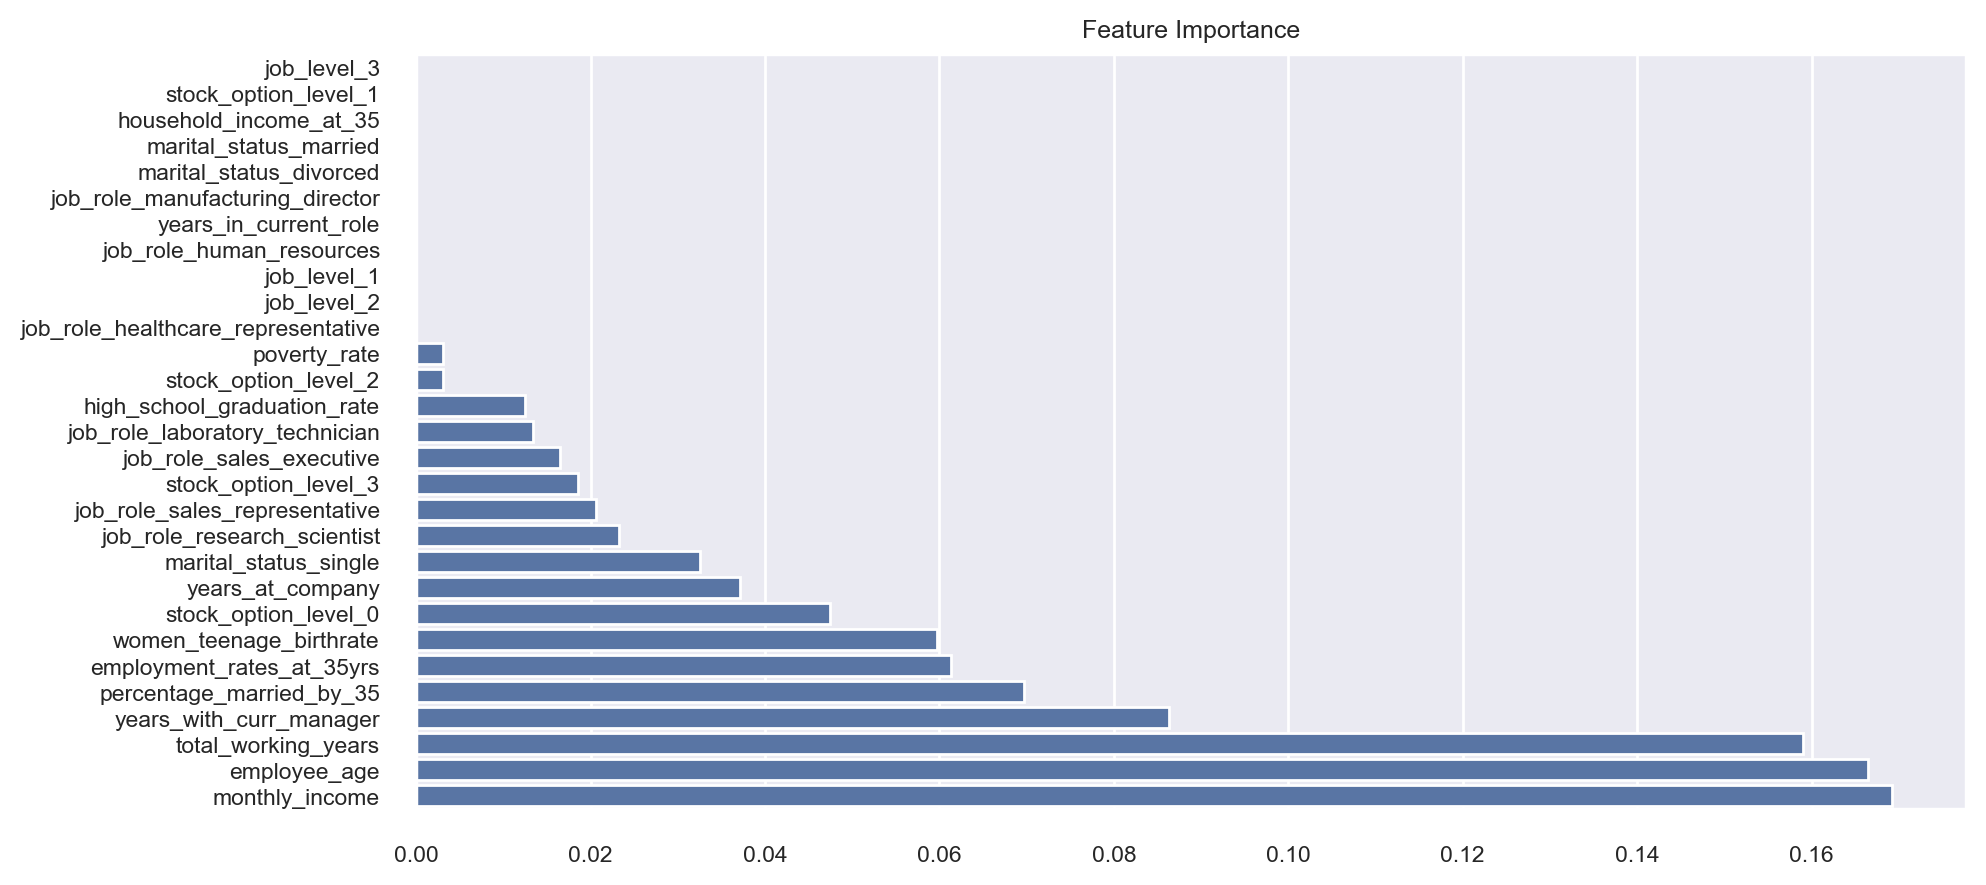

In [74]:
# calculating and plotting feature importance using Decision tree1 Classifer / non-recursive elimination

plt.figure(figsize = (10, 5))
sns.set(style = "darkgrid", font_scale = .75)

# organizing/ordering feature importance by value
sorted_idx = tree1.feature_importances_.argsort()

sns.barplot(tree1.feature_importances_[sorted_idx], train_model.columns[sorted_idx], orient = "h", color = "b")

plt.title("Feature Importance")
plt.show()

In [75]:
# showing decision tree importance by feature

pd.DataFrame(
    tree1.feature_importances_, 
    index = train_model.columns).\
    rename(columns = {0: "feature_importance"}).\
    sort_index(ascending=True).\
    sort_values(by = 'feature_importance', ascending = False)

feature_importance
monthly_income                                    0.17
employee_age                                      0.17
total_working_years                               0.16
years_with_curr_manager                           0.09
percentage_married_by_35                          0.07
employment_rates_at_35yrs                         0.06
women_teenage_birthrate                           0.06
stock_option_level_0                              0.05
years_at_company                                  0.04
marital_status_single                             0.03
job_role_research_scientist                       0.02
job_role_sales_representative                     0.02
stock_option_level_3                              0.02
job_role_sales_executive                          0.02
job_role_laboratory_technician                    0.01
high_school_graduation_rate                       0.01
stock_option_level_2                              0.00
poverty_rate                                      0.00
years_in_current_role                             0.00
stock_option_level_1                              0.00
job_level_1                                       0.00
household_income_at_35                            0.00
job_level_2                                       0.00
marital_status_married                            0.00
job_role_manufacturing_director                   0.00
job_role_human_resources                          0.00
job_role_healthcare_representative                0.00
job_level_3                                       0.00
marital_status_divorced                           0.00

In [76]:
'''Feature for plotting decision tree classifier - feature importance'''
def plot_feature_importance(X_train, y_train, depth, leaves):
    plt.figure(figsize = (10, 5))
    sns.set(style = "darkgrid", font_scale = .75)

    tree = DecisionTreeClassifier(
        max_depth = depth,
        min_samples_leaf = leaves,
        random_state = 548)
    tree = tree.fit(X_train, y_train)

    sorted_idx = tree.feature_importances_.argsort()

    sns.barplot(
        tree.feature_importances_[sorted_idx], 
        X_train.columns[sorted_idx], 
        orient = "h", 
        palette = "crest")

    plt.title("Feature Importance")

    plt.show()

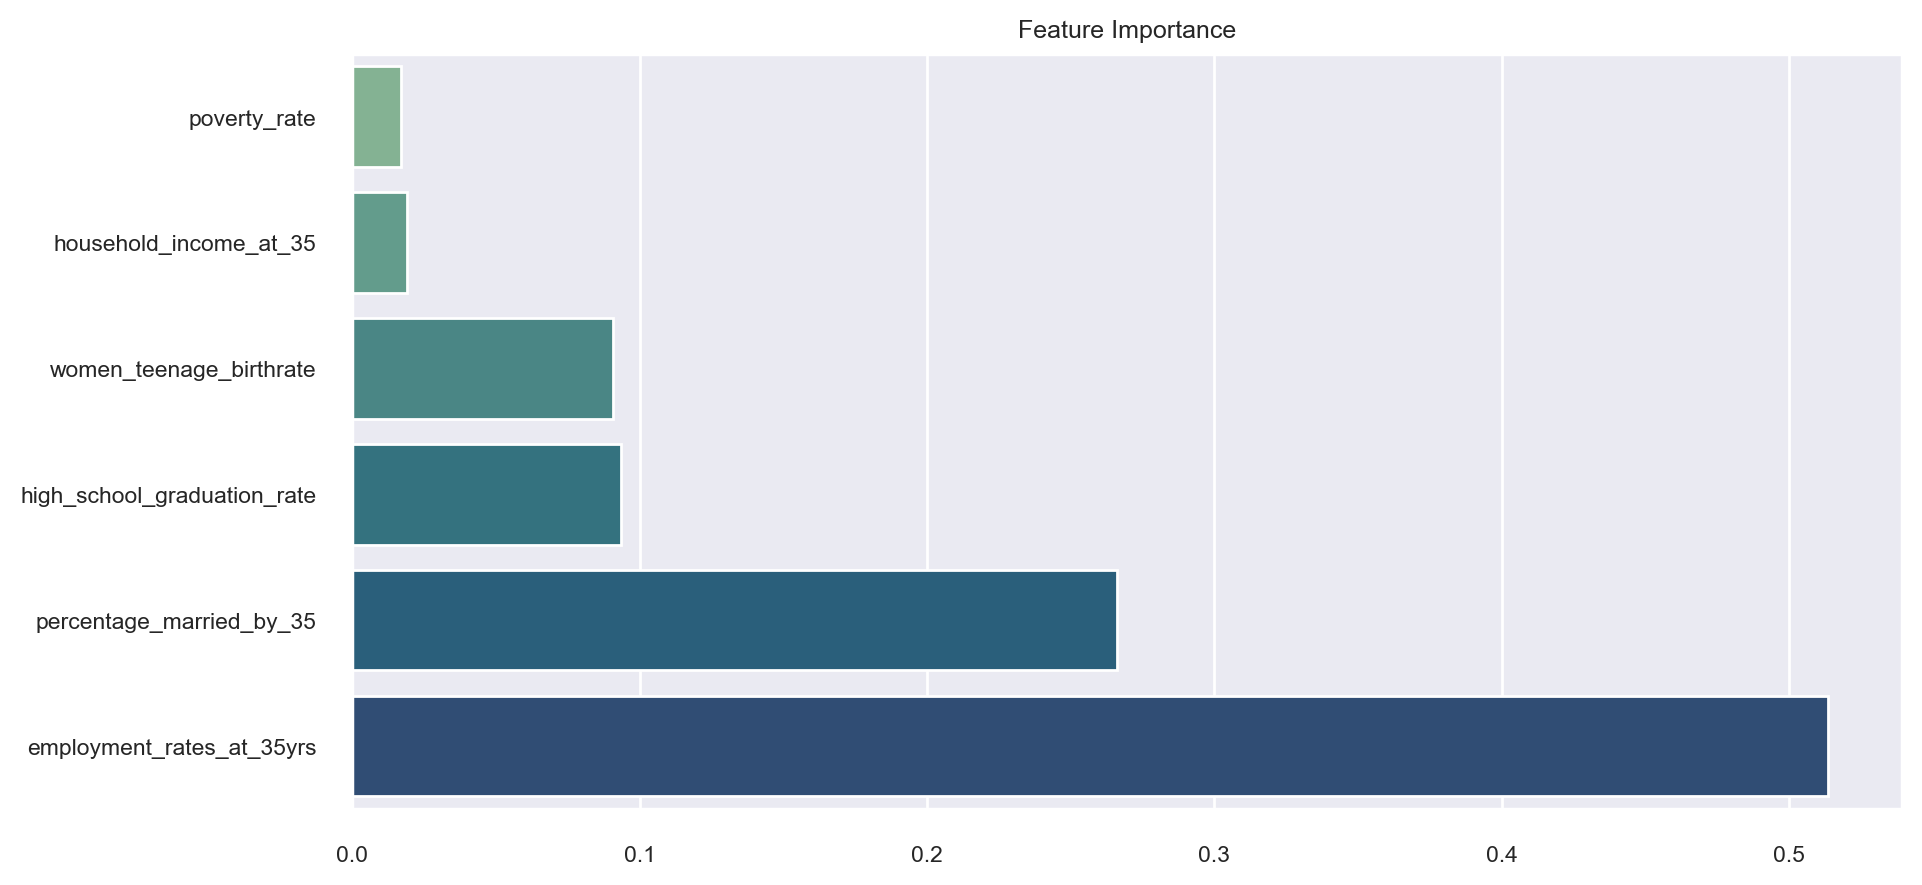

In [77]:
# let's also plot feature importance for just opportunity atlas features

equity_lst = [col for col in train_dummy.columns if 'rate' in col or 'household' in col or 'by' in col]
equity_df = train_dummy[equity_lst]

equity_df.head()
plot_feature_importance(equity_df, y_train, 4, 2)

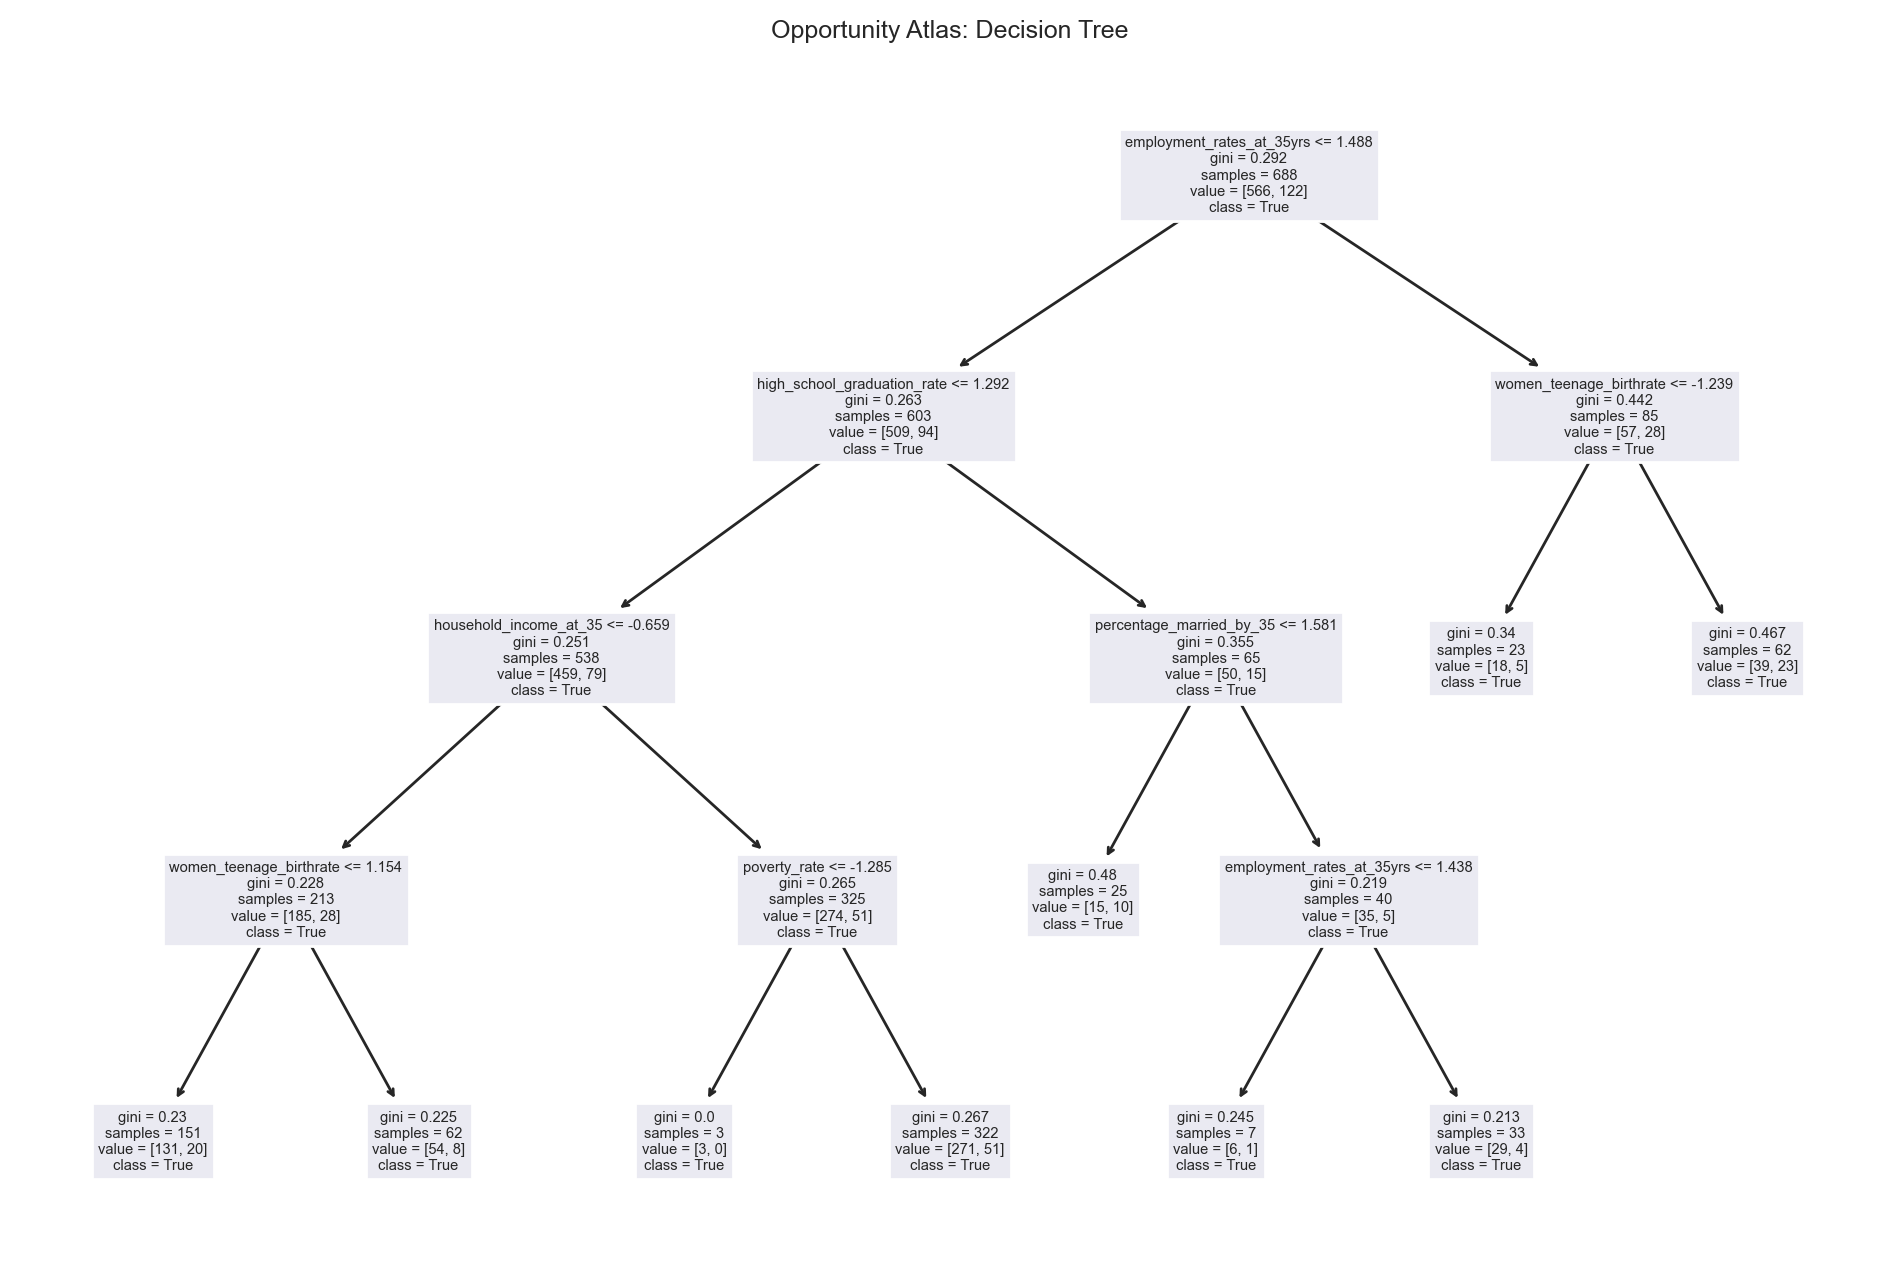

In [78]:
# Atlas Decision Tree w/max_depth = 4, and min_sample_leaf = 2

plt.figure(figsize=(12, 8))

unscaled_atlas = X_train[equity_lst]

tree_atlas = DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=548)
tree_atlas = tree_atlas.fit(unscaled_atlas, y_train)

plot_tree(tree_atlas, feature_names = unscaled_atlas.columns.astype("str"), class_names = y_train.unique().astype("str"))

plt.title("Opportunity Atlas: Decision Tree")
plt.show()

----
### **``Modeling``**

<u>Generating the Following Models:</u>

1. XGboost
2. Polynomial/Logistic Regression 
3. Decision Tree
4. Random Forest
5. Naive Bayes
6. KNN

In [79]:
# model num 1: xgboost

metrics = []

# creating the model
boost = XGBClassifier()

# fitting the model (on train and only train)
boost = boost.fit(train_model, y_train)

# applying the model and evaluating its performance on the training dataset
in_sample_accuracy = boost.score(train_model, y_train)

# next, we'll evaluate the model on "out-of-sample" data (validate)
out_of_sample_accuracy = boost.score(validate_model, y_validate)

output = {
    "model": "XGboost", \
    "train_accuracy": in_sample_accuracy, \
    "validate_accuracy": out_of_sample_accuracy
}

metrics.append(output)

df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.validate_accuracy)
df.round(4)


model  train_accuracy  validate_accuracy  percent_change_diff
0  XGboost            1.00               0.80                 0.24

In [80]:
# model num 2A: Logistic Regression

metrics = []

for i in np.linspace(0.1, 1.0, 10):

    # creating the model
    logi = LogisticRegression(
        C = i, 
        random_state=548)

    # fitting the model (on train and only train)
    logi = logi.fit(train_model, y_train)

    # applying the model and evaluating its performance on the training dataset
    in_sample_accuracy = logi.score(train_model, y_train)

    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = logi.score(validate_model, y_validate)

    output = {
        "model": "logi_model", \
        "C_parameter": i, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }

    metrics.append(output)

df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.validate_accuracy)
df.round(4)

model  C_parameter  train_accuracy  validate_accuracy  \
0  logi_model         0.10            0.84               0.84   
1  logi_model         0.20            0.84               0.84   
2  logi_model         0.30            0.84               0.83   
3  logi_model         0.40            0.85               0.83   
4  logi_model         0.50            0.85               0.83   
5  logi_model         0.60            0.84               0.83   
6  logi_model         0.70            0.84               0.83   
7  logi_model         0.80            0.84               0.83   
8  logi_model         0.90            0.84               0.84   
9  logi_model         1.00            0.84               0.84   

   percent_change_diff  
0                 0.00  
1                 0.00  
2                 0.01  
3                 0.02  
4                 0.01  
5                 0.01  
6                 0.01  
7                 0.01  
8                 0.00  
9                 0.00

In [81]:
# creating an opportunity atlas df from validate 

val_equity = validate_dummy[equity_lst]
val_equity.head()

employment_rates_at_35yrs  high_school_graduation_rate  \
1022                       0.59                         0.15   
248                        0.64                         0.57   
1546                       1.80                         1.36   
1582                       1.06                         1.22   
1292                       0.59                         0.15   

      household_income_at_35  percentage_married_by_35  poverty_rate  \
1022                   -0.29                     -0.13          0.05   
248                    -0.08                     -0.28          0.03   
1546                    1.39                      1.56         -1.28   
1582                    1.42                      1.12         -1.15   
1292                   -0.29                     -0.13          0.05   

      women_teenage_birthrate  
1022                     0.41  
248                      0.64  
1546                    -1.30  
1582                    -1.22  
1292                     0.41

In [82]:
# model num 2B: Logistic Regression / Opportunity Atlas Data

metrics = []

for i in np.linspace(0.1, 1.0, 10):

    # creating the model
    logi2 = LogisticRegression(
        C = i,
        random_state=548)

    # fitting the model (on train and only train)
    logi2 = logi2.fit(equity_df, y_train)

    # applying the model and evaluating its performance on the training dataset
    in_sample_accuracy = logi2.score(equity_df, y_train)

    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = logi2.score(val_equity, y_validate)

    output = {
        "model": "logi2_model", \
        "C_parameter": i, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }

    metrics.append(output)

df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.validate_accuracy)
df.round(4)

model  C_parameter  train_accuracy  validate_accuracy  \
0  logi2_model         0.10            0.82               0.82   
1  logi2_model         0.20            0.82               0.82   
2  logi2_model         0.30            0.82               0.82   
3  logi2_model         0.40            0.82               0.82   
4  logi2_model         0.50            0.82               0.82   
5  logi2_model         0.60            0.82               0.82   
6  logi2_model         0.70            0.82               0.82   
7  logi2_model         0.80            0.82               0.82   
8  logi2_model         0.90            0.82               0.82   
9  logi2_model         1.00            0.82               0.82   

   percent_change_diff  
0                -0.00  
1                -0.00  
2                -0.00  
3                -0.00  
4                -0.00  
5                -0.00  
6                -0.00  
7                -0.00  
8                -0.00  
9                -0.00

In [83]:
# model num 3A: Decision Tree

metrics = []
leaf_counter = 0

for i in range(1, 21):
    # creating the model
    tree = DecisionTreeClassifier(
        min_samples_leaf = (leaf_counter + 1), 
        max_depth = i,
        random_state=548)

    # increasing leaf counter by 1
    leaf_counter += 1

    # fitting the model
    tree = tree.fit(train_model, y_train)

    # applying the model and evaluating its performance on the training dataset
    in_sample_accuracy = tree.score(train_model, y_train)

    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = tree.score(validate_model, y_validate)

    output = {
        "model": "decision_tree", \
        "max_depth": i, \
        "min_sample_leaves": leaf_counter, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }

    metrics.append(output)

df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.validate_accuracy)
df.round(4)

model  max_depth  min_sample_leaves  train_accuracy  \
0   decision_tree          1                  1            0.83   
1   decision_tree          2                  2            0.84   
2   decision_tree          3                  3            0.84   
3   decision_tree          4                  4            0.86   
4   decision_tree          5                  5            0.87   
5   decision_tree          6                  6            0.88   
6   decision_tree          7                  7            0.87   
7   decision_tree          8                  8            0.86   
8   decision_tree          9                  9            0.86   
9   decision_tree         10                 10            0.86   
10  decision_tree         11                 11            0.86   
11  decision_tree         12                 12            0.85   
12  decision_tree         13                 13            0.85   
13  decision_tree         14                 14            0.85   
14  decision_tree         15                 15            0.85   
15  decision_tree         16                 16            0.84   
16  decision_tree         17                 17            0.84   
17  decision_tree         18                 18            0.84   
18  decision_tree         19                 19            0.84   
19  decision_tree         20                 20            0.84   

    validate_accuracy  percent_change_diff  
0                0.81                 0.02  
1                0.81                 0.03  
2                0.79                 0.06  
3                0.82                 0.05  
4                0.79                 0.10  
5                0.80                 0.10  
6                0.81                 0.08  
7                0.81                 0.07  
8                0.79                 0.10  
9                0.82                 0.04  
10               0.82                 0.04  
11               0.83                 0.03  
12               0.84                 0.01  
13               0.84                 0.01  
14               0.84                 0.01  
15               0.83                 0.02  
16               0.83                 0.02  
17               0.81                 0.04  
18               0.81                 0.04  
19               0.81                 0.04

In [84]:
# model num 3B: Decision Tree (reversed sample leaves)

metrics = []
leaf_counter = 21

for i in range(1, 21):
    # creating the model
    tree = DecisionTreeClassifier(
        min_samples_leaf = (leaf_counter - 1), 
        max_depth = i, 
        random_state=548)

    # decreasing leaf counter by 1
    leaf_counter -= 1

    # fitting the model
    tree = tree.fit(train_model, y_train)

    # applying the model and evaluating its performance on the training dataset
    in_sample_accuracy = tree.score(train_model, y_train)

    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = tree.score(validate_model, y_validate)

    output = {
        "model": "decision_tree_reversed", \
        "max_depth": i, \
        "min_sample_leaves": leaf_counter, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }

    metrics.append(output)

df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.validate_accuracy)
df.round(4)

model  max_depth  min_sample_leaves  train_accuracy  \
0   decision_tree_reversed          1                 20            0.83   
1   decision_tree_reversed          2                 19            0.84   
2   decision_tree_reversed          3                 18            0.84   
3   decision_tree_reversed          4                 17            0.84   
4   decision_tree_reversed          5                 16            0.84   
5   decision_tree_reversed          6                 15            0.85   
6   decision_tree_reversed          7                 14            0.85   
7   decision_tree_reversed          8                 13            0.85   
8   decision_tree_reversed          9                 12            0.85   
9   decision_tree_reversed         10                 11            0.86   
10  decision_tree_reversed         11                 10            0.86   
11  decision_tree_reversed         12                  9            0.86   
12  decision_tree_reversed         13                  8            0.87   
13  decision_tree_reversed         14                  7            0.88   
14  decision_tree_reversed         15                  6            0.90   
15  decision_tree_reversed         16                  5            0.91   
16  decision_tree_reversed         17                  4            0.91   
17  decision_tree_reversed         18                  3            0.93   
18  decision_tree_reversed         19                  2            0.95   
19  decision_tree_reversed         20                  1            1.00   

    validate_accuracy  percent_change_diff  
0                0.81                 0.02  
1                0.83                 0.01  
2                0.81                 0.04  
3                0.83                 0.02  
4                0.83                 0.02  
5                0.84                 0.01  
6                0.84                 0.01  
7                0.84                 0.01  
8                0.83                 0.03  
9                0.82                 0.04  
10               0.82                 0.04  
11               0.79                 0.10  
12               0.80                 0.08  
13               0.79                 0.11  
14               0.78                 0.15  
15               0.74                 0.22  
16               0.77                 0.19  
17               0.74                 0.26  
18               0.78                 0.22  
19               0.75                 0.33

In [85]:
# model num 3C: Decision Tree (Opportunity Atlas / reversed sample leaves)

metrics = []
leaf_counter = 0

for i in range(1, 21):
    # creating the model
    tree = DecisionTreeClassifier(
        min_samples_leaf = (leaf_counter + 1), 
        max_depth = i, 
        random_state=548)

    # decreasing leaf counter by 1
    leaf_counter += 1

    # fitting the model
    tree = tree.fit(equity_df, y_train)

    # applying the model and evaluating its performance on the training dataset
    in_sample_accuracy = tree.score(equity_df, y_train)

    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = tree.score(val_equity, y_validate)

    output = {
        "model": "decision_tree_atlas", \
        "max_depth": i, \
        "min_sample_leaves": leaf_counter, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }

    metrics.append(output)

df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.validate_accuracy)
df.round(4)

model  max_depth  min_sample_leaves  train_accuracy  \
0   decision_tree_atlas          1                  1            0.82   
1   decision_tree_atlas          2                  2            0.82   
2   decision_tree_atlas          3                  3            0.82   
3   decision_tree_atlas          4                  4            0.82   
4   decision_tree_atlas          5                  5            0.82   
5   decision_tree_atlas          6                  6            0.82   
6   decision_tree_atlas          7                  7            0.82   
7   decision_tree_atlas          8                  8            0.82   
8   decision_tree_atlas          9                  9            0.82   
9   decision_tree_atlas         10                 10            0.82   
10  decision_tree_atlas         11                 11            0.82   
11  decision_tree_atlas         12                 12            0.82   
12  decision_tree_atlas         13                 13            0.82   
13  decision_tree_atlas         14                 14            0.82   
14  decision_tree_atlas         15                 15            0.82   
15  decision_tree_atlas         16                 16            0.82   
16  decision_tree_atlas         17                 17            0.82   
17  decision_tree_atlas         18                 18            0.82   
18  decision_tree_atlas         19                 19            0.82   
19  decision_tree_atlas         20                 20            0.82   

    validate_accuracy  percent_change_diff  
0                0.82                -0.00  
1                0.82                -0.00  
2                0.82                -0.00  
3                0.82                -0.00  
4                0.82                -0.00  
5                0.82                -0.00  
6                0.82                -0.00  
7                0.82                -0.00  
8                0.82                -0.00  
9                0.82                -0.00  
10               0.82                -0.00  
11               0.82                -0.00  
12               0.82                -0.00  
13               0.82                -0.00  
14               0.82                -0.00  
15               0.82                -0.00  
16               0.82                -0.00  
17               0.82                -0.00  
18               0.82                -0.00  
19               0.82                -0.00

In [86]:
# model num 4A: Random Forest 

metrics = []

for i in range(1, 21):
    # Make the model
    rf = RandomForestClassifier(
        min_samples_leaf = i, 
        max_depth = i,
        random_state=548)

    # Fit the model (on train and only train)
    rf = rf.fit(train_model, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = rf.score(train_model, y_train)
    
    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = rf.score(validate_model, y_validate)
    
    output = {
        "model": "rf_classifier",
        "max_depth": i, \
        "num_of_sample_leaf": i, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.train_accuracy)
df.round(2)


model  max_depth  num_of_sample_leaf  train_accuracy  \
0   rf_classifier          1                   1            0.82   
1   rf_classifier          2                   2            0.83   
2   rf_classifier          3                   3            0.84   
3   rf_classifier          4                   4            0.84   
4   rf_classifier          5                   5            0.85   
5   rf_classifier          6                   6            0.85   
6   rf_classifier          7                   7            0.85   
7   rf_classifier          8                   8            0.85   
8   rf_classifier          9                   9            0.85   
9   rf_classifier         10                  10            0.84   
10  rf_classifier         11                  11            0.84   
11  rf_classifier         12                  12            0.84   
12  rf_classifier         13                  13            0.84   
13  rf_classifier         14                  14            0.84   
14  rf_classifier         15                  15            0.84   
15  rf_classifier         16                  16            0.84   
16  rf_classifier         17                  17            0.84   
17  rf_classifier         18                  18            0.84   
18  rf_classifier         19                  19            0.84   
19  rf_classifier         20                  20            0.84   

    validate_accuracy  percent_change_diff  
0                0.82                -0.00  
1                0.82                 0.01  
2                0.83                 0.01  
3                0.83                 0.01  
4                0.83                 0.02  
5                0.84                 0.02  
6                0.84                 0.02  
7                0.83                 0.02  
8                0.84                 0.01  
9                0.83                 0.01  
10               0.84                 0.01  
11               0.84                 0.01  
12               0.83                 0.01  
13               0.84                 0.00  
14               0.84                 0.00  
15               0.84                 0.00  
16               0.83                 0.01  
17               0.83                 0.01  
18               0.83                 0.01  
19               0.83                 0.01

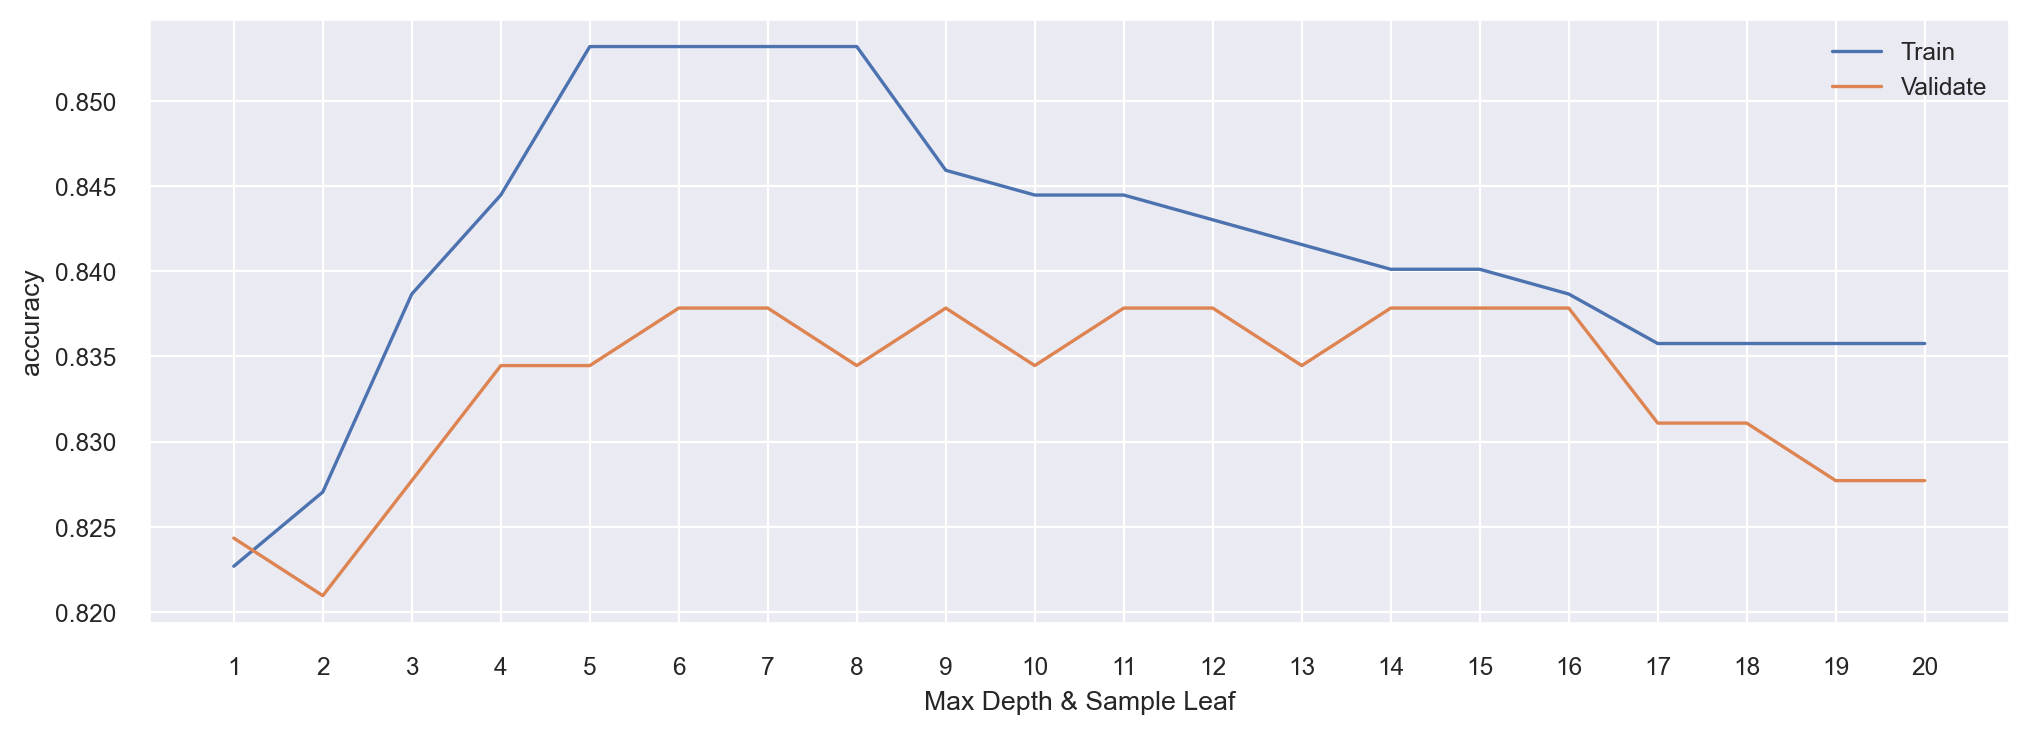

In [87]:
# plotting the Random Forest 

# plotting the "Random Forest" comparison across in-sample and out-sample datasets:

sns.set_theme("paper")

i_range = range(1, 21)
train_scores = []
validate_scores = []

for i in i_range:
    rf = RandomForestClassifier(
        min_samples_leaf = i, 
        max_depth = i,
        random_state=548)
        
    rf.fit(train_model, y_train)

    train_scores.append(rf.score(train_model, y_train))
    validate_scores.append(rf.score(validate_model, y_validate))


plt.figure(figsize=(12, 4))
plt.xlabel('Max Depth & Sample Leaf')
plt.ylabel('accuracy')
plt.plot(i_range, train_scores, label='Train')
plt.plot(i_range, validate_scores, label='Validate')
plt.legend()
plt.xticks(i_range)
plt.show()

In [88]:
# model num 4B: Random Forest Tree Reverse Count

metrics = []
leaf_count = 21

for i in range(1, 21):
    # Make the model
    rf = RandomForestClassifier(
        min_samples_leaf = (leaf_count-1), 
        max_depth = i,
        random_state=548)
        
    leaf_count -= 1

    # Fit the model (on train and only train)
    rf = rf.fit(train_model, y_train)

    # Use the model
    in_sample_accuracy = rf.score(train_model, y_train)
    
    # next, evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = rf.score(validate_model, y_validate)
    
    output = {
        "model": "rf_reversed",
        "max_depth": i, \
        "num_of_sample_leaf": leaf_count, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.train_accuracy)
df.round(4)

model  max_depth  num_of_sample_leaf  train_accuracy  \
0   rf_reversed          1                  20            0.82   
1   rf_reversed          2                  19            0.83   
2   rf_reversed          3                  18            0.83   
3   rf_reversed          4                  17            0.84   
4   rf_reversed          5                  16            0.84   
5   rf_reversed          6                  15            0.84   
6   rf_reversed          7                  14            0.84   
7   rf_reversed          8                  13            0.84   
8   rf_reversed          9                  12            0.84   
9   rf_reversed         10                  11            0.84   
10  rf_reversed         11                  10            0.85   
11  rf_reversed         12                   9            0.85   
12  rf_reversed         13                   8            0.85   
13  rf_reversed         14                   7            0.86   
14  rf_reversed         15                   6            0.86   
15  rf_reversed         16                   5            0.86   
16  rf_reversed         17                   4            0.87   
17  rf_reversed         18                   3            0.89   
18  rf_reversed         19                   2            0.93   
19  rf_reversed         20                   1            1.00   

    validate_accuracy  percent_change_diff  
0                0.82                -0.00  
1                0.82                 0.00  
2                0.82                 0.01  
3                0.82                 0.01  
4                0.83                 0.01  
5                0.83                 0.01  
6                0.83                 0.01  
7                0.83                 0.01  
8                0.84                 0.01  
9                0.84                 0.01  
10               0.83                 0.01  
11               0.84                 0.01  
12               0.83                 0.02  
13               0.83                 0.03  
14               0.84                 0.02  
15               0.83                 0.03  
16               0.83                 0.04  
17               0.82                 0.07  
18               0.83                 0.11  
19               0.83                 0.17

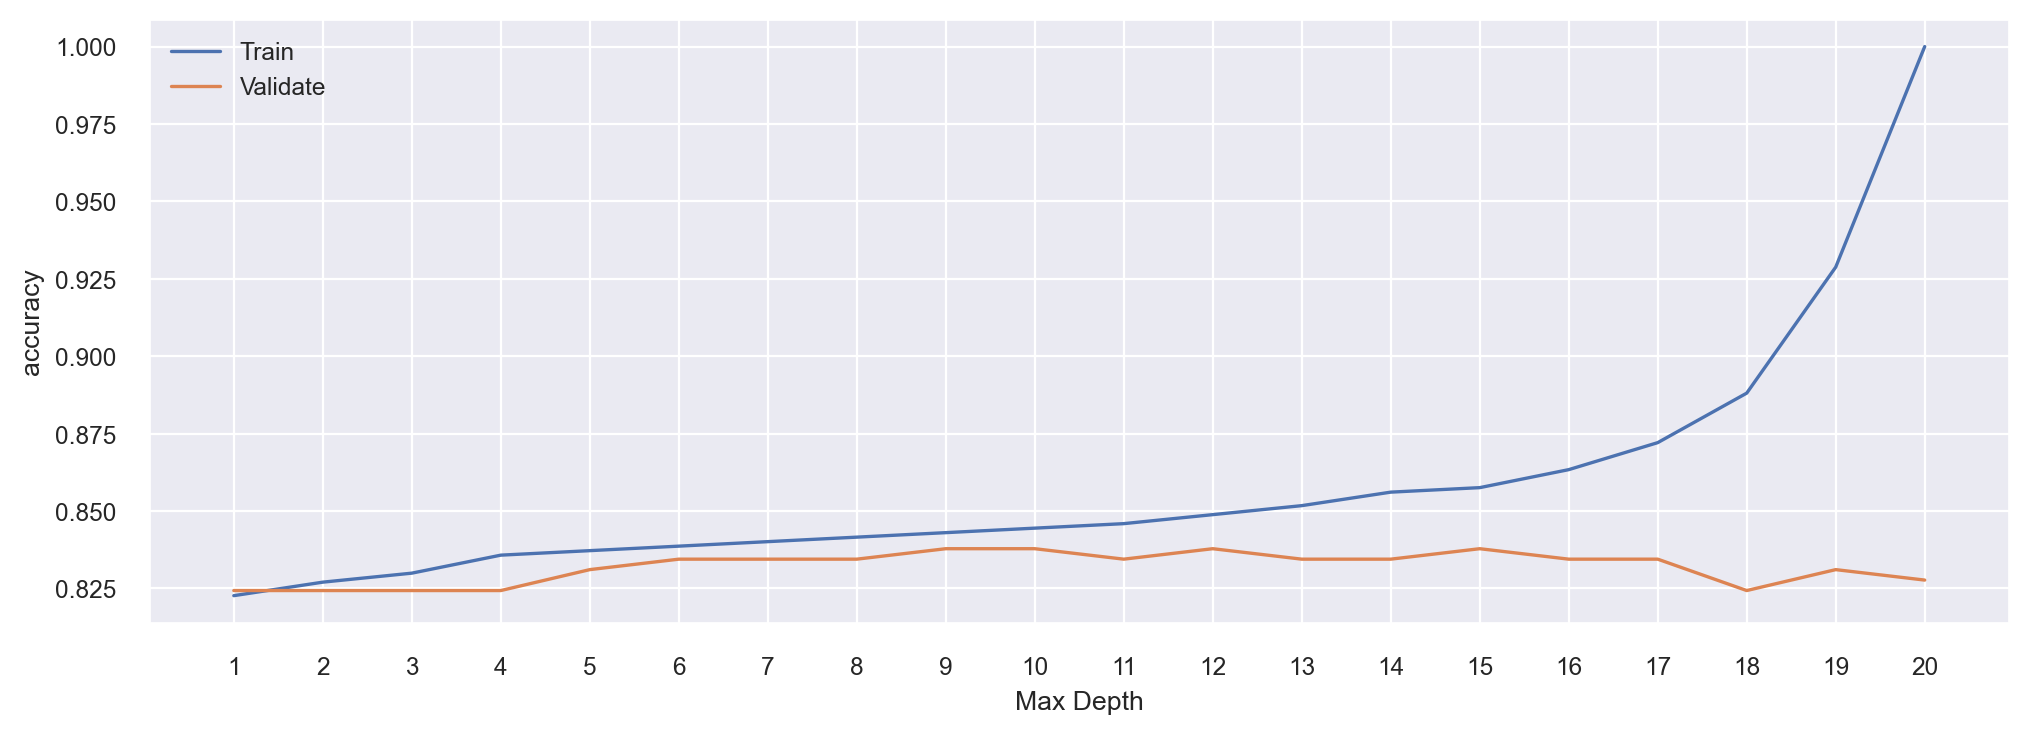

In [89]:
# plotting the "Random Forest - reverse count" comparison across in-sample and out-sample datasets:
# consider plotting secondary X-axis to represent sample leaf count

sns.set_theme("paper")

i_range = range(1, 21)
train_scores = []
validate_scores = []
leaf_counter = 21

for i in i_range:
    rf = RandomForestClassifier(
        min_samples_leaf = (leaf_counter - 1), 
        max_depth = i,
        random_state=548)
        
    leaf_counter -= 1
    rf.fit(train_model, y_train)
    train_scores.append(rf.score(train_model, y_train))
    validate_scores.append(rf.score(validate_model, y_validate))

plt.figure(figsize=(12, 4))
plt.xlabel('Max Depth')
plt.ylabel('accuracy')
plt.plot(i_range, train_scores, label='Train')
plt.plot(i_range, validate_scores, label='Validate')
plt.legend()
plt.xticks(i_range)
plt.show()

In [90]:
# model number 5A: Gaussian Bayes
# will want to return back to this model

metrics = []

# creating the model
gsb = GaussianNB()

# fitting the model
gsb = gsb.fit(train_model, y_train)

# applying the model and evaluating its performance on the training dataset
in_sample_accuracy = gsb.score(train_model, y_train)

# next, we'll evaluate the model on "out-of-sample" data (validate)
out_of_sample_accuracy = gsb.score(validate_model, y_validate)

output = {
    "model": "gaussian_bayes", \
    "train_accuracy": in_sample_accuracy, \
    "validate_accuracy": out_of_sample_accuracy
}

metrics.append(output)

df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.validate_accuracy)
df.round(4)

model  train_accuracy  validate_accuracy  percent_change_diff
0  gaussian_bayes            0.71               0.68                 0.05

In [91]:
# model number 5B: Gaussian Bayes (hypertuned)

metrics = []

for i in range(2, 15):

    # fitting the powertransformer
    pwr_trans = PowerTransformer()
    pwr_trans = pwr_trans.fit(train_model)

    # transforming training/validate data
    Data_Transformed_1 = pwr_trans.transform(train_model)
    Data_Transformed_2 = pwr_trans.transform(validate_model)

    params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

    cv_method = RepeatedStratifiedKFold(
        n_splits = i,  
        n_repeats = 3, 
        random_state = 548)

    # creating the Gaussian model
    gsb = GaussianNB()

    # creating the hypertuned-model
    gs_NB = GridSearchCV(
                    estimator = gsb, 
                     param_grid = params_NB, 
                     cv = cv_method,
                     verbose = 1 , 
                     scoring = 'accuracy')

    # fitting the model
    gs_NB = gs_NB.fit(Data_Transformed_1, y_train)

    # applying the model and evaluating its performance on the training dataset
    in_sample_accuracy = gs_NB.score(Data_Transformed_1, y_train)

    # next, we'll evaluate the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = gs_NB.score(Data_Transformed_2, y_validate)

    output = {
        "model": "gaussian_bayes", \
        "K-folds": i, \
        "train_accuracy": in_sample_accuracy, \
        "validate_accuracy": out_of_sample_accuracy
    }

    metrics.append(output)

df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.validate_accuracy)
df.round(4)

Fitting 6 folds for each of 100 candidates, totalling 600 fits
Fitting 9 folds for each of 100 candidates, totalling 900 fits
Fitting 12 folds for each of 100 candidates, totalling 1200 fits
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 18 folds for each of 100 candidates, totalling 1800 fits
Fitting 21 folds for each of 100 candidates, totalling 2100 fits
Fitting 24 folds for each of 100 candidates, totalling 2400 fits
Fitting 27 folds for each of 100 candidates, totalling 2700 fits
Fitting 30 folds for each of 100 candidates, totalling 3000 fits
Fitting 33 folds for each of 100 candidates, totalling 3300 fits
Fitting 36 folds for each of 100 candidates, totalling 3600 fits
Fitting 39 folds for each of 100 candidates, totalling 3900 fits
Fitting 42 folds for each of 100 candidates, totalling 4200 fits


model  K-folds  train_accuracy  validate_accuracy  \
0   gaussian_bayes        2            0.79               0.77   
1   gaussian_bayes        3            0.79               0.77   
2   gaussian_bayes        4            0.79               0.77   
3   gaussian_bayes        5            0.79               0.77   
4   gaussian_bayes        6            0.79               0.77   
5   gaussian_bayes        7            0.79               0.77   
6   gaussian_bayes        8            0.79               0.77   
7   gaussian_bayes        9            0.79               0.77   
8   gaussian_bayes       10            0.79               0.77   
9   gaussian_bayes       11            0.79               0.77   
10  gaussian_bayes       12            0.79               0.77   
11  gaussian_bayes       13            0.79               0.77   
12  gaussian_bayes       14            0.79               0.77   

    percent_change_diff  
0                  0.02  
1                  0.02  
2                  0.02  
3                  0.02  
4                  0.02  
5                  0.02  
6                  0.02  
7                  0.02  
8                  0.02  
9                  0.02  
10                 0.02  
11                 0.02  
12                 0.02

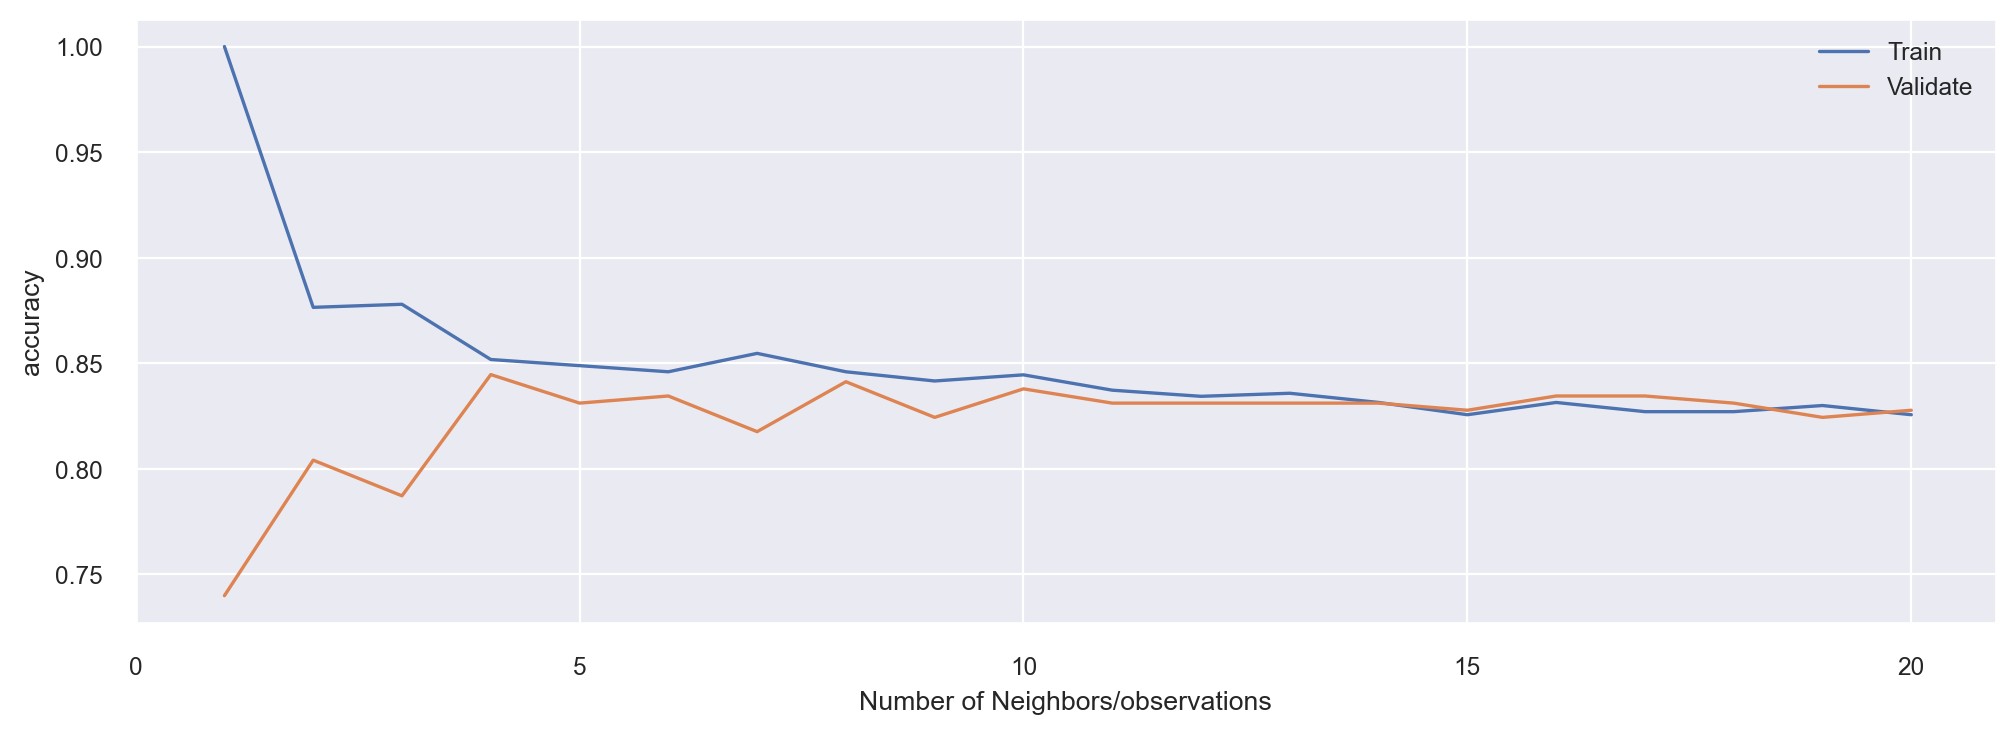

In [92]:
# plotting the "KNN" comparison across in-sample and out-sample datasets:

sns.set_theme("paper")

n_range = range(1, 21)
train_scores = []
validate_scores = []

for n in n_range:
    knn = KNeighborsClassifier(
        n_neighbors = n, 
        weights = 'uniform')

    knn.fit(train_model, y_train)
    train_scores.append(knn.score(train_model, y_train))
    validate_scores.append(knn.score(validate_model, y_validate))

plt.figure(figsize=(12, 4))
plt.xlabel('Number of Neighbors/observations')
plt.ylabel('accuracy')
plt.plot(n_range, train_scores, label='Train')
plt.plot(n_range, validate_scores, label='Validate')
plt.legend()
plt.xticks([0,5,10,15,20])
plt.show()

In [93]:
# model number 6A: K-nearest neighbor (KNN)

metrics = []

for k in range(1, 21):
    # Make the model
    knn = KNeighborsClassifier(
                                n_neighbors = k, 
                                weights = 'uniform')

    # Fit the model (on train and only train)
    knn = knn.fit(train_model, y_train)

    # evaluating the model's performance on training dataset
    in_sample_accuracy = knn.score(train_model, y_train)
    
    # evaluating the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = knn.score(validate_model, y_validate)

    output = {
        "num_of_neighbors": k,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.train_accuracy)
df.round(4)

num_of_neighbors  train_accuracy  validate_accuracy  percent_change_diff
0                  1            1.00               0.74                 0.26
1                  2            0.88               0.80                 0.08
2                  3            0.88               0.79                 0.10
3                  4            0.85               0.84                 0.01
4                  5            0.85               0.83                 0.02
5                  6            0.85               0.83                 0.01
6                  7            0.85               0.82                 0.04
7                  8            0.85               0.84                 0.01
8                  9            0.84               0.82                 0.02
9                 10            0.84               0.84                 0.01
10                11            0.84               0.83                 0.01
11                12            0.83               0.83                 0.00
12                13            0.84               0.83                 0.01
13                14            0.83               0.83                 0.00
14                15            0.83               0.83                -0.00
15                16            0.83               0.83                -0.00
16                17            0.83               0.83                -0.01
17                18            0.83               0.83                -0.00
18                19            0.83               0.82                 0.01
19                20            0.83               0.83                -0.00

In [94]:
# model number 6B: K-nearest neighbor (KNN) / Opportunity Atlas

metrics = []

for k in range(1, 21):
    # Make the model
    knn = KNeighborsClassifier(
                                n_neighbors = k, 
                                weights = 'uniform')

    # Fit the model (on train and only train)
    knn = knn.fit(equity_df, y_train)

    # evaluating the model's performance on training dataset
    in_sample_accuracy = knn.score(equity_df, y_train)
    
    # evaluating the model on "out-of-sample" data (validate)
    out_of_sample_accuracy = knn.score(val_equity, y_validate)

    output = {
        "num_of_neighbors": k,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.train_accuracy)
df.round(4)

num_of_neighbors  train_accuracy  validate_accuracy  percent_change_diff
0                  1            0.80               0.79                 0.01
1                  2            0.82               0.82                -0.00
2                  3            0.82               0.82                -0.00
3                  4            0.82               0.82                -0.00
4                  5            0.82               0.82                -0.00
5                  6            0.82               0.82                -0.00
6                  7            0.82               0.82                -0.00
7                  8            0.82               0.82                -0.00
8                  9            0.82               0.82                -0.00
9                 10            0.82               0.82                -0.00
10                11            0.82               0.82                -0.00
11                12            0.82               0.82                -0.00
12                13            0.82               0.82                -0.00
13                14            0.82               0.82                -0.00
14                15            0.82               0.82                -0.00
15                16            0.82               0.82                -0.00
16                17            0.82               0.82                -0.00
17                18            0.82               0.82                -0.00
18                19            0.82               0.82                -0.00
19                20            0.82               0.82                -0.00

----
### **``Summary Notes: Modeling``**

After comparing all six (6) unique models, I conclude that the following models resulted in the best predictive overall accuracy performance:

**Logistic Regression (1): C = 1.0**

    - ~84% predictive accuracy
    - relative training set diff. ~0%

**Logistic Regression (2): C = 0.9**

    - ~84% predictive accuracy
    - relative training set diff. ~%0

**Decision Tree (1): depth of 13, and min sample leaf of 13**

    - ~84% predictive accuracy
    - relative training set diff. ~1% (+)

**Decision Tree (2): depth of 7, and min sample leaf of 14**

    - ~84% predictive accuracy
    - relative training set diff. ~1% (+)

**Random Forest: depth of 7, and min sample leaf of 14**

    - ~84% predictive accuracy
    - relative training set diff. ~1% (+)

**K-nearest Neighbor (KNN): k = 4**

    - ~84% predictive accuracy
    - relative training set diff. ~1% (+)

**K-nearest Neighbor (KNN): k = 10**

    - ~84% predictive accuracy
    - relative training set diff. ~1% (+)

-----
#### **``Summary: Model Evaluation``**

After evaluating all the models tested, I am choosing to deploy the Logistic Regression model for several reasons:

- ease of understanding/interpretation
- may be most flexible to deploy/maintain over time
    - compared to commonly collected information which is key to algorithms such as decision tree/random forests

In [95]:
# deploying the Logistic Regression w/C of 1.0 on Test Dataset

# creating the model
logi_final = LogisticRegression(
            C = 1, 
            random_state=548)

# fitting the model (on train dataset)
logi_final = logi_final.fit(train_model, y_train)

# applying the model and evaluating its performance on all three (3) datasets

train_accuracy = logi_final.score(train_model, y_train)
validate_accuracy = logi_final.score(validate_model, y_validate)
test_accuracy = logi_final.score(test_model, y_test)

In [96]:
# returning final results including relative difference test dataset 

train_diff = (baseline_train - train_accuracy)/train_accuracy
val_diff = (train_accuracy - validate_accuracy)/validate_accuracy
test_diff = (validate_accuracy - test_accuracy)/test_accuracy

pd.DataFrame({'dataset': ["baseline", "train", "validate", "test (final)"], "accuracy": [baseline_train, train_accuracy, validate_accuracy, test_accuracy], "relative_difference": [0, train_diff, val_diff, test_diff]})

dataset  accuracy  relative_difference
0      baseline      0.82                 0.00
1         train      0.84                -0.02
2      validate      0.84                 0.00
3  test (final)      0.83                 0.02

In [97]:
# Logistic Regression Report on Validate

metrics = []

for i in np.linspace(0.1, 1.0, 10):

    # creating the model
    logi = LogisticRegression(
        C = i, 
        random_state=548)

    # fitting the model (on train and only train)
    logi = logi.fit(train_model, y_train)

    # We'll evaluate the model's petreeormance on train, first
    y_predictions = logi.predict(validate_model)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_validate, y_predictions, output_dict=True)
    print(f"With Class Weight: {i.round(4)}")
    print(pd.DataFrame(report))
    
    print()

With Class Weight: 0.1
           False  True  accuracy  macro avg  weighted avg
precision   0.84  0.83      0.84       0.84          0.84
recall      1.00  0.10      0.84       0.55          0.84
f1-score    0.91  0.17      0.84       0.54          0.78
support   244.00 52.00      0.84     296.00        296.00

With Class Weight: 0.2
           False  True  accuracy  macro avg  weighted avg
precision   0.85  0.64      0.84       0.75          0.81
recall      0.98  0.17      0.84       0.58          0.84
f1-score    0.91  0.27      0.84       0.59          0.80
support   244.00 52.00      0.84     296.00        296.00

With Class Weight: 0.3
           False  True  accuracy  macro avg  weighted avg
precision   0.85  0.60      0.83       0.72          0.80
recall      0.98  0.17      0.83       0.57          0.83
f1-score    0.91  0.27      0.83       0.59          0.79
support   244.00 52.00      0.83     296.00        296.00

With Class Weight: 0.4
           False  True  accuracy  m

In [98]:
# returning final accuracy report

# generating predictions for test dataset w/Logistic Regression model
y_predictions = logi_final.predict(test_model)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_test, y_predictions, output_dict = True)

final_report = pd.DataFrame(report).round(4)
final_report

False  True  accuracy  macro avg  weighted avg
precision   0.83  0.00      0.83       0.41          0.68
recall      1.00  0.00      0.83       0.50          0.83
f1-score    0.90  0.00      0.83       0.45          0.75
support   203.00 43.00      0.83     246.00        246.00

In [99]:
# confusion matrix on test dataset
# model unssessfully predicted any of the 43 turn-over employees in the test dataset
# however, the model accurately predicted all instances when employee did not leave the company

pd.crosstab(y_predictions, y_test).rename_axis( "Predicted", axis = 0)

attrition  False  True
Predicted             
False        203    43

----
### **``Generating Predictions for Remaining Employees``**

In [100]:
# let's deploy the model on the full ibm dataset and measure its performance

df = wrangle.get_employee_df()

df.head()

initial df shape: (1470, 46)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  state       cty  household_income_at_35  high-school_graduation_rate  \
0  ...     NY  cty36047                   37229                         0.84   
1  ...     NY  cty36005                   32542                         0.78   
2  ...     NY  cty36047                   37229                         0.84   
3  ...     NY  cty36047                   37229                         0.84   
4  ...     NY  cty36061                   37826                         0.81   

   percentage_married_by_35 incarceration_rate  women_teenage_birthrate  \
0                      0.32               0.01                     0.20   
1                      0.22               0.02                     0.28   
2                      0.32               0.01                     0.20   
3                      0.32               0.01                     0.20   
4                      0.29               0.01                     0.19   

  poverty_rate  employment_rates_at_35yrs  single_parent_frac  
0         0.23                       0.73                0.38  
1         0.31                       0.74                0.59  
2         0.23                       0.73                0.38  
3         0.23                       0.73                0.38  
4         0.17                       0.73                0.34  

[5 rows x 46 columns]

In [101]:
# cleaning dataframe for current employees only

df = df[df["Attrition"] == "No"]

print(f'shape after cleaning: {df.shape}')
df.head()

shape after cleaning: (1233, 46)


Age Attrition     BusinessTravel  DailyRate              Department  \
1   49        No  Travel_Frequently        279  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
1                 8          1  Life Sciences              1               2   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   

   ...  state       cty  household_income_at_35  high-school_graduation_rate  \
1  ...     NY  cty36005                   32542                         0.78   
3  ...     NY  cty36047                   37229                         0.84   
4  ...     NY  cty36061                   37826                         0.81   
5  ...     NY  cty36047                   37229                         0.84   
6  ...     NY  cty36061                   37826                         0.81   

   percentage_married_by_35 incarceration_rate  women_teenage_birthrate  \
1                      0.22               0.02                     0.28   
3                      0.32               0.01                     0.20   
4                      0.29               0.01                     0.19   
5                      0.32               0.01                     0.20   
6                      0.29               0.01                     0.19   

  poverty_rate  employment_rates_at_35yrs  single_parent_frac  
1         0.31                       0.74                0.59  
3         0.23                       0.73                0.38  
4         0.17                       0.73                0.34  
5         0.23                       0.73                0.38  
6         0.17                       0.73                0.34  

[5 rows x 46 columns]

In [102]:
# initial cleaning 

df = wrangle.clean_employee_df(df)

df.head() # checks out!

shape after cleaning: (1233, 34)


attrition  employee_age  monthly_income  percent_salary_hike  \
2       False            49            5130                   23   
5       False            33            2909                   11   
7       False            27            3468                   12   
8       False            32            3068                   13   
10      False            59            2670                   20   

    total_working_years  training_times_last_year  years_at_company  \
2                    10                         3                10   
5                     8                         3                 8   
7                     6                         3                 2   
8                     8                         2                 7   
10                   12                         3                 1   

    household_income_at_35  high_school_graduation_rate  \
2                    32542                         0.78   
5                    37229                         0.84   
7                    37826                         0.81   
8                    37229                         0.84   
10                   37826                         0.81   

    percentage_married_by_35  ...               job_role  job_satisfaction  \
2                       0.22  ...     Research Scientist                 2   
5                       0.32  ...     Research Scientist                 3   
7                       0.29  ...  Laboratory Technician                 2   
8                       0.32  ...  Laboratory Technician                 4   
10                      0.29  ...  Laboratory Technician                 1   

    marital_status  performance_rating  relationship_satisfaction  state  \
2          Married                   4                          4     NY   
5          Married                   3                          3     NY   
7          Married                   3                          4     NY   
8           Single                   3                          3     NY   
10         Married                   4                          1     NY   

   stock_option_level work_life_balance years_in_current_role  \
2                   1                 3                     7   
5                   0                 3                     7   
7                   1                 3                     2   
8                   0                 2                     7   
10                  3                 2                     0   

   years_with_curr_manager  
2                        7  
5                        0  
7                        2  
8                        6  
10                       0  

[5 rows x 34 columns]

In [103]:
# treating dataset for outliers

df = wrangle.df_outliers(df)

df.head() # checks out!

shape after outliers: (1013, 34)


attrition  employee_age  monthly_income  percent_salary_hike  \
2       False            49            5130                   23   
5       False            33            2909                   11   
7       False            27            3468                   12   
8       False            32            3068                   13   
10      False            59            2670                   20   

    total_working_years  training_times_last_year  years_at_company  \
2                    10                         3                10   
5                     8                         3                 8   
7                     6                         3                 2   
8                     8                         2                 7   
10                   12                         3                 1   

    household_income_at_35  high_school_graduation_rate  \
2                    32542                         0.78   
5                    37229                         0.84   
7                    37826                         0.81   
8                    37229                         0.84   
10                   37826                         0.81   

    percentage_married_by_35  ...               job_role  job_satisfaction  \
2                       0.22  ...     Research Scientist                 2   
5                       0.32  ...     Research Scientist                 3   
7                       0.29  ...  Laboratory Technician                 2   
8                       0.32  ...  Laboratory Technician                 4   
10                      0.29  ...  Laboratory Technician                 1   

    marital_status  performance_rating  relationship_satisfaction  state  \
2          Married                   4                          4     NY   
5          Married                   3                          3     NY   
7          Married                   3                          4     NY   
8           Single                   3                          3     NY   
10         Married                   4                          1     NY   

   stock_option_level work_life_balance years_in_current_role  \
2                   1                 3                     7   
5                   0                 3                     7   
7                   1                 3                     2   
8                   0                 2                     7   
10                  3                 2                     0   

   years_with_curr_manager  
2                        7  
5                        0  
7                        2  
8                        6  
10                       0  

[5 rows x 34 columns]

In [104]:
# creating an unscaled df copy for add predictions 

df_original = df.copy()
df_original.head() # checks out!

attrition  employee_age  monthly_income  percent_salary_hike  \
2       False            49            5130                   23   
5       False            33            2909                   11   
7       False            27            3468                   12   
8       False            32            3068                   13   
10      False            59            2670                   20   

    total_working_years  training_times_last_year  years_at_company  \
2                    10                         3                10   
5                     8                         3                 8   
7                     6                         3                 2   
8                     8                         2                 7   
10                   12                         3                 1   

    household_income_at_35  high_school_graduation_rate  \
2                    32542                         0.78   
5                    37229                         0.84   
7                    37826                         0.81   
8                    37229                         0.84   
10                   37826                         0.81   

    percentage_married_by_35  ...               job_role  job_satisfaction  \
2                       0.22  ...     Research Scientist                 2   
5                       0.32  ...     Research Scientist                 3   
7                       0.29  ...  Laboratory Technician                 2   
8                       0.32  ...  Laboratory Technician                 4   
10                      0.29  ...  Laboratory Technician                 1   

    marital_status  performance_rating  relationship_satisfaction  state  \
2          Married                   4                          4     NY   
5          Married                   3                          3     NY   
7          Married                   3                          4     NY   
8           Single                   3                          3     NY   
10         Married                   4                          1     NY   

   stock_option_level work_life_balance years_in_current_role  \
2                   1                 3                     7   
5                   0                 3                     7   
7                   1                 3                     2   
8                   0                 2                     7   
10                  3                 2                     0   

   years_with_curr_manager  
2                        7  
5                        0  
7                        2  
8                        6  
10                       0  

[5 rows x 34 columns]

In [105]:
# transform the dataset

scale_lst = df.select_dtypes(exclude = ["object", "uint8", "bool"]).columns.tolist()
df = wrangle.scaled_data(df)

print(f'shape: {df.shape}')
df.head()

scaled df shape: (1013, 34)
shape: (1013, 34)


attrition  employee_age  monthly_income  percent_salary_hike  \
2       False          1.58           -0.05                 2.17   
5       False         -0.35           -0.80                -1.20   
7       False         -1.07           -0.61                -0.92   
8       False         -0.47           -0.75                -0.64   
10      False          2.78           -0.88                 1.33   

    total_working_years  training_times_last_year  years_at_company  \
2                  0.13                      0.12              1.16   
5                 -0.26                      0.12              0.62   
7                 -0.65                      0.12             -1.00   
8                 -0.26                     -0.64              0.35   
10                 0.52                      0.12             -1.27   

    household_income_at_35  high_school_graduation_rate  \
2                    -1.19                        -1.61   
5                    -0.67                        -0.40   
7                    -0.60                        -0.91   
8                    -0.67                        -0.40   
10                   -0.60                        -0.91   

    percentage_married_by_35  ...               job_role  job_satisfaction  \
2                      -1.61  ...     Research Scientist                 2   
5                      -0.36  ...     Research Scientist                 3   
7                      -0.74  ...  Laboratory Technician                 2   
8                      -0.36  ...  Laboratory Technician                 4   
10                     -0.74  ...  Laboratory Technician                 1   

    marital_status  performance_rating  relationship_satisfaction  state  \
2          Married                   4                          4     NY   
5          Married                   3                          3     NY   
7          Married                   3                          4     NY   
8           Single                   3                          3     NY   
10         Married                   4                          1     NY   

   stock_option_level work_life_balance years_in_current_role  \
2                   1                 3                  1.03   
5                   0                 3                  1.03   
7                   1                 3                 -0.59   
8                   0                 2                  1.03   
10                  3                 2                 -1.23   

   years_with_curr_manager  
2                     1.06  
5                    -1.22  
7                    -0.57  
8                     0.73  
10                   -1.22  

[5 rows x 34 columns]

In [106]:
# create dummy variables

df_dummy = pd.get_dummies(
data = df, 
columns = [
        'job_level', 
        'job_role', 
        'marital_status', 
        'stock_option_level'],
drop_first = False, 
dtype = bool)

df_dummy.head()

attrition  employee_age  monthly_income  percent_salary_hike  \
2       False          1.58           -0.05                 2.17   
5       False         -0.35           -0.80                -1.20   
7       False         -1.07           -0.61                -0.92   
8       False         -0.47           -0.75                -0.64   
10      False          2.78           -0.88                 1.33   

    total_working_years  training_times_last_year  years_at_company  \
2                  0.13                      0.12              1.16   
5                 -0.26                      0.12              0.62   
7                 -0.65                      0.12             -1.00   
8                 -0.26                     -0.64              0.35   
10                 0.52                      0.12             -1.27   

    household_income_at_35  high_school_graduation_rate  \
2                    -1.19                        -1.61   
5                    -0.67                        -0.40   
7                    -0.60                        -0.91   
8                    -0.67                        -0.40   
10                   -0.60                        -0.91   

    percentage_married_by_35  ...  job_role_Research Scientist  \
2                      -1.61  ...                         True   
5                      -0.36  ...                         True   
7                      -0.74  ...                        False   
8                      -0.36  ...                        False   
10                     -0.74  ...                        False   

    job_role_Sales Executive  job_role_Sales Representative  \
2                      False                          False   
5                      False                          False   
7                      False                          False   
8                      False                          False   
10                     False                          False   

    marital_status_Divorced  marital_status_Married  marital_status_Single  \
2                     False                    True                  False   
5                     False                    True                  False   
7                     False                    True                  False   
8                     False                   False                   True   
10                    False                    True                  False   

   stock_option_level_0 stock_option_level_1 stock_option_level_2  \
2                 False                 True                False   
5                  True                False                False   
7                 False                 True                False   
8                  True                False                False   
10                False                False                False   

   stock_option_level_3  
2                 False  
5                 False  
7                 False  
8                 False  
10                 True  

[5 rows x 50 columns]

In [107]:
# clean the dummy dataframe

df_cleaned = clean_columns(df_dummy)

print(df_cleaned.shape)
df_cleaned.head()

(1013, 50)


attrition  employee_age  monthly_income  percent_salary_hike  \
2       False          1.58           -0.05                 2.17   
5       False         -0.35           -0.80                -1.20   
7       False         -1.07           -0.61                -0.92   
8       False         -0.47           -0.75                -0.64   
10      False          2.78           -0.88                 1.33   

    total_working_years  training_times_last_year  years_at_company  \
2                  0.13                      0.12              1.16   
5                 -0.26                      0.12              0.62   
7                 -0.65                      0.12             -1.00   
8                 -0.26                     -0.64              0.35   
10                 0.52                      0.12             -1.27   

    household_income_at_35  high_school_graduation_rate  \
2                    -1.19                        -1.61   
5                    -0.67                        -0.40   
7                    -0.60                        -0.91   
8                    -0.67                        -0.40   
10                   -0.60                        -0.91   

    percentage_married_by_35  ...  job_role_research_scientist  \
2                      -1.61  ...                         True   
5                      -0.36  ...                         True   
7                      -0.74  ...                        False   
8                      -0.36  ...                        False   
10                     -0.74  ...                        False   

    job_role_sales_executive  job_role_sales_representative  \
2                      False                          False   
5                      False                          False   
7                      False                          False   
8                      False                          False   
10                     False                          False   

    marital_status_divorced  marital_status_married  marital_status_single  \
2                     False                    True                  False   
5                     False                    True                  False   
7                     False                    True                  False   
8                     False                   False                   True   
10                    False                    True                  False   

   stock_option_level_0 stock_option_level_1 stock_option_level_2  \
2                 False                 True                False   
5                  True                False                False   
7                 False                 True                False   
8                  True                False                False   
10                False                False                False   

   stock_option_level_3  
2                 False  
5                 False  
7                 False  
8                 False  
10                 True  

[5 rows x 50 columns]

In [108]:
# created needed predictions dataframe

df_model = df_cleaned[rf_features]

print(df_model.shape)
df_model.head()

(1013, 29)


employee_age  employment_rates_at_35yrs  high_school_graduation_rate  \
2           1.58                      -0.54                        -1.61   
5          -0.35                      -0.87                        -0.40   
7          -1.07                      -0.98                        -0.91   
8          -0.47                      -0.87                        -0.40   
10          2.78                      -0.98                        -0.91   

    household_income_at_35  monthly_income  percentage_married_by_35  \
2                    -1.19           -0.05                     -1.61   
5                    -0.67           -0.80                     -0.36   
7                    -0.60           -0.61                     -0.74   
8                    -0.67           -0.75                     -0.36   
10                   -0.60           -0.88                     -0.74   

    poverty_rate  total_working_years  women_teenage_birthrate  \
2           2.05                 0.13                     1.81   
5           0.83                -0.26                     0.46   
7          -0.05                -0.65                     0.40   
8           0.83                -0.26                     0.46   
10         -0.05                 0.52                     0.40   

    years_at_company  ...  job_role_research_scientist  \
2               1.16  ...                         True   
5               0.62  ...                         True   
7              -1.00  ...                        False   
8               0.35  ...                        False   
10             -1.27  ...                        False   

    job_role_sales_executive  job_role_sales_representative  \
2                      False                          False   
5                      False                          False   
7                      False                          False   
8                      False                          False   
10                     False                          False   

    marital_status_divorced  marital_status_married  marital_status_single  \
2                     False                    True                  False   
5                     False                    True                  False   
7                     False                    True                  False   
8                     False                   False                   True   
10                    False                    True                  False   

    stock_option_level_0  stock_option_level_1  stock_option_level_2  \
2                  False                  True                 False   
5                   True                 False                 False   
7                  False                  True                 False   
8                   True                 False                 False   
10                 False                 False                 False   

    stock_option_level_3  
2                  False  
5                  False  
7                  False  
8                  False  
10                  True  

[5 rows x 29 columns]

In [109]:
# generating probabilities 

y_probabilities = logi_final.predict_proba(df_model)
y_probabilities[0:20] # checks out!

array([[0.99416089, 0.00583911],
       [0.85521363, 0.14478637],
       [0.82223707, 0.17776293],
       [0.74733785, 0.25266215],
       [0.87005015, 0.12994985],
       [0.57540826, 0.42459174],
       [0.77922578, 0.22077422],
       [0.97023462, 0.02976538],
       [0.731484  , 0.268516  ],
       [0.85327315, 0.14672685],
       [0.82282728, 0.17717272],
       [0.71387968, 0.28612032],
       [0.94935516, 0.05064484],
       [0.63174984, 0.36825016],
       [0.83075904, 0.16924096],
       [0.91126294, 0.08873706],
       [0.91391133, 0.08608867],
       [0.43424602, 0.56575398],
       [0.93846551, 0.06153449],
       [0.59517219, 0.40482781]])

In [110]:
# converting the probabilities into a Pandas Dataframe will make it easier to manipulate

probabilities = pd.DataFrame(y_probabilities).rename(columns = {0: "attrition_remains", 1: "attrition_turns_over"})

print(probabilities.shape)
probabilities

(1013, 2)


attrition_remains  attrition_turns_over
0                  0.99                  0.01
1                  0.86                  0.14
2                  0.82                  0.18
3                  0.75                  0.25
4                  0.87                  0.13
...                 ...                   ...
1008               0.90                  0.10
1009               0.97                  0.03
1010               0.97                  0.03
1011               0.92                  0.08
1012               0.80                  0.20

[1013 rows x 2 columns]

In [111]:
# generating predictions for the ibm w/Logistic Regression model

predictions = logi_final.predict(df_model)
y_predictions = pd.DataFrame(predictions).rename(columns = {0: "predicted_turn_over"})

print(y_predictions.shape)
print(f'unique values: {y_predictions.nunique()}')
y_predictions.head() # checks out!

(1013, 1)
unique values: predicted_turn_over    2
dtype: int64


predicted_turn_over
0                False
1                False
2                False
3                False
4                False

In [112]:
# getting employee numbers

employee_numbers = pd.DataFrame(df_original.index).rename(columns = {0: "employee_number"})
employee_numbers.head() # checks out!

employee_number
0                2
1                5
2                7
3                8
4               10

In [113]:
# let's tie it all together

print(type(probabilities), probabilities.shape)
print(type(y_predictions), y_predictions.shape)
print(type(employee_numbers), employee_numbers.shape)

<class 'pandas.core.frame.DataFrame'> (1013, 2)
<class 'pandas.core.frame.DataFrame'> (1013, 1)
<class 'pandas.core.frame.DataFrame'> (1013, 1)


In [114]:
# final dataframe

final_df = pd.concat([employee_numbers, probabilities, y_predictions], axis = 1)

In [115]:
# printing the results

print(f'final df shape: {final_df.shape}')
final_df.head()

final df shape: (1013, 4)


employee_number  attrition_remains  attrition_turns_over  \
0                2               0.99                  0.01   
1                5               0.86                  0.14   
2                7               0.82                  0.18   
3                8               0.75                  0.25   
4               10               0.87                  0.13   

   predicted_turn_over  
0                False  
1                False  
2                False  
3                False  
4                False

In [116]:
# predicted turn over: 35 employees or ~3.5% of current employees

final_df["predicted_turn_over"].value_counts()

False    978
True      35
Name: predicted_turn_over, dtype: int64

In [117]:
# generating a predictions csv

final_df.to_csv("/Users/mijailmariano/codeup-data-science/drivers_of_workplace_equity/emp_predictions.csv", index = False)

----
### **<u>``Appendix: Measuring Model Performance on Overall Data``</u>**

In [118]:
# import df

df = wrangle.get_employee_df()
df.head()

initial df shape: (1470, 46)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  state       cty  household_income_at_35  high-school_graduation_rate  \
0  ...     NY  cty36047                   37229                         0.84   
1  ...     NY  cty36005                   32542                         0.78   
2  ...     NY  cty36047                   37229                         0.84   
3  ...     NY  cty36047                   37229                         0.84   
4  ...     NY  cty36061                   37826                         0.81   

   percentage_married_by_35 incarceration_rate  women_teenage_birthrate  \
0                      0.32               0.01                     0.20   
1                      0.22               0.02                     0.28   
2                      0.32               0.01                     0.20   
3                      0.32               0.01                     0.20   
4                      0.29               0.01                     0.19   

  poverty_rate  employment_rates_at_35yrs  single_parent_frac  
0         0.23                       0.73                0.38  
1         0.31                       0.74                0.59  
2         0.23                       0.73                0.38  
3         0.23                       0.73                0.38  
4         0.17                       0.73                0.34  

[5 rows x 46 columns]

In [119]:
# initial cleaning

df = wrangle.clean_employee_df(df)
df.head()

shape after cleaning: (1470, 34)


attrition  employee_age  monthly_income  percent_salary_hike  \
1       True            41            5993                   11   
2      False            49            5130                   23   
4       True            37            2090                   15   
5      False            33            2909                   11   
7      False            27            3468                   12   

   total_working_years  training_times_last_year  years_at_company  \
1                    8                         0                 6   
2                   10                         3                10   
4                    7                         3                 0   
5                    8                         3                 8   
7                    6                         3                 2   

   household_income_at_35  high_school_graduation_rate  \
1                   37229                         0.84   
2                   32542                         0.78   
4                   37229                         0.84   
5                   37229                         0.84   
7                   37826                         0.81   

   percentage_married_by_35  ...               job_role  job_satisfaction  \
1                      0.32  ...        Sales Executive                 4   
2                      0.22  ...     Research Scientist                 2   
4                      0.32  ...  Laboratory Technician                 3   
5                      0.32  ...     Research Scientist                 3   
7                      0.29  ...  Laboratory Technician                 2   

   marital_status  performance_rating  relationship_satisfaction  state  \
1          Single                   3                          1     NY   
2         Married                   4                          4     NY   
4          Single                   3                          2     NY   
5         Married                   3                          3     NY   
7         Married                   3                          4     NY   

  stock_option_level work_life_balance years_in_current_role  \
1                  0                 1                     4   
2                  1                 3                     7   
4                  0                 3                     0   
5                  0                 3                     7   
7                  1                 3                     2   

  years_with_curr_manager  
1                       5  
2                       7  
4                       0  
5                       0  
7                       2  

[5 rows x 34 columns]

In [120]:
# clean for outliers

df = wrangle.df_outliers(df)
df.head()

shape after outliers: (1230, 34)


attrition  employee_age  monthly_income  percent_salary_hike  \
1       True            41            5993                   11   
2      False            49            5130                   23   
4       True            37            2090                   15   
5      False            33            2909                   11   
7      False            27            3468                   12   

   total_working_years  training_times_last_year  years_at_company  \
1                    8                         0                 6   
2                   10                         3                10   
4                    7                         3                 0   
5                    8                         3                 8   
7                    6                         3                 2   

   household_income_at_35  high_school_graduation_rate  \
1                   37229                         0.84   
2                   32542                         0.78   
4                   37229                         0.84   
5                   37229                         0.84   
7                   37826                         0.81   

   percentage_married_by_35  ...               job_role  job_satisfaction  \
1                      0.32  ...        Sales Executive                 4   
2                      0.22  ...     Research Scientist                 2   
4                      0.32  ...  Laboratory Technician                 3   
5                      0.32  ...     Research Scientist                 3   
7                      0.29  ...  Laboratory Technician                 2   

   marital_status  performance_rating  relationship_satisfaction  state  \
1          Single                   3                          1     NY   
2         Married                   4                          4     NY   
4          Single                   3                          2     NY   
5         Married                   3                          3     NY   
7         Married                   3                          4     NY   

  stock_option_level work_life_balance years_in_current_role  \
1                  0                 1                     4   
2                  1                 3                     7   
4                  0                 3                     0   
5                  0                 3                     7   
7                  1                 3                     2   

  years_with_curr_manager  
1                       5  
2                       7  
4                       0  
5                       0  
7                       2  

[5 rows x 34 columns]

In [121]:
# scale the data

scale_lst = df.select_dtypes(exclude = ["object", "uint8", "bool"]).columns.tolist()
df = wrangle.scaled_data(df)

print(df.shape)
df.head()

scaled df shape: (1230, 34)
(1230, 34)


attrition  employee_age  monthly_income  percent_salary_hike  \
1       True          0.67            0.31                -1.19   
2      False          1.61            0.01                 2.15   
4       True          0.20           -1.02                -0.07   
5      False         -0.27           -0.74                -1.19   
7      False         -0.97           -0.55                -0.91   

   total_working_years  training_times_last_year  years_at_company  \
1                -0.17                     -2.16              0.17   
2                 0.21                      0.14              1.25   
4                -0.36                      0.14             -1.45   
5                -0.17                      0.14              0.71   
7                -0.55                      0.14             -0.91   

   household_income_at_35  high_school_graduation_rate  \
1                   -0.70                        -0.44   
2                   -1.23                        -1.64   
4                   -0.70                        -0.44   
5                   -0.70                        -0.44   
7                   -0.64                        -0.95   

   percentage_married_by_35  ...               job_role  job_satisfaction  \
1                     -0.40  ...        Sales Executive                 4   
2                     -1.64  ...     Research Scientist                 2   
4                     -0.40  ...  Laboratory Technician                 3   
5                     -0.40  ...     Research Scientist                 3   
7                     -0.78  ...  Laboratory Technician                 2   

   marital_status  performance_rating  relationship_satisfaction  state  \
1          Single                   3                          1     NY   
2         Married                   4                          4     NY   
4          Single                   3                          2     NY   
5         Married                   3                          3     NY   
7         Married                   3                          4     NY   

  stock_option_level work_life_balance years_in_current_role  \
1                  0                 1                  0.14   
2                  1                 3                  1.12   
4                  0                 3                 -1.17   
5                  0                 3                  1.12   
7                  1                 3                 -0.51   

  years_with_curr_manager  
1                    0.49  
2                    1.15  
4                   -1.14  
5                   -1.14  
7                   -0.49  

[5 rows x 34 columns]

In [122]:
# generate dummy variables

df_dummy = pd.get_dummies(
                        data = df, 
                        columns = [
                                'job_level', 
                                'job_role', 
                                'marital_status', 
                                'stock_option_level'],
                        drop_first = False, 
                        dtype = bool)

df_dummy.head()

attrition  employee_age  monthly_income  percent_salary_hike  \
1       True          0.67            0.31                -1.19   
2      False          1.61            0.01                 2.15   
4       True          0.20           -1.02                -0.07   
5      False         -0.27           -0.74                -1.19   
7      False         -0.97           -0.55                -0.91   

   total_working_years  training_times_last_year  years_at_company  \
1                -0.17                     -2.16              0.17   
2                 0.21                      0.14              1.25   
4                -0.36                      0.14             -1.45   
5                -0.17                      0.14              0.71   
7                -0.55                      0.14             -0.91   

   household_income_at_35  high_school_graduation_rate  \
1                   -0.70                        -0.44   
2                   -1.23                        -1.64   
4                   -0.70                        -0.44   
5                   -0.70                        -0.44   
7                   -0.64                        -0.95   

   percentage_married_by_35  ...  job_role_Research Scientist  \
1                     -0.40  ...                        False   
2                     -1.64  ...                         True   
4                     -0.40  ...                        False   
5                     -0.40  ...                         True   
7                     -0.78  ...                        False   

   job_role_Sales Executive  job_role_Sales Representative  \
1                      True                          False   
2                     False                          False   
4                     False                          False   
5                     False                          False   
7                     False                          False   

   marital_status_Divorced  marital_status_Married  marital_status_Single  \
1                    False                   False                   True   
2                    False                    True                  False   
4                    False                   False                   True   
5                    False                    True                  False   
7                    False                    True                  False   

  stock_option_level_0 stock_option_level_1 stock_option_level_2  \
1                 True                False                False   
2                False                 True                False   
4                 True                False                False   
5                 True                False                False   
7                False                 True                False   

  stock_option_level_3  
1                False  
2                False  
4                False  
5                False  
7                False  

[5 rows x 50 columns]

In [123]:
# clean the dummy dataframe

df_cleaned = clean_columns(df_dummy)

print(df_cleaned.shape)
df_cleaned.head()

(1230, 50)


attrition  employee_age  monthly_income  percent_salary_hike  \
1       True          0.67            0.31                -1.19   
2      False          1.61            0.01                 2.15   
4       True          0.20           -1.02                -0.07   
5      False         -0.27           -0.74                -1.19   
7      False         -0.97           -0.55                -0.91   

   total_working_years  training_times_last_year  years_at_company  \
1                -0.17                     -2.16              0.17   
2                 0.21                      0.14              1.25   
4                -0.36                      0.14             -1.45   
5                -0.17                      0.14              0.71   
7                -0.55                      0.14             -0.91   

   household_income_at_35  high_school_graduation_rate  \
1                   -0.70                        -0.44   
2                   -1.23                        -1.64   
4                   -0.70                        -0.44   
5                   -0.70                        -0.44   
7                   -0.64                        -0.95   

   percentage_married_by_35  ...  job_role_research_scientist  \
1                     -0.40  ...                        False   
2                     -1.64  ...                         True   
4                     -0.40  ...                        False   
5                     -0.40  ...                         True   
7                     -0.78  ...                        False   

   job_role_sales_executive  job_role_sales_representative  \
1                      True                          False   
2                     False                          False   
4                     False                          False   
5                     False                          False   
7                     False                          False   

   marital_status_divorced  marital_status_married  marital_status_single  \
1                    False                   False                   True   
2                    False                    True                  False   
4                    False                   False                   True   
5                    False                    True                  False   
7                    False                    True                  False   

  stock_option_level_0 stock_option_level_1 stock_option_level_2  \
1                 True                False                False   
2                False                 True                False   
4                 True                False                False   
5                 True                False                False   
7                False                 True                False   

  stock_option_level_3  
1                False  
2                False  
4                False  
5                False  
7                False  

[5 rows x 50 columns]

In [124]:
# generate model df for predictions

df_model = df_cleaned[rf_features]

print(df_model.shape)
df_model.head()

(1230, 29)


employee_age  employment_rates_at_35yrs  high_school_graduation_rate  \
1          0.67                      -0.90                        -0.44   
2          1.61                      -0.57                        -1.64   
4          0.20                      -0.90                        -0.44   
5         -0.27                      -0.90                        -0.44   
7         -0.97                      -1.01                        -0.95   

   household_income_at_35  monthly_income  percentage_married_by_35  \
1                   -0.70            0.31                     -0.40   
2                   -1.23            0.01                     -1.64   
4                   -0.70           -1.02                     -0.40   
5                   -0.70           -0.74                     -0.40   
7                   -0.64           -0.55                     -0.78   

   poverty_rate  total_working_years  women_teenage_birthrate  \
1          0.87                -0.17                     0.50   
2          2.09                 0.21                     1.85   
4          0.87                -0.36                     0.50   
5          0.87                -0.17                     0.50   
7         -0.02                -0.55                     0.43   

   years_at_company  ...  job_role_research_scientist  \
1              0.17  ...                        False   
2              1.25  ...                         True   
4             -1.45  ...                        False   
5              0.71  ...                         True   
7             -0.91  ...                        False   

   job_role_sales_executive  job_role_sales_representative  \
1                      True                          False   
2                     False                          False   
4                     False                          False   
5                     False                          False   
7                     False                          False   

   marital_status_divorced  marital_status_married  marital_status_single  \
1                    False                   False                   True   
2                    False                    True                  False   
4                    False                   False                   True   
5                    False                    True                  False   
7                    False                    True                  False   

   stock_option_level_0  stock_option_level_1  stock_option_level_2  \
1                  True                 False                 False   
2                 False                  True                 False   
4                  True                 False                 False   
5                  True                 False                 False   
7                 False                  True                 False   

   stock_option_level_3  
1                 False  
2                 False  
4                 False  
5                 False  
7                 False  

[5 rows x 29 columns]

In [125]:
# generate predictions

y_predictions = logi_final.predict(df_model)
y_predictions[:20]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False])

In [126]:
# generating a confusion matrix

pd.crosstab(index = y_predictions, columns = df_cleaned["attrition"], margins=True).rename_axis("predicted", axis = 0)

attrition  False  True   All
predicted                   
False        983   173  1156
True          30    44    74
All         1013   217  1230

In [127]:
# understanding the confusion matrix further:

TN, FP, FN, TP = confusion_matrix(df_cleaned["attrition"], y_predictions).ravel()

print(f'True Negative: {TN}')
print(f'False Positive: {FP}')
print(f'False Negative: {FN}')
print(f'True Positive: {TP}')

True Negative: 983
False Positive: 30
False Negative: 173
True Positive: 44


In [128]:
# final accuracy report on ibm dataset

ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)

false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)

support_pos = TP + FN
support_neg = FP + TN

indx_lst = [
        "Accuracy", 
        "True Positive Rate/Sensitivity/Recall/Power", 
        "False Positive Rate/False Alarm Ratio/Fall-out", 
        "True Negative Rate/Specificity/Selectivity", 
        "False Negative Rate/Miss Rate", 
        "Precision/PPV", 
        "F1 Score", 
        "Support (False)", 
        "Support (True)"
        ]

metric = [
        accuracy.round(4),
        true_positive_rate.round(4),
        false_positive_rate.round(4),
        true_negative_rate.round(4),
        false_negative_rate.round(4),
        precision.round(4),
        f1_score.round(4),
        support_neg.round(4),
        support_pos.round(4)
]

performance_report = pd.DataFrame(metric, indx_lst).rename(columns = {0: "Performance"})

In [129]:
# returning performance report

performance_report

Performance
Accuracy                                               0.83
True Positive Rate/Sensitivity/Recall/Power            0.20
False Positive Rate/False Alarm Ratio/Fall-out         0.03
True Negative Rate/Specificity/Selectivity             0.97
False Negative Rate/Miss Rate                          0.80
Precision/PPV                                          0.59
F1 Score                                               0.30
Support (False)                                     1013.00
Support (True)                                       217.00